In [ ]:
!pip install transformers

In [ ]:
!pip install gradio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
pd.set_option('display.max_colwidth', 100)

In [ ]:
CURRENT_YEAR = time.gmtime().tm_year
CURRENT_YEAR

2025

In [ ]:
books = pd.read_csv("books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an ...",2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Tho...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gb...,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up unt...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gb...,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros...",2002.0,4.15,170.0,33684.0


In [ ]:
books.describe().T

,count,mean,std,min,25%,50%,75%,max
isbn13,6810.0,9.780677e+12,6.068911e+08,9.780002e+12,9.780330e+12,9.780553e+12,9.780810e+12,9.789042e+12
published_year,6804.0,1.998630e+03,1.048426e+01,1.853000e+03,1.996000e+03,2.002000e+03,2.005000e+03,2.019000e+03
average_rating,6767.0,3.933284e+00,3.313516e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.130000e+00,5.000000e+00
num_pages,6767.0,3.481810e+02,2.423768e+02,0.000000e+00,2.080000e+02,3.040000e+02,4.200000e+02,3.342000e+03
ratings_count,6767.0,2.106910e+04,1.376207e+05,0.000000e+00,1.590000e+02,1.018000e+03,5.992500e+03,5.629932e+06


In [ ]:
books.isna().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4429
authors,72
categories,99
thumbnail,329
description,262
published_year,6
average_rating,43


In [ ]:
books['title'].duplicated().sum()
df = {'column':[], 'duplicated':[]}
for col in books.columns:
  df['column'].append(col)
  df['duplicated'].append(books[col].duplicated().sum())

pd.DataFrame(df)

,column,duplicated
0,isbn13,0
1,isbn10,0
2,title,412
3,subtitle,4800
4,authors,3029
5,categories,6242
6,thumbnail,328
7,description,335
8,published_year,6715
9,average_rating,6609


In [ ]:
unique = books['categories'].str.lower().unique()
print(len(unique))
unique

563


array(['fiction', 'detective and mystery stories', 'american fiction',
       'christian life', 'authors, english', 'africa, east',
       'hyland, morn (fictitious character)', 'adventure stories',
       'arthurian romances', 'fantasy fiction', nan, 'english drama',
       'country life', 'english fiction', 'clergy',
       'aubrey, jack (fictitious character)',
       'detective and mystery stories, english', 'black death',
       'human cloning', 'science fiction', 'great britain',
       'american essays', 'china', 'capitalism', 'ireland',
       'juvenile fiction', "children's stories, english",
       'male friendship', 'literary collections',
       'beresford, tommy (fictitious character)',
       'imaginary wars and battles', 'dysfunctional families',
       'poirot, hercule (fictitious character)', 'christmas stories',
       'marple, jane (fictitious character)', 'belgians',
       'battle, superintendent (fictitious character)',
       'baggins, frodo (fictitious character

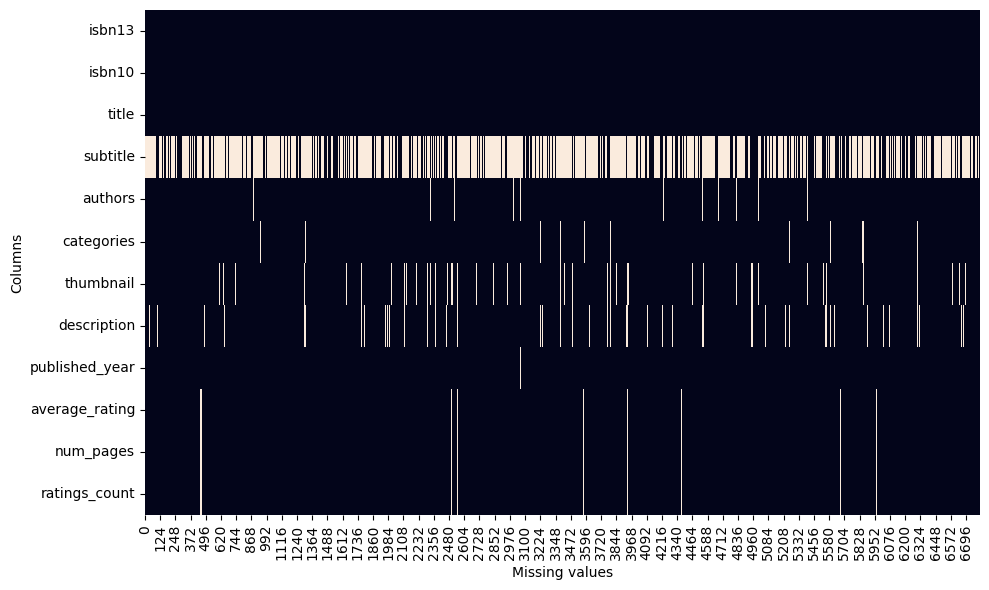

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(books.isna().T, cbar=False)
plt.ylabel("Columns")
plt.xlabel("Missing values")
plt.tight_layout()
plt.show()

In [ ]:
books["missing_description"] = np.where(books['description'].isna(),1,0)
books['age_of_book'] = CURRENT_YEAR - books['published_year']

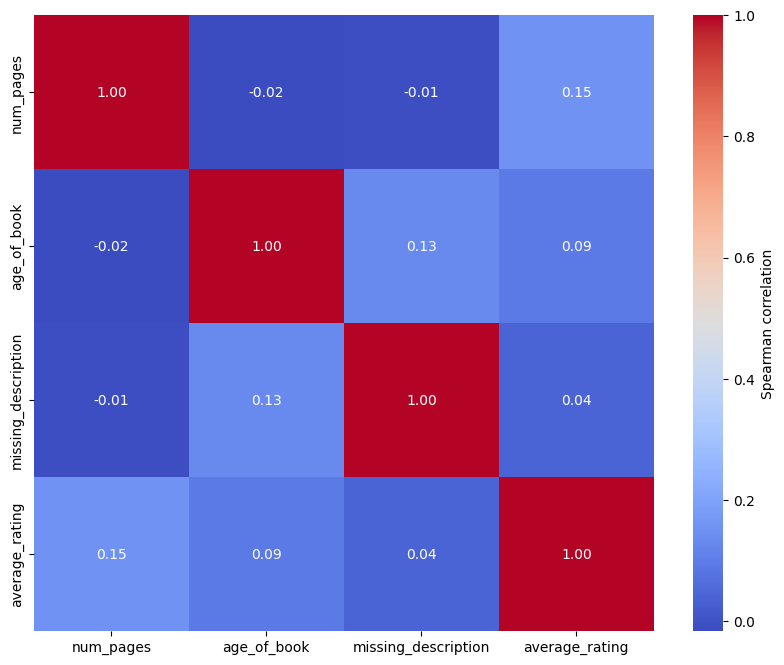

In [ ]:
cols_of_interest = ['num_pages', 'age_of_book', 'missing_description','average_rating']
# pearson is better when you're dealing with completely continuous variable but missing_description is binary
# so we use spearman as method for dealing with non-continuous values
corr = books[cols_of_interest].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"label":"Spearman correlation"})
plt.show()

In [ ]:
missing_many_data = books[(books['description'].isna())|
      (books['num_pages'].isna())|
      (books['average_rating'].isna())|
      (books['published_year'].isna())
]

missing_many_data.shape

(303, 14)

Since these observation are under 5% and have a lot of missing values, we'll be removing these observations

In [ ]:
books = books[(~books['description'].isna())&
      (~books['num_pages'].isna())&
      (~books['average_rating'].isna())&
      (~books['published_year'].isna())
]
books.shape

(6507, 14)

In [ ]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000
mean,9.780668e+12,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502
std,5.868404e+08,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000
25%,9.780317e+12,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000
50%,9.780552e+12,2002.000000,3.950000,304.000000,1.081000e+03,0.0,23.000000
75%,9.780807e+12,2005.000000,4.130000,418.000000,6.309500e+03,0.0,28.000000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,149.000000


In [ ]:
cat_dist = books['categories'].value_counts().sort_values(ascending=False).reset_index()

len(cat_dist.index)

531

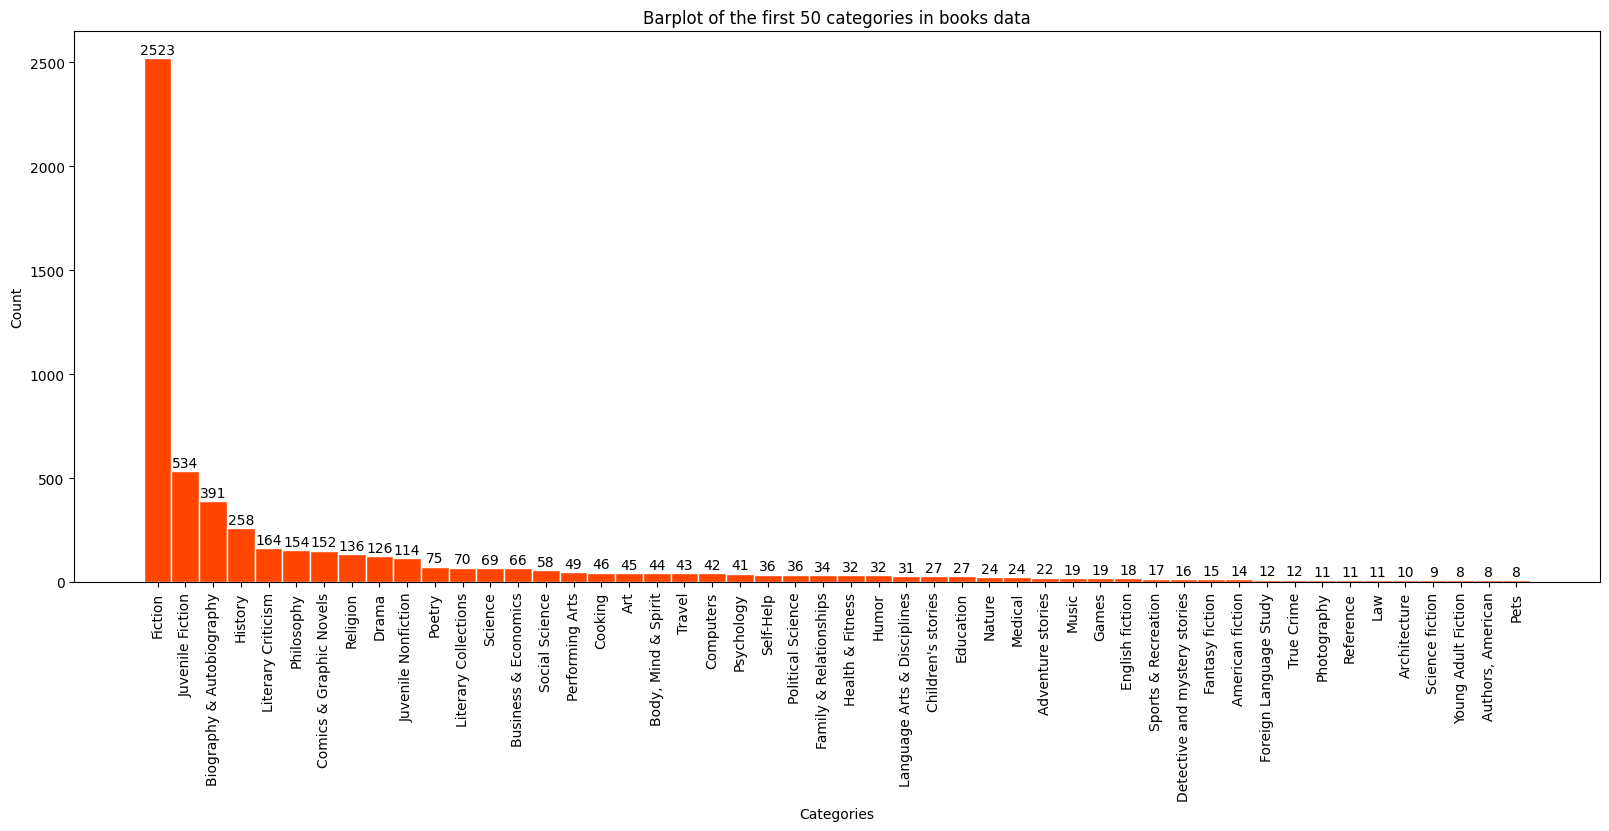

In [ ]:
N = 50
plt.figure(figsize=(16,8))
bars = plt.bar(cat_dist[:N]['categories'], cat_dist[:N]['count'], color='orangered', width=1, edgecolor='white')

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 5, height, ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title(f"Barplot of the first {N} categories in books data")
plt.show()

In [ ]:
books['description_word_count'] = books['description'].str.split().str.len()
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,description_word_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an ...",2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Tho...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gb...,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up unt...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gb...,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros...",2002.0,4.15,170.0,33684.0,0,23.0,45


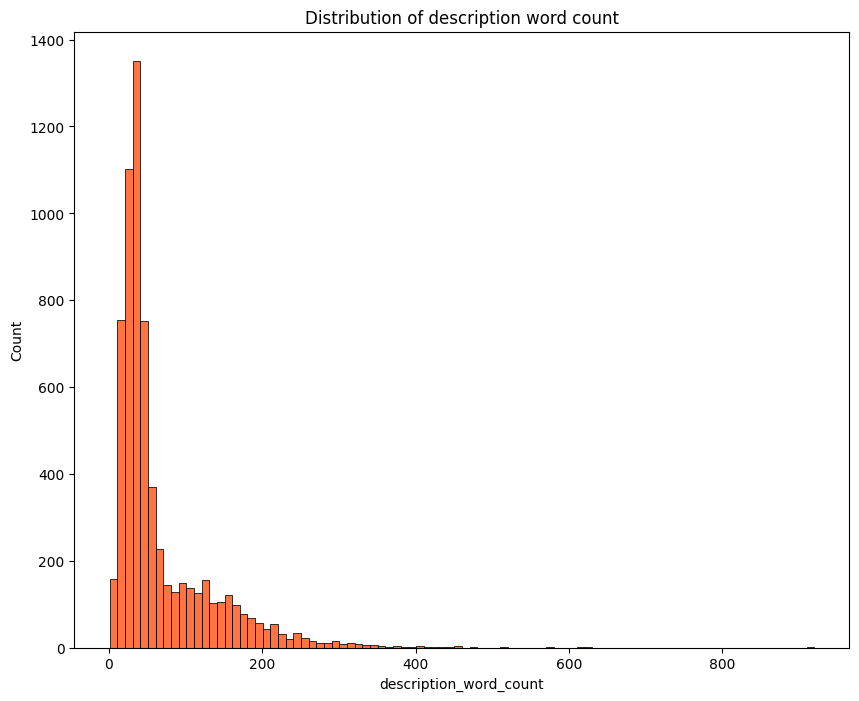

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(books['description_word_count'], binwidth = 10, color='orangered')
plt.title("Distribution of description word count")
plt.show()

In [ ]:
books[books['description_word_count'].between(25,34)]['description']

,description
9,Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetiet...
14,"Available in the U.S. for the first time, this is the second volume in the exceptional Legends o..."
20,"It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a..."
21,"Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contain..."
46,No one believes a little girl when she insists that she has witnessed a murder until she herself...
...,...
6760,"Joel, an English teacher, has never really liked Korea, but he decides to extend his stay so tha..."
6766,"Discusses the historical and intellectual background of the novel ""The Rule of Four,"" examining ..."
6775,Presents nearly one thousand recipes--from appetizers and salads to entrees and desserts--develo...
6779,"Edited by the creator and executive producer of the teen detective show, a collection of essays ..."


We're using 25 words and up for a cut-off for words as description

In [ ]:
books_25 = books[books['description_word_count'] >= 25]
books_25.shape

(5197, 15)

In [ ]:
books_25.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,description_word_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an ...",2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gb...,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up unt...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gb...,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros...",2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uVe5QK-gC&printsec=frontcover&img=1&zoom=1&source=gb...,"""In The Problem of Pain, C.S. Lewis, one of the most renowned Christian authors and thinkers, ex...",2002.0,4.09,176.0,37569.0,0,23.0,75


In [ ]:
# aggregating title and subtitle

books_25['title_and_subtitle'] = np.where(books_25['subtitle'].isna(),
                                    books_25['title'],
                                    books_25['title'].str.cat(books_25['subtitle'], sep = ': ')
                                          )

/tmp/ipython-input-3826759432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_25['title_and_subtitle'] = np.where(books_25['subtitle'].isna(),


In [ ]:
books_25['title_and_subtitle']

,title_and_subtitle
0,Gilead
1,Spider's Web: A Novel
3,Rage of angels
4,The Four Loves
5,The Problem of Pain
...,...
6802,Mistaken Identity
6803,Journey to the East
6804,The Monk Who Sold His Ferrari: A Fable About Fulfilling Your Dreams & Reaching Your Destiny
6805,I Am that: Talks with Sri Nisargadatta Maharaj


In [ ]:
books_25["tagged_description"] = books_25['isbn13'].astype(str).str.cat(books_25['description'], sep=' ')

/tmp/ipython-input-351208418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_25["tagged_description"] = books_25['isbn13'].astype(str).str.cat(books_25['description'], sep=' ')


In [ ]:
books_25['tagged_description']

,tagged_description
0,"9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade,..."
1,9780002261982 A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed p...
3,"9780006178736 A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on ..."
4,"9780006280897 Lewis' work on the nature of love divides love into four categories; Affection, Fr..."
5,"9780006280934 ""In The Problem of Pain, C.S. Lewis, one of the most renowned Christian authors an..."
...,...
6802,"9788172235222 On A Train Journey Home To North India After Long Months Of Travel Abroad, The Pla..."
6803,9788173031014 This book tells the tale of a man who goes on a wonderful and amazing journey thro...
6804,"9788179921623 Wisdom to Create a Life of Passion, Purpose, and Peace This inspiring tale provide..."
6805,"9788185300535 This collection of the timeless teachings of one of the greatest sages of India, i..."


In [ ]:
books['categories'].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
5,Philosophy,154
6,Comics & Graphic Novels,152
7,Religion,136
8,Drama,126
9,Juvenile Nonfiction,114


In [ ]:
category_mapping = {'Fiction' : "Fiction",
 'Juvenile Fiction': "Children's Fiction",
 'Biography & Autobiography': "Nonfiction",
 'History': "Nonfiction",
 'Literary Criticism': "Nonfiction",
 'Philosophy': "Nonfiction",
 'Religion': "Nonfiction",
 'Comics & Graphic Novels': "Fiction",
 'Drama': "Fiction",
 'Juvenile Nonfiction': "Children's Nonfiction",
 'Science': "Nonfiction",
 'Poetry': "Fiction"}

books["simple_categories"] = books['categories'].map(category_mapping)

In [ ]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,description_word_count,simple_categories
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an ...",2004.0,3.85,247.0,361.0,0,21.0,199,Fiction
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles...,2000.0,3.83,241.0,5164.0,0,25.0,205,NaN
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Tho...,1982.0,3.97,479.0,172.0,0,43.0,14,NaN
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gb...,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up unt...",1993.0,3.93,512.0,29532.0,0,32.0,57,Fiction
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gb...,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros...",2002.0,4.15,170.0,33684.0,0,23.0,45,NaN


In [ ]:
from google.colab import userdata

HUGGING_FACE_ACCESS_TOKEN = userdata.get('HUGGING_FACE_ACCESS_TOKEN')

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli",
                      device = 0,
                      use_auth_token = HUGGING_FACE_ACCESS_TOKEN)


Device set to use cuda:0


In [ ]:
fiction_categories = ["Fiction","Nonfiction"]
# fiction_categories = ["Romance","Thriller", "Philosophy","Psychological"]

In [ ]:
sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop = True)[0]
sequence

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [ ]:
classifier(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [ ]:
max_index = np.argmax(classifier(sequence, fiction_categories)["scores"])
max_label = fiction_categories[max_index]
max_label

'Fiction'

In [ ]:
def generate_predictions(sequence, categories):
  prediction = classifier(sequence, categories)
  # return prediction['labels'], predictions['scores']
  print(prediction)
  max_index = np.argmax(prediction["scores"])
  max_label = prediction["labels"][max_index]
  return max_label


In [ ]:
sequences = pd.Series(["This is a deep story but my own reflections of life", "once upon a time in a world a girl and a boy lived"])

generate_predictions(sequences, categories=fiction_categories)

{'sequence': 'This is a deep story but my own reflections of life', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.702191174030304, 0.29780885577201843]}


'Fiction'

In [ ]:
print(generate_predictions(sequence, fiction_categories))

Fiction


In [ ]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

N = 300

for i in tqdm(range(0,N)):
  seq = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop = True)
  predicted_cats += [generate_predictions(seq[i], fiction_categories)]
  actual_cats += ["Fiction"]

100%|██████████| 300/300 [00:39<00:00,  7.69it/s]


In [ ]:
for i in tqdm(range(0,N)):
  seq = books.loc[books["simple_categories"] == "Nonfiction", "description"].reset_index(drop = True)
  predicted_cats += [generate_predictions(seq[i], fiction_categories)]
  actual_cats += ["Nonfiction"]

100%|██████████| 300/300 [00:39<00:00,  7.58it/s]


In [ ]:
predictions_df = pd.DataFrame({'actual_categories':actual_cats, 'predicted_categories':predicted_cats})

In [ ]:
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Nonfiction
597,Nonfiction,Nonfiction
598,Nonfiction,Nonfiction


In [ ]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df['actual_categories'] == predictions_df['predicted_categories'], 1, 0)
)

In [ ]:
sum(predictions_df['correct_prediction'] == 0)

138

In [ ]:
predictions_df

,actual_categories,predicted_categories,correct_prediction
0,Fiction,Fiction,1
1,Fiction,Fiction,1
2,Fiction,Fiction,1
3,Fiction,Fiction,1
4,Fiction,Fiction,1
...,...,...,...
595,Nonfiction,Nonfiction,1
596,Nonfiction,Nonfiction,1
597,Nonfiction,Nonfiction,1
598,Nonfiction,Nonfiction,1


In [ ]:
accuracy_fiction = predictions_df.loc[predictions_df['actual_categories'] == 'Fiction','correct_prediction'].sum()/N * 100
accuracy_fiction

np.float64(65.66666666666666)

In [ ]:
accuracy_nonfiction = predictions_df.loc[predictions_df['actual_categories'] == 'Nonfiction','correct_prediction'].sum()/N * 100
accuracy_nonfiction

np.float64(88.33333333333333)

In [ ]:
accuracy = predictions_df['correct_prediction'].sum()/len(predictions_df.index)
accuracy

np.float64(0.77)

In [ ]:
#predicting all missing categories

isbns = []
predicted_cats = []

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13","description"]].reset_index(drop= True)
missing_cats

,isbn13,description
0,9780002261982,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles...
1,9780006163831,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Tho...
2,9780006280897,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros..."
3,9780006280934,"""In The Problem of Pain, C.S. Lewis, one of the most renowned Christian authors and thinkers, ex..."
4,9780006353287,Donation.
...,...,...
1806,9788125026600,Not only does Nietzsche for Beginners delve into the scandalous life and considerable works of F...
1807,9788171565641,"Forster's lively, informed originality and wit have made this book a classic. Avoiding the chron..."
1808,9788172235222,"On A Train Journey Home To North India After Long Months Of Travel Abroad, The Playboy Bhushan S..."
1809,9788173031014,This book tells the tale of a man who goes on a wonderful and amazing journey through Asia. His ...


In [ ]:
for i in tqdm(range(0,len(missing_cats.index))):
  sequence = missing_cats['description'][i]
  predicted_cats += [generate_predictions(sequence, fiction_categories)]
  isbns += [missing_cats["isbn13"][i]]

  0%|          | 2/1811 [00:00<05:57,  5.05it/s]

{'sequence': "A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at a

  0%|          | 5/1811 [00:00<03:32,  8.50it/s]

{'sequence': "Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dangerous.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.875241219997406, 0.1247587502002716]}
{'sequence': '"In The Problem of Pain, C.S. Lewis, one of the most renowned Christian authors and thinkers, examines a universally applicable question within the human condition: If God is good and all-powerful, why does he allow his creatures to suffer pain? With his signature wealth of compassion and insight, C.S. Lewis offers answers to these crucial questions and shares his hope and wisdom to help heal a world hungering for a true understanding of human nature."--Amazon.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8019900918006897, 0.19800984859466553]}
{'sequence': 'Donation.', 'l

  0%|          | 7/1811 [00:01<04:28,  6.71it/s]

{'sequence': "Until Vasco da Gama discovered the sea-route to the East in 1497-9 almost nothing was known in the West of the exotic cultures and wealth of the Indian Ocean and its peoples. It is this civilization and its destruction at the hands of the West that Richard Hall recreates in this book. Hall's history of the exploration and exploitation by Chinese and Arab travellers, and by the Portuguese, Dutch and British alike is one of brutality, betrayal and colonial ambition.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7350001335144043, 0.2649998366832733]}
{'sequence': "A new-cover reissue of the fourth book in the bestselling five-volume sf series created by the world-famous author of the Thomas Covenant chronicles -- and acclaimed as the 'best work of his career'. Events were not moving as the Amnion had intended. Once again humans had been false in their dealings with the aliens. As the planetoid Thanatos Minor exploded into atoms, the Trumpet hurtled into space only one 

  0%|          | 9/1811 [00:01<04:48,  6.25it/s]

{'sequence': 'Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5678254961967468, 0.4321745038032532]}
{'sequence': "One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5448165535926819, 0.4551834464073181]}


  1%|          | 10/1811 [00:01<04:26,  6.77it/s]

{'sequence': 'Fantasy-roman.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9884313344955444, 0.011568748392164707]}
{'sequence': 'An omnibus volume of the author\'s complete story of the Arthurian epic which includes: "The sword in the stone" (1939), "The witch in the wood" (1939), "The ill-made knight" (1940), "The candle in the wind" (published for the first time), and "The book of Merlyn." 1996.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8537854552268982, 0.14621450006961823]}


  1%|          | 13/1811 [00:01<04:14,  7.07it/s]

{'sequence': 'Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8670018911361694, 0.13299812376499176]}
{'sequence': 'Jimmy the Hand, boy thief of Krondor, lived in the shadows of the city. Though gifted beyond his peers, Jimmy is merely a pickpocket with potential--until he aids Prince Arutha in the rescue of Princess Anita from Duke Guy du Bas-Tyra, and runs afoul of "Black Guy\'s" secret police. Facing a choice between disappearing on his own or in a weighted barrel at the bottom of Krondor\'s harbor, Jimmy chooses the former. Forced to flee the only home he\'s ever known, Jimmy finds himself among the unsuspecting rural villagers of Land\'s End, where he hopes to prosper with his talents for con and thievery. But Land\'s End is home to many who tread the crooked path--and to a dark, dangerous presence e

  1%|          | 15/1811 [00:02<04:09,  7.20it/s]

{'sequence': "Gareth is just a frightened young lad when he is drafted in to be the whipping-boy for the unruly Prince Dagnarus. Yet as they grow to be men, an unshakable bond is formed. And it is their destiny for them to become the two most powerful - and feared - men in the kingdom. But when Dagnarus decides to become a knight himself, he begins a chain of evil events that threaten to destroy the entire kingdom. Only by uniting the Sovereign Stone can peace be restored, and it is up to Dagnarus' brother Helmos to try to achieve this impossible task, using his father's soldiers against his brother's army. All the while, Gareth is gaining mastery over the sinister Void magic, and he is devoted to helping his childhood companion.. This gripping story of magical power and corruption takes the unique viewpoint of focusing on the evil characters, as we follow them from boys to men. Filled with action, suspense and wonderfully imaginative characters, Water From the Well of Darkness is set 

  1%|          | 17/1811 [00:02<04:37,  6.47it/s]

{'sequence': "It was easy for Elizabeth. She married the man she loved. It was harder for Ruth. She married Elizabeth's son and then found that, somehow, she could never quite measure up. This thriller examines what women want and what they fear, as Ruth confronts the shifting borders of her own sanity.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8881032466888428, 0.11189676821231842]}
{'sequence': '1968 finds Nicholas Darrow wrestling with personal problems. How can he marry Rosalind when he is unable to avoid promiscuity? How can he become a priest when he finds it so difficult to live as one? And can he break his dangerous dependence on his father?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6470688581466675, 0.3529311418533325]}


  1%|          | 19/1811 [00:02<04:10,  7.14it/s]

{'sequence': 'It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6340219378471375, 0.36597809195518494]}
{'sequence': "Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the Church of England through the 20th century.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8907213807106018, 0.1092785969376564]}


  1%|          | 21/1811 [00:03<03:55,  7.59it/s]

{'sequence': 'Fantasy master Robin Hobb delivers the stunning second volume of her Liveship Traders trilogy, returning to the timeless city of Bingtown, where pirates now plague the coasts and the dreaded slave trade flourishes. Althea Vestrit doesnt have time to be afraid, for her familys newly awakened Liveship, Vivacia, has been seized by the ruthless pirate Kennit. So Althea hatches a bold plan. But to carry it out, she must recruit a Liveship that has already slain two crews -- and is said to be insane.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.947615385055542, 0.052384600043296814]}
{'sequence': "This tale begins with Jack Aubrey arriving home from his exploits in the Mediterranean to find England at peace following the Treaty of Amiens. He and his friend Stephen Maturin, surgeon and secret agent, begin to live the lives of country gentlemen, hunting, entertaining and enjoying more amorous adventures. Their comfortable existence, however, is cut short when Jack is overn

  1%|▏         | 23/1811 [00:03<03:37,  8.22it/s]

{'sequence': 'In this book, Jack Aubrey returns from his duties protecting whalers off the South American coast and is persuaded by a casual acquaintance to make investments in the City on the strength of supposedly certain information. From there he is led into the half-worlds of the London criminal underground and of government espionage - the province of his friend, Stephen Maturin.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7164689898490906, 0.2835310101509094]}
{'sequence': 'Miss Marple featured in 20 short stories, published in a number of different collections in Britain and America. Presented here in their order of publication, Miss Marple uses her unique insight to deduce the truth about a series of unsolved crimes.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.837267279624939, 0.16273272037506104]}


  1%|▏         | 25/1811 [00:03<03:33,  8.37it/s]

{'sequence': 'Hailed by "The New York Times Book Review" as "eye-opening, " this alternative history of the last 600 years begins as the Black Death kills nearly everyone in Europe, and China, India, and the nations of Islam now control the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5863032937049866, 0.41369667649269104]}
{'sequence': 'Spares - human clones, the ultimate health insurance. An eye for an eye - but some people are doing all the taking. The story of Jack Randall: burnt-out, dropped out, and way overdrawn at the luck bank. But as caretaker on a Spares Farm, he still has a choice, and it might make a difference.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5573787689208984, 0.4426212012767792]}


  1%|▏         | 27/1811 [00:03<03:44,  7.95it/s]

{'sequence': "Emma Watson a research physician has been training for the mission of a lifetime: to study living organisms in the microgravity of space. But the true and lethal nature of the experiment has not been revealed to NASA and once aboard the space station things start to go wrong. A culture of single-celled Archaeons, gathered from the deep sea, begin to rapidly multiply and infect the crew - with deadly and agonising results. As her estranged husband and ground crew at NASA work against the clock to launch a rescue Emma stuggles to contain the lethal microbe. But with the contagion threatening Earth's population, there are those who would leave the astronauts stranded in orbit, quarantined aboard the station.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5807725787162781, 0.41922736167907715]}
{'sequence': "Alone and vulnerable, Alys joins a nunnery in an attempt to escape poverty but finds herself thrown back into the outside world when Henry VIII's wreckers destroy he

  2%|▏         | 29/1811 [00:04<03:47,  7.84it/s]

{'sequence': "'Girls' Night In' features stories about growing up, growing out of, moving out, moving on, falling apart and getting it all together. So turn off your cell phone and curl up on the couch: this is one 'Girls' Night In' you won't want to miss.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6569111943244934, 0.34308886528015137]}
{'sequence': 'This collection of essays recounts what took place on the long morning after the 1960s, when everyone was coming down from their particular bad trip. Didion observes the dramas that explode as America goes into collective detox: the mother abandoning her five-year-old daughter on the central reservation of Interstate 5; Huey Newton and the Black Panthers preaching from their cells; students, in unconscious parody, simulating the disaffection of the 1960s.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8285922408103943, 0.17140771448612213]}


  2%|▏         | 32/1811 [00:04<03:30,  8.46it/s]

{'sequence': 'Tells the story of three generations of Chinese women, beginning at the turn of the century.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6267780661582947, 0.3732219636440277]}
{'sequence': 'Half of this new, post-Cold War world is intent on building a better Lexus, on streamlining their societies and economies for the global marketplace, while the other half is locked in elemental struggles over who owns which olive tree, which strip of land.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5972208380699158, 0.4027791917324066]}
{'sequence': 'FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #1 "NEW YORK TIMES" BESTSELLER "ANGELA\'S ASHES" Frank McCourt\'s glorious childhood memoir, "Angela\'s Ashes, " has been loved and celebrated by readers everywhere. It won the National Book Critics Circle Award, the "Los Angeles Times" Book Award and the Pulitzer Prize. Rarely has a book so swiftly found its place on the literary landscape. And now we have "\'Tis, " the story o

  2%|▏         | 34/1811 [00:04<02:51, 10.39it/s]

{'sequence': "A magical and fantastic collection of early stories by one of the most original children's authors of the 20th century. For 8-11 year olds.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8089415431022644, 0.1910584717988968]}
{'sequence': "Koko is Peter Straub's foray into the psychological horror of the Vietnam War.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5811909437179565, 0.41880902647972107]}
{'sequence': '"The two works \'On fairy-stories\' and \'Leaf by Niggle\' were first brought together to form the book \'Tree and leaf\' in 1964. In this new edition a third element is added: the poem Mythopoeia, the making of myths..."--Preface.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5935078859329224, 0.40649211406707764]}


  2%|▏         | 38/1811 [00:04<02:27, 11.98it/s]

{'sequence': 'The Famous Volume Of Tommy & Tuppence Linked Short Stories, Reissued In A New Look To Coincide With The Brand New Series Of Tommy & Tuppence Bbc Movies. Tommy And Tuppence Beresford Were Restless For Adventure, So When They Were Asked To Take Over Blunt S International Detective Agency, They Leapt At The Chance. After Their Triumphant Recovery Of A Pink Pearl, Intriguing Cases Kept On Coming Their Way: A Stabbing On Sunningdale Golf Course; Cryptic Messages In The Personal Columns Of Newspapers; And Even A Box Of Poisoned Chocolates.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7194187641143799, 0.2805812656879425]}
{'sequence': "An archaeologist's wife is murdered on the shores of the River Tigris in Iraq... It was clear to Amy Leatheran that something sinister was going on at the Hassanieh dig in Iraq; something associated with the presence of 'Lovely Louise', wife of celebrated archaeologist Dr Leidner. In a few days' time Hercule Poirot was due to drop in at th

  2%|▏         | 40/1811 [00:04<02:27, 11.99it/s]

{'sequence': "On the eve of the next Space Shuttle mission, a divided family comes together... Warm, witty and wise, All Families Are Psychotic is Coupland at the very top of his form: 'Irresistibly hilarious, unique and wonderful' Independent on Sunday In a cheap motel an hour from Cape Canaveral, Janet Drummond takes her medication, and does a rapid tally of the whereabouts of her children. Wade has spent the night in jail; suicidal Bryan is due to arrive at any moment with his vowel-free girlfriend, Shw; and then there is Sarah, 'a bolt of lightning frozen in midflash' -- here in Orlando to be the star of Friday's shuttle mission. With Janet's ex-husband and his trophy wife also in town, Janet spends a moment contemplating her family, and where it all went wrong. Or did it?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8881452083587646, 0.11185482889413834]}
{'sequence': 'A woman is killed by a poisoned dart in the enclosed confines of a commercial passenger plane... From seat

  2%|▏         | 44/1811 [00:05<02:14, 13.15it/s]

{'sequence': 'No one believes a little girl when she insists that she has witnessed a murder until she herself turns up drowned, and Hercule Poirot sets out to catch the killer.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.590891420841217, 0.40910854935646057]}
{'sequence': 'On the night before Christmas, cruel, tyrannical, filthy-rich Simeon Lee is found in his locked bedroom with his throat cut. Now Hercule Poirot must put his deductive powers to the test to solve one of his most chilling cases--and to prevent a clever killer from spilling more blood.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5131379961967468, 0.4868619740009308]}
{'sequence': "A ruthless international cartel seeks world domination... Framed in the doorway of Poirot's bedroom stood an uninvited guest, coated from head to foot in dust. The man's gaunt face stared for a moment, then he swayed and fell. Who was he? Was he suffering from shock or just exhaustion? Above all, what was the significance of t

  3%|▎         | 46/1811 [00:05<02:13, 13.26it/s]

{'sequence': "The Tuesday Night Club is a venue where locals challenge Miss Marple to solve recent crimes... One Tuesday evening a group gathers at Miss Marple's house and the conversation turns to unsolved crimes... The case of the disappearing bloodstains; the thief who committed his crime twice over; the message on the death-bed of a poisoned man which read 'heap of fish'; the strange case of the invisible will; a spiritualist who warned that 'Blue Geranium' meant death... Now pit your wits against the powers of deduction of the 'Tuesday Night Club'.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6019341349601746, 0.39806586503982544]}
{'sequence': "A man is shot at in a juvenile reform home - but someone else dies... Miss Marple senses danger when she visits a friend living in a Victorian mansion which doubles as a rehabilitiation centre for delinquents. Her fears are confirmed when a youth fires a revolver at the administrator, Lewis Serrocold. Neither is injured. But a myste

  3%|▎         | 50/1811 [00:05<02:08, 13.72it/s]

{'sequence': 'One Minute, Silly Heather Badcock Had Been Gabbling On At Her Movie Idol, The Glamorous Marina Gregg. The Next, Heather Suffered A Massive Seizure. But For Whom Was The Deadly Poison Really Intended? Marina S Frozen Expression Suggested She Had Witnessed Something Horrific. But, While Others Searched For Material Evidence, Jane Marple Conducted A Very Different Investigation Into Human Nature.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.735339879989624, 0.26466014981269836]}
{'sequence': "An old widow is brutally killed in the parlour of her cottage... Mrs McGinty died from a brutal blow to the back of her head. Suspicion fell immediately on her shifty lodger, James Bentley, whose clothes revealed traces of the victim's blood and hair. Yet something was amiss: Bentley just didn't look like a murderer. Poirot believed he could save the man from the gallows - what he didn't realise was that his own life was now in great danger...", 'labels': ['Nonfiction', 'Fiction'

  3%|▎         | 52/1811 [00:05<02:11, 13.41it/s]

{'sequence': "A perplexed girl thinks she might have killed someone... Three single girls shared the same London flat. The first worked as a secretary; the second was an artist; the third who came to Poirot for help, disappeared convinced she was a murderer. Now there were rumours of revolvers, flick-knives and blood stains. But, without hard evidence, it would take all Poirot's tenacity to establish whether the third girl was guilty innocent or insane...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5915843844413757, 0.4084155559539795]}
{'sequence': 'A young drifter finds more than he bargained for when he agrees to deliver a parcel to an English country house...', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5565292835235596, 0.44347065687179565]}
{'sequence': "Sauron has gathered the Rings of Power - the means by which he will be able to rule the world. All he needs now is the Ruling Ring, which has fallen into the hands of the hobbit Bilbo Baggins. Frodo Baggins is entr

  3%|▎         | 56/1811 [00:06<02:17, 12.75it/s]

{'sequence': 'In an absorbing narrative about personalities and social history, Menand discusses the Metaphysical Club, an informal group that met in Cambridge, Massachusetts, in 1872, to talk about ideas. Members included Oliver Wendell Holmes, Jr., William James, and Charles Sanders Peirce. 21 photos.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8759329915046692, 0.12406695634126663]}
{'sequence': "OWN BACK LIMITEDREVENGE ARRANGED, PRICE ACCORDING TO TASK, ALL DIFFICULT TASKS UNDERTAKEN, TREASURE HUNTED, ETC. It seemed like a marvellous scheme at the time! Frank and Jess had set up the business because they needed money - their pocket-money had been stopped just when Frank owed Buster Knell ten pence. Their father had put a quick stop to ERRANDS RUN, so why not try something that was bad instead? Offering to do dreadful things that other people didn't dare to do? So they pinned up the notice on the potting-shed and waited for customers. But of course, nothing's ever THAT strai

  3%|▎         | 58/1811 [00:06<02:59,  9.77it/s]

{'sequence': "With complete access to artwork created over a five-year period, this guide illustrates the creative development of The Return of the King. It contains over 600 images, from the earliest pencil sketches and conceptual drawings to magnificent paintings, sculptures and digital imagery that shaped the look of the film. Contributing artists include John Howe and Alan Lee, artists who have inspired Peter Jackson's vision of Middle-earth and worked with him to bring the trilogy to the big screen. Peter Jackson himself provides the afterword in which he discusses the importance of the conceptual art to the film. It covers most aspects of the eagerly awaited finale to the enormously successful trilogy, from locations and costumes to weaponry and creatures. The artists who created all of these diverse elements explain how they contributed to the development of the film.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5626786947250366, 0.4373213052749634]}
{'sequence': "Since i

  3%|▎         | 60/1811 [00:06<03:33,  8.20it/s]

{'sequence': "Tolkien's classic fantasy about the quest to save Middle-Earth--and the basis for Peter Jackson's Academy Award(-winning film trilogy--is now available in these Young Reader's Editions. Each book of the trilogy is available individually, or together in a three-volume paperback boxed set.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.910649836063385, 0.0893501415848732]}
{'sequence': 'When a dangerous necromancer threatens to unleash a long-buried evil, Lirael and Prince Sameth are drawn into a battle to save the Old Kingdom and reveal their true destinies. Suggested level: secondary.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5811635255813599, 0.41883647441864014]}


  3%|▎         | 62/1811 [00:07<04:08,  7.03it/s]

{'sequence': 'Never before published in a single volume, Tolkien\'s four novellas ("Farmer Giles of Ham, Leaf by Niggle, Smith of Wootton Major," and "Roverandom") and one book of poems ("The Adventures of Tom Bombadil") are gathered together in a fully illustrated set.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.911091148853302, 0.08890882134437561]}
{'sequence': "A new 'The Doors of Perception' for the 21st century? A visionary journey from cynicism to shamanism by a brilliant young US writer.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5724484920501709, 0.4275515377521515]}


  4%|▎         | 64/1811 [00:07<04:05,  7.10it/s]

{'sequence': 'A matter of life and death - and the Throne of England', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7063723206520081, 0.29362770915031433]}
{'sequence': "It should be the most natural thing in the world. But in Tony Parsons' latest bestseller, three couples discover that Mother Nature can be one hell of a bitch.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8571970462799072, 0.14280292391777039]}


  4%|▎         | 66/1811 [00:07<04:22,  6.64it/s]

{'sequence': 'Gipsy S Acre Was A Truly Beautiful Upland Site With Views Out To Sea And In Michael Rogers It Stirred A Child-Like Fantasy. There, Among The Dark Fir Trees, He Planned To Build A House, Find A Wonderful Girl And Live Happily Ever After, Yet, As He Left The Village, A Shadow Of Menace Hung Over The Land. For This Was The Place Where Accidents Happened. Perhaps Michael Should Have Heeded The Locals Warnings: There S No Luck For Them As Meddles With Gipsy S Acre .', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5386671423912048, 0.46133288741111755]}
{'sequence': "'The Harper's Essay' is reprinted in this volume alongside personal essays and painstaking, often funny reportage. Although his subjects range widely, each piece wrestles with the erosion of civic life and private dignity, and the hidden persistence of loneliness in postmodern America.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8660560250282288, 0.13394401967525482]}


  4%|▍         | 68/1811 [00:08<04:45,  6.11it/s]

{'sequence': "A mysterious stranger appears at a New Year's Eve party, becoming the enigmatic sleuthing sidekick to the snobbish Mr Satterthwaite... So far, it had been a typical New Year's Eve house party. But Mr Satterthwaite - a keen observer of human nature - sensed that the real drama of the evening was yet to unfold. So it proved when a mysterious stranger arrived after midnight. Who was this Mr Quin? And why did his presence have such a pronounced effect on Eleanor Portal, the woman with the dyed-black hair?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5063938498497009, 0.49360620975494385]}
{'sequence': "A selection of mysteries, some light-hearted, some romantic, some very deadly... Twelve tantalizing cases... the curious disappearance of Lord Listerdale; a newlywed's fear of her ex-fiance; a strange encounter on a train; a domestic murder investigation; a wild man's sudden personality change; a retired inspector's hunt for a murderess; a young woman's impersonation of 

  4%|▍         | 70/1811 [00:08<04:51,  5.97it/s]

{'sequence': 'Nonsense rhyming story. 4 yrs+', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6264848709106445, 0.37351515889167786]}
{'sequence': 'From bang-ups and hang-ups to lurches and slumps. Dr. Seuss takes a hilarious look at the mishaps and misadventures that life may have in store for us.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7928209900856018, 0.2071790248155594]}


  4%|▍         | 72/1811 [00:08<04:33,  6.37it/s]

{'sequence': "Perhaps the best book to emerge from the Vietnam War -- reissued alongside five other jewels of the Flamingo backlist from the 1970s. First published in1973, this intensely personal novel about one foot soldier's tour of duty in Vietnam established Tim O'Brien's reputation as the outstanding chronicler of the Vietnam experience for a generation of Americans. From basic training to the front line and back again, he takes the reader on an unforgettable journey -- walking the minefields of My Lai, fighting the heat and the snipers in an alien land, crawling into the ghostly tunnels -- as he explores the ambiguities of manhood and morality in a war no one believes in.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7853366732597351, 0.2146633416414261]}
{'sequence': "THE GREATEST FANTASY EPIC OF OUR TIME While the evil might of the Dark Lord Sauron swarmed out to conquer all Middle-earth, Frodo and Sam struggled deep into Mordor, seat of Sauron's power. To defeat the Dark

  4%|▍         | 74/1811 [00:09<05:20,  5.43it/s]

{'sequence': "A boy imagines what it would be like if he had such things as duck feet, a whale spout, and an elephant's trunk.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5345883369445801, 0.46541163325309753]}
{'sequence': 'Tie your tongue in terrible knots as you try to read aloud. Nonsense rhyming story.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8538557887077332, 0.14614421129226685]}


  4%|▍         | 76/1811 [00:09<03:58,  7.29it/s]

{'sequence': "A study guide for the novel There's a Boy in the Girl's bathroom.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9548566937446594, 0.045143239200115204]}
{'sequence': "At computer giant Microsoft, Dan, Susan, Abe, Todd and Bug are struggling to get a life. The job may be super cool, the pay may be astronomical, but they're heading nowhere, and however hard they work, however many shares they earn, they're never going to be as rich as Bill. And besides, with all the hours they're putting in, their best relationships are on e-mail. Something's got to give.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5680055022239685, 0.4319944977760315]}


  4%|▍         | 78/1811 [00:09<04:05,  7.05it/s]

{'sequence': "The brilliant new novel from the bestselling cult author of them all. Susan and John need to disappear -- Susan and John need to find each other. Meet Susan Colgate -- Miss Wyoming. Winner of a hundred teen pageants, child TV soap star, owner of a hideously pushy mother... and now reduced to small, brainless parts in small, brainless movies. Oh, and sole survivor of Flight 802. If she were to walk away from the wreckage now, before the emergency crews get here, she could disappear and nobody would ever know... Meet John Johnson -- action film producer (Bel Air P. I... um, Bel Air P. I. 2), occasional sado-masochist, junkie. He just died -- but only for 5 minutes. But while he was gone, he saw a vision of a woman's face and realized that it was time to escape, to ditch the baggage of being horny, rich, lonely John Johnson and to lose himself. To disappear. Wouldn't it be nice if they were to find themselves and get together?In many ways a reprise of Girlfriend in a Coma, M

  4%|▍         | 80/1811 [00:10<04:38,  6.22it/s]

{'sequence': "The final POIROT omnibus, featuring the last four appearances of the detective's side-kick, the sleuthing crime novelist Ariadne Oliver: Third Girl, Hallowe'en Party, Elephants Can Remember and The Pale Horse. Poirot and Mrs Oliver continue their sleuthing in the 1960s in four uncharacteristically 'modern' novels with an added twist of danger...Third Girl Poirot finally admits he is growing old as a perplexed girl thinks she may have killed someone. Here Christie dragged Poirot into the swinging 60s and effectively squared him up against a world featuring sex, drugs and hippies. Hallowe'en Party A teenage murder witness is drowned in a tub of apples. This was only the second time Christie wrote about the death of a child, and is all the more engrossing for it. Elephants Can Remember An old husband and wife double murder has never been solved -- until now. This was the very last Poirot story that Agatha Christie wrote, and garnered good reviews. The Pale Horse A priest's d

  5%|▍         | 82/1811 [00:10<04:14,  6.80it/s]

{'sequence': 'An epic narrative that takes a look at slavery in all of its moral complexities.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6301774978637695, 0.36982250213623047]}
{'sequence': 'A potent pathway to self-awakening that will help you to live your greatest life and claim the happiness, prosperity and inner peace that you deserve. From the author of the international bestseller, The Monk Who Sold His Ferrari.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6110376119613647, 0.38896235823631287]}


  5%|▍         | 84/1811 [00:10<03:22,  8.54it/s]

{'sequence': "The anarchic, phenomenally strong-selling classic from the godfather of the Beats: revitalised with a cool new jacket. WELCOME TO INTERZONE...Say hello to Bradley the Buyer, the best narcotics agent in the business. Attend international playboy A.J.'s annual party, where the punch is to be treated with extreme caution. Meet Dr 'Fingers' Schafer, the Lobotomy Kid and his giant centipede, 'The Complete American De-anxietized Man.' And enter the dark and infernal mind of Bill Lee as he pursues his daily quest for the ultimate merchandise...Provocative, influential, morbidly fascinating, Naked Lunch is an apocalyptic ride through the darker recesses of the human psyche.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5853675603866577, 0.4146324396133423]}
{'sequence': 'The title story in this collection of shorts now a film from Ang Lee.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.819193422794342, 0.18080656230449677]}
{'sequence': "One of C.S. Lewis's most imagin

  5%|▍         | 88/1811 [00:10<02:40, 10.73it/s]

{'sequence': 'The only style manual ever to appear on the best-seller lists offers practical, fundamental advice on improving writing skills, promoting a style marked by simplicity, orderliness, and sincerity', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5818005800247192, 0.4181993901729584]}
{'sequence': 'While riding in the rumble seat of their old yellow car, three children spot and adopt a neglected pony.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5200390219688416, 0.47996097803115845]}
{'sequence': 'A Swedish boy long ago accompanies his ... [relatives] fromn their Scandinavian farm to ... Russia in an attempt to earn money by making unusual objects from human hair." - Book Buyer\'s Guide.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6228306293487549, 0.3771694004535675]}


  5%|▍         | 90/1811 [00:10<02:30, 11.43it/s]

{'sequence': 'The author of The Battle for Human Nature explains why too much choice has led to the ever increasing complexity of everyday decisions, why too much of a good thing has become detrimental to human psychological and emotional well-being, and how to focus our lives on making the right choices. Reprint. 35,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8909710645675659, 0.10902900248765945]}
{'sequence': 'Provides daily reminders of the differences in behavior and communication styles of men and women', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6820754408836365, 0.31792452931404114]}
{'sequence': 'The outspoken co-host of The Howard Stern Show reveals her disturbing background as a sexually abused child of poverty and describes her ongoing struggle for recovery and her friendship with Stern. 200,000 first printing. $150,000 ad/promo. Tour.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6847689747810364, 0.31523099541664124]}


  5%|▌         | 92/1811 [00:11<02:35, 11.04it/s]

{'sequence': "In her new essay collection, the beloved author of High Tide in Tucson brings to us, out of one of history's darker moments, an extended love song to the world we still have. Whether she is contemplating the Grand Canyon, her vegetable garden, motherhood, genetic engineering, or the future of a nation founded on the best of all human impulses, these essays are grounded in the author's belief that our largest problems have grown from the earth's remotest corners as well as our own backyards, and that answers may lie in both those places. Sometimes grave, occasionally hilarious, and ultimately persuasive, Small Wonder is a hopeful examination of the people we seem to be, and what we might yet make of ourselves.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7656477093696594, 0.2343522608280182]}
{'sequence': 'In this revolutionary bestseller, Harvard professor Clayton M. Christensen says outstanding companies can do everything right and still lose their market leadersh

  5%|▌         | 94/1811 [00:11<02:48, 10.18it/s]

{'sequence': "A corporate mole's-eye view of the society in which we all live and toil, creating one of the most entertaining, thought provoking, and just plain funny bodies of work in contemporary letters. Stanley Bing knows whereof he speaks. He has lived the last two decades working inside a gigantic multinational corporation, kicking and screaming all the way up the ladder. He has seen it all -- mergers, acquisitions, layoffs, the death of the three-martini lunch -- and has himself been painfully re-engineered a number of times. He has eaten and drunk way too much, stayed in hotels far too good for him, waited for limousines in the pouring rain, and enjoyed it all. Sort of. Most importantly, Bing has seen management at its best and worst, and has practiced both as he made the transition from an inexperienced player who hated pompous senior management to a polished strategist who kind of sees its point of view now and then. In one essential volume, here is all you need to know to ma

  5%|▌         | 96/1811 [00:11<03:18,  8.63it/s]

{'sequence': '"This is not a book about charismatic visionary leaders. It is not about visionary product concepts or visionary products or visionary market insights. Nor is it about just having a corporate vision. This is a book about something far more important, enduring, and substantial. This is a book about visionary companies." So write Jim Collins and Jerry Porras in this groundbreaking book that shatters myths, provides new insights, and gives practical guidance to those who would like to build landmark companies that stand the test of time. Drawing upon a six-year research project at the Stanford University Graduate School of Business, Collins and Porras took eighteen truly exceptional and long-lasting companies -- they have an average age of nearly one hundred years and have outperformed the general stock market by a factor of fifteen since 1926 -- and studied each company in direct comparison to one of its top competitors. They examined the companies from their very beginning

  5%|▌         | 99/1811 [00:11<03:09,  9.03it/s]

{'sequence': "Each summer, on the fields of glorious Cape Marlin, off the New England coast, the nation's best college players gather to play the most important baseball of their lives. Jack Faber is a young hotshot pitcher with an unhittable slider and a rocket for a fastball. He plays for the fabled Seapuit Seawolves and dreams of making the Big Show. But a new coach, the scowling Bruno Riazzi, a former pro catcher, resents the kid's celebrity status and decides to knock him down a peg or two. And he stops at nothing to make it happen. Humiliated, Jack loses his lifelong art, and with it his passion for the game, as well as, mysteriously, his ability to throw. A devastated Jack Faber is released from the St. Charles College roster. But the Seawolves coaches won't give up on him. They bring Jack back to Cape Marlin, determined to help him rediscover his lost talent. He finds himself again under the summer sun, coaches and old friends standing by him. But in the end it will be up to Ja

  6%|▌         | 101/1811 [00:12<03:07,  9.11it/s]

{'sequence': "One of the most important and influential books written in the past half-century, Robert M. Pirsig's Zen and the Art of Motorcycle Maintenance is a powerful, moving, and penetrating examination of how we live . . . and a breathtaking meditation on how to live better. Here is the book that transformed a generation: an unforgettable narration of a summer motorcycle trip across America's Northwest, undertaken by a father and his young son. A story of love and fear -- of growth, discovery, and acceptance -- that becomes a profound personal and philosophical odyssey into life's fundamental questions, this uniquely exhilarating modern classic is both touching and transcendent, resonant with the myriad confusions of existence . . . and the small, essential triumphs that propel us forward.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8224367499351501, 0.17756326496601105]}
{'sequence': 'Joe Simpson and his climbing partner, Simon Yates, had just reached the top of a 21,000

  6%|▌         | 105/1811 [00:12<02:31, 11.26it/s]

{'sequence': "Forgotten New York is your passport to more than 300 years of history, architecture, and memories hidden in plain sight. Houses dating to the first Dutch settlers on Staten Island; yellow brick roads in Brooklyn; clocks embedded in the sidewalk in Manhattan; bishop's crook lampposts in Queens; and a white elephant in the Bronx—this is New York and this is your guide to seeing it all. Forgotten New York covers all five boroughs with easy-to-use maps and suggested routes to hundreds of out-of-the way places, antiquated monuments, streets to nowhere, and buildings from a time lost. Forgotten New York features: Quiet Places Truly Forgotten History Happened Here What Is This Thing? Forgotten People And so much more", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.863582193851471, 0.13641783595085144]}
{'sequence': "Marilyn Johnson was enthralled by the remarkable lives that were marching out of this world—so she sought out the best obits in the English language and the peop

  6%|▌         | 109/1811 [00:12<02:30, 11.29it/s]

{'sequence': 'A sterling collection of the year\'s most shocking, compelling, and gripping writing about real-life crime, the 2006 edition of The Best American Crime Writing offers fascinating vicarious journeys into a world of felons and their felonious acts. This thrilling compendium includes: Jeffrey Toobin\'s eye-opening exposé in The New Yorker about a famous prosecutor who may have put the wrong man on death row Skip Hollandsworth\'s amazing but true tale of an old cowboy bank robber who turned out to be a "classic good-hearted Texas woman" Jimmy Breslin\'s stellar piece about the end of the Mob as we know it', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5446374416351318, 0.45536261796951294]}
{'sequence': "Traces the author's personal view of the history and significance of the novel in western civilization, arguing that a novel's development crosses international and language boundaries while serving to reveal previously unknown aspects of a reader's existence. By the aut

  6%|▌         | 113/1811 [00:13<02:09, 13.12it/s]

{'sequence': 'In a deepening of the thinking begun in The Myth of Analysis and Re-Visioning Psychology, James Hillman develops the first new view of dreams since Freud and Jung.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.776424765586853, 0.22357524931430817]}
{'sequence': 'In The Dance of Intimacy, the bestselling author of The Dance of Anger outlines the steps to take so that good relationships can be strengthened and difficult ones can be healed. Taking a careful look at those relationships where intimacy is most challenged--by distance, intensity, or pain--she teaches us about the specific changes we can make to achieve a more solid sense of self and a more intimate connectedness with others. Combining clear advice with vivid case examples, Dr. Lerner offers us the most solid, helpful book on intimate relationships that both women and men may ever encounter.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8979215621948242, 0.10207846015691757]}
{'sequence': "An unsparin

  6%|▋         | 115/1811 [00:13<02:20, 12.06it/s]

{'sequence': "This companion volume to Care of the Soul offers more of Thomas Moore's inspiring wisdom and empathy as it expands on his ideas about life, love, and the mysteries of human relationships. In Care of the Soul, Thomas Moore explored the importance of nurturing the soul and struck a chord nationwide — the book became a long-term bestseller, topping charts across the country and selling 550,000 copies in hardcover and paperback combined. Building on that book's wisdom, Soul Mates, already a hardcover bestseller, explores how relationships of all kinds enhance our lives and fulfill the needs of our souls. Moore emphasizes the difficulties that inevitably accompany many relationships and focuses on the need to work through these differences in order to experience the deep reward that comes with intimacy and unconfined love.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8002087473869324, 0.19979119300842285]}
{'sequence': "Milan Kundera has established himself as one of th

  6%|▋         | 117/1811 [00:13<02:22, 11.88it/s]

{'sequence': '"Ordinarily, events that change our path are impersonal affairs, and yet extremely personal. My teacher, don Juan Matsus, said this is guiding me as his apprentice to collect what I considered to be the memorable events of my life…. Don Juan described the total goal of the shamanistic knowledge that he handled as the preparation for facing the definitive journey: the journey that every human being has to take at the end of his life. He said that what modern man referred to vaguely as life after death was, for those shamans, a concrete region filled to capacity with practical affairs of a different order than the practical affairs of daily life, yet bearing a similar functional practicality. Don Juan considered that to collect the memorable in their lives was, for shamans, the preparation for their entrance into that concrete region, which they called the active side of infinity." In this book written immediately before his death, anthropologist and shaman Carlos Castaneda

  7%|▋         | 121/1811 [00:13<02:28, 11.42it/s]

{'sequence': "Beauty does not linger, it only visits. Yet beauty's visitation affects us and invites us into its rhythm, it calls us to feel, think, and act beautifully in the world: to create and live a life that awakens the Beautiful. Beauty is a gentle but urgent call to awaken. Bestselling author John O'Donohue opens our eyes, hearts, and minds to the wonder of our own relationship with beauty by exposing the infinity and mystery of its breadth. His words return us to the dignity of silence, profundity of stillness, power of thought and perception, and the eternal grace and generosity of beauty's presence. In this masterful and revelatory work, O'Donohue encourages our greater intimacy with beauty and celebrates it for what it really is: a homecoming of the human spirit. As he focuses on the classical, medieval, and Celtic traditions of art, music, literature, nature, and language, O'Donohue reveals how beauty's invisible embrace invites us toward new heights of passion and creativ

  7%|▋         | 123/1811 [00:14<02:48, 10.02it/s]

{'sequence': 'National Book Award-winning author Jonathan Kozol presents his shocking account of the American educational system in this stunning New York Times bestseller, which has sold more than 250,000 hardcover copies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.864815354347229, 0.1351846307516098]}
{'sequence': 'The fiftieth Anniversary Edition of the groundbreaking international bestseller that has shown millions of readers how to achieve rich, productive lives by developing their hidden capacities for love Most people are unable to love on the only level that truly matters: love that is compounded of maturity, self-knowledge, and courage. As with every art, love demands practice and concentration, as well as genuine insight and understanding. In his classic work, The Art of Loving, renowned psychoanalyst and social philosopher Erich Fromm explores love in all its aspects—not only romantic love, steeped in false conceptions and lofty expectations, but also brotherly love

  7%|▋         | 125/1811 [00:14<04:39,  6.02it/s]

{'sequence': 'From the savannas of Africa to modern-day labs for biomechanical analysis and molecular genetics, Smithsonian Intimate Guide to Human Origins reveals how anthropologists are furiously redrawing the human family tree. Their discoveries have spawned a host of new questions: Should chimpanzees be included as a human species? Was it the physical difficulty of human childbirth that encouraged the development of social groups in early human species? Did humans and Neanderthals interbreed? Why did humans supplant Neanderthals in the end? In answering such questions, Smithsonian Intimate Guide to Human Origins sheds new light on one of the most important questions of all: What makes us human?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8623114824295044, 0.13768847286701202]}


  7%|▋         | 126/1811 [00:15<05:21,  5.25it/s]

{'sequence': 'A collection of artfully decorated postcards with secrets anonymously written on them by people from all over the world and sent to the founder of PostSecret, a community art project that evolved into a website.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6545100808143616, 0.3454899489879608]}


  7%|▋         | 127/1811 [00:15<06:10,  4.55it/s]

{'sequence': 'Postsecret.com founder Frank Warren is back with an irresistible addition to his bestselling PostSecret series. For The Secret Lives of Men and Women, Warren has selected a never-before-seen collection of postcards bearing the explosive confessions and captivating revelations of men and women everywhere. Created using photographs, collages, illustrations, and more, the handmade cards offer a compelling dialogue on some of today’s most provocative topics—from marriage and infidelity, to parenting, office politics, repressed fantasies, and even abortion—daring us to consider how well we really know our friends, family, even ourselves.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.721397340297699, 0.27860262989997864]}


  7%|▋         | 128/1811 [00:15<06:49,  4.11it/s]

{'sequence': 'A bestselling author shows how we can reclaim and make peace with the "shadow" side of our personality.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7295318245887756, 0.27046823501586914]}


  7%|▋         | 129/1811 [00:15<07:20,  3.82it/s]

{'sequence': 'Rainforest Healing from Your Home and Garden Find alternatives to chemical anti-depressants and painkillers in your spice rack. Learn about natural anti-itch salves for insect bites. Soothe and relieve envy, grief, sadness, and fear the Maya way. Rid your house of negative energy with a Maya cleansing ritual. Try the easy-to-make bronchitis remedy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8610571026802063, 0.1389429271221161]}


  7%|▋         | 130/1811 [00:16<07:37,  3.68it/s]

{'sequence': "A beautiful gift edition of Thomas Bulfinch's classic retelling of famous myths and folk legends, with interpretive essays by Princeton classics professor Richard P. Martin.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5859405994415283, 0.4140594005584717]}


  7%|▋         | 132/1811 [00:16<06:33,  4.27it/s]

{'sequence': 'A study of the influence Romanticism exerts upon Western culture.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6512578129768372, 0.3487422466278076]}
{'sequence': 'A young pioneer couple homesteading in the Dakotas are beset with hardships and misfortune.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6607480645179749, 0.33925193548202515]}


  7%|▋         | 134/1811 [00:17<05:32,  5.05it/s]

{'sequence': "Strange things happen at Hexwood Farm. From her window, Ann Stavely watches person after person disappear through the farm's gate -- and never come out again. Later, in the woods nearby, she meets a tormented sorcerer, who seems to have arisen from a centuries-long sleep. But Ann knows she saw him enter the farm just that morning. Meanwhile, time keeps shifting in the woods, where a small boy -- or perhaps a teenager -- has encountered a robot and a dragon. Long before the end of their adventure, the strangeness of Hexwood has spread from Earth right out to the center of the galaxy.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6204575300216675, 0.3795424699783325]}
{'sequence': "What Would Machiavelli Do? He would feast on other people's discord He wouldn't exactly seek the company of ass-kissers and bimbos, but he wouldn't reject them out of hand either He would realize that loving yourself means never having to say you're sorry He would kill people, but only if h

  8%|▊         | 136/1811 [00:17<05:38,  4.94it/s]

{'sequence': 'First published more than three decades ago, this reissue of Rachel Carson\'s award-winning classic brings her unique vision to a new generation of readers. Stunning new photographs by Nick Kelsh beautifully complement Carson\'s intimate account of adventures with her young nephew, Roger, as they enjoy walks along the rocky coast of Maine and through dense forests and open fields, observing wildlife, strange plants, moonlight and storm clouds, and listening to the "living music" of insects in the underbrush. "If a child is to keep alive his inborn sense of wonder." Writes Carson, "he needs the companionship of at least one adult who can share it, rediscovering with him the joy, excitement and mystery of the world we live in." The Sense of Wonder is a refreshing antidote to indifference and a guide to capturing the simple power of discovery that Carson views as essential to life. In her insightful new introduction, Linda Lear remembers Rachel Carson\'s groundbreaking achie

  8%|▊         | 137/1811 [00:17<05:12,  5.35it/s]

{'sequence': "The New York Times Bestseller! Learn how to keep your cool and get the results you want when emotions flare. When stakes are high, opinions vary, and emotions run strong, you have three choices: Avoid a crucial conversation and suffer the consequences; handle the conversation badly and suffer the consequences; or read Crucial Conversations and discover how to communicate best when it matters most. Crucial Conversations gives you the tools you need to step up to life's most difficult and important conversations, say what's on your mind, and achieve the positive resolutions you want. You'll learn how to: Prepare for high-impact situations with a six-minute mastery technique Make it safe to talk about almost anything Be persuasive, not abrasive Keep listening when others blow up or clam up Turn crucial conversations into the action and results you want Whether they take place at work or at home, with your neighbors or your spouse, crucial conversations can have a profound im

  8%|▊         | 139/1811 [00:17<05:04,  5.48it/s]

{'sequence': '"You\'ll not only break the ice, you\'ll melt it away with your new skills." -- Larry King "The lost art of verbal communication may be revitalized by Leil Lowndes." -- Harvey McKay, author of “How to Swim with the Sharks Without Being Eaten Alive” What is that magic quality makes some people instantly loved and respected? Everyone wants to be their friend (or, if single, their lover!) In business, they rise swiftly to the top of the corporate ladder. What is their "Midas touch?" What it boils down to is a more skillful way of dealing with people. The author has spent her career teaching people how to communicate for success. In her book How to Talk to Anyone (Contemporary Books, October 2003) Lowndes offers 92 easy and effective sure-fire success techniques-- she takes the reader from first meeting all the way up to sophisticated techniques used by the big winners in life. In this information-packed book you’ll find: 9 ways to make a dynamite first impression 14 ways to 

  8%|▊         | 141/1811 [00:18<04:47,  5.80it/s]

{'sequence': 'Practice makes perfect Italian verb tenses goes beyond other verb books to coach you in when and why verb tenses are used. In addition to an array of fully conjugated verbs, you will find clear and concise explanations that pinpoint why specific tenses work in given situations as well as plenty of engaging examples and numerous skill-building exercises. This is the ideal reference/workbook for beginning to intermediate Italian language learners whose goal is to learn to speak and write Italian with fluency.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7361325621604919, 0.26386746764183044]}
{'sequence': 'Written by FBI insiders, this updated best-seller offers a look at the legal, procedural, and technical steps of incident response and computer forensics. Including new chapters on forensic analysis and remediation, and real-world case studies, this revealing book shows how to counteract and conquer today’s hack attacks.', 'labels': ['Nonfiction', 'Fiction'], 'scor

  8%|▊         | 143/1811 [00:18<05:16,  5.28it/s]

{'sequence': 'The best-selling textbook in the field, The Last Dance offers an interdisciplinary introduction to death, dying, and bereavement. Integrating the experiential and the scholarly, as well as the emotional and intellectual dimensions of death and dying, the seventh edition has been thoroughly revised to provide the most cutting-edge coverage of death studies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7494253516197205, 0.25057464838027954]}
{'sequence': "Who Moved My Cheese? is a simple parable that reveals profound truths. It is the amusing and enlightening story of four characters who live in a maze and look for cheese to nourish them and make them happy. Cheese is a metaphor for what you want to have in life, for example a good job, a loving relationship, money or possessions, health or spiritual peace of mind. The maze is where you look for what you want, perhaps the organisation you work in, or the family or community you live in. The problem is that the cheese

  8%|▊         | 145/1811 [00:19<04:36,  6.02it/s]

{'sequence': 'Despite the modern day emphasis on physical appearance, there is an easier way to become a desirable person rather than dieting or buying expensive clothes. Regardless of outer appearance, if people have minds that are fascinating, creative, and exciting--if they are good thinkers--they can be beautiful. The clear, practical instructions in this guide demonstrate how applying lateral and parallel thinking skills to conversation can improve the mind. The greatest impact is made on others through speech, and by learning how to listen, make a point, and maneuver a discussion, anyone can become more imaginative, more engaging, and more beautiful.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7983184456825256, 0.20168155431747437]}
{'sequence': "Roundworld is in trouble again, and this time it looks fatal. Having created it in the first place, the wizards of Unseen Univeristy feel vaguely responsible for its safety. They know the creatures who lived there escaped the imp

  8%|▊         | 147/1811 [00:19<03:42,  7.49it/s]

{'sequence': "Winner of the Nobel Prize for Physics in 1965, Richard Feynman was one of the world's greatest theoretical physicists, but he was also a man who fell, often jumped, into adventure. An artist, safecracker, practical joker and storyteller, Feynman's life was a series of combustible combinations made possible by his unique mixture of high intelligence, unquenchable curiosity and eternal scepticism. Over a period of years, Feynman's conversations with his friend Ralph Leighton were first taped and then set down as they appear here, little changed from their spoken form, giving a wise, funny, passionate and totally honest self-portrait of one of the greatest men of our age.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8428670763969421, 0.15713290870189667]}
{'sequence': '"In the first century A. D. , Publius Ovidius Naso, the most urbane and irreverant poet of imperial Rome, was banished to a remote village on the edge of the Black Sea. From these sparse facts, one of o

  8%|▊         | 150/1811 [00:19<03:09,  8.77it/s]

{'sequence': "The Risk Pool is a thirty-year journey through the lives of Sam Hall, a small-town gambling hellraiser, and his watchful, introspective son Ned. When Ned's mother Jenny suffers a breakdown and retreats from her husband's carelessness into a dream world, Ned becomes part of his father's seedy nocturnal world, touring the town's bars and pool halls, struggling to win Sam's affections while avoiding his sins.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5218695402145386, 0.4781304597854614]}
{'sequence': '"Tender Branson, the last surviving member of the Creedish death cult, has commandeered a Boeing 747, emptied of passengers, in order to tell his story to the plane\'s black box before it crashes. Brought up by the repressive cult and, like all Creedish younger sons, hired out as a domestic servant, Tender finds himself suddenly famous when his fellow cult members all commit suicide. As media messiah he ascends to the very top of the freak-show heap before finally an

  8%|▊         | 153/1811 [00:19<02:58,  9.29it/s]

{'sequence': "Before the Golden Age of magazines drew to a close half a century ago, a young PR man at General Electric sold his first short story to one of the doomed publications. By the time he'd sold his third, he decided to quit GE and join the likes of Hemingway and Fitzgerald and Faulkner, and try to make a living at $1500. With four major magazines running five stories each week and smaller ones scouting as well, it was a seller's market, and Vonnegut was published regularly by The Saturday Evening Post, Collier's, Argosy and others. For this unusual collection, Vonnegut has selected twenty-four of his favourite stories never published before in book form and has written a new preface for the occasion. Vonnegut scholar Peter Reed, who unearthed the old publications, contributes an introduction. The stories bring us to the beginning of a literary voice that is sure to last forever. BAGOMBO SNUFF BOX, the missing pieces of the master's oeuvre, is a ready made classic for Vonnegut

  9%|▊         | 155/1811 [00:19<02:42, 10.16it/s]

{'sequence': 'The day after Peter Leverett met his old friend Mason Flagg in Italy, Mason was found dead. The hours leading up to his death were a nightmare for Peter - both in their violence and in their maddening unreality.The blaze of events which followed was, Peter soon realised, ignited by a conflict between two men- Mason Flagg himself and Cass Kinsolving, a tortured, self-destructive painter, a natural enemy and prey to the monstrous evil of Mason Flagg.Three events - murder, rape and suicide - explode in this relentless and passionate novel, almost overwhelming in its conception of the varieties of good and evil.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8881639838218689, 0.1118360087275505]}
{'sequence': "In 1831 Nat Turner awaits death in a Virginia jail cell. He is a slave, a preacher, and the leader of the only effective slave revolt in the history of 'that peculiar institution'. William Styron's ambitious and stunningly accomplished novel is Turner's confession,

  9%|▉         | 159/1811 [00:20<02:38, 10.43it/s]

{'sequence': "WORTH THE WAIT. . . Harris's writing bears the hallmarks of honed perfection. . . this piece of literature is popular fiction only in the sense that it will sell. And sell. . . LOOK NO FURTHER FOR THE CHILLER OF THE YEAR' Peter Millar, The times 'Insanely readable. . . No thriller writer is better attuned than Thomas Harris to the rhythms of suspense. No horror writer is more adept at making the stomach churn. . . COMPELLING. . . TRULY SHOCKING. . . A BRILLIANT BOOK' Mail on Sunday 'It is a gut-churning, nail-biting, skin-crawling, often lyrical triumph - addictive on every level. . . The plot is a helluva plot. . . The denouement is as exciting as the rest. . . IF THERE'S A BETTER BOOK THIS YEAR, with truth, fantasy and a touch of erudition combined in prose which really does leap off the page, I'LL EAT MY HAT' Francis Fyfield, Express. 'No panting fan. . . could have hope for more. . . HANNIBAL IS A GREAT POPULAR NOVEL AND A PLAUSIBLE CANDIDATE FOR THE PULITZER PRIZE' G

  9%|▉         | 161/1811 [00:20<02:46,  9.89it/s]

{'sequence': 'A long time ago in a galaxy far, far away, an evil legacy long believed dead is stirring. Now the dark side of the Force threatens to overwhelm the light, and only an ancient Jedi prophecy stands between hope and doom for the entire galaxy. On the green, unspoiled world of Naboo, Jedi Master Qui-Gon Jinn and his apprentice, Obi-Wan Kenobi, arrive to protect the realm\'s young queen as she seeks a diplomatic solution to end the siege of her planet by Trade Federation warships. At the same time, on desert-swept Tatooine, a slave boy named Anakin Skywalker, who possesses a strange ability for understanding the "rightness" of things, toils by day and dreams by night--of becoming a Jedi Knight and finding a way to win freedom for himself and his beloved mother. It will be the unexpected meeting of Jedi, Queen, and a gifted boy that will mark the start of a drama that will become legend.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5722084045410156, 0.4277915954589844]}


  9%|▉         | 163/1811 [00:20<02:54,  9.47it/s]

{'sequence': 'A must-read for every fan of Star Wars fiction and the New Jedi Order series in particular! It is a dark time for the New Republic. The Yuuzhan Vong, despite some recent losses, continue to advance into the Core, and continue their relentless hunt for the Jedi. Now, in a desperate act of courage, Anakin Solo leads a Jedi strike force into the heart of Yuuzhan Vong territory, where he hopes to destroy a major Vong anti-Jedi weapon. There, with his brother and sister at his side, he will come face to face with his destiny--as the New Republic, still fighting the good fight, will come face to face with theirs...', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9860098958015442, 0.013990103267133236]}
{'sequence': 'From one of the world\'s truly great writers, Fury is a wickedly brilliant and pitch-black comedy about a middle-aged professor who finds himself in New York City in the summer of 2000. Not since the Bombay of Midnight\'s Children have a time and place been so i

  9%|▉         | 165/1811 [00:20<02:40, 10.28it/s]

{'sequence': "In aid of Amnesty International, this is a brilliant 'serial' novel by fifteen of the very brightest talents in Irish writing. It begins with Roddy Doyle and ends with Frank McCourt. In between thirteen other Irish writers spin an increasingly elaborate tale ofmurder, mayhem and literary shenanigans in present-day Dublin.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.892415463924408, 0.10758452117443085]}
{'sequence': '"Victor Mancini has devised a complicated scam to pay for his mother\'s hospital care- pretend to be choking on a piece of food in a restaurant and the person who \'saves you\' will feel responsible for you for the rest of their lives. Multiply that a couple of hundred times and you generate a healthy flow of cheques, week in, week out. Victor also works at a theme park with a motley group of losers, cruises sex addiction groups for action, and visits his mother, whose Alzheimer\'s disease now hides what may be the startling truth about his parentage.

  9%|▉         | 169/1811 [00:21<02:43, 10.04it/s]

{'sequence': "In the cloud-washed airspace between the cornfields of Illinois and blue infinity, a man puts his faith in the propeller of his biplane. For disillusioned writer and itinerant barnstormer Richard Bach, belief is as real as a full tank of gas and sparks firing in the cylinders ... until he meets Donald Shimoda - former mechanic and self-described messiah who can make wrenches fly and Richard's imagination soar... In Illusions,the unforgettable follow-up to his phenomenal New York Times bestseller Jonathan Livingston Seagull,Richard Bach takes to the air to discover the ageless truths that give our souls wings- that people don't need airplanes to soar ... that even the darkest clouds have meaning once we lift ourselves above them ... and that messiahs can be found in the unlikeliest places - like hay fields, one-traffic-light midwestern towns, and most of all, deep within ourselves.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5626542568206787, 0.4373456835746765]}
{

  9%|▉         | 171/1811 [00:21<02:29, 10.99it/s]

{'sequence': '"The story of a divorced woman, her disillusioned teenage son, and the events that change their lives in ways both simple and extraordinary. When Keith Rosen runs away from his Florida home - inexplicably taking along a motherless baby - his mother is perplexed and terrified. She takes off on her own journey to find him."--Back cover.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5033738613128662, 0.49662619829177856]}
{'sequence': "Fledgling writer Briony Tallis, as a 13-year-old, irrevocably changes the course of several lives when she accuses her older sister's lover of a crime he did not commit.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7201493382453918, 0.27985072135925293]}
{'sequence': "Frances isn't happy, because it isn't her big birthday day, it is Gloria's. Frances isn't sure she will give Gloria her whole present and might keep half for herself. After all, little sisters aren't that good, they can't throw, they always break your crayons, pull y

 10%|▉         | 175/1811 [00:21<02:21, 11.54it/s]

{'sequence': 'The Gangs of New York is a tour through a now unrecognisable city of abysmal poverty and habitual violence cobbled from legend, memory, police records, the self-aggrandizements of aging crooks, popular journalism, and solid historical research. Asbury presents the definitive work on this subject, an illumination of the gangs of old New York that ultimately gave rise to the modem Mafia and its depiction in films like The Godfather.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8056553602218628, 0.1943446397781372]}
{'sequence': '"In this entrancing first collection of stories, a master storyteller focuses on a fresh and fascinating range of human behaviour, revealing himself as an even more versatile and accomplished writer than his acclaimed novels have shown. As with all Russo\'s characters, we warm to these newcomers almost in spite of themselves. In the title story, a septuagenarian nun resolutely invades the narrator\'s college writing workshop with an incredibl

 10%|▉         | 177/1811 [00:22<02:39, 10.22it/s]

{'sequence': "Lestat Is Back, Saviour And Demon, Presiding Over A Gothic Story Of Family Greed And Hatred Through Generations, A Terrifying Drama Of Blood Lust And Betrayal, Possession And Matricide. Blackwood Farm With Its Grand Southern Mansion, Set Among Dark Cypress Swamps In Louisiana, Harbours Terrible Blood-Stained Secrets And Family Ghosts. Heir To Them All Is Quinn Blackwood, Young, Rash And Beautiful, Himself A 'Bloodhunter' Whom Lestat Takes Under His Wing. But Quinn Is In Thrall Not Only To The Past And His Own Appetites But, Even More Dangerously, To A Companion Spirit, A 'Goblin' Succubus Who Could Destroy Him And Others. Only The Unearthly Power Of Lestat Combined With The Earthly Powers Of The Mayfair Clan Could Hope To Save Quinn From Himself And His Ghosts, Or To Rescue The Doomed Girl Quinn Loves From Her Own Mortality- Shocking, Savage And Richly Erotic, This Novel With The Deceptively Gentle Title Bring Us Anne Rice At Her Most Powerfully Disturbing. Here Are Vampi

 10%|▉         | 179/1811 [00:22<03:16,  8.30it/s]

{'sequence': 'Twenty two year old, Sumire is in love for the first time with a woman seventeen years her senior, Miu. Surprised that she might, after all, be a lesbian, Sumire spends hours on the phone talking to her best friend, K, a primary school teacher, who is used to answering questions, but what he most wants to say to Sumire is I love you.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.50600266456604, 0.49399736523628235]}
{'sequence': "Growing up in the suburbs in post-war Japan, it seemed to Hajime that everyone but him had brothers and sisters. His sole companion was Shimamoto, also an only child. Together they spent long afternoons listening to her father's record collection. But when his family moved away, the two lost touch. Now Hajime is in his thirties. After a decade of drifting he has found happiness with his loving wife and two daughters, and success running a jazz bar. Then Shimamoto reappears. She is beautiful, intense, enveloped in mystery. Hajime is catapult

 10%|▉         | 181/1811 [00:22<03:38,  7.46it/s]

{'sequence': "When a man's favourite elephant vanishes, the balance of his whole life is subtly upset; a couple's midnight hunger pangs drive them to hold up a McDonald's; a woman finds she is irresistible to a small green monster that burrows through her front garden; an insomniac wife wakes up to a twilight world of semi-consciousness in which anything seems possible - even death. In every one of the stories that make up The Elephant Vanishes, Murakami makes a determined assault on the normal. He has a deadpan genius for dislocating realities to uncover the surreal in the everyday, the extraordinary in the ordinary.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6821293830871582, 0.3178706169128418]}
{'sequence': "Combining an offbeat cast of characters with Murakami's idiosyncratic prose, this novel is an assault on all the senses, a murder mystery that is also philosophical speculation, and a dark fable of advanced capitalism.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [

 10%|█         | 183/1811 [00:23<03:36,  7.52it/s]

{'sequence': "The Rings of Saturn begins as the record of a journey on foot through coastal East Anglia. From Lowestoft to Bungay, Sebald's own story becomes the conductor of evocations of people and cultures past and present: of Chateaubriand, Thomas Browne, Swinburne and Conrad, of fishing fleets, skulls and silkworms. The result is a rich meditation on the past via a melancholy trip along the Suffolk coast, and an intricately patterned and haunting book on the transience of all things human. 'Sebald is the Joyce of the 21st Century' The Times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7005460262298584, 0.2994540333747864]}
{'sequence': "These seven stories were the last that Carver wrote. Among them is one of his longest, 'Errand', in which he imagines the death of Chekhov, a writer Carver hugely admired and to whose work his own was often compared. This fine story suggests that the greatest of modern short-story writers may, in the year before his untimely death, have been

 10%|█         | 185/1811 [00:23<04:30,  6.02it/s]

{'sequence': 'With this, his first collection, Carver breathed new life into the short story. In the pared-down style that has since become his hallmark, Carver showed how humour and tragedy dwell in the hearts of ordinary people, and won a readership that grew with every subsequent brilliant collection of stories, poems and essays that appeared in the last eleven years of his life.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7774130702018738, 0.22258689999580383]}
{'sequence': "Jonah, Joseph and Ruth are the children of mixed-race parents determined to protect them from the grinding effects of race. Hothouse children, they are all musically talented, but they cannot be protected from the world for long. Jonah becomes a successful young tenor, but the world of opera can only accept him as a 'brilliant Negro singer'; Joseph, our narrator, becomes a pianist and devotes his talents to the service of his brother's; Ruth turns her back on classical music ('white music') and disappea

 10%|█         | 187/1811 [00:23<04:42,  5.75it/s]

{'sequence': 'A wonderful and terrifying series by a new writer about a young boy training to be an exorcist. Thomas Ward is the seventh son of a seventh son and has been apprenticed to the local Spook. The job is hard, the Spook is distant and many apprentices have failed before Thomas. Somehow Thomas must learn how to exorcise ghosts, contain witches and bind boggarts. But when he is tricked into freeing Mother Malkin, the most evil witch in the County, the horror begins . .', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8221913576126099, 0.17780859768390656]}
{'sequence': "As young boys both Jacques RebiSre and Thomas Midwinter become fascinated with trying to understand the human mind.As psychiatris- ts, their quest takes them from the squalor of the Victorian lunatic asylum to the crowded lecture halls of the renowned Professor Charcot in Paris; from the heights of the Sierra Madre in California to the plains of unexplored Africa. As the concerns of the old century fade and t

 10%|█         | 189/1811 [00:24<05:02,  5.36it/s]

{'sequence': "Lestat is back with a vengeance and in thrall to Rowan Mayfair. Both demon and angel, he is drawn to kill but tempted by goodness as he moves among the pantheon of Anne Rice's unforgettable characters. Julien Mayfair, his tormentor; Rowan, witch and neurosurgeon, who attracts spirits to herself, casts spells on others and finds herself dangerously drawn to Lestat; Patsy, country and western singer, who was killed by Quinn Blackwood and dumped in a swamp; Ash Templeton, a 5,000 year old Taltos whose genes live on in the Mayfairs. Now, Lestat fights to save Patsy's ghost from the dark realms of the Earthbound, to uncover the mystery of the Taltos and to decide the fate of Rowan Mayfair. Both of Anne Rice's irresistible realms - the worlds of Blackwood Farm and the Mayfair Witches - collide as Lestat struggles between his lust for blood and the quest for life, between gratification and redemption.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6447666883468628, 0.355233

 11%|█         | 191/1811 [00:24<03:41,  7.33it/s]

{'sequence': "When Samantha Morrow's husband leaves her and her eleven-year-old son she is faced with the terrifying prospect of having to recreate her whole life. She opens her house to a series of lodgers who each in the eccentric way help her to see herself. And she shakes a friend, who shows her that she has the ability to make her own future.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5736488699913025, 0.4263511598110199]}
{'sequence': "The cream of British and American crime writers combine for a must- have collection of linked short stories- With each writer picking up the story in their usual locale (Val McDermid in Manchester, Denise Mina in Glasgow, Karin Slaughter in Atlanta), each of these prestigious crime writers tells a gripping story (original to this collection) of murder, betrayal and intrigue. And running through each story is a charm bracelet- which brings bad luck wherever it's found... The must- have collection for all fans of British and American crime w

 11%|█         | 193/1811 [00:24<04:15,  6.34it/s]

{'sequence': "High school All-American Neely Crenshaw was probably the best quarterback ever to play for the legendary Messina Spartans. Fifteen years have gone by since those glory days, and Neely has come home to Messina to bury Coach Eddie Rake, the man who molded the Spartans into an unbeatable football dynasty. As Coach Rake's 'boys' sit in the bleachers waiting for the dimming field lights to signal his passing, they replay the old glories, and try to decide once and for all whether they love Eddie Rake - or hate him. For Neely Crenshaw, still struggling to come to terms with his explosive relationship with the Coach, his dreams of a great career in the NFL, and the choices he made as a young man, the stakes could not be higher.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6368070244789124, 0.36319294571876526]}
{'sequence': '"Ramses the Great has reawakened in opulent Edwardian London. Having drunk the elixir of life, he is now Ramses the Damned, doomed forever to wander 

 11%|█         | 195/1811 [00:25<03:54,  6.88it/s]

{'sequence': "At the centre of Anne Rice's brilliant novel, the beautiful Rowan Mayfair, queen of the coven, must flee from the darkly brutal, yet irresistible demon known as Lasher. With a dreamlike power, this wickedly seductive entity draws us through twilight paths, telling a chillingly hypnotic story of spiritual aspirations and passion...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9289752244949341, 0.07102472335100174]}
{'sequence': "Luke Skywalker and his wife, Mara, get a strange message from the Chiss: Come and get the remains of the mysterious Outbound Flight Project. But there is more than meets the eye to this unexpected gift, as the newlyweds come face to face with the past! For someone is still alive in the Outbound Flight ships, and they're not interested in visitors. Plus there's at least one imposter along on the mission, and maybe more, and it will be up to Luke and Mara to uncover all the secrets and prevent another war from breaking out.", 'labels': ['Ficti

 11%|█         | 197/1811 [00:25<04:02,  6.65it/s]

{'sequence': "Is having 'somebody to love' the most important thing in your life? Do you constantly believe that with 'the right man' you would no longer feel depressed or lonely? Are you bored with 'nice guys' who are open, honest and dependable? If being in", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5862376689910889, 0.41376230120658875]}
{'sequence': "A witty and enthralling Regency romance by one of the best-known and most beloved historical novelists. The legend of the Headless Horseman and a proposed marriage de convenance both have their impact on the mystery of a golden talisman ring and Lord Lavenham's young heir, Ludovic. Neither Sir Tristram Shield nor Eustacie, his young French cousin, share the slightest inclination to marry one another, yet it is Lord Lavenham's dying wish. For there is no one else to provide for the old man's granddaughter while Ludovic remains a fugitive from justice ... Yet again Georgette Heyer shows the qualities that made her one of the mos

 11%|█         | 199/1811 [00:25<03:10,  8.45it/s]

{'sequence': "One bitter night in January 1917, five French soldiers are court-martialled and sent into No-Man's Land. Days later, five corpses are given a hasty burial. After the war, the fiancée of one of the men sets out to discover what happened.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6141005158424377, 0.38589945435523987]}
{'sequence': 'The Honourable Christopher Fancot is forced into an outrageous masquerade by the tangled affairs of his wayward family.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.558549702167511, 0.44145023822784424]}
{'sequence': 'Sir Gareth Ludlow knows it is his duty as a man of honour to restore so young and pretty a girl as Amanda, wandering unattended, to her family. But it is to prove no easy task for the Corinthian.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6913090944290161, 0.3086908757686615]}


 11%|█         | 202/1811 [00:25<03:27,  7.74it/s]

{'sequence': "Discover Graham Green's prescient political masterpiece 'The novel that I love the most is The Quiet American' Ian McEwan Into the intrigue and violence of 1950s Indo-China comes CIA agent Alden Pyle, a young idealistic American sent to promote democracy through a mysterious 'Third Force'. As his naive optimism starts to cause bloodshed, his friend Fowler, a cynical foreign correspondent, finds it hard to stand aside and watch. But even as he intervenes he wonders why: for the greater good, or something altogether more complicated? WITH AN INTRODUCTION BY ZADIE SMITH", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8769594430923462, 0.12304055690765381]}
{'sequence': "Maurice Bendrix's love affair with his friend's wife, Sarah, had begun in London during the Blitz. One day, inexplicably and without warning, Sarah had broken off the relationship. Two years later, driven by obsessive jealousy and grief, Bendrix sends Parkis, a private detective, to follow Sarah.", 'label

 11%|█▏        | 204/1811 [00:26<03:48,  7.03it/s]

{'sequence': '"The story of how an ordinary man can be driven to the brink of murder and madness by the delusions of another. It begins on a windy summer\'s day in the Chilterns when the calm, organized life of Joe Rose is shattered by a ballooning accident."--Publisher\'s description.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6077805161476135, 0.3922194540500641]}
{'sequence': "High in the pine forests of the Spanish Sierra, a guerrilla band prepares to blow up a vital bridge. Robert Jordan, a young American volunteer, has been sent to handle the dynamiting. There, in the mountains, he finds the dangers and the intense comradeship of war. And there he discovers Maria, a young woman who has escaped from Franco's rebels-", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5294859409332275, 0.4705140292644501]}


 11%|█▏        | 206/1811 [00:26<03:40,  7.29it/s]

{'sequence': "A classic tale for modern times, Skipping Christmas offers a hilarious look at the chaos and frenzy that has become part of our holiday tradition. Imagine a year without Christmas. No crowded shops, no corny office parties, no fruitcakes, no unwanted presents. That's just what Luther and Nora Krank have in mind when they decide that, just this once, they'll skip the holiday altogether. Theirs will be the only house on the street without a rooftop Frosty the snowman; they won't be hosting their annual Christmas Eve bash; they aren't even going to have a tree. They won't need one, because come December 25 they're setting sail on a Caribbean cruise. But, as this weary couple is about to discover, skipping Christmas brings enormous consequences - and isn't half as easy as they'd imagined.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5825554728507996, 0.41744452714920044]}
{'sequence': "All Quiet on the Western Front is probably the most famous anti-war novel ever writt

 11%|█▏        | 208/1811 [00:26<04:03,  6.60it/s]

{'sequence': "Taken together, Arthur Koestler's volumes of autobiography constitute an unrivalled study of twentieth-century man and his dilemma. ARROW IN THE BLUE ended with his joining the Communist Party and THE INVISIBLE WRITING covers some of the most important experiences in his life. We see him in Germany, Russia, England, France and Spain, working sometimes openly and sometimes underground for the cause in which he believed. This was the time of the 'seven years' night' over Europe - of Hitler's spectacular successes against the Western Democracies. They were also the years of the great Russian purges, which led to Koestler#s eventual break with Communism in 1938, after Hitler and Stalin between them had claimed the lives of most of his friends and relatives. This book tells of Koestler's travels through Russia and remote parts of Soviet Central Asia and of his life as an exile. It puts in perspective his experiences in Franco's prisons under sentence of death and in concentrat

 12%|█▏        | 210/1811 [00:27<03:30,  7.59it/s]

{'sequence': "It began with Benny Hogan and Eve Malone, growing up, inseparable, in the village of Knockglen. Benny--the only child, yearning to break free from her adoring parents...Eve--the orphaned offspring of a convent handyman and a rebellious blueblood, abandoned by her mother's wealthy family to be raised by nuns. Eve and Benny--they knew the sins and secrets behind every villager's lace curtains...except their own. It widened at Dublin, at the university where Benny and Eve met beautiful Nan Mahlon and Jack Foley, a doctor's handsome son. But heartbreak and betrayal would bring the worlds of Knockglen and Dublin into explosive collision. Long-hidden lies would emerge to test the meaning of love and the strength of ties held within the fragile gold bands of a... Circle Of Friends. From the Paperback edition.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5106887817382812, 0.48931121826171875]}
{'sequence': "A vintage collection of short stories from the bestselling author 

 12%|█▏        | 212/1811 [00:27<03:17,  8.10it/s]

{'sequence': "Firefly Summer is warm, humorous, sad and happy. Reading it is a joy' Irish Independent. Kate and John Ryan have four children, of whom the eldest are Michael and Dara. Their small town is peaceful and friendly, an unchanging background for a golden childhood. In long, hot summers Michael and Dara and their friends fish and swim or play in the ivy-clad ruins of Fernscourt, the great house burned down during the Troubles... No one in Mountfern has the slightest inkling of what it will mean when the ruins are bought by Patrick O'Neill, an Irish American with a dream in his heart and a great deal of money in his pocket. It is not until the very end of this drama, with its interlocking stories of love lost and won, ambitions nurtured and secrets betrayed, that Patrick O'Neill will understand the irony and the significance of his great dream for Mountfern.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5668720006942749, 0.4331279993057251]}
{'sequence': "The twin jet plan

 12%|█▏        | 214/1811 [00:27<03:27,  7.69it/s]

{'sequence': '"Born at the stroke of midnight, at the precise moment of India\'s independence, Saleem Sinai is destined from birth to be special. For he is one of 1,001 children born in the midnight hour, children who all have special gifts, children with whom Saleem is telepathically linked. But there has been a terrible mix up at birth, and Saleem s life takes some unexpected twists and turns. As he grows up amidst a whirlwind of triumphs and disasters, Saleem must learn the ominous consequences of his gift, for the course of his life is inseparably linked to that of his motherland, and his every act is mirrored and magnified in the events that shape the newborn nation of India. It is a great gift, and a terrible burden."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5865948796272278, 0.4134051501750946]}
{'sequence': 'Once a scandalously inventive puppeteer, Mickey Sabbath at sixty-four is still defiantly antagonistic and exceedingly libidinous. But after the death of his long

 12%|█▏        | 216/1811 [00:27<03:26,  7.74it/s]

{'sequence': "A brilliant collection of stories from the winner of the Folio Prize A collection of six stories and a novella, CIVILWARLAND IN BAD DECLINE introduces an astonishing new voice in American fiction. George Saunders' vision of America's near future is as black and funny as you can get. He takes us on a trip to the shopping malls and theme parks and enviromental hazards that lie just around the chronological corner, introducing us to gang of misfits and losers struggling to survive in an increasingly haywire world. Saunders' dialogue is superb, his plots marvellously bizarre: he is an original and uniquely American voice destined to become one of the most important literary discoveries of his generation.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9889498949050903, 0.011050097644329071]}
{'sequence': "SIX MEMOS FOR THE NEXT MILLENNIUM is the text to a series of lectures which became an obsession for Italo Calvino in the last year of his life. Drawing on the works of L

 12%|█▏        | 218/1811 [00:28<03:24,  7.79it/s]

{'sequence': "The narrator, Samson Young, enters the Black Cross, a thoroughly undesirable public house, and finds the main players of his drama assembled, just waiting to begin. It's a gift of a story from real life. . . all Samson has to do is to write it as it happens. Taking a small pocket of time and a richly diverse part of London, Martin Amis dissects the nature of a society as it hurtles towards the millennium.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5822219252586365, 0.4177781045436859]}
{'sequence': 'Cry the Beloved Country is the deeply moving story of the Zulu pastor Stephen Kumalo and his son Absalom, set against the background of a land and a people riven by racial injustice. Remarkable for its contemporaneity, unforgettable for character and incident, Cry the Beloved Country is a classic work of love and hope, courage and endurance, born of the dignity of man.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7958821654319763, 0.20411784946918488]}


 12%|█▏        | 220/1811 [00:28<03:11,  8.33it/s]

{'sequence': "In American Pastoral, Philip Roth gives us a novel of unqualified greatness that is an elegy for all the twentieth century's promises of prosperity, civic order, and domestic bliss. Roth's protagonist is Seymour 'Swede' Levov - a legendary high school athlete, a devoted family man, a hard worker, the prosperous inheritor of his father's Newark glove factory - comes of age in thriving, triumphant post-war America. And then one day in 1968, Swede's beautiful American luck deserts him. For Swede's adored daughter, Merry, has grown from a loving, quick-witted girl into a sullen, fanatical teenager - a teenager capable of an outlandishly savage act of political terrorism. And overnight Swede is wrenched out of the longed-for American pastoral and into the indigenous American berserk. Compulsively readable, propelled by sorrow, rage, and a deep compassion for its characters, this is Roth's masterpiece.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8637920022010803, 0.1362

 12%|█▏        | 222/1811 [00:28<03:24,  7.76it/s]

{'sequence': "In 1918 Ernest Hemingway went to war, to the 'war to end all wars'. He volunteered for ambulance service in Italy, was wounded and twice decorated. Out of his experiences came A Farewell to Arms. Hemingway's description of war is unforgettable. He recreates the fear, the comradeship, the courage of his young American volunteer and the men and women he meets in Italy with total conviction. But A Farewell to Arms is not only a novel of war. In it Hemingway has also created a love story of immense drama and uncompromising passion.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.755560040473938, 0.2444399893283844]}
{'sequence': 'In 1945, Claire Randall is back from the war and reunited with her husband on a second honeymoon in Scotland. Innocently she walks through a stone circle in the highlands, and finds herself in a violent skirmish taking place in 1743. Suddenly she is a Sassenach, an outlander, in a country torn by war and by clan feuds. -- back cover.', 'labels': 

 12%|█▏        | 224/1811 [00:28<03:28,  7.63it/s]

{'sequence': "Billy Twillig has won the first Nobel Prize ever to be given in mathematics. Set in the near future, this book charts an innocent's education when Billy is sent to live in the company of 30 Nobel laureates and he is asked to decipher transmissions from outer space. By the author of Libra.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.56051105260849, 0.4394889771938324]}
{'sequence': '[This book is] a simple story of a "strong man" whose life is dominated by fear and anger ... Uniquely ... African, at the same time it reveals [the author\'s] ... awareness of the human qualities common to men of all times and places.-Back cover.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.746010422706604, 0.253989577293396]}


 12%|█▏        | 225/1811 [00:28<03:16,  8.05it/s]

{'sequence': 'Covers all the C++ concepts a programmer needs to know, including variables, operators, pointers, and virtual functions, organized to build expertise one step at a time', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6636225581169128, 0.3363773822784424]}
{'sequence': 'Introduces object-oriented programming and important computer science concepts, such as testing and debugging techniques, program style, inheritance, and exception handling. This book includes coverage of the Swing libraries and event-driven programming. It is suitable for introductory Computer Science courses using Java.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8673969507217407, 0.1326030194759369]}


 13%|█▎        | 228/1811 [00:29<03:16,  8.04it/s]

{'sequence': 'This text provides the most comprehensive survey of the major theories and research on leadership and managerial effectiveness in formal organizations with practical suggestions for improving leadership skills.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8139530420303345, 0.18604695796966553]}
{'sequence': 'Dispelling current myths regarding organized crime, Lyman and Potter’s fourth edition reveals a truer picture of organized crime and criminal activity today. Providing scholarly treatment and a social perspective, the authors explore the concept of organized crime, the historical foundation for its evolution and development, and the current status of criminal groups in today’s society. Offering timely and respected research, this edition includes a thorough examination of drug trafficking, new sections on emerging organized crime groups, updated case studies, more coverage international groups, updated statistics, graphics and more! Presents a broad view of org

 13%|█▎        | 231/1811 [00:29<02:47,  9.42it/s]

{'sequence': "This introduction to astronomy features an exceptionally clear writing style, an emphasis on critical thinking and visualization, and a leading-edge technology program-including an accompanying full-featured electronic multimedia version of the book and companion Web site. A dynamic art program includes numerous radio, infrared, ultraviolet, X-ray, and gamma-ray images and transparent full-color overlays. The book presents scientific literacy in the context of astronomy, with the aim of teaching studentsto think critically and analytically about the physical world and the development of science. The text requires a minimum level of simple algebra and trigonometry. It presents an explanation of key physical principles and techniques like Kepler and Newton's laws, spectroscopy and distance measurement (the cosmic distance ladder is used throughout).", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.847865879535675, 0.15213412046432495]}
{'sequence': 'This new edition is a

 13%|█▎        | 233/1811 [00:29<02:28, 10.66it/s]

{'sequence': 'Using the latest features of Java 5, this unique object-oriented presentation introduces readers to data structures via thirty, manageable chapters. KEY FeaturesTOPICS: Introduces each ADT in its own chapter, including examples or applications. Provides aA variety of exercises and projects, plus additional self-assessment questions throughout. the text Includes generic data types as well as enumerations, for-each loops, the interface Iterable, the class Scanner, assert statements, and autoboxing and unboxing. Identifies important Java code as a Listing. Provides NNotes and Pprogramming Ttips in each chapter. For programmers and software engineers interested in learning more about data structures and abstractions.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8386434316635132, 0.16135649383068085]}
{'sequence': 'Suitable for introductory Social Psychology classes, this work presents a scientific approach to social psychology.', 'labels': ['Nonfiction', 'Fiction'], 's

 13%|█▎        | 237/1811 [00:29<02:06, 12.44it/s]

{'sequence': 'Quantum electrodynamics - or QED, for short - is the revolutionary theory that explains how light and electrons interact. Thanks to Richard Feynman and his colleagues, who won the Nobel Prize for their ground-breaking work in this area, it is also one of the rare parts of physics that is known for sure, a theory that has stood the test of time. In these entertaining and witty lectures Feynman uses everyday examples to explain the deepest and most complex mysteries of the world around us, in the definitive introduction to QED.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9369212985038757, 0.06307873874902725]}
{'sequence': 'Contains eight case-studies of people the author has treated, including a woman of 67, obsessively pining with love for her 32-year-old previous therapist and a woman of 19 stone who has emotional difficulties because of her weight problem. This title includes stories that reveal the diversity of human motivation.', 'labels': ['Nonfiction', 'Fict

 13%|█▎        | 241/1811 [00:30<02:02, 12.79it/s]

{'sequence': "Offers an account of the emergence of Christianity from the Ancient World. Foucault describes the stranger byways of Greek medicine (with its advice on the healthiest season for sex and exercise and diet), the permitted ways of courting young boys, and the economists' ideas about the role of women.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.892041802406311, 0.10795819759368896]}
{'sequence': "Reissue of the famous novel based on the author's experiences as one of the TRats of Tobruk' in the Middle East during WWII. First published in 1944. Part of the TAustralian War Classics' series introduced by Sir Edward TWeary' Dunlop.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9179348349571228, 0.0820651724934578]}
{'sequence': 'This compilation of the works of the Irish writer contains a variety of poems, stories and excerpts from novels', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7031309604644775, 0.29686903953552246]}


 14%|█▎        | 245/1811 [00:30<02:02, 12.76it/s]

{'sequence': 'One of the most quotable of twentieth-century authors, Dorothy Parker has attained a wide-ranging and enthusiastic following. This revised and enlarged edition, with an introduction by Brendan Gill, comprises the original 1944 Portable, as selected and arranged by Dorothy Parker herself and including all her most celebrated poems and stories, along with a selection of her later stories, play reviews, articles, book reviews from Esquire, and the complete Constant Reader, her collected New Yorker book reviews."To say that Mrs. Parker writes well is as fatuous, I am afraid, as proclaiming that Cellini was clever with his hands. ... Mrs. Parker has an eye for people, an ear for language, and a feeling for the lithe things of life that are so immense a part of the process of living." - Ogden Nash"She has put into what she has written a voice, a state of mind, an era, a few moments of human experience that nobody else has conveyed." - Edmund Wilson', 'labels': ['Nonfiction', 'F

 14%|█▎        | 247/1811 [00:30<02:04, 12.55it/s]

{'sequence': 'When her father leaves the Church in a crisis of conscience, Margaret Hale is uprooted from her comfortable home in Hampshire to move with her family to the north of England. Initially repulsed by the ugliness of her new surroundings in the industrial town of Milton, Margaret becomes aware of the poverty and suffering of the local mill workers and develops a passionate sense of social justice. This is intensified by her tempestuous relationship with the mill-owner and self-made man, John Thornton, as their fierce opposition over his treatment of his employees masks a deeper attraction. In North and South, Elizabeth Gaskell skillfully fused individual feeling with social concern, and in Margaret Hale created one of the most original heroines of Victorian literature.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5326194763183594, 0.46738049387931824]}
{'sequence': "This selection of non-fictional work from the author of Life, a User's Manual, demonstrates Georges Pere

 14%|█▍        | 251/1811 [00:31<01:59, 13.03it/s]

{'sequence': 'A translation of the early document of Chinese philosophy with explanatory notes', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6452829837799072, 0.3547170162200928]}
{'sequence': 'A noted artist introduces 101 easy-to-follow ways to help readers identify their personal abilities, personality types, psychological strategies, and goals, examining the body, emotions, intellect, and spirit.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7982286810874939, 0.20177128911018372]}
{'sequence': '"Raise High the Roof Beam, Carpenters" and "Seymour" are now reissued in a trade paper edition.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5304772257804871, 0.4695228040218353]}


 14%|█▍        | 253/1811 [00:31<02:18, 11.28it/s]

{'sequence': 'An exploration of the battle against microbes, based on research in virology, molecular biology, disease ecology, and medicine, examines the current outbreak of infectious diseases and outlines what can be done to prevent the coming plague', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8933932781219482, 0.10660678148269653]}
{'sequence': "This book reveals in detail how Jane Austen's classic novel is transformed into a stunning television drama. Filmed on location at Wiltshire and Derbyshire, 'Pride and Prejudice', with its lavish sets and distinguished cast, was scripted by award-winning dramatist Andrew Davies. Chronicling 18 months of work - from the original concept to the first broadcast - 'The Making of Pride and Prejudice' brings vividly to life the challenges and triumphs involved in every stage of production of this sumptuous television series. Follow a typical day's filming, including the wholesale transformation of Lacock village into Jane Austen's Meryton

 14%|█▍        | 255/1811 [00:31<02:12, 11.76it/s]

{'sequence': 'The author of Myra Breckenridge reminisces about his life, from his school days at St. Albans and Exeter to his rise as a literary superstar, and the famous people he has known, including the Kennedys, the Duke and Duchess of Windsor, and Eleanor Roosevelt. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7148446440696716, 0.28515535593032837]}
{'sequence': "'This is the story of two families - branches of the Solomons - transported to an alien land, both of whom eventually grow rich and powerful but who, through three generations, never for one moment relinquish their hatred for each other. It is also the story of our country from the beginning until we came of age as a nation.'", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8240312933921814, 0.1759687066078186]}
{'sequence': "This is Jean Rhys' powerful and compassionate story of the first Mrs Rochester, haunted by her brother's death and the madness of her mother, she is trapped in a marriage with a ma

 14%|█▍        | 257/1811 [00:31<02:17, 11.32it/s]

{'sequence': "What is a difficult conversation? Asking for a pay rise, saying 'no' to your boss or spouse, confronting a friend or neighbour, asking a difficult favour, apologizing. We all have conversations that we dread and find unpleasant. But can we develop the skills to make such situations less stressful and more productive? Based on fifteen years of research and consultations with thousands of people, DIFFICULT CONVERSATIONS pinpoints what works. Use this ground-breaking, step-by-step book to turnyour difficult conversations into positive, problem-solving experiences.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8482915759086609, 0.1517084240913391]}
{'sequence': "This magical realist novel tells the history of the Buendias family, the founders of Macondo, a remote South American settlement. In the world of the novel there is a Spanish galleon beached in the jungle, a flying carpet, and an iguana in a woman's womb. 'His masterpiece and one of the undeniable classics of th

 14%|█▍        | 260/1811 [00:32<03:22,  7.64it/s]

{'sequence': "Mr Mulliner, raconteur par excellence of the Anglers' Rest, has some amazing stories to relate. Take, for example, young Lancelot. He is a bohemian - or was, until he had to look after his saintly uncle's cat Webster, and was startlingly transformed. Then there is Mulliner's brother Wilfred, a whizzo at chemistry, whose 'Magic Marvels' medicine gets him in and out of a dreadful scrape. Mervyn, not one of the brighter members of the family, has a scrap over some strawberries. Not to mention Augustine the resourceful curate, Ignatius the portrait-painter, Adrian the detective and many more besides, whose wonderful and intriguing exploits are revealed in this witty omnibus. 'Witty and effortlessly fluid. His books are laugh-out-loud funny.' Arabella Weir", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5059424042701721, 0.49405762553215027]}
{'sequence': 'A cultural history of walking explores the ancient practice, from ancient Greece to the present, delving into Wordswor

 14%|█▍        | 262/1811 [00:32<04:01,  6.42it/s]

{'sequence': 'Includes bibliographical references.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.788408637046814, 0.21159134805202484]}
{'sequence': 'Presents an account of growing up to be a fanatical football supporter. This title includes a series of match reports.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6973647475242615, 0.3026352822780609]}


 15%|█▍        | 264/1811 [00:33<04:21,  5.91it/s]

{'sequence': 'An extraordinary work in which each of the 21 chapters takes its title and starting point from one of the elements in the periodic table. Mingling fact and fiction, history and anecdote, Levi uses his training as a chemist and his experiences as a prisoner in Auschwitz to illuminate the human condition.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6229071617126465, 0.3770928680896759]}
{'sequence': 'Frank Kermode has often said that much of his best work has been done at shorter length, in the essays he has written on a very wide range of subjects for literary journals of one kind or another. This volume brings together a selection of these pieces that have been written since the 1990s, on topics as diverse as Donne, Yeats, Howard Hodgkin, gnosticism, the sea and money, as well as futher thoughts on Shakespeare.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5571301579475403, 0.4428698420524597]}


 15%|█▍        | 266/1811 [00:33<04:35,  5.61it/s]

{'sequence': 'Bestselling author and radio storytelling sensation Stuart McLean revisits the heartwarming and hilarious friends from his iconic Vinyl Cafe. Dave and his wife Morley would no doubt tell you that life is what you make it. Unfortunately for them, that means a compilation tape of mistakes, miscues, misunderstandings, and muddle. That\'s not to say that there is anything particularly unusual about the family and friends at the Vinyl Cafe. After all, who wouldn\'t try to toilet-train a cat? Who hasn\'t started a small home fix-it job only to set fire to the walls? Created mass hysteria at a school concert? Lost an aging relative while visiting our nation\'s capital? "Vinyl Cafe Unplugged" is a warm and delightful collection of stories following the common foibles and everyday absurdities of family life.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6627249717712402, 0.3372749984264374]}
{'sequence': 'Mr. Willy Wonka might be a genius with chocolate, but Charlie and his 

 15%|█▍        | 268/1811 [00:33<04:22,  5.89it/s]

{'sequence': 'A collection of thirty original fairy tales introducing such beings as the fly-by-night, the rainbow cat, and the wonderful cake-horse.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8518509864807129, 0.14814908802509308]}
{'sequence': 'Though no longer a fat girl, Elsie, now fifteen, still has trouble believing anyone could love her and that old fear threatens her relationship with her boyfriend.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5551919341087341, 0.4448080360889435]}


 15%|█▍        | 270/1811 [00:34<04:28,  5.75it/s]

{'sequence': 'At seventeen, Elsie Edwards, once the fat girl of fifth grade, later slender but insecure in ninth grade, now has boyfriend problems that once would have seemed too good to be true.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5460307002067566, 0.453969269990921]}
{'sequence': 'Brings together sermons, commentary responses to criticism, and substantial extracts from the "Summa Theologiae," arranged chronologically.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7157893180847168, 0.2842106819152832]}


 15%|█▌        | 272/1811 [00:34<04:29,  5.71it/s]

{'sequence': 'Written by an unknown author in the twelfth century, this powerful tale of murder and revenge reaches back to the earliest epochs of German antiquity, transforming centuries-old legend into a masterpiece of chivalric drama. Siegfried, a great prince of the Netherlands, wins the hand of the beautiful princess Kriemhild of Burgundy, by aiding her brother Gunther in his struggle to seduce a powerful Icelandic Queen. But the two women quarrel, and Siegfried is ultimately destroyed by those he trusts the most. Comparable in scope to the Iliad, this skilfully crafted work combines the fragments of half-forgotten myths to create one of the greatest epic poems - the principal version of the heroic legends used by Richard Wagner, in The Ring.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6334450840950012, 0.3665549159049988]}
{'sequence': "Voltaire's Philosophical Dictionary, first published in 1764, is a series of short, radical essays - alphabetically arranged - that form 

 15%|█▌        | 275/1811 [00:34<03:18,  7.72it/s]

{'sequence': 'In 1818, when he was in his mid-thirties, Stendhal met and fell passionately in love with the beautiful Mathilde Dembowski. She, however, was quick to make it clear that she did not return his affections, and in his despair he turned to the written word to exorcise his love and explain his feelings. The result is an intensely personal dissection of the process of falling - and being - in love: a unique blend of poetry, anecdote, philosophy, psychology and social observation. Bringing together the conflicting sides of his nature, the deeply emotional and the coolly analytical, Stendhal created a work that is both acutely personal and universally applicable.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7416219115257263, 0.25837811827659607]}
{'sequence': 'Distinguished by James E. Falen\'s masterful use of contemporary American English and handling of rhyme and meter, this new translation of Alexander Pushkin\'s verse novel ably provides English readers with the chan

 15%|█▌        | 277/1811 [00:34<03:00,  8.49it/s]

{'sequence': "In this text Plato uses a dinner party as a scene for a series of speeches by the guests. From these there emerges a complete and complex philosophy of love. The pivot of the argument is Socrates' speech in which sensuality is transcended and we move from the sensible world to the ideal world. Just as the preceding speeches are vital to the theme and scheme of progression, so to is the character sketch of Socrates by Alcibiades which rounds off the dialogue.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6765310168266296, 0.32346901297569275]}
{'sequence': 'Throughout his long, hectic and astonishingly varied life, Johann Wolfgang von Goethe (1749�1832) would jot down his passing thoughts on theatre programmes, visiting cards, draft manuscripts and even bills � Goethe was probably the last true �Renaissance Man�. Although employed as a Privy Councillor at the Duke of Weimar�s court, where he helped oversee major mining, road-building and irrigation projects, he also 

 16%|█▌        | 281/1811 [00:35<02:28, 10.32it/s]

{'sequence': 'First published in 1813.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6215813159942627, 0.3784187138080597]}
{'sequence': 'Independent and spirited Bathsheba Everdene has come to Weatherbury to take up her position as a farmer on the largest estate in the area. Her bold presence draws three very different suitors: the gentleman-farmer Boldwood, soldier-seducer Sergeant Troy and the devoted shepherd Gabriel Oak. Each, in contrasting ways, unsettles her decisions and complicates her life, and tragedy ensues, threatening the stability of the whole community. The first of his works set in Wessex, Hardy’s novel of swift passion and slow courtship is imbued with his evocative descriptions of rural life and landscapes, and with unflinching honesty about sexual relationships.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7552823424339294, 0.2447175830602646]}
{'sequence': 'Irish author Bram Stoker introduced the character of Count Dracula and provided the basis of mo

 16%|█▌        | 283/1811 [00:35<02:26, 10.44it/s]

{'sequence': "Contains The Umbrella Man; Dip in the Pool; The Butler; The Hitchhiker; Mr Botibol; My Lady Love, My Dove; The Way Up to Heaven; Parson's Pleasure; The Sound Machine; and The Wish.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7896112203598022, 0.21038877964019775]}
{'sequence': "At M's request, Bond has gone up against Sir Hugo Drax at the card table, on a mission to teach the millionaire and head of the Moonraker project a lesson he won't forget, and prevent a scandal engulfing Britain's latest defence system. But there is more to the mysterious Drax than simply cheating at cards. And once Bond delves deeper into goings-on at the Moonraker base he discovers that both the project and its leader are something other than they pretend to be . . .", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5624237656593323, 0.43757620453834534]}
{'sequence': "What happens to your body after you have died? Fertilizer? Crash Test Dummy? Human Dumpling? Ballistics Practise?Life a

 16%|█▌        | 285/1811 [00:35<02:29, 10.22it/s]

{'sequence': 'The author of the bestselling Dirk Pitt novels introduces us to a thrilling new high seas action hero: Juan Cabrillo. Skipper of a non-descript lumber hauler disguising a state of the art spy ship behind the hull, Cabrillo takes the helm on dangerous covert missions carried out for whatever U.S. agency pays the price. And the stakes have never been higher - Cabrillo and his crew must put Tibet back in the hands of the Delai Lama by striking a deal with the Russians and the Chinese. His gambling chip is a golden Buddha containing records of vast oil reserves in the disputed land. But first, he has to locate and seize the artefact. Visit clivecussler.com.au for more Sign up to the Cussler Down Under e-newsletter', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8271591067314148, 0.1728409081697464]}
{'sequence': "The No 1 bestseller I love this book. It's the very first thing I ever wrote, and I never thought the person worst at English in my school would end up writing a

 16%|█▌        | 288/1811 [00:36<02:58,  8.55it/s]

{'sequence': "William Shakespeare's The Merchant of Venice is both a witty comedy and a moving exploration of bigotry and stigmatisation, and this Penguin Shakespeare edition is edited by W. Moelwyn Merchant with an introduction by Peter Holland. 'The quality of mercy is not strain'd, It droppeth as the gentle rain from heaven' Bassanio, a noble but impoverished Venetian, asks his friend the merchant Antonio for a loan to impress an heiress. Antonio agrees, but is forced to borrow the sum from a cynical Jewish moneylender, Shylock, who forces him into a chilling contract, which stipulates he must honour the debt with a pound of his own flesh. But Bassanio's beloved is not as demure as she seems, and disguising herself as a lawyer, Portia proves herself one of Shakespeare's most cunning heroines, in a witty attack on Shylock's claim. A complex and controversial comedy, The Merchant of Venice explores prejudice and the true nature of justice. This book contains a general introduction to 

 16%|█▌        | 290/1811 [00:36<02:56,  8.61it/s]

{'sequence': "In her dazzling first book Julie Orringer dives into the private world of childhood and immerses us in its fears and longings: the jealous friendships and the bitter sibling battles; the parents that row and the boys that won't dance with you. Then, in a voice that is equally tender and compassionate, she reminds us of those rare, exhilarating moments of victory.'Unbelievably good: the humiliations and cruelties and passions of childhood, sparkling fresh prose, a writer with a big heart and an acute sense of the small things that loom large in our lives' Monica Ali, Guardian", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6097872853279114, 0.3902127146720886]}
{'sequence': "Stupid White Men tells you everything you need to know about how the great and the good screw us over. It reveals - among other things - how 'President' Bush stole an election aided only by his brother, cousin, his dad's cronies, electoral fraud and tame judges; how the rich stay rich while forcing

 16%|█▌        | 294/1811 [00:36<02:23, 10.58it/s]

{'sequence': '"With a biting wit and perceptive insight, Dorothy Parker examines the social mores of her day and exposes the darkness beneath the dazzle." -- Provided by publisher.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6452897787094116, 0.3547102212905884]}
{'sequence': 'Ignatius Reilly, the hero, is a grotesque Gargantua, in violent revolt against the entire 20th century and what he takes to be the manifold excesses and perversions of the past 400 years. He lumbers through New Orleans leaving chaos in his wake.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.568926215171814, 0.43107375502586365]}
{'sequence': "Though best known in the English speaking world for his short fictions and poems, Borges is revered in Latin America equally as an immensely prolific and beguiling writer of non-fiction prose. In THE TOTAL LIBRARY, more than 150 of Borges' most brilliant pieces are brought together for the first time in one volume - all in superb new translations. More than a h

 16%|█▋        | 296/1811 [00:36<02:12, 11.46it/s]

{'sequence': "An autobiographical volume covering Nabokov's first 40 years up to his departure from Europe for America at the outset of World War II, telling of his emergence as a writer, his early loves and his marriage, his passion for butterflies and his lost homeland.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7263989448547363, 0.2736010253429413]}
{'sequence': 'This novel by the author of Maurice and A Passage to India deals with personal relationships and conflicting values and has been filmed, directed by James Ivory and starring Anthony Hopkins, Vanessa Redgrave, Emma Thompson, Prunella Scales, James Wilby, Helena Bonham Carter and Jemma Redgrave.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.952784538269043, 0.04721545800566673]}
{'sequence': 'Classic fiction. Orlando, deciding not to grow old, pursues his quest for passion, adventure, fulfilment and protracted youth. Chasing a dream through the centuries, he bounds from Elizabethan England and imperial Turkey t

 16%|█▋        | 298/1811 [00:36<02:05, 12.02it/s]

{'sequence': 'This text is the classic novel of the little man fighting officialdom and bureaucracy with the only weapons available to him - passive resistance, subterfuge, native wit and dumb insolence.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7471051812171936, 0.252894788980484]}
{'sequence': 'This volume contains English translations of three plays by Ionesco, one of the founding fathers of the theatre of the absurd. Tragic, farcical, alive and kicking, they can be read as a way to liberation.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6128577589988708, 0.38714224100112915]}


 17%|█▋        | 302/1811 [00:37<02:19, 10.85it/s]

{'sequence': "Jorge Luis Borges's Labyrinths is a collection of short stories and essays showcasing one of Latin America's most influential and imaginative writers. This Penguin Modern Classics edition is edited by Donald A. Yates and James E. Irby, with an introduction by James E. Irby and a preface by André Maurois. Jorge Luis Borges was a literary spellbinder whose tales of magic, mystery and murder are shot through with deep philosophical paradoxes. This collection brings together many of his stories, including the celebrated 'Library of Babel', whose infinite shelves contain every book that could ever exist, 'Funes the Memorious' the tale of a man fated never to forget a single detail of his life, and 'Pierre Menard, Author of the Quixote', in which a French poet makes it his life's work to create an identical copy of Don Quixote. In later life, dogged by increasing blindness, Borges used essays and brief tantalising parables to explore the enigma of time, identity and imagination

 17%|█▋        | 304/1811 [00:37<02:19, 10.79it/s]

{'sequence': 'The revolutionary genius of Spanish theatre, Lorca brought vivid and tragic-poetry to the stage with these powerful dramas. All appeal for freedom and sexual and social equality, and are also passionate defences of the imagination.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.511005699634552, 0.4889943301677704]}
{'sequence': "A brilliantly malicious expose of the literary jet-set, when Answered Prayers first appeared in excerpts in Esquire magazine it outraged Capote's society friends, who recognized thinly veiled portraits of themselves in these scandalous fictional 'memoirs'. P.B. Jones is the amoral, bisexual protagonist of this great, unfinished novel, who discovers that bed-hoping rather than literary ability is the way to get published. Living by his wits and his charm, Jones makes his way through the exotic boudoirs of the glitterati - only to discover that the prayers that are answered cause more pain than those that remained ignored.", 'labels': ['Fiction

 17%|█▋        | 308/1811 [00:37<02:06, 11.88it/s]

{'sequence': "Tyrannical Nurse Ratched rules her ward in an Oregon State mental hospital with a strict and unbending routine, unopposed by her patients, who remain cowed by mind-numbing medication and the threat of electric shock therapy. But her regime is disrupted by the arrival of McMurphy - the swaggering, fun-loving trickster with a devilish grin who resolves to oppose her rules on behalf of his fellow inmates. His struggle is seen through the eyes of Chief Bromden, a seemingly mute half-Indian patient who understands McMurphy's heroic attempt to do battle with the powers that keep them imprisoned. Ken Kesey's extraordinary first novel is an exuberant, ribald and devastatingly honest portrayal of the boundaries between sanity and madness.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7043206095695496, 0.29567939043045044]}
{'sequence': "Benjamin Lebert introduces himself on the first day at his new school: Hi, I'm Benjamin Lebert, I'm 16 and a cripple. Just so you know... He

 17%|█▋        | 310/1811 [00:38<01:59, 12.51it/s]

{'sequence': "James's aunts call him names, beat and starve him and make his life a misery. If only his parents hadn't been eaten by an escaped rhinoceros, he wouldn't be in this mess. But one day he meets a man who gives him a bag of magic crocodile tongues and so begins the adventure of his dreams.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5277800559997559, 0.47221997380256653]}
{'sequence': "'Throughout my young days at school and just afterwards, a number of things happened to me that I have never forgotten.' Many remarkable things did happen to Roald Dahl when he was a boy, no doubt providing some of the marvellous ideas for his later books. And, like his stories, Dahl's childhood tales are unmissable.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6626848578453064, 0.33731505274772644]}
{'sequence': 'Harry, bored with her sheltered life in the remote orange-growing colony of Daria, discovers magic in herself when she is kidnapped by a native king with mysterious po

 17%|█▋        | 314/1811 [00:38<01:54, 13.07it/s]

{'sequence': "The Socs's idea of having a good time is beating up Greasers like Ponyboy, the rough, tough, long-haired kids from the other side of town. Ponyboy knows what to expect and knows he can count on his friends - until the night someone goes too far.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5589953064918518, 0.4410046935081482]}
{'sequence': '"If a person has ugly thoughts, it begins to show on the face. And when that person has ugly thoughts every day, every week, every year, the face gets uglier and uglier until it looks so ugly you can hardly bear to look at it." How do you outwit a Twit? Mr. and Mrs. Twit are the smelliest, ugliest people in the world. They hate everything -- except playing mean jokes on each other, catching innocent birds to put in their Bird Pies, and making their caged monkeys, the Muggle-Wumps, stand on their heads all day. But the Muggle-Wumps have had enough. They don\'t just want out, they want revenge.', 'labels': ['Nonfiction', 'Fiction

 17%|█▋        | 316/1811 [00:38<01:54, 13.01it/s]

{'sequence': 'James Bond has known quite a few women but the beautiful Vivienne Michel was different. Trapped in the Canadian backwoods, with two hit-men on her trail, only one man can save her from becoming the ex-Ms Michel -- James Bond: the spy who she hopes can save her, and the spy who will love her.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5344796776771545, 0.46552032232284546]}
{'sequence': "In a study of the nature versus nurture debate, one of the world's foremost experts on language and the mind explores the modern self-denial of our basic human natures.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8798974752426147, 0.12010252475738525]}
{'sequence': 'Discusses the origins, history, and social significance of the little black dress, the white shirt, the cashmere sweater, blue jeans, the suit, high heels, pearls, lipstick, sneakers, and the trench coat.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7860643863677979, 0.21393564343452454]}


 18%|█▊        | 320/1811 [00:38<02:01, 12.28it/s]

{'sequence': 'Reflecting more than fifty years in the lives of John and Abigail Adams, a collection of remarkable letters provide an intimate portrait of an important early American family and an incisive, personal look at life in America before, during, and after the Revolution. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.90152907371521, 0.09847095608711243]}
{'sequence': "Collects Faulkner's stories that convey his reconstructed history of the southern United States, set in Yoknapatawpha County, Mississippi.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.787379801273346, 0.21262021362781525]}
{'sequence': 'Who Killed Twenty-Four-Year-Old Priscilla Hart? And Why Would Anyone Want To Murder This Idealistic American Student Who Had Come To India To Volunteer In A Women S Health Programme? Had Her Work Made A Killer Out Of An Enraged Husband? Or Was Her Death The Result Of A Xenophobic Attack? Was She Involved In An Indiscriminate Love Affair That Had Spun Out Of C

 18%|█▊        | 322/1811 [00:39<02:28, 10.05it/s]

{'sequence': "Throughout history, some books have changed the world. They have transformed the way we see ourselves—and each other. They have inspired debate, dissent, war and revolution. They have enlightened, outraged, provoked and comforted. They have enriched lives—and destroyed them. Now, Penguin brings you the works of the great thinkers, pioneers, radicals and visionaries whose ideas shook civilization, and helped make us who we are. Penguin's Great Ideas series features twelve groundbreaking works by some of history's most prodigious thinkers, and each volume is beautifully packaged with a unique type-drive design that highlights the bookmaker's art. Offering great literature in great packages at great prices, this series is ideal for those readers who want to explore and savor the Great Ideas that have shaped the world. Whether puncturing the lies of politicians, wittily dissecting the English character or telling unpalatable truths about war, Orwell's timeless, uncompromising

 18%|█▊        | 324/1811 [00:39<02:57,  8.37it/s]

{'sequence': 'An authoritative guide to business negotiation explores the complex psychological factors in each bargaining situation and examines six key leverage points that promote bargaining success. Reprint. 15,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7922093868255615, 0.20779064297676086]}
{'sequence': 'Explains the importance of reading aloud to children, offers guidance on how to set up a read-aloud atmosphere in the home or classroom, and recommends titles to select.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5292409658432007, 0.4707590639591217]}


 18%|█▊        | 325/1811 [00:39<03:33,  6.95it/s]

{'sequence': 'The humorist and radio host examines the "politics of kindness," offering a series of nostalgic reminiscences, meditations, and observations on the core values of the democratic ideal.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8598449230194092, 0.14015506207942963]}


 18%|█▊        | 326/1811 [00:39<04:20,  5.70it/s]

{'sequence': "The personal stories of the founder of Patagonia, Inc. describes his underprivileged childhood as an immigrant in southern California, early fame as a successful mountain climber, and company's dedication to quality and environmental responsibility. Reprint. 75,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8687524795532227, 0.13124746084213257]}


 18%|█▊        | 327/1811 [00:40<05:13,  4.74it/s]

{'sequence': 'Argues that western foreign aid efforts have done little to stem global poverty, citing how such organizations as the International Monetary Fund and the World Bank are not held accountable for ineffective practices that the author believes intrude into the inner workings of other countries. By the author of The Elusive Quest for Growth. Reprint. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.873841404914856, 0.12615860998630524]}


 18%|█▊        | 328/1811 [00:40<05:41,  4.35it/s]

{'sequence': 'Three short tall tales : The sleeping giant -- The lost shadow -- A nice room for giraffes - written and illustrated by Eleanor Estes.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9837889671325684, 0.016211003065109253]}


 18%|█▊        | 329/1811 [00:40<06:25,  3.84it/s]

{'sequence': 'Paulsen and his team of dogs endured snowstorms, frostbite, dogfights, moose attacks, sleeplessness, and hallucinations in the relentless push to go on. Map and color photographs.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8048263788223267, 0.19517359137535095]}


 18%|█▊        | 330/1811 [00:41<06:46,  3.64it/s]

{'sequence': 'A collection of essays examines the themes of love and sex in literature, from Plato to modern fiction', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8538880348205566, 0.14611198008060455]}


 18%|█▊        | 331/1811 [00:41<07:19,  3.37it/s]

{'sequence': 'Woolf’s first and most popular volume of essays. This collection has more than twenty-five selections, including such important statements as “Modern Fiction” and “The Modern Essay.” Edited and with an Introduction by Andrew McNeillie; Index.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9890466332435608, 0.010953330434858799]}


 18%|█▊        | 333/1811 [00:42<06:24,  3.84it/s]

{'sequence': "A collection of essays and addresses includes the author's musings on Ptolemy, his reflections on the experimental writings of Borges and Joyce, and confessions about his own ambitions and anxieties. By the author of The Name of the Rose. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7550814151763916, 0.2449185848236084]}
{'sequence': 'All forty-one stories published by the distinguished writer are brought together, displaying her insights into the American South and including her most famous work, "Death of a Traveling Salesman"', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7674904465675354, 0.2325095534324646]}


 18%|█▊        | 335/1811 [00:42<05:14,  4.69it/s]

{'sequence': 'Nin continues her debate on the use of drugs versus the artist\'s imagination, portrays many famous people in the arts, and recounts her visits to Sweden, the Brussels World\'s Fair, Paris, and Venice. "[Nin] looks at life, love, and art with a blend of gentility and acuity that is rare in contemporary writing" (John Barkham Reviews). Edited and with a Preface by Gunther Stuhlmann; Index.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.711802065372467, 0.28819793462753296]}
{'sequence': 'A year in the life (1931-1932) of writer Anais Nin when she met Henry Miller and his wife June.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5846999883651733, 0.41530001163482666]}


 19%|█▊        | 337/1811 [00:42<04:20,  5.66it/s]

{'sequence': "Selections reveal the development of Orwell's personality and thinking during the thirties and forties", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5990003347396851, 0.40099969506263733]}
{'sequence': 'Warhol offers his observations of love, beauty, fame, work, and art and discusses the continuous play and display of his many fetishes', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8193145394325256, 0.18068547546863556]}


 19%|█▉        | 340/1811 [00:43<03:17,  7.45it/s]

{'sequence': 'Essays discuss the Middle Ages, language, culture, the media, sports, fashion, photography, films, and philosophy', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8092912435531616, 0.1907087117433548]}
{'sequence': 'Against the background of the sea, the author presents a group of characters from childhood to old age who speak in soliloquy, and we see them as they appear to themselves and to each other. In the end one of the characters sums up the effect of their lives as a whole.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5026834011077881, 0.4973165690898895]}
{'sequence': "Near the end of the Second World War, Selina receives a parcel from America that contains a beautiful party dress and shoes. But her excitement turns to sorrow when she realizes she'll never have a chance to wear the beautiful dress, until she and her cousins decide to organize a pageant.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5011533498764038, 0.49884670972824097]}


 19%|█▉        | 342/1811 [00:43<03:36,  6.80it/s]

{'sequence': "Macabre and melodramatic, set in haunted castles or fantastic landscapes, Gothic tales became fashionable in the late eighteenth century with the publication of Horace Walpole's The Castle of Otranto (1764). Crammed with catastrophe, terror, and ghostly interventions, the novel was an immediate success, and influenced numerous followers. These include William Beckford's Vathek (1786), which alternates grotesque comedy with scenes of exotic magnificence in the story of the ruthless Caliph Vathek's journey to damnation. The Monk (1796), by Matthew Lewis, is a violent tale of ambition, murder, and incest, set in the sinister monastery of the Capuchins in Madrid. Frankenstein (1818, 1831) is Mary Shelley's disturbing and perennially popular tale of young student who learns the secret of giving life to a creature made from human relics, with horrific consequences. This collection illustrates the range and the attraction of the Gothic novel. Extreme and sensational, each of the

 19%|█▉        | 344/1811 [00:43<04:05,  5.98it/s]

{'sequence': "The Eclogues, ten short pastoral poems, were composed between approximately 42 and 39 BC, during the time of the 'Second' Triumvirate of Lepidus, Anthony, and Octavian. In them Virgil subtly blended an idealized Arcadia with contemporary history. To his Greek model - the Idylls of Theocritus - he added a strong element of Italian realism: places and people, real or disguised, and contemporary events are introduced. The Eclogues display all Virgil's art and charm and are among his mostdelightful achievements. Between approximately 39 and 29 BC, years of civil strife between Antony, and Octavian, Virgil was engaged upon the Georgics. Part agricultural manual, full of observations of animals and nature, they deal with the farmer's life and give it powerful allegorical meaning. These four books contain some of Virgil's finest descriptive writing and are generally held to be his greatest and most entertaining work, and C. Day Lewis's lyrical translations are classics in theiro

 19%|█▉        | 346/1811 [00:44<04:17,  5.69it/s]

{'sequence': 'Heralded as Woolf\'s greatest work of fiction, "Mrs. Dalloway" is not only a thorough rendering of a vivid human life, it is the outline on paper of human consciousness. In this vivid portrait of a single day in a woman\'s life, Clarissa Dalloway readies her house for friends and neighbors as she is is flooded with remembrances of faraway times.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9893953204154968, 0.01060471497476101]}
{'sequence': "At once a vigorous translation of one of Euripides' most subtle and witty plays, and a wholly fresh interpretation, this version reveals for the first time the extraordinary formal beauty and thematic concentration of the Alcestis. William Arrowsmith rejects the standard view of the Alcestis as a psychological study of the egotist Admetos and his naive but devoted wife. His translation, instead, presents the play as a drama of human existence--in keeping with the tradition of Greek tragedy--with recognizably human characters w

 19%|█▉        | 348/1811 [00:44<03:57,  6.16it/s]

{'sequence': "Discusses the events leading up to Paul Revere's ride, and reinforces his importance in the history of the Revolutionary War", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7770692706108093, 0.22293071448802948]}
{'sequence': 'How do creative people think? Do great works of the imagination originate in words or in images? Is there a rational explanation for the sudden appearance of geniuses like Mozart or Einstein? Such questions have fascinated people for centuries; only in recent years, however, has cognitive psychology been able to provide some clues to the mysterious process of creativity. In this revised edition of Notebooks of the Mind, Vera John-Steiner combines imaginative insight with scientific precision to produce a startling account of the human mind working at its highest potential. To approach her subject John-Steiner goes directly to the source, assembling the thoughts of "experienced thinkers"--artists, philosophers, writers, and scientists able to ref

 19%|█▉        | 350/1811 [00:44<03:10,  7.67it/s]

{'sequence': 'Who is seriously concerned about the state of the world today.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5277791619300842, 0.47222083806991577]}
{'sequence': 'This long-awaited second edition of Manic-Depressive Illness will exhaustively review the biological and genetic literature that has dominated the field in recent years, and incorporate cutting-edge research conducted since publication of the first edition. Drs. Frederick Goodwin and Kay Redfield Jamison have updated their surveys of psychological and epidemiological evidence, as well as that pertaining to diagnostic issues, course, and outcome, and they offer practical guidelines for differential diagnosis and clinical management. This book will be a valuable addition to the libraries of psychiatrists and other physicians, psychologists, clinical social workers, neuroscientists, pharmacologists, and the patients and families who live with manic-depressive illness.', 'labels': ['Nonfiction', 'Fiction'], 's

 19%|█▉        | 352/1811 [00:44<03:21,  7.23it/s]

{'sequence': 'General Simï¿½n Bolï¿½var (1783-1830), called El Liberator, and sometimes the "George Washington" of Latin America, was the leading hero of the Latin American independence movement. His victories over Spain won independence for Bolivia, Panama, Columbia, Ecuador, Peru, and Venezuela. Bolï¿½var became Columbia\'s first president in 1819. In 1822, he became dictator of Peru. Upper Peru became a separate state, which was named Bolivia in Bolï¿½var\'s honor, in 1825. The constitution, which he drew up for Bolivia, is one of his most important political pronouncements. Today he is remembered throughout South America, and in Venezuela and Bolivia his birthday is a national holiday. Although Bolï¿½var never prepared a systematic treatise, his essays, proclamations, and letters constitute some of the most eloquent writing not of the independence period alone, but of any period in Latin American history. His analysis of the region\'s fundamental problems, ideas on political organi

 20%|█▉        | 354/1811 [00:45<02:44,  8.84it/s]

{'sequence': 'More than twenty thousand quotations from every era and location are combined in a comprehensive reference that also encompasses details of the earliest traceable source, birth and death dates, and career briefs for each entry, as well as a thematic and k', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6463561058044434, 0.35364392399787903]}
{'sequence': 'Illustrating her ideas with hundreds of examples, Williams takes her lessons on creative design, highly regarded within the graphics community, and applies them to the Web. Full color.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6635350584983826, 0.33646491169929504]}
{'sequence': 'The Actor in Youenhances the reader’s appreciation of the art of acting by helping them realize that they already possess, in principle, the following skills: the ability to play a role, the ability to fulfill the sense of drama and to structure dramatic scenes, and the capacity to express emotion. Without losing its simplicity, di

 20%|█▉        | 356/1811 [00:45<02:25,  9.98it/s]

{'sequence': "If you read just one sports book this year, this is the one' Express on SundayLance Armstrong was one of the most precocious talents the world of cycling had ever seen. Within a year of turning professional in 1992 he was World Champion. In 1994 he won tw", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7137355208396912, 0.2862645089626312]}
{'sequence': "Chuck Palahniuk's world has been, well, different from yours and mine. The pieces that comprise Nonfiction prove just how different, in ways both highly entertaining and deeply unsettling. Encounters with alternative culture heroes Marilyn Manson and Juliette Lewis; the peculiar wages of fame attendant on the big budget production of the movie Fight Club; life as an assembly-line drive train installer by day, hospice volunteer driver by night; the really peculiar lives of submariners; the really violent world of college wrestlers; the underground world of anobolic steroid gobblers; the harrowing circumstances of his f

 20%|█▉        | 360/1811 [00:45<02:19, 10.41it/s]

{'sequence': "In 1999, Lance Armstrong made world headlines with the most stunning comeback in the history of sport after battling against life-threatening testicular cancer just eighteen months before returning to professional cycling. His first book, It's Not About the Bike, charted his journey back to life and went on to become an international bestseller. Now, in his much-anticipated follow-up, Armstrong shares more details of his extraordinary life story, including the births of his twin daughters Grace and Isabel. Never shy of controversy, Armstrong offers, with typical frankness, his thoughts on training, competing, winning and failure. He also tells of the work he did for the foundation he created following his dramatic recovery, addresses the daunting challenge of living in the aftermath of cancer and treatment, and shares further inspirational tales of survival. A fresh outlook on the spirit of survivors everywhere, Every Second Counts is an account of a man who strives every

 20%|█▉        | 362/1811 [00:45<02:10, 11.09it/s]

{'sequence': 'For this fiftieth-anniversary edition, Dahl has written an extensive new afterword that reevaluates Madisonian theory in light of recent research. And in a new foreword, he reflects back on his influential volume and the ways his views have evolved since he wrote it. For any student or scholar of political science, this new material is an essential update on a gold standard in the evolving field of democratic theory.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.74478679895401, 0.2552132308483124]}
{'sequence': "A brief discussion of the life of Aeschylus and the structure of early tragedy accompanies a translation of the three plays based on H.W. Smyth's Loeb Classical Library text.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5540735721588135, 0.4459264278411865]}
{'sequence': 'Table of Contents: Alcestis / translated by Richmond Lattimore -- The Medea / translated by Rex Warner -- The Heracleidae / translated by Ralph Gladstone -- Hippolytus / translated b

 20%|██        | 364/1811 [00:45<02:06, 11.48it/s]

{'sequence': 'In this classic text, Lakoff analyses the unconscious and rhetorical worldviews of liberals and conservatives, discovering radically different but remarkably consistent conceptions of morality.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6968237161636353, 0.30317625403404236]}
{'sequence': 'When it was first published a quarter of a century ago, Richard Posner\'s exposition and defense of an economic approach to antitrust law was a jeremiad against the intellectual disarray that then characterized the field. As other perspectives on antitrust law have fallen away, Posner\'s book has played a major role in transforming the field of antitrust law into a body of economically rational principles largely in accord with the ideas set forth in the first edition. Today\'s antitrust professionals may disagree on specific practices and rules, but most litigators, prosecutors, judges, and scholars agree that the primary goal of antitrust laws should be to promote economic we

 20%|██        | 368/1811 [00:46<02:27,  9.77it/s]

{'sequence': 'In the early 1960s, computers haunted the American popular imagination. Bleak tools of the cold war, they embodied the rigid organization and mechanical conformity that made the military-industrial complex possible. But by the 1990s—and the dawn of the Internet—computers started to represent a very different kind of world: a collaborative and digital utopia modeled on the communal ideals of the hippies who so vehemently rebelled against the cold war establishment in the first place. From Counterculture to Cyberculture is the first book to explore this extraordinary and ironic transformation. Fred Turner here traces the previously untold story of a highly influential group of San Francisco Bay–area entrepreneurs: Stewart Brand and the Whole Earth network. Between 1968 and 1998, via such familiar venues as the National Book Award–winning Whole Earth Catalog, the computer conferencing system known as WELL, and, ultimately, the launch of the wildly successful Wired magazine, 

 20%|██        | 370/1811 [00:46<02:24,  9.99it/s]

{'sequence': 'Calls upon intellectuals on the left to once again engage American public life and resist the trappings of knee-jerk negativism, intellectual fads, and political orthodoxy. Gitlin argues for a renewed sense of patriotism based on the ideals of sacrifice, tough-minded criticism, and a willingness to look anew at the global role of the United States in the aftermath of 9/11. [Publisher web site].', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7841868996620178, 0.21581310033798218]}
{'sequence': 'Mauboussin mines disciplines that are not normally associated with finance such as biology, physics, and psychology to help investors make better decisions and to argue for a new model of investment philosophy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8766031265258789, 0.12339682877063751]}
{'sequence': "The abridged adventures of a French professor and his two companions as they sail above and below the world's oceans as prisoners on the fabulous electric submarine 

 21%|██        | 374/1811 [00:46<02:07, 11.30it/s]

{'sequence': "This text is for beginning to intermediate users of Avid Xpress, Xpress DV, or Media Composer. These digital editing systems offer a tremendous number of tools that open up myriad creative possibilities for the film and videomaker, but are as a result difficult to master. The chapters guide readers through an editing project, while the accompanying DVD provides narrative footage to download for immediate, hands-on practice. The book can be read and studied at home, or while sitting in front of an Avid, following the book's step-by-step instructions. The new edition is updated to reflect the latest versions of Avid software, including an emphasis on the Xpress DV for Mac and Windows. There is also new material on Script Integration, a powerful tool now available on almost all of Avid's products, and a new chapter on how Avid can help the reader create material for current and future widescreen television formats. A beginning text designed for anyone new to the Avid Complet

 21%|██        | 376/1811 [00:47<02:00, 11.87it/s]

{'sequence': "The Best of McSweeney's Volume 2 the second instalment of Dave Eggers's crash course in what McSweeney's is all about brings together more stories from the first ten issues of the magazine. Jonathan Ames, Judy Budnitz, Glen David Gold, Jonathan Lethem and A.M. Homes are amongst the writers spreading their wings in this fine collection and showing once more why McSweeney's is now a byword for brilliance, innovation and the unexpected.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5367275476455688, 0.4632723927497864]}
{'sequence': "The adventures of the debonair mouse Stuart Little as he sets out to seek his dearest friend, a small bird who stayed a few days in his family's garden.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6947668194770813, 0.3052331507205963]}
{'sequence': 'Why Are Ethical Issues Central to Documentary Filmmaking? - How Do Documentaries Differ from Other Types of Film? - What Gives Documentary Films a Voice of Their Own? - What Are Documen

 21%|██        | 380/1811 [00:47<01:54, 12.49it/s]

{'sequence': 'Fantasy-roman.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9884313344955444, 0.011568748392164707]}
{'sequence': "The fifth volume of the History of Middle-earth, containing the early myths and legends which led to the writing of Tolkien's epic tale of war, The Silmarillion.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.550356388092041, 0.44964364171028137]}
{'sequence': "Tolkien's Silmarillion is the core work of the Middle-Earth canon. In this often neglected masterpiece the entire cosmology which is the background to The Hobbit and The Lord of the Rings is documented.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7846553921699524, 0.2153446227312088]}


 21%|██        | 382/1811 [00:47<02:10, 10.91it/s]

{'sequence': "A collection of seven essays by J.R.R. Tolkien arising out of Tolkien's work in medieval literature", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7053439617156982, 0.29465603828430176]}
{'sequence': 'The adventures of the well-to-do hobbit, Bilbo Baggins who lived happily in his comfortable house until a wandering wizard granted his wish.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7953482866287231, 0.20465177297592163]}


 21%|██        | 384/1811 [00:47<02:43,  8.74it/s]

{'sequence': 'These tales tell of the rebellion of Feanor and his kindred against the gods, and of the war, hopeless, despite great heroism, against the great enemy.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8651441931724548, 0.13485585153102875]}
{'sequence': '"Structure and Interpretation of Computer Programs" has had a dramatic impact on computer science curricula over the past decade. This long-awaited revision contains changes throughout the text. There are new implementations of most of the major programming systems in the book, including the interpreters and compilers, and the authors have incorporated many small changes that reflect their experience teaching the course at MIT since the first edition was published. A new theme has been introduced that emphasizes the central role played by different approaches to dealing with time in computational models: objects with state, concurrent programming, functional programming and lazy evaluation, and nondeterministic program

 21%|██▏       | 385/1811 [00:48<03:16,  7.24it/s]

{'sequence': 'Uncovers the strange medical mystery of synesthesia, a condition in which people can taste shapes or hear and smell colors, and suggests that everyone has synesthetic powers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6817581057548523, 0.3182418644428253]}


 21%|██▏       | 387/1811 [00:48<04:00,  5.92it/s]

{'sequence': 'By closely following Goethe\'s explanations of the color phenomena, the reader may become so divorced from the wavelength theory--Goethe never even mentions it--that he may begin to think about color theory relatively unhampered by prejudice, ancient or modern. By the time Goethe\'s Theory of Colours appeared in 1810, the wavelength theory of light and color had been firmly established. To Goethe, the theory was the result of mistaking an incidental result for an elemental principle. Far from pretending to a knowledge of physics, he insisted that such knowledge was an actual hindrance to understanding. He based his conclusions exclusively upon exhaustive personal observation of the phenomena of color. Of his own theory, Goethe was supremely confident: "From the philosopher, we believe we merit thanks for having traced the phenomena of colours to their first sources, to the circumstances under which they appear and are, and beyond which no further explanation respecting th

 21%|██▏       | 388/1811 [00:48<04:10,  5.68it/s]

{'sequence': '"Pop internationalists"--people who speak impressively about international trade while ignoring basic economics and misusing economic figures are the target of this collection of Paul Krugman\'s most recent essays. In the clear, readable, entertaining style that brought acclaim for his best-selling Age of Diminished Expectations, Krugman explains what real economic analysis is. He discusses economic terms and measurements, like "value-added" and GDP, in simple language so that readers can understand how pop internationalists distort, and sometimes contradict, the most basic truths about world trade. All but two of the essays have previously appeared in such publications as Foreign Affairs, Scientific American, and the Harvard Business Review. The first five essays take on exaggerations of foreign competition\'s effects on the U.S. economy and represent Krugman\'s central criticisms of public debate over world trade. The next three essays expose further distortions of econ

 21%|██▏       | 389/1811 [00:49<04:38,  5.11it/s]

{'sequence': 'Why do certain ideas gain currency in economics while others fall by the wayside?Paul Krugman argues that the unwillingness of mainstream economists to think about what they couldnot formalize led them to ignore ideas that turn out, in retrospect, to have been very goodones.Krugman examines the course of economic geography and development theory to shed light on thenature of economic inquiry. He traces how development theory lost its huge initial influence andvirtually disappeared from economic discourse after it became clear that many of the theory\'s maininsights could not be clearly modeled. Economic geography seems to have fared even worse, aseconomists shied away from grappling with questions about space -- such as the size, location, oreven existence of cities -- because the "terrain was seen as unsuitable for the tools athand."Krugman\'s book, however, is not a call to abandon economic modeling. He concludes with areminder of why insisting on the use of models may 

 22%|██▏       | 391/1811 [00:49<04:35,  5.15it/s]

{'sequence': 'Arien Mack and Irvin Rock make the radical claim that there is no conscious perception of the visual world without attention to it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.805079460144043, 0.19492052495479584]}
{'sequence': "A stimulating, eclectic accountof new media that finds its origins in old media, particularly the cinema. In this book Lev Manovich offers the first systematic and rigorous theory of new media. He places new media within the histories of visual and media cultures of the last few centuries. He discusses new media's reliance on conventions of old media, such as the rectangular frame and mobile camera, and shows how new media works create the illusion of reality, address the viewer, and represent space. He also analyzes categories and forms unique to new media, such as interface and database. Manovich uses concepts from film theory, art history, literary theory, and computer science and also develops new theoretical constructs, such as cultur

 22%|██▏       | 393/1811 [00:49<04:21,  5.42it/s]

{'sequence': '"A Bradford book." Includes bibliographical references (p. [157]-163).', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6886981725692749, 0.3113018274307251]}
{'sequence': 'Slavoj Zizek, a leading intellectual in the new social movements that are sweepingEastern Europe, provides a virtuoso reading of Jacques Lacan. Zizek inverts current pedagogicalstrategies to explain the difficult philosophical underpinnings of the French theoretician andpractician who revolutionized our view of psychoanalysis. He approaches Lacan through the motifs andworks of contemporary popular culture, from Hitchcock\'s Vertigo to Stephen King\'s Pet Sematary, fromMcCullough\'s An Indecent Obsession to Romero\'s Return of the Living Dead - a strategy of "lookingawry" that recalls the exhilarating and vital experience of Lacan.Zizek discovers fundamentalLacanian categories the triad Imaginary/Symbolic/Real, the object small a, the opposition of driveand desire, the split subject - at work in horr

 22%|██▏       | 394/1811 [00:49<04:13,  5.59it/s]

{'sequence': "Marketing and the bottom line sets out to change this. Based an extensive and original research involving world-beating companies such as 3M, Accenture, British Airways, Diageo and McDonald's, this book analyzes the impact that marketing has on the financial well-being of a company. Viewing marketing as a strategic board-level function, Ambler sets out a new generation of marketing metrics designed to make marketing more accountable for what it does, what it spends and what it earns.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8993982076644897, 0.10060174018144608]}


 22%|██▏       | 396/1811 [00:50<04:21,  5.42it/s]

{'sequence': 'Derivatives. Warren Buffett once called them \'financial weapons of mass destruction.\' Unlike some WMDs, however, derivatives are easy to find: nowadays, thousands of companies use them to make money and protect against risk. But most derivatives buyers simply don\'t understand what they\'re dealing with and sellers are in no rush to enlighten them. This book will! Traders, Guns and Money is a sensational first-person expose of the derivatives business, straight from one of the industry\'s most widely-known experts. Satyajit Das has operated for decades on both the "buy" and "sell" side, and authored some of the field\'s leading references. Now, he\'s written the first no-holds-barred insider\'s guide To The real derivatives business.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9432545304298401, 0.05674552544951439]}
{'sequence': 'For centuries, into our time, people have sought to discover the truth of the ancient legend of a hidden subterranean kingdom linked t

 22%|██▏       | 398/1811 [00:50<03:55,  5.99it/s]

{'sequence': "A NEW YORK TIMES NOTABLE BOOKThe Babylonians invented it, the Greeks banned it, the Hindus worshipped it, and the Christian Church used it to fend off heretics. Today it's a timebomb ticking in the heart of astrophysics. For zero, infinity's twin, is not like other numbers. It is both nothing and everything.Zero has pitted East against West and faith against reason, and its intransigence persists in the dark core of a black hole and the brilliant flash of the Big Bang. Today, zero lies at the heart of one of the biggest scientific controversies of all time: the quest for a theory of everything. Within the concept of zero lies a philosophical and scientific history of humanity.Charles Seife's elegant and witty account takes us from Aristotle to superstring theory by way of Egyptian geometry, Kabbalism, Einstein, the Chandrasekhar limit and Stephen Hawking. Covering centuries of thought, it is a concise tour of a world of ideas, bound up in the simple notion of nothing.", '

 22%|██▏       | 401/1811 [00:50<02:51,  8.22it/s]

{'sequence': 'It has always been a pleasure to me to watch the flowers and insects in their struggle to keep alive. When the sun was hot they would come to life again, and give themselves up for an hour or so to the old delight; the big, strong flies were just as much alive as in midsummer. There was a peculiar sort of earth-bug here that I had not seen before--little yellow things, no bigger than a small-type comma, yet they could jump several thousand times their own length. Think of the strength of such a body in proportion to its size! There is a tiny spider here with its hinder part like a pale yellow pearl.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6789016127586365, 0.3210983872413635]}
{'sequence': 'Pablo Neruda has been hailed as the greatest poet of the 20th century & was a Nobel laureat. In these memoirs he also recounts his distinguished career as a diplomat & politician, during which he came to know iconic figures including Gandhi, Che Guevara & Mao Tse Tung.', 'l

 22%|██▏       | 403/1811 [00:51<02:45,  8.49it/s]

{'sequence': 'A noted psychoanalyst assesses the modern issue between traditional religion and a philosophy that takes as the sole aim in life the satisfaction of instinctive and material values. "A daring book to have cast into the midst of the world\'s excitements, for it will itself breed new excitements...it is not a book to be missed by those interested in man\'s spiritual growth."--New York Times', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8077561855316162, 0.1922437846660614]}
{'sequence': 'Scott analyzes failed cases of large-scale authoritarian plans in a variety of fields.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7424705624580383, 0.2575294077396393]}


 22%|██▏       | 405/1811 [00:51<02:49,  8.29it/s]

{'sequence': "This is a selection of Leonardo da Vinci's writings on painting. Martin Kemp and Margaret Walker have edited material not only from his so-called Treatise on Painting but also from his surviving manuscripts and from other primary sources.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7900146842002869, 0.20998531579971313]}
{'sequence': '"Lewis Carroll was the pen name of the Reverend Charles Lutwidge Dodgson, the author of Alice\'s Adventures in Wonderland and other beloved children\'s books. But before achieving fame as an author, Dodgson was a prolific and sophisticated photographer, acutely engaged in the art world of Victorian England. This beautifully illustrated book is the first to examine Dodgson\'s photographs not as the sideline of a celebrated writer, but as the creations of a serious photographic artist - and to demonstrate their importance to the history of photography." "Dreaming in Pictures: The Photography of Lewis Carroll is published in conjunction

 22%|██▏       | 406/1811 [00:51<02:51,  8.20it/s]

{'sequence': 'In this authoritative, lively book, the celebrated Italian novelist and philosopher Umberto Eco presents a learned summary of medieval aesthetic ideas. Juxtaposing theology and science, poetry and mysticism, Eco explores the relationship that existed between the aesthetic theories and the artistic experience and practice of medieval culture. "[A] delightful study. . . . [Eco\'s] remarkably lucid and readable essay is full of contemporary relevance and informed by the energies of a man in love with his subject."--Robert Taylor, Boston Globe "The book lays out so many exciting ideas and interesting facts that readers will find it gripping."--Washington Post Book World "A lively introduction to the subject."--Michael Camille, The Burlington Magazine "If you want to become acquainted with medieval aesthetics, you will not find a more scrupulously researched, better written (or better translated), intelligent and illuminating introduction than Eco\'s short volume."--D. C. Barr

 23%|██▎       | 409/1811 [00:51<02:47,  8.36it/s]

{'sequence': "Scottish novelist, poet, and essayist Robert Louis Stevenson (1850–1894) was a writer of power and originality, who penned such classics as Treasure Island, Kidnapped, and The Weir of Hermiston. The editor has collected in convenient form Stevenson's short fiction, including the complete New Arabian Nights and The Strange Case of Dr. Jekyll and Mr. Hyde, as well as ghost stories, medieval romances, farces, horror stories, and the South Sea Tales. This volume amply illustrates Stephenson's wide range and enduring appeal.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9766324758529663, 0.02336758002638817]}
{'sequence': "Distinguished by its precision, its graceful use of language, and its resonant depth, the innovative style of Nobel Prize-winning author Ernest Hemingway (1899-1961) radically altered literary conventions and influenced generations of writers. In The Sun Also Rises, A Farewell to Arms, For Whom the Bell Tolls, The Old Man and the Sea, and numerous shor

 23%|██▎       | 410/1811 [00:52<03:18,  7.06it/s]

{'sequence': "This is the definitive life story of Alfred Hitchcock, the enigmatic and intensely private director of Psycho, Vertigo, Rear Window, The Birds, and more than forty other films. While setting forth every stage of Hitchcock's long life and brilliant career, Donald Spoto also explores the roots of the director's obsessions with blondes, food, murder, and idealized love—and he traces the incomparable, bizarre genius from Hitchcock's English childhood through the golden years of his career in America as one of the greatest directors in the history of filmmaking.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7732951045036316, 0.2267048954963684]}


 23%|██▎       | 411/1811 [00:52<03:49,  6.10it/s]

{'sequence': 'This book contains more than seventy-five essays on a variety of topics by Mark Twain.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8988672494888306, 0.10113270580768585]}


 23%|██▎       | 412/1811 [00:52<04:19,  5.40it/s]

{'sequence': "Taking place over twenty-three days in July and across more than 2,100 miles of smooth blacktop, rough cobblestones, and punishing mountain terrain, the Tour de France is the most grueling sports event in the world. And in 2004, five-time champion Lance Armstrong set out to achieve what no other cyclist in the 100-year history of the race had ever done: win a sixth Tour de France.Armstrong had four serious challengers who wanted nothing more than to deny the man the French call Le Boss from achieving his goal. The major threat among them was the only other former Tour de France champion in last year's race, Germany's Jan Ullrich- The Kaiser. But when the race was over, Lance Armstrong once again wore the yellow jersey of victory.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7494024038314819, 0.25059759616851807]}


 23%|██▎       | 413/1811 [00:52<04:43,  4.94it/s]

{'sequence': 'Presents a dictionary of such items as "Tingrith," or the feeling of aluminum foil against your fillings, and "Ahenny," the way people stand when examining other people\'s bookshelves.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5096519589424133, 0.49034807085990906]}


 23%|██▎       | 415/1811 [00:53<04:52,  4.78it/s]

{'sequence': 'The Food Network host and best-selling author of Everyday Italian presents a collection of easy-to-prepare, flexible recipes for Italian food lovers with a busy schedule, explaining how to put together simple but tempting meals for everyday evening dinners or for special holiday occasions. 400,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.709743857383728, 0.29025623202323914]}
{'sequence': "While in Paris on business, Harvard symbologist Robert Langdon receives an urgent late-night phone call: the elderly curator of the Louvre has been murdered inside the museum. Near the body, police have found a baffling cipher. While working to solve the enigmatic riddle, Langdon is stunned to discover it leads to a trail of clues hidden in the works of Da Vinci--clues visible for all to see--yet ingeniously disguised by the painter. Langdon joins forces with a gifted French cryptologist, Sophie Neveu, and learns the late curator was involved in the Priory of 

 23%|██▎       | 417/1811 [00:53<04:00,  5.79it/s]

{'sequence': "Traces the author's adventurous trek along the Appalachian Trail past its natural pleasures, human eccentrics, and offbeat comforts.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6386401057243347, 0.3613598644733429]}
{'sequence': "The star of television's The Dog Whisperer presents a commonsense guide to understanding canine behavior and dealing with common dog problems, explaining how to use a dog's natural pack instincts to help fix behavioral issues and emphasizing the importance of exercise, discipline, and affection in each dog's life. 50,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8417583107948303, 0.1582416594028473]}


 23%|██▎       | 419/1811 [00:53<03:30,  6.61it/s]

{'sequence': 'Percy is incredibly accident-prone, and holds the dubious record of the most accidents. Percy has had a small rivalary with Harold, however, they are always willing to help each other when in trouble.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6174955368041992, 0.3825044333934784]}
{'sequence': 'The authors of Why Do Men Have Nipples? continues their hilarious look at the world of health with an all-new compilation of zany questions about unmentionable body parts, bodily functions, embarrassing body oddities, and more. Original. 300,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7506642937660217, 0.24933567643165588]}


 23%|██▎       | 421/1811 [00:54<03:03,  7.57it/s]

{'sequence': 'Collects Italian cookery recipes that range from classic favorites to innovative new dishes and are accompanied by simple instructions for making fresh pasta and a selection of side dishes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6369020342826843, 0.3630979657173157]}
{'sequence': "The #1 international bestseller! This 40-day spiritual journey will help you understand why you are alive and God's amazing plan for you both no and for eternity.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.786758542060852, 0.21324145793914795]}


 23%|██▎       | 422/1811 [00:54<03:02,  7.63it/s]

{'sequence': '#1 Best-selling study Bible in the best-selling NIV translation Study features fully revised and updated. Over 20,000 in-text study notes. Library of study resources at your fingertips. "Excellent for Homeschool Use"', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5811987519264221, 0.4188012182712555]}
{'sequence': 'Covers characterization, plot, theme, conflicts, climax and resolution, point of view, dialogue, revision, and manuscript submission', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7981355786323547, 0.20186437666416168]}


 24%|██▎       | 426/1811 [00:54<02:37,  8.80it/s]

{'sequence': 'Tradition and the female talent: The awakening as a solitary book / Elaine Showalter -- Personal property: exchange value and the female self in The awakening / Margit Stange -- Thanatos and eros: Kate Chopin\'s The awakening / Cynthia Griffin Wolff -- "A language which nobody understood": emancipatory strategies in The awakening / Patricia S. Yaeger -- The construction of ambiguity in The awakening: a linguistic analysis / Paula A. Treichler.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8839672803878784, 0.11603272706270218]}
{'sequence': 'With such assertions throughout, it is no wonder that The Great Ape Project has been embroiled in controversy even before its American publication.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5860691666603088, 0.41393086314201355]}
{'sequence': 'The hilarious, Academy Award-nominated screenplay that features six old friends, three disastrous receptions, a tongue-tied priest, and the role that made Hugh Grant the world\'s

 24%|██▎       | 428/1811 [00:54<02:22,  9.67it/s]

{'sequence': "Details how to use the ancient Chinese book of divination and discussess how to relate the I Ching's hexagrams to the problems of modern life", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8175979256629944, 0.1824020892381668]}
{'sequence': "This is an edition of The Communist Manifesto with related documents. A 30-page introduction traces the trajectory of Marx's thought from the 1840s onward and provides background on the political, social and intellectual contexts of which the Manifesto was an historical product. Accompanying the Manifesto are 8 additional documents that show the evolution of and influences on Marx's thought over time. A Marx-Engels chronology, questions for consideration, a bibliography, illustrations, a glossary of terms and an index are also included.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8792242407798767, 0.1207757219672203]}
{'sequence': 'A self-proclaimed member of Generation X examines what is on the radio day-by-day and how s

 24%|██▎       | 430/1811 [00:54<02:13, 10.37it/s]

{'sequence': 'An examination of the AIDS crisis exposes the federal government for its inaction, health authorities for their greed, and scientists for their desire for prestige in the face of the AIDS pandemic.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8734132647514343, 0.1265867054462433]}


 24%|██▍       | 432/1811 [00:55<02:41,  8.52it/s]

{'sequence': '"...I was convinced that Story of O was going to revolutionize the book trade, that I would sell hundreds of thousands of copies across the world, and that moral attitudes would change overnight. The audacity of this novel seemed to me to be liberating rather than provocative. I perceived the promise of a new freedom. And I expected to cause a shock."--Jean-Jacques Pauvert, from the Introduction When Story of O was first published in 1954 in Paris by Jean-Jacques Pauvert, it narrowly escaped censorship by the Department of the Interior and eventually became the most widely translated French novel in the world. It describes in cool, elegant language the experiences of a young woman as she willingly enters a dark maze of perverse sexual practices within a clandestine amoral society. Revelling in pure fantasy, its theme is total submission through love to excesses of sadism and masochism, and the bond of "ownership." Now Doris Kloster, a photographer specializing in issues o

 24%|██▍       | 436/1811 [00:55<02:29,  9.21it/s]

{'sequence': 'Edgar award nominee James N. Frey, author of the internationally best-selling books on the craft of writing, How to Write a Damn Good Novel, How to Write a Damn Good Novel II: Advanced Techniques, and The Key: How to Write Damn Good Fiction Using the Power of Myth, has now written what is certain to become the standard "how to" book for mystery writing, How to Write a Damn Good Mystery. Frey urges writers to aim high-not to try to write a good-enough-to-get-published mystery, but a damn good mystery. A damn good mystery is first a dramatic novel, Frey insists-a dramatic novel with living, breathing characters-and he shows his readers how to create a living, breathing, believable character who will be clever and resourceful, willful and resolute, and will be what Frey calls "the author of the plot behind the plot." Frey then shows, in his well-known, entertaining, and accessible (and often humorous) style , how the characters-the entire ensemble, including the murderer, th

 24%|██▍       | 438/1811 [00:55<02:12, 10.39it/s]

{'sequence': 'Argues for responsible action in the treatment of animals, challenging popular conceptions about animal feeling and awareness and profiling a safari convention, factory farm, and the works of top writers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5795841217041016, 0.42041584849357605]}
{'sequence': 'A whimsical but practical guide to the modern world of dating etiquette explains what turns guys off and on and offers helpful suggestions designed to insure that a woman always has a selection of men hanging around. Original. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8589889407157898, 0.141011044383049]}


 24%|██▍       | 442/1811 [00:56<01:59, 11.47it/s]

{'sequence': '“One of the most admired men in the world of seduction” (The New York Times) teaches average guys how to approach, attract and begin intimate relationships with beautiful women For every man who always wondered why some guys have all the luck, Mystery, considered by many to be the world’s greatest pickup artist, finally reveals his secrets for finding and forming relationships with some of the world’s most beautiful women. Mystery gained mainstream attention for his role in Neil Strauss’s New York Times bestselling exposé, The Game. Now he has written the definitive handbook on the art of the pickup. He developed his unique method over years of observing social dynamics and interacting with women in clubs to learn how to overcome the guard shield that many women use to deflect come-ons from "average frustrated chumps." The Mystery Method: How to Get Beautiful Women Into Bed shares tips such as: *Give more attention to her less attractive friend at first, so your target wi

 25%|██▍       | 444/1811 [00:56<01:54, 11.91it/s]

{'sequence': "Features the author's selection of essays, true stories, autobiographical writings, prefaces, collaborations with artists, and articles, covering topics ranging from New York City and Kafka to Sir Walter Raleigh and high-wire artist Philippe Petit.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8786493539810181, 0.12135064601898193]}
{'sequence': 'An expert in forensic medicine presents sixteen cases drawn from scientific files all around the world to show how technology and forensic science combine to find the answers to many crimes that seem unsolvable. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8806464672088623, 0.11935357749462128]}
{'sequence': 'On Christmas Eve in 1985, a hunter found a young boy\'s body along an icy corn field in Nebraska. The residents of Chester, Nebraska buried him as "Little Boy Blue," unclaimed and unidentified-- until a phone call from Ohio two years later led authorities to Eli Stutzman, the boy\'s father. Eli Stutzman

 25%|██▍       | 446/1811 [00:56<02:05, 10.89it/s]

{'sequence': 'With 160 million copies of the Twilight Saga sold worldwide, this addictive love story between a teenage girl and a vampire redefined romance for a generation. Here\'s the book that started it all. Isabella Swan\'s move to Forks, a small, perpetually rainy town in Washington, could have been the most boring move she ever made. But once she meets the mysterious and alluring Edward Cullen, Isabella\'s life takes a thrilling and terrifying turn. Up until now, Edward has managed to keep his vampire identity a secret in the small community he lives in, but now nobody is safe, especially Isabella, the person Edward holds most dear. The lovers find themselves balanced precariously on the point of a knife-between desire and danger. Deeply romantic and extraordinarily suspenseful, Twilightcaptures the struggle between defying our instincts and satisfying our desires. This is a love story with bite. "People do not want to just read Meyer\'s books; they want to climb inside them and

 25%|██▍       | 448/1811 [00:56<02:15, 10.10it/s]

{'sequence': "Do lobsters feel pain? Did Franz Kafka have a funny bone? What is John Updike's deal, anyway? And what happens when adult video starlets meet their fans in person? David Foster Wallace answers these questions and more in essays that are also enthralling narrative adventures. Whether covering the three-ring circus of a vicious presidential race, plunging into the wars between dictionary writers, or confronting the World's Largest Lobster Cooker at the annual Maine Lobster Festival, Wallace projects a quality of thought that is uniquely his and a voice as powerful and distinct as any in American letters.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5776826739311218, 0.4223172962665558]}
{'sequence': "Jane is in real estate. Today is Saturday. Jane has an open house. She must schlep the Open House signs to the car. See Jane schlep. Schlep, Jane. Schlep. Schlep, schlep, schlep. In text that captures the unque rhythms of the original Dick and Jane readers, and in 35 all

 25%|██▍       | 451/1811 [00:57<02:49,  8.02it/s]

{'sequence': 'The landmark book that has revolutionized the way we understand leadership and decision making--from #1 bestselling author Malcolm Gladwell. In his breakthrough bestseller The Tipping Point, Malcolm Gladwell redefined how we understand the world around us. Now, in Blink, he revolutionizes the way we understand the world within. Blink is a book about how we think without thinking, about choices that seem to be made in an instant--in the blink of an eye--that actually aren\'t as simple as they seem. Why are some people brilliant decision makers, while others are consistently inept? Why do some people follow their instincts and win, while others end up stumbling into error? How do our brains really work--in the office, in the classroom, in the kitchen, and in the bedroom? And why are the best decisions often those that are impossible to explain to others? In Blink we meet the psychologist who has learned to predict whether a marriage will last, based on a few minutes of obse

 25%|██▍       | 452/1811 [00:57<03:18,  6.85it/s]

{'sequence': "In this riveting tale of sex, drugs and rock'n'roll, Freeman brings to life the turbulent career of the original Southern rock band. This history includes the band's blues roots, their wild early days on the road and their recent resurgence.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7021267414093018, 0.29787328839302063]}
{'sequence': "Since its original publication by Little, Brown and Company in 1942, Edith Hamilton's Mythology has sold millions of copies throughout the world and established itself as a perennial bestseller in its various available formats: hardcover, trade paperback, mass market paperback, and e-book. Mythology succeeds like no other book in bringing to life for the modern reader the Greek, Roman, and Norse myths and legends that are the keystone of Western culture - the stories of gods and heroes that have inspired human creativity from antiquity to the present.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.653282880783081, 0.346717208

 25%|██▌       | 454/1811 [00:57<03:45,  6.03it/s]

{'sequence': "The author weaves together past and present and family legend as he shares his personal story of dealing with depression, and his search through his family's paternal lines to find clues to his melancholy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8003426194190979, 0.19965742528438568]}


 25%|██▌       | 456/1811 [00:58<04:04,  5.54it/s]

{'sequence': 'Examines the psychological and emotional aspects of investing and offers advice on maximizing strengths that lead to long-term investment success', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8713153600692749, 0.12868456542491913]}
{'sequence': 'Two novels in one volume from horror writer Stephen King. The books contained are Dead Zone and Cujo.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7965912222862244, 0.20340880751609802]}


 25%|██▌       | 458/1811 [00:58<04:19,  5.22it/s]

{'sequence': "The wickedly funny first book in the #1 New York Times bestselling series that inspired the original hit CW show and the new series coming to HBO Max's Spring 2020 launch season (alongside hit series such as Pretty Little Liars and Friends). Welcome to New York City's Upper East Side, where my friends and I live, go to school, play, and sleep--sometimes with each other. S is back from boarding school, and if we aren't careful, she's going to win over our teachers, wear that dress we couldn't fit into, steal our boyfriends' hearts, and basically ruin our lives in a major way. I'll be watching closely... You know you love me. gossip girl", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7535993456840515, 0.24640068411827087]}
{'sequence': "The wickedly funny third book in the #1 New York Times bestselling series that inspired the original hit CW show and the new series coming to HBO Max's Spring 2020 launch season (alongside hit series such as Pretty Little Liars and Frie

 25%|██▌       | 460/1811 [00:59<04:23,  5.13it/s]

{'sequence': 'In this exuberantly praised book - a collection of seven pieces on subjects ranging from television to tennis, from the Illinois State Fair to the films of David Lynch, from postmodern literary theory to the supposed fun of traveling aboard a Caribbean luxury cruiseliner - David Foster Wallace brings to nonfiction the same curiosity, hilarity, and exhilarating verbal facility that has delighted readers of his fiction, including the bestselling Infinite Jest.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9902850985527039, 0.009714924730360508]}
{'sequence': "This bestseller in American government has been aggressively revised to provide the most in-depth and current coverage of the 2004 elections, the beginnings of the second George W. Bush administration, and the ongoing wars on terror and in Iraq while also providing expansive new coverage of our system's Constitutional roots. Written with the belief that students must first understand how American government devel

 26%|██▌       | 462/1811 [00:59<04:15,  5.27it/s]

{'sequence': 'The Essentials edition of the number one book in American government continues to provide the most current and engaging introduction available for the course and contains an entire unit devoted to Texas government and politics. Like the comprehensive edition, this nuts-and-bolts version was written with the belief that knowledge of the development of American government is integral to fully understand our current political system. "Essentials of American Government: Continuity and Change" is a student-friendly text offering a strong historical perspective that highlights the evolution of government and engages students with examples relevant to their lives.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8353124260902405, 0.16468755900859833]}
{'sequence': 'The top-selling Web design guide returns - completely updated to address the most current browsers, software, and standards!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5762956738471985, 0.4237043261528015]

 26%|██▌       | 464/1811 [00:59<04:09,  5.39it/s]

{'sequence': 'Web-usability expert Steve Krug updates his classic guide to designing intuitive navigation for the ideal user experience.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7699413299560547, 0.2300586998462677]}
{'sequence': 'This book demonstrates techniques of writing, acting, and directing that encourage the reader to create a personal theatrical experience.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5078015923500061, 0.4921984076499939]}


 26%|██▌       | 467/1811 [01:00<02:56,  7.63it/s]

{'sequence': 'Imaginary conversations between Marco Polo and his host, the Chinese ruler Kublai Khan, conjure up cities of magical times. " Of all tasks, describing the contents of a book is the most difficult and in the case of a marvelous invention like Invisible Cities, perfectly irrelevant" (Gore Vidal). Translated by William Weaver. A Helen and Kurt Wolff Book', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7560675740242004, 0.24393241107463837]}
{'sequence': "In Michael Ondaatje's beloved family memoir, fact and fiction blur to create a dazzlingly original portrait of a lost time and place. Ondaatje left Ceylon (now Sri Lanka) at the age of eleven. Almost twenty-five years later, he returned to sort out the recollected fragments of experience, legend, and family scandal, and to reconstruct the carefree, doomed life his parents and grandparents had led in a place where couples danced the tango in the moonlight, where drink, gambling, and romance were the main occupations of th

 26%|██▌       | 469/1811 [01:00<03:36,  6.20it/s]

{'sequence': "These stories, inspired by Bach's lifelong passion for flight, filled with memories of friends from the past and friends not yet met, are woven together with warmth, honesty and courage. With signs and signals, coincidences and tangents turning up at every juncture, Bach shows how truly complex and beautiful life can be, and also how its troubles can in fact knock us onto better paths or teach us lessons we benefit from in other situations. Drawing on the allegorical power of flight, each a mini-parable, these stories will inspire you with their simple experiences made technicolour by the prism of Bach's extraordinary imagination. Celebrating Richard Bach's unique vision, these transcend their pages to touch the real drama of life with magic that reaches out to us all across its limitless horizons.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6422733068466187, 0.35772669315338135]}
{'sequence': "Set in a small, remote community in rural Tennessee, this book tells o

 26%|██▌       | 471/1811 [01:00<03:51,  5.78it/s]

{'sequence': 'The legendary Frank Zappa, one of the most influential, innovative and controversial musical artists for the past 20 years, takes us on a wild, funny trip through his life and times. Along the way, Zappa offers his inimitable views on many things such as art, politics and beer.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.850380539894104, 0.14961938560009003]}
{'sequence': 'The mysterious death of a student at an exclusive English boarding school haunts those involved for the rest of their lives.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5280507802963257, 0.4719492793083191]}


 26%|██▌       | 473/1811 [01:01<03:27,  6.44it/s]

{'sequence': 'Winner of the 1994 Arthur C. Clarke award, Vurt is a dark tale of England a few years from now. Scribble and his fellow stash riders are hooked on Vurt Feathers, the most powerful drug available. It lets them escape but it has its dangers.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9619004130363464, 0.03809953108429909]}
{'sequence': 'Having survived the extraordinary childhood recorded in This Boy’s Life, Tobias Wolff finds himself serving in Vietnam and assigned to a unit in the Mekong Delta. A young officer out of his depth, he lives in boredom and terror and grief for lost friends. Much has been written about the scarring Vietnam experience, but never with this blend of exactitude, humanity, grotesque humour and painful truth. ‘An outstanding addition to the library on the Vietnam War . . . Wolff makes it so funny, moving and memorable you feel it has never been written about before’ Tibor Fischer, Financial Times ‘In Pharaoh’s Army has an irresistible flow. 

 26%|██▋       | 476/1811 [01:01<02:38,  8.41it/s]

{'sequence': 'In AD 2600 the human race is finally beginning to realize its full potential. Hundreds of colonized planets scattered across the galaxy host a multitude of prosperous and wildly diverse cultures. Genetic engineering has pushed evolution far beyond nature\'s boundaries, defeating disease and producing extraordinary spaceborn creatures. Huge fleets of sentient trader starships thrive on the wealth created by the industrialization of entire star systems. And throughout inhabited space the Confederation Navy keeps the peace. A true golden age is within our grasp. But now something has gone catastrophically wrong. On a primitive colony planet a renegade criminal\'s chance encounter with an utterly alien entity unleashes the most primal of all our fears. An extinct race which inhabited the galaxy aeons ago called it "The Reality Dysfunction." It is the nightmare which has prowled beside us since the beginning of history. \'Absolute vintage science-fiction. Hamilton puts British

 26%|██▋       | 478/1811 [01:01<02:18,  9.65it/s]

{'sequence': 'Using the true story of a young man, who in 1992 walked deep into the Alaskan wilderness and whose SOS note and emaciated corpse were found four months later, Krakauer explores the obsession which leads some people to explore the outer limits of self, leave civilization behind and seek enlightenment through solitude and contact with nature.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7956284284591675, 0.20437155663967133]}
{'sequence': "This novella and six stories are set in the same universe and time-line as the Night's Dawn trilogy.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9184108376502991, 0.08158915489912033]}
{'sequence': 'The bestselling author of "The Autobiography of Henry VIII" and "Mary Queen of Scotland and the Isles" brings to life the words and glittering kingdom of Cleopatra, Queen of the Nile, in a lush, sweeping, and richly detailed saga of ancient Egypt.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7428691983222961, 0.2571308016

 27%|██▋       | 482/1811 [01:01<01:57, 11.27it/s]

{'sequence': 'In the tradition of Just Tricking!, Just Annoying!, Just Stupid! and Just Crazy!, Andy Griffiths has written nine highly original, humorous new stories about Andy G.Includes a terrible agonising death by flesh-eating zombies, a battle with brussel sprouts (the sprouts win) and the disgusting fact that cockroaches can live for nine days without their heads (they only die because they starve to death).Complemented by imaginative, chaotic and downright disgusting illustrations by Terry Denton.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5618329644203186, 0.4381670653820038]}
{'sequence': 'The Wilderness Years are over! But not for long. At the end of Bridget Jones"s Diary, Bridget hiccuped off into the sunset with man-of-her-dreams Mark Darcy. Now, in the Edge of Reason, she discovers what it is like when you have the man of your dreams actually in your flat and he hasn\'t done the washing up, not just the whole of this week, but ever.', 'labels': ['Nonfiction', 'Fic

 27%|██▋       | 484/1811 [01:02<02:04, 10.62it/s]

{'sequence': "The problem with being a bounty hunter is it's all on-the-job training. And Stephanie Plum is still learning the ways to get yourself killed. Take the case of Maxine Norwicki.... When Maxine failed to turn up for her day in court, Stephanie was given the task of bringing her in. Simple. Except Maxine's boyfriend has now begun receiving mysterious, coded notes from the runaway that hint at buried treasure. In fact the notes are so indecipherable that Stephanie has to call on the help of Sally Sweet, giant drag queen and code-breaker extraordinaire. And Steph's knight errant, cop Joe Morelli. is also proving useful - although he can't decide what he wants most: Maxine's bounty or Stephanie's body. Meanwhile a friend loses a finger, a mother is scalped, an apartment is firebombed and a store clerk is murdered. And out in the street, the crazy treasure hunt game goes on.... 'Stephanie Plum is ass-kicking form..... utterly delightful.' Cosmopolitan 'As smart and sassy as high-

 27%|██▋       | 488/1811 [01:02<02:03, 10.74it/s]

{'sequence': "An insightful and personal examination of Catholicism in Europe.For four years from 1990, Colm Tóibin made a series of trips through Catholic Europe. The result is this beautifully wrought book. He shows the complications and contradictions of the Catholic Church, and tries to unravel how they in turn influence a country's sense of nationalism. It is not quite a travelogue, nor is it autobiographical. Rather it is a work that tests both faith and the written word, a work that redefines what we have come to expect from non-fiction.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9613989591598511, 0.038601104170084]}
{'sequence': '*Britain\'s funniest and most insightful satirist investigates the world of \'them\' and \'us\'*Is there really, as the extremists claim, a secret room from which a tiny elite secretly rules the world? And if so, can it be found? "Them: Adventures with Extremists" is a romp into the heart of darkness involving 12-foot lizard-men, PR-conscious 

 27%|██▋       | 490/1811 [01:02<02:03, 10.68it/s]

{'sequence': 'This work aims to set the war in the Balkans in its full historical and political context. This edition includes a chapter covering the events between 1993 and 1995.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8596900701522827, 0.14030992984771729]}
{'sequence': "When cartoonist Jane Harris's best friend Holly announces that she's eloping to the Italian Riviera with longtime boyfriend Mark, and asks Jane to be her maid-of-honour, Jane jumps at the chance, delighted by the prospect of her first ever trip to Europe. What Jane doesn't gamble on is Mark's choice for best man, journalist Cal Langdon. It's hate at first sight for Jane and Cal. But when Holly and Mark's wedding plans hit a major snag that only Jane and Cal can repair, the two find themselves having to put aside their mutual dislike for one another in order to get their best friends on the road to wedded bliss - and end up on a path neither of them ever expected to tread. . . Told in diary form and in ema

 27%|██▋       | 494/1811 [01:02<01:57, 11.21it/s]

{'sequence': "Michael Moore has established himself as someone who just won't shut up, go away, or otherwise do what political and corporate fat cats would like him to do. He lifts the veil on the people who set themselves up as role models and exposes their vulnerable underbellies.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7162415385246277, 0.2837584316730499]}
{'sequence': 'Inspired by the description of Bolivia\'s San Pedro Prison in the "Lonely Planet" guidebook, Young decided to spend four months listening to inmate McFadden and learning about one of the strangest places on earth.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6235097646713257, 0.3764902651309967]}
{'sequence': "'Accomplished and amazing - one of the hottest reads around' DAILY MAIL Set in Washington D.C., this fascinating thriller of unparalleled suspense dares to explore an unthinkable abuse of power and criminal conspiracy: a vicious murder involving the US President and a cover-up orchestrared b

 27%|██▋       | 496/1811 [01:03<01:54, 11.47it/s]

{'sequence': 'In 1987 Frater was able to realize his dream of witnessing firsthand the most dramatic of meteorological events: the Indian monsoon. He followed it from its "burst" on the beaches of Trivandrum, through Delhi, Calcutta and across Bangladesh. The result is an illumination of the towering influence of nature over the lives and culture of India and her people.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8682224154472351, 0.13177752494812012]}
{'sequence': "When a passenger craft goes down near Cuba, is it an accident, a terrorist incident, or an attack by Castro's regime? Robert McCabe, Washington journalist, has received an enigmatic message from a just-murdered friend, which suggests a lethal conspiracy is in motion.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.636154294013977, 0.36384567618370056]}
{'sequence': "An international bestseller and true modern classic Patrick Bateman is twenty-six and works on Wall Street; he is handsome, sophisticated, charming

 28%|██▊       | 500/1811 [01:03<01:59, 10.96it/s]

{'sequence': "A profound and moving and often humorous novel that evokes a colonial man's experience in the post-colonial world.A Tolstoyan spirit... The so-called thrid World has produced no more brilliant literary artist' John Updike, New Yorker Born of Indian heritage, raised in the British-dependent Caribbean island of Isabella, and educated in England, forty-year-old Ralph Singh has spent a lifetime struggling against the torment of cultural displacement. Now in exile from his native country, he has taken up residence at a quaint hotel in a London suburb, where he is writing his memoirs in an attempt to impose order on a chaotic existence. His memories lead him to recognize the cultural paradoxes and tainted fantasies of his colonial childhood and later life: his attempts to fit in at school, his short-lived marriage to an ostenatious white woman. But it is the return of Isabella and his subsequent immersion in the roiling political atmosphere of a newly self-governing nation - ev

 28%|██▊       | 502/1811 [01:03<01:58, 11.02it/s]

{'sequence': "Two short novels by the author of The Last Life.'A Simple Tale' tells the story of Maria Poniatowski: her childhood in the Ukraine; her incarceration in a Nazi prison camp in Poland; and her life as an emigrant, working as a domestic in Toronto. Maria is now old, but not yet retired; her sole client is the ancient, demanding Mrs Ellison. Maria reflects on all that has happened, on her relationship with her family, with Mrs Ellison, with the country she left behind and the country in which she lives. 'A Simple Tale' is a moving story of a life and a century.'The Hunters' is the tale of an American academic doing research one summer in London, and the odd and disconcerting relationship she (or he?–the narrator remains a nameless and ungendered voice) develops with her downstairs neighbour, Ridley Wandor. Messud vividly captures the sweltering ugliness of London in the summer, and the sinister aspects of its grimmer quarters. 'The Hunters' is a mysterious story–powerful, hau

 28%|██▊       | 506/1811 [01:04<01:59, 10.96it/s]

{'sequence': "Eighteenth-century Britain was the world's leading exponent of the slave trade: profits soared and among the beneficiaries were the Church of England and London's Tate Gallery. Yet in the space of a few short years, beginning in 1788, a group of Abolitionists moved the cause of anti-slavery to the very centre of British political life, from the floor of Parliament to the homes of 300,000 people boycotting Caribbean sugar. At their head was Thomas Clarkson, a divinity student who travelled 35,000 miles on horseback documenting abuses, talking to supporters, and evading attempts on his life. With Granville Sharp and James Phillips he founded the Society for Effecting the Abolition of the Slave Trade, and gave platforms to freed slaves such as Olaudah Equiano, who had experienced the horrors in full. Clarkson's movement resembled nothing England had ever seen before: outside both Parliament and Church, it was the first major embodiment of the forces that today we call civil 

 28%|██▊       | 508/1811 [01:04<01:54, 11.36it/s]

{'sequence': "Ireland played the central role in maintaining European culture when the dark ages settled on Europe in the fifth century: as Rome was sacked by Visigoths and its empire collapsed, Ireland became 'the isle of saints and scholars' that enabled the classical and religious heritage to be saved. In his compelling and entertaining narrative, Thomas Cahill tells the story of how Irish monks and scrines copied the mauscripts of both pagan and Christian writers, including Homer and Aristotle, while libraries on the continent were lost forever. Bringing the past and its characters to life, Cahill captures the sensibility of the unsung Irish who relaunched civilisation.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6088315844535828, 0.39116838574409485]}
{'sequence': "Flatmates Fiona, Kerry and Linzi have problems enough squabbling over the itemised phone bill and whose turn it is to do the washing up. But nothing can prepare them for the chaos which ensues when Linzi's lates

 28%|██▊       | 510/1811 [01:04<01:53, 11.50it/s]

{'sequence': "This is James Clavell's tour-de-force; an epic saga of one Pilot-Major John Blackthorne, and his integration into the struggles and strife of feudal Japan. Both entertaining and incisive, SHOGUN is a stunningly dramatic re-creation of a very different world. Starting with his shipwreck on this most alien of shores, the novel charts Blackthorne's rise from the status of reviled foreigner up to the heights of trusted advisor and eventually, Samurai. All as civil war looms over the fragile country.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7562159299850464, 0.243784099817276]}
{'sequence': "Just graduated from drama school, Lizzie Jordan is looking forward to a glittering career at the RSC. She's also looking forward to becoming Mrs Richard Adams (Lizzie just knows that her live-in artist boyfriend is about to propose any day now). So how come, just one month later, Lizzie finds herself sharing a cockroach-infested house in Venice Beach, working as a waitress in a 

 28%|██▊       | 512/1811 [01:04<02:14,  9.66it/s]

{'sequence': 'This text uses a source-based approach to study the origins of World War II. Activities and end-of-chapter questions are pitched at Intermediate level 1 and 2, and exam structure and extended-response questions are also covered.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8002282381057739, 0.19977174699306488]}
{'sequence': 'The first adventure for the Famous Five involves a ruined castle and buried treasure.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5169373154640198, 0.4830626845359802]}


 28%|██▊       | 514/1811 [01:05<02:44,  7.87it/s]

{'sequence': 'The Famous Five--Julian, Dick, Anne, George, and Timmy--are determined to find out who is responsible for the thefts at Kirrin Cottage and the discovery of an old map and a very unusual hiding place point to a suspect.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6797457933425903, 0.32025420665740967]}


 28%|██▊       | 515/1811 [01:05<03:13,  6.68it/s]

{'sequence': 'This is one in a series of Famous Five reissues, illustrated with the original drawings, in full colour by Eileen Soper.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5160263776779175, 0.48397359251976013]}


 28%|██▊       | 516/1811 [01:05<03:46,  5.72it/s]

{'sequence': 'New and contemporary cover treatment brings The Famous Five into the 21st Century, and to a whole new generation of readers!', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6435220837593079, 0.35647788643836975]}


 29%|██▊       | 517/1811 [01:05<04:35,  4.69it/s]

{'sequence': 'The Famous Five investigate the creepy stories surrounding Whispering Island and discover they are not alone.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6111289262771606, 0.38887110352516174]}


 29%|██▊       | 518/1811 [01:06<05:31,  3.90it/s]

{'sequence': "An autobiographical portrait of Stephen King's home life, his family and his traumatic recent accident. He offers an insight into his world as well as analysis, advice and instruction on writing. Find out what books and films influenced the young writer, his first idea for a story, the true life tale that inspired Carrie. Citing examples of his work and those of his contemporaries such as John Grisham and Raymond Chandler, King gives tips for writers on how to avoid pitfalls and how to use the tools of the trade from building characters to pace and plotting, the importance of dialogue and description - as well as practical advice on presentation and representation. Discover the symbolism, themes and the three deep interests that power all his work.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6540598273277283, 0.34594017267227173]}


 29%|██▊       | 520/1811 [01:06<04:58,  4.32it/s]

{'sequence': "He's the King of the Swingers. But she's the Ice Queen. When Dr Jennifer Niederhauser becomes head of the chimpanzee project at Prowdes Animal Sanctuary, the uptight young zoologist looks forward to making her mark in the conservation world. But the regime is ramshackle, the chimpanzees uncontrollable and her first meeting with head keeper Guy Gibson finds him naked and covered in baby oil. She decides never to work with animals or the childish again. But, she may not have a job for much longer anyway - Prowdes is in big financial trouble. Salvation comes in the form of a TV documentary. Prowdes needs the money and exposure. But does Jennifer need to be exposed to the show's smooth presenter, chimpanzee expert Dr Timothy Lauder? The ultimate alpha male.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5045543909072876, 0.4954456090927124]}
{'sequence': "There are new evils, new dangers to threaten Roland's little band in the devastated city of Lud and the surrounding w

 29%|██▉       | 521/1811 [01:07<05:30,  3.90it/s]

{'sequence': 'Following the massive success of THE ART OF HAPPINESS, the Dalai Lama & Howard Cutler now bring their bestselling message to our working lives. Of the many Dalai Lama titles on sale, THE ART OF HAPPINESS - written with western psychiatrist Howard Cutler - is by far the biggest bestseller of them all. A huge international success, it has sold over 2 million copies worldwide, with nearly 300,000 of these in the UK alone. Now, this inspirational new book brings the successful East-meets-West pairing together again to provide a practical application of Tibetan Buddhist spiritual values to the world of work. In this wise and practical book, the Dalai Lama shows us how to place our working lives into the context of our lives as a whole. Rather than striving to find a role which suits us, we should allow our work to arise naturally from who we are - and what is most important to us. From here we reach a pathway that can lead us to true life fulfilment and purpose.', 'labels': ['

 29%|██▉       | 523/1811 [01:07<05:04,  4.23it/s]

{'sequence': "Epic, entertaining, Stranger in a Strange Land caused controversy and uproar when it was first published. Still topical and challenging today, the story of Valentine Michael Smith, the first man from Mars to visit Earth, is in the great tradition of stories that endure through the power of the author's imagination that stretches from Gulliver's Travels to 1984", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.75786292552948, 0.2421371042728424]}
{'sequence': "For eighteen years the Hartes and the Golds have lived next door to each other, sharing everything from Chinese food to chicken pox to carpool duty. Parents and children alike are best friends - so it's no surprise that in high school Chris and Emily's friendship blossoms into something more. They've been soul mates since they were born. When the midnight calls come in from the hospital, no one is prepared for the appalling truth: Emily is dead at seventeen from a gunshot wound to the head as part of an apparent su

 29%|██▉       | 525/1811 [01:07<04:15,  5.03it/s]

{'sequence': "Barney's new next-door neighbours are unlike anyone he's ever met - utterly charming, slightly odd, and completely obsessed with a board game. When they invite Barney to join them in a game of Interstellar Pig, he's delighted, until things start to get a little strange.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5386631488800049, 0.46133679151535034]}
{'sequence': 'Seven children and a dog find a stolen race horse after some late night adventures with thieves.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5111938714981079, 0.4888061285018921]}


 29%|██▉       | 527/1811 [01:08<03:36,  5.93it/s]

{'sequence': 'The first novel in the series, "Return to the Planet of the Apes, " in which astronauts, out of their time period, become involved with a society dominated by apes.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9745199084281921, 0.02548009157180786]}
{'sequence': "In a sleepy village in the Shire, a young hobbit, Frodo Baggins, is entrusted by the wizard Gandalf with an immense task: he must make a perilous journey across Middle-earth to the Crack of Doom, there to destroy the Ruling Ring of Power, the only thing that prevents the Dark Lord Sauron's evil dominion.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6288509368896484, 0.37114909291267395]}


 29%|██▉       | 529/1811 [01:08<03:55,  5.45it/s]

{'sequence': 'The well-known astronomer and astrobiologist surveys current knowledge of the development of intelligence on Earth in various forms of life and explains his persuasion that intelligence must have developed along similar lines throughout the universe', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9139850735664368, 0.08601494878530502]}
{'sequence': 'An introduction to the workings of a modern hospital recreates the actual experiences of five patients at Massachusetts General', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8137418031692505, 0.1862582266330719]}


 29%|██▉       | 531/1811 [01:08<03:26,  6.20it/s]

{'sequence': 'Lestat recounts the story of how he became a vampire in eighteenth-century France', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.799004316329956, 0.20099565386772156]}
{'sequence': 'An odyssey through the American electoral process provides insights and observations on the 1992 presidential campaign', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8827061653137207, 0.11729378253221512]}


 29%|██▉       | 533/1811 [01:09<02:52,  7.40it/s]

{'sequence': 'Reveals the dangers associated with widespread scientific ignorance, and explains how scientific thought has served to overcome prejudice and hysteria', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8297320008277893, 0.17026793956756592]}
{'sequence': "Scientists are pursuing the most destructive weatherfront to sweep through mid-America's Tornado Alley in 50 years. By launching electronic sensors into the funnel, the storm chasers hope to obtain enough data to create an improved warning system. But to do so, they must intercept the twisters' deadly path. Original screenplay from the motion picture.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9737206101417542, 0.026279380545020103]}


 30%|██▉       | 535/1811 [01:09<03:02,  7.00it/s]

{'sequence': 'Brief essays from the television series offer a humorous perspective on politics, celebrities, feminism, education, beauty pageants, President Clinton, and social issues', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6672232747077942, 0.3327766954898834]}
{'sequence': 'David Talbot, an adventurer and near-mortal vampire, narrates the saga of Merrick, a descendant of the Mayfair witches, from whom she inherits her magical gifts, and of a mixed African and French background that is steeped in traditions and lore of voodoo.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6533281803131104, 0.34667184948921204]}


 30%|██▉       | 536/1811 [01:09<02:58,  7.16it/s]

{'sequence': 'Answers questions about animals, the human body, religion, history, science, politics, technology, language, music, money, food, television, and movies', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8380039930343628, 0.16199596226215363]}


 30%|██▉       | 538/1811 [01:09<03:23,  6.26it/s]

{'sequence': 'In pursuit of fairness at any cost, we have created a society paralyzed by legal fear: Doctors are paranoid and principals powerless. Little league coaches, scared of liability, stop volunteering. Schools and hospitals start to crumble. The common good fades, replaced by a cacophony of people claiming their “individual rights.” By turns funny and infuriating, this startling book dissects the dogmas of fairness that allow self-interested individuals to bully the rest of society. Philip K. Howard explains how, trying to honor individual rights, we removed the authority needed to maintain a free society. Teachers don’t even have authority to maintain order in the classroom. With no one in charge, the safe course is to avoid any possible risk. Seesaws and diving boards are removed. Ridiculous warning labels litter the American landscape: “Caution: Contents Are Hot.” Striving to protect “individual rights,” we ended up losing much of our freedom. When almost any decision that 

 30%|██▉       | 540/1811 [01:10<02:41,  7.87it/s]

{'sequence': "An ultimate Star Wars fan's guide to the spacecraft and vehicles that put Luke Skywalker and his companions in the driver's seat profiles such ships as the Millennium Falcon, the Tie- and X-Wing fighters, and the Death Stars, and has been updated to include new full-color artwork, as well as entries from The Phantom Menace, Attack of the Clones, and more. Original.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7875049710273743, 0.21249501407146454]}
{'sequence': "The Unitarian minister reflects on America and its diverse peoples, everyday wisdoms, kindnesses, and joys, and everyday life's large meanings.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9229326844215393, 0.07706733047962189]}
{'sequence': 'Sakura, the princess of Clow, has a strange power that could change the world, and lives in an alternate-reality world with her childhood friend Syaoran, with whom she begins a series of journeys to other worlds.', 'labels': ['Fiction', 'Nonfiction'], 'scores': 

 30%|███       | 544/1811 [01:10<02:03, 10.22it/s]

{'sequence': 'Sakura, the princess of Clow, has a strange power that could change the world, and lives in an alternate-reality world with her childhood friend Syaoran, with whom she begins a series of journeys to other worlds.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6779040098190308, 0.32209599018096924]}
{'sequence': 'Sakura, the princess of Clow, has a strange power that could change the world, and lives in an alternate-reality world with her childhood friend Syaoran, with whom she begins a series of journeys to other worlds.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6779040098190308, 0.32209599018096924]}
{'sequence': "A psychotherapist shows how to identify the fears that are inhibiting one's life, ranging from public speaking and intimacy to aging and rejection, and how to transform frustration and helplessness into power to create success in every aspect of life, in a twentieth anniversary edition of the best-selling guide. Reissue. 50,000 first printing.", 

 30%|███       | 546/1811 [01:10<02:08,  9.82it/s]

{'sequence': "Coinciding with the thirtieth anniversary of the first Star Wars film and including long-lost interviews and photos, a work written by a Lucasfilm staff member reveals the challenges and dramas behind the movie's creation.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7416635155677795, 0.25833648443222046]}
{'sequence': '20th ANNIVERSARY EDITIONwith a new Afterword from the author The "New York Times" bestseller This is the life and times of T. S. Garp, the bastard son of Jenny Fields--a feminist leader ahead of her times. This is the life and death of a famous mother and her almost-famous son; theirs is a world of sexual extremes--even of sexual assassinations. It is a novel rich with "lunacy and sorrow"; yet the dark, violent events of the story do not undermine a comedy both ribald and robust. In more than thirty languages, in more than forty countries--with more than ten million copies in print--this novel provides almost cheerful, even hilarious evidence of its

 30%|███       | 549/1811 [01:10<02:02, 10.32it/s]

{'sequence': "Shortly after completing THE DROWNED AND THE SAVED, Primo Levi committed suicide. The matter of his death was sudden, violent and unpremiditated, and there were some who argue that he killed himself because he was tormented by guilt - guilt that he had survived the horrors of Auschwitz while others, better than he, had gone to the wall. THE DROWNED AND THE SAVED is Levi's impassioned attempt to understand the 'rationale' behind the concentration camps, was completed shortly before his tragic death in 1987. THE DROWNED AND THE SAVED dispels the myth that Primo Levi forgave the Germans for what they did to his people. He didn't and couldn't forgive. He refused, however, to indulge in what he called 'the bestial vice of hatred' which is an entirely different matter. The voice that sounds in his writing is that of a reasonable man...it warns and reminds us that the unimaginable can happen again. A would-be tyrant is waiting in the wings, with 'beautiful words' on his lips. Th

 30%|███       | 551/1811 [01:11<02:02, 10.28it/s]

{'sequence': "In the hazardous fictional terrain of his historical novels, Gore Vidal is never especially kind to American history in general, or to its icons in particular. Yet in this brilliantly realised study of Abraham Lincoln, he paints a surprising and near-heroic picture of the man who led America through four of the most divisive and dangerous years of the nation's history. Observed alternately by his loved ones, his rivals and his future assassins, Lincoln at first appears as an inept and naïve backwoods lawyer. People in this novel are not averse to turning up, getting drunk, and regaling the reader with details of Lincoln's whoring activities and his seemingly inexhaustible supply of folksy stories. Yet gradually Lincoln the towering leader of deep vision emerges in a Washington engulfed by fear, greed and the horrors of the Civil War. Lincoln's loving but mentally decomposing wife, his view from the White House on slavery and America's bloodiest war, and his own, fierce pe

 31%|███       | 553/1811 [01:11<02:00, 10.44it/s]

{'sequence': "A collection of insightful and uproariously funny non-fiction by the bestselling author of INFINITE JEST - one of the most acclaimed and adventurous writers of our time. A SUPPOSEDLY FUN THING... brings together Wallace's musings on a wide range of topics, from his early days as a nationally ranked tennis player to his trip on a commercial cruiseliner. In each of these essays, Wallace's observations are as keen as they are funny. Filled with hilarious details and invigorating analyses, these essays brilliantly expose the fault line in American culture - and once again reveal David Foster Wallace's extraordinary talent and gargantuan intellect.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9983283877372742, 0.0016716120298951864]}
{'sequence': "In his startling and singular new short story collection, David Foster Wallace nudges at the boundaries of fiction with inimitable wit and seductive intelligence. Among the stories are 'The Depressed Person', a dazzling and bl

 31%|███       | 556/1811 [01:11<02:15,  9.25it/s]

{'sequence': "THE TIPPING POINT is the biography of an idea, and the idea is quite simple. It is that many of the problems we face - from crime to teenage delinquency to traffic jams - behave like epidemics. They aren't linear phenomena in the sense that they steadily and predictably change according to the level of effort brought to bear against them. They are capable of sudden and dramatic changes in direction. Years of well-intentioned intervention may have no impact at all, yet the right intervention - at just the right time - can start a cascade of change. Many of the social ills that face us today, in other words, are as inherently volatile as the epidemics that periodically sweep through the human population: little things can cause them to 'tip' at any time and if we want to understand how to confront and solve them we have to understand what those 'Tipping Points' are. In this revolutionary new study, Malcolm Gladwell explores the ramifications of this. Not simply for politici

 31%|███       | 558/1811 [01:11<02:08,  9.73it/s]

{'sequence': 'David Sedaris moved from New York to Paris where he attempted to learn French. His teacher, a sadist, declared that every day spent with him was like giving birth the Caesarean way! These hilarious essays were inspired by that move.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8073148131370544, 0.19268517196178436]}
{'sequence': "The riveting memoirs of the outstanding moral and political leader of our time, LONG WALK TO FREEDOM brilliantly recreates the drama of the experiences that helped shape Nelson Mandela's destiny. From his imprisonment on Robben Island to his remarkable journey to freedom and inauguration as President this book describes Mandela's frustrations and strength of heart as well as the overwhelming joy of freedom and power. Emotive and compelling, it completes the story of an epic life. 'Burns with the luminosity of faith in the invincible nature of human hope and dignity . . . Unforgettable' ANDRE BRINK 'Enthralling . . . Mandela emulates the fe

 31%|███       | 561/1811 [01:12<02:01, 10.32it/s]

{'sequence': "Iain Banks' daring new novel opens in a loft apartment in the East End, in a former factory due to be knocked down in a few days. Ken Nott is a devoutly contrarian vaguely left wing radio shock-jock living in London. After a wedding breakfast people start dropping fruits from a balcony on to a deserted carpark ten storeys below, then they start dropping other things; an old TV that doesn't work, a blown loudspeaker, beanbags, other unwanted furniture...Then they get carried away and start dropping things that are still working, while wrecking the rest of the apartment. But mobile phones start ringing and they're told to turn on a TV, because a plane has just crashed into the World Trade Centre... At ease with the volatility of modernity, Iain Banks is also our most accomplished literary writer of narrative-driven adventure stories that never ignore the injustices and moral conundrums of the real world. His new novel, displays his trademark dark wit, buoyancy and momentum.

 31%|███       | 563/1811 [01:12<01:52, 11.14it/s]

{'sequence': 'Romance.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6631503701210022, 0.3368496596813202]}
{'sequence': "Follows the Kansas City Central High School's debate squad through its 2002 season, which ended with a top-ten finish at the national championships, in this riveting and poignant story of four debaters and their coach at an inner-city school.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8277266621589661, 0.17227335274219513]}
{'sequence': "McPhee's books are about real people in real places. Over the past eight years, McPhee has spent considerable time in the company of people who work in freight transportation. This is his sketchbook of them and of his journeys with them. He rides from Atl", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6561857461929321, 0.34381428360939026]}


 31%|███▏      | 567/1811 [01:12<01:50, 11.30it/s]

{'sequence': 'Offers a concise history of globalization, discussing a wide range of topics, from the September 11 terrorist attacks to the growth of the middle class in both China and India.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9081911444664001, 0.09180880337953568]}
{'sequence': '"You people come into the market--the Greenmarket, in the open air under the down pouring sun--and you slit the tomatoes with your fingernails. With your thumbs, you excavate the cheese. You choose your stringbeans one at a time. You pulp the nectarines and rape the sweet corn. You are something wonderful, you are--people of the city--and we, who are almost without exception strangers here, are as absorbed with you as you seem to be with the numbers on our hanging scales." So opens the title piece in this collection of John McPhee\'s classic essays, grouped here with four others, including "Brigade de Cuisine," a profile of an artistic and extraordinary chef; "The Keel of Lake Dickey," in which

 31%|███▏      | 569/1811 [01:12<01:46, 11.64it/s]

{'sequence': 'An account of a kayak and canoe journey through the Brooks Range wilderness, impressions of urban life and political activity, and portraits of people in the bush make up a study of contemporary Alaska', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8630310893058777, 0.1369689255952835]}
{'sequence': 'A lighthearted but insightful guide to raising adolescent children shows parents how to deal with teenagers living in a faster-paced, less morally certain world than the one they knew. Original. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8344188928604126, 0.1655811071395874]}
{'sequence': '"The publication of this extraordinary volume firmly established Flannery O\'Connor\'s monumental contribution to American fiction. There are thirty-one stories here in all, including twelve that do not appear in the only two short story collections O\'Connor put together in her short lifetime -- Everything that Rises Must Converge and A Good Man Is Hard

 32%|███▏      | 571/1811 [01:12<01:48, 11.42it/s]

{'sequence': 'Presents a collection of essays from George Orwell, including his discussion of pacifism, "My Country Right or Left," his scathingly complicated views on the dirty work of imperialism in "Shooting an Elephant," and his very firm opinion on how to make "ANice Cup of Tea."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9114352464675903, 0.08856479078531265]}
{'sequence': "Handling a busy case load at The No. 1 Ladies' Detective Agency and contending with an intruder in her home, Mma Ramotswe has plenty on her mind. So when her unfortunate past returns to haunt her, she is happy her husband, Mr. J.L.B. Matekoni, is distracted as well. It seems one of his apprentices at Tlokweng Road Speedy Motors has raced off with an older, wealthy woman.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5959401726722717, 0.40405985713005066]}


 32%|███▏      | 575/1811 [01:13<01:46, 11.55it/s]

{'sequence': "P.I. Precious Ramotswe comes face to face with a cobra, investigates a swindling doctor, and discovers that Aunty Emang isn't what she seems to.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5186857581138611, 0.4813143014907837]}
{'sequence': "Interweaving personal reminiscences and investigative journalism, describes the author's journey--in the wake of his grief over a close relative's suicide--to Beachy Head, England, one of the most popular suicide spots in the world.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8226479887962341, 0.17735201120376587]}
{'sequence': "A special anniversary edition presents Capote's masterful account of the senseless 1959 murders of four members of a farm family in Holcomb, Kansas, and the search for the killers, Richard Eugene Hickock and Perry Edward Smith. Reissue. 10,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5629035830497742, 0.4370964467525482]}
{'sequence': "A noted food historian brings to

 32%|███▏      | 577/1811 [01:13<01:55, 10.66it/s]

{'sequence': "A study of the growing epidemic of suicide among young people draws on the author's firsthand battle with severe manic-depression and attempted suicide to reveal the psychological, medical, and biological aspects of self-inflicted death.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8408602476119995, 0.1591397523880005]}
{'sequence': "Looks inside the private world of the geisha to capture this unique icon of Japanese traditional culture, following the geisha's training, preparation for a performance, and role in Japanese society", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8664016723632812, 0.13359832763671875]}


 32%|███▏      | 580/1811 [01:14<02:38,  7.79it/s]

{'sequence': 'A portrait of Bombay, India, and its people chronicles the everday life of the city and its inhabitants, from the criminal underworld of rival Muslim and Hindu gangs to the diverse people who come from the villages in search of a better life.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8780862092971802, 0.12191381305456161]}
{'sequence': 'Set in post-war London, this novel of the racial, political, and social upheaval of the last half-century follows two families--the Joneses and the Iqbals, both outsiders from within the former British empire--as they make their way in modern England. A first novel. Reprint. 200,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9374518394470215, 0.06254811584949493]}


 32%|███▏      | 582/1811 [01:14<03:05,  6.61it/s]

{'sequence': "Describes the author's work with institutionalized patients at Mount Carmel Hospital and the dramatic effects of the drug L-DOPA on twenty patients suffering from encephalitic Parkinsonism", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8617711067199707, 0.13822884857654572]}
{'sequence': 'An intimate portrait of poverty-level working families from a range of ethnic backgrounds in America reveals their legacy of low-paying, dead-end jobs, dysfunctional parenting, and substance abuse and charges the government with failing to provide adequate housing, health care, and education. Reprint. 40,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8256850838661194, 0.17431491613388062]}


 32%|███▏      | 584/1811 [01:14<03:15,  6.28it/s]

{'sequence': "A fictional memoir illuminating Aaron Burr's life and times, highlighting his political accomplishments and fatal duel with Alexander Hamilton.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9966650009155273, 0.003335031447932124]}
{'sequence': 'A biography of artist John James Audubon offers a study of his private life, detailing his arrival in America from France in 1803, his life in frontier Kentucky, and his extraordinary images of native American wildlife.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8666649460792542, 0.13333506882190704]}


 32%|███▏      | 586/1811 [01:15<03:02,  6.72it/s]

{'sequence': "Describes an intimate off-season journey along the Mediterranean that covers the area's history, literature, and heritage, describing the mythologies and succeeding medieval civilizations of ancient Greece and Rome while revealing what the past says about today's world. Reprint. 17,500 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8633487820625305, 0.1366511881351471]}
{'sequence': 'Examines the political role played by the media in shaping events, assesses the relationship between the media and the corporations that control and finance them, and discusses the fine distinctions between news and propaganda.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8330340385437012, 0.16696596145629883]}


 32%|███▏      | 588/1811 [01:15<03:19,  6.13it/s]

{'sequence': "Celebrates the talents of DC Comics artist Alex Ross in a collection of his drawings, never-before-seen sketches, limited edition prints, and other artwork, all reproduced in full color, accompanied by a study of Ross's creative process, a new Superman-Batman story, and a new Robin origin story. Reprint. 50,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5953260660171509, 0.40467390418052673]}
{'sequence': 'Offers reproductions of more than five hundred comic strips, pieces from sketchbooks, early prototype drawings for "Peanuts," and selections from Schulz\'s first cartoon feature, accompanied by commentary on the cartoonist\'s life and art.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5593015551567078, 0.4406984746456146]}


 33%|███▎      | 589/1811 [01:15<03:25,  5.96it/s]

{'sequence': "A collection of sixty-one of Cheever's short stories, including four that have never been published in book form.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7580104470252991, 0.24198958277702332]}


 33%|███▎      | 591/1811 [01:15<03:44,  5.43it/s]

{'sequence': 'The author of Motoring with Mohammed recounts his seven-month, three-thousand-mile walk across Borneo, and compares life in the jungle with Western civilization. Reprint. 12,500 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7943347692489624, 0.2056652307510376]}
{'sequence': 'Describes how libraries across the United States have dismantled collections of original bound newspapers and brittle books to replace them with microfilmed copies, exploring the hidden reasons for such policies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5740994811058044, 0.42590048909187317]}


 33%|███▎      | 593/1811 [01:16<03:34,  5.68it/s]

{'sequence': "The only paperback edition of the definitive translation of the first part of Marcel Proust's legendary seven-part cycle. In part one, the narrator recalls his childhood, aided by the famous tea-soaked madeleine; M. Swann describes his passion for Odette.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6757852435112, 0.32421475648880005]}
{'sequence': "Photographs exploring the grandeur of Iceland's remarkable geography accompany tales of real-life heroes and supernatural beings", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6120419502258301, 0.3879580795764923]}


 33%|███▎      | 596/1811 [01:16<02:26,  8.31it/s]

{'sequence': 'Recounts the search for a long-lost masterpiece by Italian Baroque master Michelangelo Caravaggio, following a young graduate student across hundreds of years and four countries to uncover the mystery of "The Taking of Christ."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6619313359260559, 0.3380686342716217]}
{'sequence': 'Focusing on the human relationship with plants, uses botany to explore four basic human desires--sweetness, beauty, intoxication, and control--through of four plants that embody them: the apple, tulip, marijuana, and potato.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.877556324005127, 0.12244369089603424]}
{'sequence': 'A physician and former editor-in-chief of The New England Journal of Medicine provides an explosive critique of the pharmaceutical industry, detailing its dangerous influence on medical research, education, and physicians; exposing the reasons behind the spiraling prescription drug prices; and proposing a program of vital

 33%|███▎      | 598/1811 [01:16<02:40,  7.55it/s]

{'sequence': "For Milo, everything's a bore. When a tollbooth mysteriously appears in his room, he drives through only because he's got nothing better to do. But on the other side, things seem different. Milo visits the island of Conclusions (you get there by jumping), learns about time from a tick watchdog named Tock, and even embarks on a quest to rescue Rhyme and Reason! Somewhere along the way, Milo realizes something astonishing. Life is far from dull. In fact, it's exciting beyond his wildest dreams!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5994427800178528, 0.4005572199821472]}
{'sequence': "Like many of his generation, Bill Bryson backpacked across Europe in the early seventies -- in search of enlightenment, beer, and women. Twenty years later he decided to retrace the journey he undertook in the halcyon days of his youth. The result is Neither Here Nor There, an affectionate and riotously funny pilgrimage from the frozen wastes of Scandinavia to the chaotic tumult o

 33%|███▎      | 600/1811 [01:17<02:13,  9.08it/s]

{'sequence': "With dazzling wit and astonishing insight, Bill Bryson--the acclaimed author of The Lost Continent--brilliantly explores the remarkable history, eccentricities, resilience and sheer fun of the English language. From the first descent of the larynx into the throat (why you can talk but your dog can't), to the fine lost art of swearing, Bryson tells the fascinating, often uproarious story of an inadequate, second-rate tongue of peasants that developed into one of the world's largest growth industries.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8332316875457764, 0.16676829755306244]}


 33%|███▎      | 602/1811 [01:17<03:03,  6.60it/s]

{'sequence': '"Suddenly, in the space of a moment, I realized what it was that I loved about Britain-which is to say, all of it." After nearly two decades spent on British soil, Bill Bryson-bestsellingauthor of The Mother Tongue and Made in America-decided to returnto the United States. ("I had recently read," Bryson writes, "that 3.7 million Americans believed that they had been abducted by aliens at one time or another,so it was clear that my people needed me.") But before departing, he set out ona grand farewell tour of the green and kindly island that had so long been his home. Veering from the ludicrous to the endearing and back again, Notes from a Small Island is a delightfully irreverent jaunt around the unparalleled floating nation that has produced zebra crossings, Shakespeare, Twiggie Winkie\'s Farm, and places with names like Farleigh Wallop and Titsey. The result is an uproarious social commentary that conveys the true glory of Britain, from the satiric pen of an unapologet

 33%|███▎      | 603/1811 [01:17<03:32,  5.67it/s]

{'sequence': 'The CIA concludes that the disappearance of math genius Teddy Wu is an obvious defection to Red China, but his lover, Beth Hunter, investigates further and discovers an international political conspiracy of terrifying proportions', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.626804530620575, 0.3731955587863922]}


 33%|███▎      | 604/1811 [01:17<03:43,  5.41it/s]

{'sequence': "Discusses the ways in which parental attitudes shape the child's concept of himself and offers guidelines for creating positive relationships", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8225468397140503, 0.1774531453847885]}


 33%|███▎      | 605/1811 [01:18<04:00,  5.02it/s]

{'sequence': "Uses the archives at Abbey Road Studios in London to trace the development and impact of the Beatles' music, and offers insight into the band's creative process and the influences that shaped them", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8563275933265686, 0.14367245137691498]}


 34%|███▎      | 607/1811 [01:18<03:51,  5.21it/s]

{'sequence': 'A treasury of fairy poems, written in 1915 by the author of the Little House series, is collected for the first time and is accompanied by lush illustrations, as well as an excerpt from the author\'s essay, "Fairies Still Appear to Those with Seeing Eyes."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6517921686172485, 0.3482078015804291]}
{'sequence': 'Takes a humorous view of medical care, hospital stays, and convalescence.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5062910318374634, 0.49370893836021423]}


 34%|███▎      | 609/1811 [01:18<03:35,  5.57it/s]

{'sequence': 'This completely revised and updated edition of the classic text describes and analyzes every movie made by master filmmaker Alfred Hitchcock.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6590967774391174, 0.34090322256088257]}
{'sequence': 'Essays by writers representing various cultures and eras, from ancient Greece to the present, include works by Seneca, Thoreau, Dillard, Vidal, and Orwell.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8083682060241699, 0.1916317492723465]}


 34%|███▎      | 611/1811 [01:19<03:03,  6.53it/s]

{'sequence': 'Fully explains the items belonging to such lists as "Who are the 3 fates?" and "What are the 7 last words of Christ?"', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5589917302131653, 0.4410083293914795]}
{'sequence': "The story of Fermat's Last Theorem, devised by the seventeenth-century French mathematician Pierre de Fermat, recounts the struggles of three and a half centuries of scientists to devise a proof for it.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7498437762260437, 0.2501561939716339]}


 34%|███▍      | 613/1811 [01:19<02:56,  6.79it/s]

{'sequence': 'Drawing on the latest research in evolutionary biology, a groundbreaking study of the link between evolution and human sexuality argues that the development of the human brain can be linked to the need to attract and win sexual partners. Reprint. 10,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7347949147224426, 0.265205055475235]}
{'sequence': 'Describes how a strain of lethal virus showed up in 1989 at a Virginia laboratory, and relates the efforts of a military biohazard SWAT team to identify and contain the virus', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7716225981712341, 0.2283773571252823]}


 34%|███▍      | 615/1811 [01:19<02:33,  7.78it/s]

{'sequence': "Suggests a series of exploratory walks around Manhattan's shoreline tours to offer insight into the history, myths, economy, ecology, and politics surrounding the Brooklyn Bridge and other public spaces and landmarks.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8370486497879028, 0.16295143961906433]}
{'sequence': "Johnny Truant wild and troubled sometime employee in a LA tattoo parlour, finds a notebook kept by Zampano, a reclusive old man found dead in a cluttered apartment. Herein is the heavily annotated story of the Navidson Report. Will Navidson, a photojournalist, and his family move into a new house. What happens next is recorded on videotapes and in interviews. Now the Navidsons are household names. Zampano, writing on loose sheets, stained napkins, crammed notebooks, has compiled what must be the definitive work on the events on Ash Tree Lane. But Johnny Truant has never heard of the Navidson Record. Nor has anyone else he knows. And the more he reads abo

 34%|███▍      | 619/1811 [01:19<02:03,  9.67it/s]

{'sequence': "Joanne Harris's bestselling novels, Chocolat, Blackberry Wine and Five-Quarters of the Orange, are affectionately known as her culinary trilogy. In them, Joanne Harris whets our appetites with some tantalisingly delicious recipes taken from her own grandmere's recipe book. For, like Framboise, the heroine of Five-Quarters of the Orange, Joanne has family recipes which have been passed down through the generations and which she shares with us now in a mouth-watering celebration of French cuisine. From pumkin soup to Moules Mariniere, from Tarte aux cassis to Fouace Aveyronnaise (Grandmother's festival loaf), and taking in salads, starters, fish, poultry and plenty more along the way, these are simple and stylish recipes from the heart of the French family kitchen. Illustrated with stunning integrated photographs and complemented by anecdotes from her family, past and present, The French Kitchen will be a must-have cookbook for all lovers of food and France.", 'labels': ['F

 34%|███▍      | 621/1811 [01:20<01:54, 10.42it/s]

{'sequence': 'The chemistry professor columnist for the Washington Post\'s "Food 101" presents layperson explanations of kitchen mysteries involving food types, temperature, cooking equipment, and food myths. 30,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8938717246055603, 0.1061282828450203]}
{'sequence': 'Focusing on children from age five to fifteen, the author shows parents how to help their children acquire self-esteem, problem-solving ability, social skills, and emotional control, and how to detect dangers to self-esteem during adolescence.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9034426212310791, 0.09655734151601791]}
{'sequence': "Collects Doyle's fifty-six classic short stories, arranged in the order in which they appeared in late nineteenth- and early twentieth-century book editions, in a set complemented by four novels, editor biographies of Doyle, Holmes, and Watson as well asl", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.77508

 35%|███▍      | 625/1811 [01:20<01:39, 11.86it/s]

{'sequence': "A collection of essays answers questions about key scientific concepts, focusing, in particular, on Darwin's theory of evolution, natural selection, and its impact on biology, natural history, and modern science", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9185752868652344, 0.08142466843128204]}
{'sequence': "In the sixth volume of essays from Natural History magazine, a science writer discusses environmental spoliation and the massive extinction of the Earth's species.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8813321590423584, 0.11866789311170578]}
{'sequence': 'Essays by revisionist historians, scientists, and cultural critics explore the connection between nature and American culture, analyzing how it is packaged and presented at places such as Sea World and the Nature Company stores', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8485372066497803, 0.15146277844905853]}


 35%|███▍      | 627/1811 [01:20<01:36, 12.23it/s]

{'sequence': "An indispensable reference for anyone who hopes to become a novelist, written with intelligence and humor by a twenty-five-year veteran of the field, includies everything from tips on writer's workshop to information about agents. Reprint.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7690359354019165, 0.2309640645980835]}
{'sequence': 'This two-part profile of the late Nobel Prize-winning scientist reveals the influence of his father and his first wife on his life and discusses his role in the investigation of the "Challenger" explosion.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8698872327804565, 0.13011276721954346]}
{'sequence': "A collection of thirteen essays from a variety of sources examines one of America's most serious domestic problems, investigates its historical and sociological roots, and grapples for solutions. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9207656383514404, 0.07923433929681778]}


 35%|███▍      | 631/1811 [01:20<01:31, 12.91it/s]

{'sequence': 'Released for the first time in paperback, this landmark social and political volume on feminism is credited with being responsible for raising awareness, liberating both sexes, and triggering major advances in the feminist movement. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6813600659370422, 0.31863993406295776]}
{'sequence': "The author of Liar's Poker and The Next New Thing explains the Internet's role in how people live, work, and think, identifying a status revolution in which individuals are key players, and offers a forecast of future implications of this technological revolution on human society. Reprint. 55,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7134403586387634, 0.2865596115589142]}
{'sequence': 'Explains how Billy Beene, the general manager of the Oakland Athletics, is using a new kind of thinking to build a successful and winning baseball team without spending enormous sums of money.', 'labels': ['Nonfiction',

 35%|███▍      | 633/1811 [01:21<01:32, 12.77it/s]

{'sequence': 'Seeks to provide a genuinely engaging and comprehensive primer to economics that explains key concepts without technical jargon and using common-sense examples. Reprint. 20,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9233462810516357, 0.07665368169546127]}
{'sequence': "Draws on the achievements of scientists, engineers, and mediums to consider the feasibility of life after death, from a reincarnation researcher's experimentation with out-of-body experiences to laboratory investigations into ghosts.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8315073251724243, 0.1684926450252533]}
{'sequence': 'Relates the impact of trauma on the body to the phenomenon of somatic memory. The book illuminates the value of understanding the psychophysiology of trauma for both therapists and their traumatised clients. It progresses from relevant theory to applicable practice.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8712055087089539, 0.128794491

 35%|███▌      | 637/1811 [01:21<01:28, 13.33it/s]

{'sequence': 'Employing a multifaceted, flexible approach based on solution-focused therapy, the author offers clear and sensible ideas for working with the difficult and disturbing problem of adolescent self-harm.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8604400753974915, 0.13955990970134735]}
{'sequence': 'Firmly grounded by the hallmark strengths of all Norton Anthologies—thorough and helpful introductory matter, judicious annotation, complete texts wherever possible—The Norton Anthology of English Literature has been revitalized in this Eighth Edition through the collaboration between six new editors and six seasoned ones. Under the direction of Stephen Greenblatt, General Editor, the editors have reconsidered all aspects of the anthology to make it an even better teaching tool.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5604648590087891, 0.43953514099121094]}
{'sequence': 'Critical essays accompany the story of Puritan life and the workings of the conscience on

 35%|███▌      | 639/1811 [01:21<01:33, 12.51it/s]

{'sequence': 'The classic chronicle of a communion with nature at Walden Pond offers a message of living simply and in harmony with nature, and Thoreau champions the belief that people of conscience are at liberty to follow their own opinions.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.92630535364151, 0.07369470596313477]}
{'sequence': 'Epic poem describing the creation and the Fall of Man, debating free will, obedience, forbidden knowledge, love, evil, and guilt.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5607040524482727, 0.4392958879470825]}


 35%|███▌      | 641/1811 [01:21<02:03,  9.44it/s]

{'sequence': 'With more than 100 illustrations by Karin Kretschman.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5804697871208191, 0.4195302128791809]}
{'sequence': 'Discusses the parapsychological phenomena which have intrigued mankind through the ages and examines selected individuals renowned for their involvment in the occult', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8260456919670105, 0.17395427823066711]}


 36%|███▌      | 643/1811 [01:22<02:11,  8.91it/s]

{'sequence': 'A mathematically oriented romantic fable about the eternal triangle, in this case a straight line who is hopelessly in love with a dot who in turn loves a squiggle', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9417787194252014, 0.05822129547595978]}
{'sequence': 'Winner of 3 different awards, this is a story of the busing crisis in Boston.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5439547300338745, 0.45604532957077026]}


 36%|███▌      | 645/1811 [01:22<02:19,  8.33it/s]

{'sequence': 'While apprenticed to the witch woman Juniper, a young girl struggles to save her family from the evil machinations of her power-hungry aunt Meroot. Prequel to "Wise Child."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5164190530776978, 0.48358094692230225]}
{'sequence': 'Great for the beginner and the expert, this book offers readers exercises to improve their work.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5998772978782654, 0.4001227021217346]}


 36%|███▌      | 647/1811 [01:22<02:49,  6.89it/s]

{'sequence': 'Demonstrating the ideas that make great architecture possible, an architectural critic charts the course of the art, showing how architects lost their sure course around 1830 and explaining how to recapture the basics that can improve our visual environme', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8834423422813416, 0.11655765771865845]}
{'sequence': "Students and scholars will rejoice that the famed works of John Milton (1608-1974) now join those of Chaucer and Shakespeare in the definitive, one-volume Riverside series. Milton's early poetry is here and his important prose, but pride of place is given to his epics, PARADISE LOST and PARADISE REGAINED as well as his final masterpiece, the dramatic SAMSON AGONISTES.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.657770574092865, 0.342229425907135]}


 36%|███▌      | 648/1811 [01:22<03:07,  6.20it/s]

{'sequence': 'Draws on recent discoveries about human evolution to examine whether violence among men is a product of their primitive heritage, and searches for solutions to the problems of war, rape, and murder', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8530187010765076, 0.14698131382465363]}
{'sequence': "Presents God's answers to the author's questions concerning everyday life and how man should respond to opportunities and challenges", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8798656463623047, 0.12013432383537292]}


 36%|███▌      | 651/1811 [01:23<03:25,  5.65it/s]

{'sequence': 'Here, for the first time in one volume, is the complete collection of fifty stories about Hercule Poirot.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9056903123855591, 0.09430970251560211]}
{'sequence': 'At ninety years old, John is the last of the original twelve apostles still alive, the only one not martyred. Committed to spreading the word of Jesus Christ, he is called by God to write a gospel in order to set the record straight. Recalling his time with Jesus, John brigns to life the miracles and messages of the man who would change the course of history.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7507064938545227, 0.2492935061454773]}


 36%|███▌      | 653/1811 [01:23<03:14,  5.95it/s]

{'sequence': 'Colorful and full of imagination, the world of Eric Carle is a delight! Sings songs, cook, and create with the book box based of the worl of Eric Carle.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6296451091766357, 0.37035486102104187]}
{'sequence': 'KRANOWITZ/OUT OF SYNC CHLD FUN REV', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7608745098114014, 0.23912547528743744]}


 36%|███▌      | 655/1811 [01:24<02:51,  6.74it/s]

{'sequence': "Anthony Burgess's stage play of his infamous cult novel and film of the same name. Alex and his vicious teenage gang revel in horrific violence, mugging and gang rape. Alex also revels in the music of Beethoven. The Gang communicates in a language which is as complicated as their actions. When a drug-fuelled night of fun ends in murder, Alex is finally busted and banged up. He is given a choice - be brainwashed into good citizenship and set free, or face a lifetime inside. Anthony Burgess's play with music, based on his own provocative 1962 novella of the same name, was first published in 1987. A Clockwork Orangewas made into a film classic by Stanley Kubrick in 1971 and was dramatizes by the RSC in 1990.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.831678569316864, 0.168321430683136]}
{'sequence': 'Michael Reed is a man going through the motions, numbed by the death of his wife and child. But when events force him to act as if he cares, he begins to find people wh

 36%|███▋      | 657/1811 [01:24<02:55,  6.58it/s]

{'sequence': 'In the confused aftermath of a failed suicide attempt, Leonard English follows a vague vision of redemption, and an even vaguer offer of employment to a Cape Cod resort populated by religious zealots and promiscuous transvestites.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5642141699790955, 0.43578580021858215]}
{'sequence': "A collection of linked stories narrated by a recovering alcoholic and heroin addict, Jesus' Son is a disturbing portrayal of loneliness and hope. He travels through an American underworld of burnt-out sports stars, hospital waiting rooms, doomed relationships and senseless violence.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6235970854759216, 0.37640291452407837]}


 36%|███▋      | 659/1811 [01:24<02:36,  7.37it/s]

{'sequence': 'Hayek argues convincingly that, while socialist ideals may be tempting, they cannot be accomplished except by means that few would approve of.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8461228609085083, 0.1538771688938141]}
{'sequence': 'In 1870 Bismarck ordered the Prussian Army to invade France, inciting one of the most dramatic conflicts in European history. It transformed not only the states-system of the Continent but the whole climate of European moral and political thought. The overwhelming triumph of German military might, evoking general admiration and imitation, introduced an era of power politics, which was to reach its disastrous climax in 1914. First published in 1961 and now with a new introduction, The Franco-Prussian War is acknowledged as the definitive history of one of the most dramatic and decisive conflicts in the history of Europe.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.808095395565033, 0.19190460443496704]}


 37%|███▋      | 662/1811 [01:24<02:01,  9.49it/s]

{'sequence': "Investigating how changes to the world's media have affected, and been affected by, language this book explores a wide range of topics looking at the important and wide-ranging implications of these changes on the world - and our world-view.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9010657072067261, 0.09893427789211273]}
{'sequence': "This volume draws together a range of Chomsky's writings arguing that the goal of education is to produce free human beings whose values are not accumulation and domination, but rather free association on terms of equality.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.801244854927063, 0.1987551599740982]}
{'sequence': '"A heavyweight amoung motivational writers."?Charles Paul conn, author of An Uncommon Freedom.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7328240275382996, 0.26717591285705566]}
{'sequence': 'In hun strijd om als eerste een verdediging tegen de "star war"-raketten te vinden zetten de Russen en de Ame

 37%|███▋      | 664/1811 [01:25<01:50, 10.36it/s]

{'sequence': 'A former CIA analyst vacationing with his family in London helps thwart a terrorist attack on a member of the Royal Family and becomes the target of the terrorist whose brother he killed.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6006556749343872, 0.3993443548679352]}
{'sequence': "The sudden and surprising assassination of three American officials inColombia. Many people in many places, moving off on missions they all mistakenly thought theyunderstood. The future was too fearful for contemplation, and beyond the expected finish lineswere things that, once decided, were better left unseen. Tom Clancy's new thriller is based on America's war on drugs . . . and the covert --and shocking -- U. S. response.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8319048285484314, 0.1680951863527298]}


 37%|███▋      | 667/1811 [01:25<02:07,  8.95it/s]

{'sequence': "A mysterious ship sealed fast in a giant North Atlantic iceberg becomes the cause and focus of Air Force Major Dirk Pett's investigation into international conspiracy and terror.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5511786341667175, 0.44882136583328247]}
{'sequence': 'A leading forensic anthropologist traces his sometimes grisly work at his Tennessee "body farm" lab and cites his contributions to the investigations of several murder cases as well as his theories about such famous cases as the Lindbergh kidnapping and the mystery of the headless corpse. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7860007286071777, 0.21399928629398346]}


 37%|███▋      | 669/1811 [01:25<02:35,  7.34it/s]

{'sequence': 'Red Dragon, The Silence of the Lambs and Hannibal - the three international bestsellers that provided literature with one of its most memorable characters - now available in one volume.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9440959692001343, 0.0559040904045105]}
{'sequence': 'Willy Loman has been a salesman all his life, but at sixty he is forced to take stock of his life and face its futility and failure. His predicament gives him heroic stature in this modern-day tragedy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7257652282714844, 0.27423474192619324]}


 37%|███▋      | 672/1811 [01:26<02:08,  8.87it/s]

{'sequence': "From the novels by Philip Pullman, this brilliant adaptation by Nicholas Wright of His Dark Materials is sure to be a runaway success with your students - such is the popularity of the original trilogy which has earned wide literary acclaim. Consists of the two critically acclaimed plays performed at the National Theatre both printed in one volume - thus offering exceptional value for money. Invaluable teacher's notes and student drama activities written by Ruth Moore and Paul Bunyan, recognised experts in the area of Drama in English. Philip Pullman worked closely with playwright Nicolas Wright to create the text, and both writers have contributed introductions to our edition. The exciting, highly imaginative storyline, which captivates boys and girls alike, offers a wide range of textual and dramatic investigations. Parts for all the class, and ideal for smaller groups, with potential for interchangeable male/female roles.", 'labels': ['Fiction', 'Nonfiction'], 'scores'

 37%|███▋      | 674/1811 [01:26<01:54,  9.91it/s]

{'sequence': 'A history of the sport Quidditch, answering such questions such as where the Golden Snitch came from, or why the Wigtown Wanderers have meat cleavers on their robes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8581946492195129, 0.14180530607700348]}
{'sequence': "Abby Hayes is starting fifth grade. Her supersibs, the perfect older twins and her genius little brother, have already proved their Hayes worthiness. This is going to be Abby's year ... and she's going to record every moment of it.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.667876124382019, 0.3321238160133362]}
{'sequence': "The truth about Stacey is that she has diabetes. Nobody knows-- except her friends in the Baby-sitters Club. But even they don't know the real truth about Stacey. Stacey's parents are her bigger problem. They won't recognize what she's going through, leaving her feeling more alone than ever.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8304874897003174, 0.1695125252008

 37%|███▋      | 676/1811 [01:26<01:43, 10.96it/s]

{'sequence': 'Presents, in question and answer format, a history of the United States from the exploration of Christopher Columbus to the terrorist attacks of September 11, 2001.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9048879742622375, 0.09511199593544006]}
{'sequence': "The war between the evil group led by Soren's brother, Kludd, and the owl of the Great Ga'Hoole Tree rages on.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5733544826507568, 0.42664554715156555]}


 38%|███▊      | 680/1811 [01:26<01:41, 11.10it/s]

{'sequence': '416 bright, colorful pages that give kids practice in the skills every 4th grader needs to be successful. Includes addition and subtraction, multiplication and division, fractions and decimals, problem solving, number concepts, reading comprehension, writing, grammar, maps, and lots more. For use with Grade 4.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5163168907165527, 0.48368310928344727]}
{'sequence': 'This is the story of a mouse named Despereaux who loves music, stories and a princess named Pea.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.659198522567749, 0.340801477432251]}
{'sequence': 'Four energetic mice enjoy a parade and other festivities on Independence Day.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5870185494422913, 0.41298145055770874]}


 38%|███▊      | 682/1811 [01:27<01:39, 11.31it/s]

{'sequence': 'Drawing on dark fantasy and the fairy tale as well as horror and wild humor, ten acclaimed authors pay homage to the gothic tale in wide-ranging stories of the supernatural and surreal.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9035840630531311, 0.0964159369468689]}
{'sequence': 'While waiting for a church meeting in 1706, Susanna English, daughter of a wealthy Salem merchant, recalls the malice, fear, and accusations of witchcraft that tore her village apart in 1692.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7330966591835022, 0.2669033706188202]}
{'sequence': 'Runny Babbit lent to wunch and heard the saitress way, "We have some lovely stabbit rew -- Our Special for today." From the legendary creator of Where the Sidewalk Ends, A Light in the Attic, Falling Up, and The Giving Tree comes an unforgettable new character in children\'s literature. Welcome to the world of Runny Babbit and his friends Toe Jurtle, Skertie Gunk, Rirty Dat, Dungry Hog, Snerry J

 38%|███▊      | 686/1811 [01:27<01:35, 11.75it/s]

{'sequence': "With the fate of the world resting on the outcome of his battle against the mud-dripping minotaur, Tom's final exam is one that is certain to test his combined knowledge in the field and, if he survives, rightfully earn him his Ghosthunting Diploma.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6607449054718018, 0.33925509452819824]}
{'sequence': "Who's on the phone? Lift the flaps and see! Imagine you dialled a wrong number-and got through to a sheep . . . then a cow . . . then a duck . . . then a very hungry crocodile! And all you wanted to do was wish your grandma 'Happy Birthday!' A bouncy riot of wrong numbers from best-selling author Ian Whybrow. Quirky illustrations by Deborah Allwright, and lots of fold-out flaps add to the fun.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5314515829086304, 0.46854838728904724]}
{'sequence': "History with the nasty bits left in!The Savage Stone Age Sticker Book is crammed full of putrid picturepuzzles and wicked word 

 38%|███▊      | 688/1811 [01:27<01:32, 12.14it/s]

{'sequence': "Alianne has an oppressive heritage. She is the daughter of Alanna, Lady Knight and King's Champion - the foremost warrior of Tortall. Aly is not a fighter - she hates her mother's obsession, which constantly takes her away from her family and makes her children feel neglected and resentful. After a stormy argument with her mother, Aly runs away to make them sorry. But she gets more than she bargained for when she is kidnapped by pirates, and sold as a slave in the far-off Copper Isles. Aly's future is bleak, but then she finds out that this has all been planned, by a god, no less. Aly is a favourite of the god Kyprioth - she is the Trickster's Choice.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5731388330459595, 0.4268611669540405]}
{'sequence': 'Twelve year-old Lyra Belacqua is drawn into a savage struggle among the armoured bears and witch-clans of the Arctic, where a scientific research station is carrying out experiments too horrible to be spoken about. In ord

 38%|███▊      | 692/1811 [01:27<01:29, 12.45it/s]

{'sequence': 'Mary Queen of Scots is famous for having terrible taste in husbands and losing her head on the chopping board. But do you know that she was a six-foot stunner who got kidnapped by a murderous lord? This is the inside story of Queen Mary, and includes her secret diary.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7420002222061157, 0.25799980759620667]}
{'sequence': "Don't pass up the incredible values offered in this month's $3.99 promotion with Robert B. Parker's Spenser novel, Pale Kings and Princes, John Saul's terrifying Comes the Blind Fury, and Joseph Wambaugh's blockbuster, The Blue Knight. The Blue Knight is a Los Angeles cop whose beat is a world of pimps, pushers, winos, whores, and killers--a cop who lives each day on the razor's edge.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9443865418434143, 0.0556134395301342]}
{'sequence': 'Abandoned as babies on the doorstep of television star, Malcolm Masters, Thomas, Lucy, Margery, and William also becom

 38%|███▊      | 694/1811 [01:27<01:28, 12.68it/s]

{'sequence': 'Roy, who is new to his small Florida community, befriends a mysterious boy who introduces him to potty-trained alligators, burrowing owls, and sparkly-tailed poisonous snakes. A Newbery Honor Book, ALA Notable Book, & ALA Best Book for Young Adults. Reissue.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7622835040092468, 0.23771648108959198]}
{'sequence': "In a parody of self-help books, Al Franken's comic character, Stuart Smalley, describes his own efforts to cope with life over one year", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.816615879535675, 0.18338413536548615]}
{'sequence': "The eight-year-old child is an exuberant, outgoing bundle of energy; he meets every challenge head-on, willing to try almost anything. Sometimes parents are amazed at the enthusiasm and excitement with which their child greets the world. However, eight is also a time when the child begins to do a great deal of analyzing and evaluating, finding fault in himself and others--espec

 39%|███▊      | 698/1811 [01:28<01:25, 13.06it/s]

{'sequence': 'During the summer her grandfather is dying of leukemia and death seems all around, 15-year-old Vicky finds comfort with the pod of dolphins with which she has been doing research. Copyright © Libri GmbH. All rights reserved.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5639192461967468, 0.4360807538032532]}
{'sequence': "Drawn to the wealthy and brilliant artist Maximiliana Horne and grateful for her stimulating education at Max's direction, sixteen-year-old Polly finds herself suddenly and inexplicably betrayed by her idol.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5665594339370728, 0.43344050645828247]}
{'sequence': 'Review text for anesthesiology residents. Comprehensively covers essential knowledge and includes all topic areas found on the ABA/ASA exam. Includes new discussions on cardiopulmonary bypass, off-pump coronary bypass, and automatic internal cardiac defibrillator procedures.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.82580852508544

 39%|███▊      | 700/1811 [01:28<01:49, 10.13it/s]

{'sequence': 'Award-winning broadcast journalist and NBC anchor-woman Maria Shriver reveals the lessons she has learned that have guided her journey as a career woman, wife and mother.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9423294067382812, 0.057670578360557556]}
{'sequence': "Joyce Meyer's no-nonsense approach to life and dedicated study of the Scriptures has endeared her to millions as teacher, mentor, and friend. Now, for the first time, her followers can see her notes blended with the biblical text As one of the world's most recognized and respected Bible teachers, Joyce Meyer's insight on Scripture is an invaluable resource to many students of the Word of God. THE EVERYDAY LIFE BIBLE is your tool for understanding and cherishing the Bible as deeply as Joyce does. Her well-researched knowledge of Scripture and her passion for weaving the Word of God into daily life are inspiring companions to the Amplified Version of the Bible. The Bible can be difficult to read and c

 39%|███▉      | 702/1811 [01:28<01:42, 10.85it/s]

{'sequence': 'Offers a guide to the art of entertaining, furnishing recipes, helpful advice, and offbeat tips on how to host parties with extraordinary flair, covering such topics as unique dishes to serve alcoholics and arts and crafts ideas.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7599689364433289, 0.24003107845783234]}
{'sequence': 'In this incredibly timely book,renowned economist Stephen Leeb shows how surging oilprices will contribute to a huge economic collapse bysoaring to over $100, and perhaps $200, a barrel- andtells how you can avoid the pitfalls of the upcomingcrisis.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8207924365997314, 0.17920757830142975]}
{'sequence': 'A thorough but accessible guide to Indian cuisine explains spices and seasonings and offers more than sixty-five simple, easy-to-prepare recipes for vegetarian and non-vegetarian curries, roasts, kebabs, and more. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8570574522018433, 0

 39%|███▉      | 706/1811 [01:29<01:37, 11.31it/s]

{'sequence': 'Newsweek calls him "an extraordinarily canny and empathetic observer." In bestseller after bestseller, Turow uses his background as a lawyer to create suspense fiction so authentic it reads with the hammering impact of fact. But before he became a worldwide sensation, Scott Turow wrote a book that is entirely true, the account of his own searing indoctrination into the field of law called ... The first year of law school is an intellectual and emotional ordeal so grueling that it ensures only the fittest survive. Now Scott Turow takes you inside the oldest and most prestigious law school in the country when he becomes a "One L," as entering students are known at Harvard Law School. In a book that became a national bestseller, a law school primer, and a classic autobiography, he brings to life the fascinating, shocking reality of that first year. Provocative and riveting, One L reveals the experience directly from the combat zone: the humiliations, triumphs, hazings, betra

 39%|███▉      | 708/1811 [01:29<01:38, 11.16it/s]

{'sequence': 'For everyone who was too cheap to buy the hardcover, the blockbuster, award-winning #1 New York Times bestseller is now in trade paperback-with a new introduction, fully updated, and with equally unsettling nude photos of the newest Supreme Court justices, and a text corrected by the most reputable college professor we could find/afford.Including:Historical inaccuracies, gross distortions, complete fabrications-corrected by real-life bearded college professor.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7477875351905823, 0.25221240520477295]}
{'sequence': '" Michener is America\'s best writer, and he proves it once again in CENTENNIAL." THE PITTSBURGH PRESSA stunning panorama of the West, CENTENNIAL is an enthralling celebration of our country, brimming with the glory and the greatness of the American past that only bestselling author James Michener could bring to stunning life. From the Native Americans, the migrating white men and women, the cowboys, and the for

 39%|███▉      | 712/1811 [01:29<01:32, 11.94it/s]

{'sequence': "In a time five hundred years after a nuclear holocaust, Wellington, Earl, and Heather become convinced that a new age of magic is on the way and set out to right the world's wrongs.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5046612024307251, 0.4953387379646301]}
{'sequence': 'The author of Dare to Be Yourself presents a series of illuminating essays designed to assist readers on a journey toward spiritual enlightenment and fulfilling self-discovery. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9709715247154236, 0.029028477147221565]}
{'sequence': "Danny is only five years old, but he is a 'shiner', aglow with psychic voltage. When his father becomes caretaker of an old hotel, his visions grow out of control. Cut off by blizzards, the hotel seems to develop an evil force, and who are the mysterious guests in the supposedly empty hotel?", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5883259773254395, 0.41167399287223816]}


 39%|███▉      | 714/1811 [01:29<02:02,  8.98it/s]

{'sequence': "Written by the author of CARRIE, 'SALEM'S LOT, THE SHINING and CHRISTINE, this novel features Thad Beaumont, a Pulitzer Prize-winning author who has developed a lucrative thriller-writing alter ego named George Stark. He stops being fun so Beaumont wants to kill him.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9855044484138489, 0.014495580457150936]}
{'sequence': 'A collection of horror stories.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.806739091873169, 0.19326093792915344]}
{'sequence': 'Chronicles the three-year battle of a mentally ill, but perceptive, teenage girl against a world of her own creation, emphasizing her relationship with the doctor who gave her the ammunition of self-understanding with which to destroy that world of fantasy.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7626757025718689, 0.23732434213161469]}


 40%|███▉      | 716/1811 [01:30<03:05,  5.90it/s]

{'sequence': 'Here is Ayn Rand\'s first non-fiction work--a challenge to the prevalent philosophical doctrines of our time and the "atmosphere of guilt, of panic, of despair, of boredom, and of all-pervasive evasion" that they create. As incisive and relevant today as it was sixty years ago, this book presents the essentials of Ayn Rand\'s philosophy "for those who wish to acquire an integrated view of existence." In the title essay, she offers an analysis of Western culture, discusses the causes of its progress, its decline, its present bankruptcy, and points the road to an intellectual renaissance. One of the most controversial figures on the intellectual scene, Ayn Rand was the proponent of a moral philosophy--and ethic of rational self-interest--that stands in sharp opposition to the ethics of altruism and self-sacrifice. The fundamentals of this morality--"a philosophy for living on Earth"--are here vibrantly set forth by the spokesman for a new class, For the New Intellectual.', 

 40%|███▉      | 717/1811 [01:30<03:36,  5.06it/s]

{'sequence': 'On a flight from Los Angeles to Boston, only 11 passengers survive--but landing in a dead world makes them wish they had not survived.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5657830834388733, 0.4342169463634491]}


 40%|███▉      | 718/1811 [01:31<03:59,  4.56it/s]

{'sequence': 'For use in schools and libraries only. After an old gypsy woman is killed by his car, lawyer Billy Halleck is stricken with a flesh-wasting malady and must undertake a nightmarish journey to confront the forces of death.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6477185487747192, 0.352281391620636]}


 40%|███▉      | 719/1811 [01:31<04:23,  4.15it/s]

{'sequence': 'From the perspective of the former policewoman, crime writer, and unknowing personal friend, tells the story of Ted Bundy, a brilliant law student executed for killing three women, who confessed to killing thirty-five others.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5374084115028381, 0.46259161829948425]}


 40%|███▉      | 720/1811 [01:31<04:47,  3.80it/s]

{'sequence': 'The noted psychic assembles a collection of reflections on forgiveness, celebrations, anniversaries, and the holidays.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8274053931236267, 0.17259462177753448]}


 40%|███▉      | 722/1811 [01:32<04:11,  4.33it/s]

{'sequence': 'An English aristocrat, a German scientist, a murderer, a thief, and a beautiful woman are among the desperate passengers who board the most luxurious airliner ever built to escape from England just two days after the 1939 declaration of war against Germany. Reprint. 12,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7641443014144897, 0.23585568368434906]}
{'sequence': "The decisions of a few industrial leaders shake the roots of capitalism and reawaken man's awareness of himself as an heroic being.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7342667579650879, 0.2657332420349121]}


 40%|███▉      | 724/1811 [01:32<03:38,  4.97it/s]

{'sequence': 'An examination of the link between eating disorders and the need for intimacy explains how eating disorders sabotage intimate relationships and why many people overeat to satisfy their emotional hunger. Reprint. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.736286997795105, 0.2637130320072174]}
{'sequence': "Describes the experiences of compulsive eaters, examines their obsessions with both food and thinness, and tells how to change one's attitude about eating. Reissue.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8685315251350403, 0.1314685195684433]}


 40%|████      | 726/1811 [01:32<03:06,  5.81it/s]

{'sequence': 'Provides the support and practical advice necessary for readers to restructure their bad eating patterns.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7605497241020203, 0.23945027589797974]}
{'sequence': 'A collection of film reviews, most of them originally published in the "New Yorker," selected from the author\'s previous collections, covers movies from "Hud" to "Dances with Wolves"', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5787217020988464, 0.42127832770347595]}


 40%|████      | 727/1811 [01:32<02:55,  6.17it/s]

{'sequence': 'The life and death of three revolutionary sisters in the Dominican Republic, told by a surviving fourth. One by one the Mirabal Sisters, as they were known, join the opposition to the Trujillo dictatorship in the 1950s, suffering imprisonment and torture while their men watch powerless. They are released, then one night their jeep is ambushed. A story based on real events by the author of How the Garcia Girls Lost Their Accents.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7904287576675415, 0.2095712572336197]}


 40%|████      | 729/1811 [01:33<03:17,  5.49it/s]

{'sequence': 'The authors of The McDougall Program and The McDougall Program for a Healthy Heart present more than three hundred delicious, easy-to-prepare recipes for wholesome salads, appetizers, main and side dishes, and desserts, all of which are meatless, dairyless, and virtually fat-free. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9137751460075378, 0.08622484654188156]}
{'sequence': 'An original and funny thinker, trashing around in the playground of human sexuality, Savage advises on a wide range of titillating topics.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6932759284973145, 0.30672407150268555]}


 40%|████      | 730/1811 [01:33<03:16,  5.51it/s]

{'sequence': 'Discusses how to overcome fears, phobias, and panic attacks; improve intimate communication, and cope with anxiety disorders, and includes information about commonly prescribed psychiatric drugs', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7970430254936218, 0.2029569298028946]}


 40%|████      | 732/1811 [01:33<03:08,  5.73it/s]

{'sequence': 'Presents a collection of 101 true-life stories about couples who have been brought together by divine intervention and other miraculous events.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7087920904159546, 0.291207879781723]}
{'sequence': 'Portrays a terrifying vision of life in the future when a totalitarian government, considered a "Negative Utopia," watches over all citizens and directs all activities, becoming more powerful as time goes by.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7323034405708313, 0.2676965594291687]}


 41%|████      | 735/1811 [01:34<02:04,  8.65it/s]

{'sequence': 'Presents an eyewitness account of the 2003 war in Iraq while arguing that the war actually began in 1990 when Saddam Hussein invaded Kuwait, and discusses how the conflict has divided public opinion.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7382509708404541, 0.2617490291595459]}
{'sequence': 'David Buss updates his classic study of the origin of human mating behavior with fascinating new research.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8946071267127991, 0.10539291054010391]}
{'sequence': 'A history of the criminal justice system from colonial times to the present argues that the evolution of the criminal justice system has reflected transformations in American culture, economics, politics, and social structure', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8221284747123718, 0.17787152528762817]}


 41%|████      | 737/1811 [01:34<02:14,  7.99it/s]

{'sequence': "There has never been another era in modern history, even during wartime or the Great Depression, when so many people have feared so much. Three out of four Americans say they feel more fearful today then they did twenty years ago. The Culture of Fear describes the high costs of living in a fear-ridden environment where realism has become rarer than doors without deadbolts.Why do we have so many fears these days? Are we living in exceptionally dangerous times? To watch the news, you'd certainly think so, but Glassner demonstrates that it is our perception of danger that has increased, not the actual level of risk. The Culture of Fear is an expose of the people and organizations that manipulate our perceptions and profit from our fears: politicians who win elections by heightening concerns about crime and drug use even as rates for both are declining; advocacy groups that raise money by exaggerating the prevalence of particular diseases; TV newsmagazines that monger a new s

 41%|████      | 740/1811 [01:34<02:13,  8.01it/s]

{'sequence': 'As heralded everywhere from NPR to the pages of the New York Times Magazine, a new era is underway in our colleges and universities: after a lengthy tenure, the dominance of postmodern theory has come to an end. In this timely and topical book, the legendary Terry Eagleton ("one of [our] best-known public intellectuals."-Boston Globe) traces the rise and fall of these ideas from the 1960s through the 1990s, candidly assessing the resultant gains and losses. What\'s needed now, After Theory argues, is a return to the big questions and grand narratives. Today\'s global politics demand we pay attention to a range of topics that have gone ignored by the academy and public alike, from fundamentalism to objectivity, religion to ethics. Fresh, provocative, and consistently engaging, Eagleton\'s latest salvo will challenge everyone looking to better grasp the state of the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7177157998085022, 0.282284140586853]}
{'sequence':

 41%|████      | 743/1811 [01:35<01:51,  9.54it/s]

{'sequence': "With a new preface by the author, this reissue of Thomas Sowell's classic study of decision making updates his seminal work in the context of The Vision of the Annointed, Sowell, one of America's most celebrated public intellectuals, describes in concrete detail how knowledge is shared and disseminated throughout modern society. He warns that society suffers from an ever-widening gap between firsthand knowledge and decision making—a gap that threatens not only our economic and political efficiency, but our very freedom because actual knowledge gets replaced by assumptions based on an abstract and elitist social vision f what ought to be.Knowledge and Decisions, a winner of the 1980 Law and Economics Center Prize, was heralded as a ”landmark work” and selected for this prize ”because of its cogent contribution to our understanding of the differences between the market process and the process of government.” In announcing the award, the center acclaimed Sowell, whose ”contr

 41%|████      | 745/1811 [01:35<02:06,  8.46it/s]

{'sequence': 'Too many personal finance consultants offer financial advice that ignores the big picture and instead focuses on investing. You need much more than that to plan your future. You need a broader understanding of personal finance that includes all areas of your financial life in order to become financially sound. Personal Finance for Dummies, 5th Edition is full of detailed, action-oriented financial advice that will show you how to lower expenses and tame debts as well as invest wisely to achieve your financial goals! Now in its 5th edition, this up-to-date guide covers all the latest trends to ensure your financial stability. Just some of the updates and revisions include: Reviews of the new and revised tax laws and how to take advantage of them The latest scoop on Medicare and Social Security and what it means for you Updated investment advice on mutual funds and other managed investments Enhanced smart spending tips Coverage of new bankruptcy laws and how to eliminate co

 41%|████      | 747/1811 [01:35<02:30,  7.06it/s]

{'sequence': 'Thinking about buying or selling items on eBay? Whether you want to use eBay to make smart bids and win auctions or turn household clutter into cash, eBay for Dummies, Fifth Edition is your passport to the most successful trading community on the planet. Beginning with an overview of what eBay is and how to become a registered user, eBay for Dummies helps you discover how you can: Search for items to buy and list items to sell on eBay Place a bid—and determine how much you should spend Use pictures and basic HTML to make your eBay listings more appealing Communicate well and close deals without a problem Identify auction terms (reserve price, starting bid, Buy It Now, etc.) Organize your transactions and interactions using the My eBay page Resolve buying and selling issues with eBay’s Trust & Safety program And much more! Registering at eBay makes you part of a really unique community of people who like to collect, buy, and sell items of just about every kind! So if you’r

 41%|████▏     | 749/1811 [01:35<02:26,  7.24it/s]

{'sequence': 'A study of crowd behavior includes two landmark books of the past, Extraordinary Popular Delusions and the Madness of Crowds and Confusions de Confusions, that show how markets are shaped by the fluctuations of mob psychology. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7353596687316895, 0.26464033126831055]}
{'sequence': "Stunningly updated, totally redesigned, practical, and ready to use This new edition of Michael Doyle's classic Color Drawing is the ultimate up-to-date resource for professionals and students who need to develop and communicate design ideas with clear, attractive, impressive color drawings. In an easy to use, step-by-step approach, this comprehensive guide presents a total system of color design drawing that encompasses approaches to sketch communication as well as more finished presentation drawing. Totally redesigned to provide quick, easy access to key information, this Second Edition covers the basics of color phenomena, media, tec

 41%|████▏     | 750/1811 [01:36<02:23,  7.40it/s]

{'sequence': '"Modernism is simply the result of the extremely progressive evolution of the American pastry industry. With the use of all ethnic influences, creative flavor combinations enhanced by incredibly visual designs is truly the global trend-setter for the millennium." Norman Love Corporate Pastry Chef, Ritz-Carlton Hotel Company Milk Chocolate-Ginger Mousse with Liquid Chocolate Center Norman Love Corporate Pastry Chef, Ritz-Carlton Hotel Company, Naples, Florida. Mont Blanc Michael Hu Executive Pastry Chef, Waldorf-Astoria Hotel, New York Midnight Macadamia Torte Kim O\'Flaherty Pastry Cook, Essex House Hotel, New York. Chocolate and Pear Mousse Ensemble Eric Perez Executive Pastry Chef, Ritz-Carlton Tyson\'s Corners, Virginia. Chocolate Croissant Bread Pudding with Specky Vanilla Ice Cream and Caramel Marshall Rosenthal Executive Pastry Chef, Trump Taj Mahal Hotel and Casino, Atlantic City, New Jersey Butter Pecan Custard Cake Wayne Brachman Executive Pastry Chef, Mesa Grill

 42%|████▏     | 753/1811 [01:36<02:21,  7.48it/s]

{'sequence': 'Praise for The Science of Sherlock Holmes "Holmes is, first, a great detective, but he has also proven to be a great scientist, whether dabbling with poisons, tobacco ash, or tire marks. Wagner explores this fascinating aspect of his career by showing how his investigations were grounded in the cutting-edge science of his day, especially the emerging field of forensics.... Utterly compelling." —Otto Penzler, member of the Baker Street Irregulars and proprietor of The Mysterious Bookshop "E. J. Wagner demonstrates that without the work of Sherlock Holmes and his contemporaries, the CSI teams would be twiddling their collective thumbs. Her accounts of Victorian crimes make Watson\'s tales pale! Highly recommended for students of the Master Detective." —Leslie S. Klinger, Editor, The New Annotated Sherlock Holmes "In this thrilling book, E. J. Wagner has combined her considerable strengths in three disciplines to produce a work as compelling and blood-curdling as the best co

 42%|████▏     | 755/1811 [01:36<02:28,  7.13it/s]

{'sequence': 'In Limbo, award-winning journalist Alfred Lubrano identifies and describes an overlooked cultural phenomenon: the internal conflict within individuals raised in blue-collar homes, now living white-collar lives. These people often find that the values of the working class are not sufficient guidance to navigate the white-collar world, where unspoken rules reflect primarily upper-class values. Torn between the world they were raised in and the life they aspire too, they hover between worlds, not quite accepted in either. Himself the son of a Brooklyn bricklayer, Lubrano informs his account with personal experience and interviews with other professionals living in limbo. For millions of Americans, these stories will serve as familiar reminders of the struggles of achieving the American Dream.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.898916482925415, 0.10108349472284317]}
{'sequence': "Fundamental data structures in a consistent object-oriented framework Now revise

 42%|████▏     | 756/1811 [01:36<02:48,  6.25it/s]

{'sequence': "Lady on the Hill tells the inspiring story of the thirty-five-year effort to restore this fading beauty to her former glory--all without a penny of government funding or outside foundation grants. Central to this true-life tale of rebirth against the odds is George Vanderbilt's grandson William A. V. Cecil, a well-mannered, highly educated man who, when caught up in an idea, becomes a whirling dervish, generating enough energy and enthusiasm to motivate everyone around him. And, according to author Howard Covington Jr., Cecil gets a week's worth of ideas before he's done with his Monday morning shave. In the late 1950s, attorneys, financial managers, and tax accountants were united in advising Cecil and his brother, George, to sell off the estate's 12,000 acres in order to create a suburban subdivision. Cecil quietly ignored this advice and came up with a better idea: over the next four decades, he would turn this down-at-the-heels mansion that was a drain on the family b

 42%|████▏     | 760/1811 [01:37<01:55,  9.10it/s]

{'sequence': 'Praise for The Power of an Hour "The master at getting what you want from others now tells us how to get what we want from ourselves! This is really a great book, and I recommend it highly-for you, for your team, and for your children." -Bob Burg, author, Endless Referrals "If you want to make predictable, systematic change in your life or your business, buy this book. Each chapter is a stand-alone system that results in powerful change . . . fast." -David Hancock, The Entrepreneurial Publisher, CEO, Morgan James Publishing "Dave\'s methods helped me take my business from $0 to $10 million in sales.If you\'re a creative business owner who wants total focus and massive success, run, don\'t walk, and get this book!" -Stephanie Frank, author, The Accidental Millionaire "The Power of an Hour is a mighty powerful way to sort out your financesby first sorting out yourself!" -Mark Joyner, #1 bestselling author, The Irresistible Offer "The disease of the twenty-first century, no 

 42%|████▏     | 762/1811 [01:37<01:44, 10.07it/s]

{'sequence': 'Eighteen supernatural tales deal with such phenomena as an invisible man, a crystal egg from Mars, a blood-sucking orchid', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9088019728660583, 0.09119802713394165]}
{'sequence': 'Gail Grant\'s "Technical Manual" has long been one of the most popular and effective ballet reference guides. Completely revised and updated, this third edition is virtually a new work and should be owned by every student, teacher, choreographer, and ballet enthusiast - even those who purchased the second edition. Extensive revision, explansion and the inclusion of more than 300 new terms have added immeasurably the value of this concise, definitive manual.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7610155940055847, 0.23898443579673767]}
{'sequence': "Examines the mythologies, mystic cults, literary works and dissentations which have been presented with the theme of lost continents from Plato's dialogues.", 'labels': ['Nonfiction', 'Ficti

 42%|████▏     | 766/1811 [01:37<01:37, 10.69it/s]

{'sequence': 'Don Giovanni has been called the greatest opera ever composed, an almost perfect work. Along with "Aida," "La Boheme," and "Carmen," Mozart\'s masterpiece is one of the most often performed operas. The work is so admired that when the Italian composer Gioacchino Rossini was asked which of his own operas he liked best, Rossini unhesitatingly replied, ""Don Giovanni."" This Dover edition contains the standard Italian libretto of "Don Giovanni," side by side with a complete new English translation. Convenient and portable, it also includes an informative Introduction, a complete List of Characters, and an easy-to-follow Plot Summary. All repeats are given in full, so you can follow the text as it is sung, without losing your place. With this inexpensive, handy guide, opera lovers can appreciate every word of Mozart\'s brilliant comic drama in the original Italian or in modern English. An ideal companion for reading along with a recording, a broadcast, or at the performance i

 42%|████▏     | 768/1811 [01:38<01:32, 11.31it/s]

{'sequence': 'First paperbound edition of 485 remarkable plates (over 2,000 illustrations) that accompanied landmark work of the Enlightenment. Sharply detailed royalty-free images depict agriculture, military science, metalwork, mining, textile manufacture, masonry, carpentry, much more. Invaluable resource for art and craft use. Introduction and detailed captions by Charles C. Gillispie. Bibliography.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.728538990020752, 0.27146098017692566]}
{'sequence': "This vivid facsimile of Blake's romantic and revolutionary publication offers a concise expression of his essential wisdom and philosophy. His distinctive hand-lettered text is accompanied by 27 color plates of his stirring illustrations.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5363926291465759, 0.46360740065574646]}
{'sequence': "Treasury of five shorter works by the author of Gulliver's Travels offers ample evidence of the great satirist's inspired lampoonery. Title pie

 43%|████▎     | 772/1811 [01:38<01:27, 11.87it/s]

{'sequence': "Although Oscar Wilde (1854–1900) created a wide range of poetry, essays, and fairy tales (and one novel) in his brief, tragic life, he is perhaps best known as a dramatist. His witty, clever drama, populated by brilliant talkers skilled in the art of riposte and paradox, are still staples of the theatrical repertoire. An Ideal Husband revolves around a blackmail scheme that forces a married couple to reexamine their moral standards — providing, along the way, a wry commentary on the rarity of politicians who can claim to be ethically pure. A supporting cast of young lovers, society matrons, an overbearing father, and a formidable femme fatale continually exchange sparkling repartee, keeping the play moving at a lively pace. ike most of Wilde's plays, this scintillating drawing-room comedy is wise, well-constructed, and deeply satisfying. An instant success at its 1895 debut, the play continues to delight audiences over one hundred years later. An Ideal Husband is a must-r

 43%|████▎     | 774/1811 [01:38<02:02,  8.49it/s]

{'sequence': "Two major works by one of history's best known and most widely read and studied philosophers. Gorgias addresses the temptations of success and the rewards of a moral life; Timaeus is an explanation of the world in terms not only of physical laws but also of metaphysical and religious principles. B. Jowett translation.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7505381107330322, 0.24946190416812897]}
{'sequence': 'Følger kampen for frihed og menneskerettigheder i 150 år. Denne antologi indeholder taler af indflydelsesrige historiske personer indenfor Afro-amerikansk kultur og politik', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6692862510681152, 0.33071380853652954]}
{'sequence': "Collection of the notorious poet's essays transcends the squalor of his financial ruin and the torture of physical decline to offer compelling thoughts on his world, society, and philosophy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8276801705360413, 0.17231981456279755]

 43%|████▎     | 776/1811 [01:39<02:32,  6.79it/s]

{'sequence': 'Important Notice: Media content referenced within the product description or the product text may not be available in the ebook version.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5166573524475098, 0.48334261775016785]}


 43%|████▎     | 778/1811 [01:39<02:52,  5.97it/s]

{'sequence': "A survey of the world's great ancient wonders from the Great Temple of the Aztecs, to the Nazca lines of Peru, including answers to how the architecture was created and for what purpose.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8429359793663025, 0.15706400573253632]}
{'sequence': 'From its roots in the development of printing, graphic design has evolved as a means of identification, information, and promotion to become a profession and discipline in its own right. This authoritative documentary history begins with the poster and goes on to chart the development of word and image in brochures and magazines, advertising, corporate identity, television, and electronic media, and the impact of technical innovations such as photography and the computer. For the revised edition, a new final chapter covers all the recent international developments in graphic design, including the role of the computer and the Internet in design innovation and globalization. In the last

 43%|████▎     | 780/1811 [01:39<02:55,  5.86it/s]

{'sequence': "There are lots of reasons to raise the dead-some private, some public. In this case, the feds have a witness who died before he could speak on the record. They want him raised so his testimony can be taken. So here I am, on a plane to Philadelphia, flying off to do my job. But I'm not alone. Micah is with me. Micah, head of the St. Louis wereleopard pard. King to my Queen. The only one of my lovers who can stir my blood with just a glance from his chartreuse cat's eyes. I was happy to have him at my side. Until he mentioned that this will be our first time alone together. No Master Vampire. No Alpha Werewolf. Just me and Micah. And all my fears and doubts...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5534217953681946, 0.4465782344341278]}
{'sequence': 'Includes fantasies of travel in time and space, of personal madness and megalomania, and of practical and grotesque utopias', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8860445022583008, 0.11395550519227982]

 43%|████▎     | 782/1811 [01:40<02:57,  5.78it/s]

{'sequence': "Combines three masterpieces from one of Britain's most popular novelists into one beautifully bound volume, which contains A Room With a View, Howard's End, and Where Angels Fear to Tread.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7959454655647278, 0.20405450463294983]}
{'sequence': "Following themes of zany space exploration, time travel, and mystery, two novels that examine the dimensions of the universe and the human soul feature Dirk Gently's Holistic Detective Agency and The Long Dark Tea-Time of the Soul.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9493774175643921, 0.0506226010620594]}


 43%|████▎     | 784/1811 [01:40<02:59,  5.72it/s]

{'sequence': 'Following All the Pretty Horses in Cormac McCarthy\'s Border Trilogy is a novel whose force of language is matched only by its breadth of experience and depth of thought. In the bootheel of New Mexico hard on the frontier, Billy and Boyd Parham are just boys in the years before the Second World War, but on the cusp of unimaginable events. First comes a trespassing Indian and the dream of wolves running wild amongst the cattle lately brought onto the plain by settlers -- this when all the wisdom of trappers has disappeared along with the trappers themselves. And so Billy sets forth at the age of sixteen on an unwitting journey into the souls of boys and animals and men. Having trapped a she-wolf he would restore to the mountains of Mexico, he is long gone and returns to find everything he left behind transformed utterly in his absence. Except his kid brother, Boyd, with whom he strikes out yet again to reclaim what is theirs thus crossing into "that antique gaze from whenc

 43%|████▎     | 786/1811 [01:41<03:02,  5.62it/s]

{'sequence': 'The time machine - The island of Dr. Moreau - The invisible man.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6772682666778564, 0.32273170351982117]}
{'sequence': "This book is enhanced with content such as audio or video, resulting in a large file that may take longer to download than expected. The enhanced edition of Be Here Now includes: Two guided video meditations, 30 minutes in length * Twenty minute video retrospective of Ram Dass' spiritual journey *The first chapter of Ram Dass' new book, Be Love Now", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5511841177940369, 0.44881582260131836]}


 44%|████▎     | 788/1811 [01:41<03:16,  5.21it/s]

{'sequence': 'A survey of Oriental myths and legends, discussing their origins and meanings, and drawing parallels and connections to the mythologies of other cultures', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8896489143371582, 0.1103510931134224]}
{'sequence': 'Book on expressionism in German motion pictures.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7857794761657715, 0.2142205536365509]}


 44%|████▎     | 790/1811 [01:41<02:39,  6.42it/s]

{'sequence': 'Analyzes the history of European peasants, workers, and artisans as they were affected by major economic developments and trends', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8746482729911804, 0.12535174190998077]}
{'sequence': "00 In this classic best-seller, Liza Dalby, the only non-Japanese ever to have trained as a geisha, offers an insider's look at the exclusive world of female companions to the Japanese male elite. Her new preface considers the geisha today as a vestige of tradition as Japan heads into the 21st century. In this classic best-seller, Liza Dalby, the only non-Japanese ever to have trained as a geisha, offers an insider's look at the exclusive world of female companions to the Japanese male elite. Her new preface considers the geisha today as a vestige of tradition as Japan heads into the 21st century.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6935058236122131, 0.3064941465854645]}


 44%|████▎     | 792/1811 [01:42<02:50,  5.99it/s]

{'sequence': 'Argues that illnesses such as AIDS and drug-resistant tuberculosis, malaria, and typhoid target poor communities.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7905451059341431, 0.20945487916469574]}
{'sequence': 'This study examines the way news organizations, as the category implies, "organize" the news world, both for practitioners - reporters, editors and managers - and for the consumers - readers, viewers and perhaps even more important, decision-makers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6272419691085815, 0.37275806069374084]}


 44%|████▍     | 793/1811 [01:42<03:42,  4.58it/s]

{'sequence': 'This comprehensive and authoritative review of the distribution and conservation status of Great Apes includes individual country profiles for each species and overview chapters on ape biology, ecology, and conservation challenges.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9205783009529114, 0.0794217512011528]}


 44%|████▍     | 794/1811 [01:42<04:04,  4.16it/s]

{'sequence': 'Essays discuss wildflower gardening, the ecology of native grasses, wildland seed collecting, principles of natural design, and plant/animal interactions for California gardens.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8593235611915588, 0.14067642390727997]}


 44%|████▍     | 796/1811 [01:43<03:33,  4.76it/s]

{'sequence': 'Over the last two decades, asylum has become a highly charged political issue across developed countries. This book draws upon political and ethical theory and an examination of the experiences of the United States, Germany, the United Kingdom and Australia to consider how to respond to the challenges of asylum. In addition to explaining why asylum has emerged as such a key political issue, it provides a compelling account of how states could move towards implenting morally defensible responses to refugees.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8624858856201172, 0.13751408457756042]}
{'sequence': "The author places the landmark novel into the context of modern Colombia's violent history, exploring the complex vision of Gabriel Garcâia Mâarquez.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7680424451828003, 0.2319575697183609]}


 44%|████▍     | 797/1811 [01:43<03:16,  5.16it/s]

{'sequence': 'Dr Tainter describes nearly two dozen cases of collapse and reviews more than 2000 years of explanations. He then develops a new and far-reaching theory.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8826401233673096, 0.11735984683036804]}
{'sequence': 'Contains C++ source programs that exercise and demonstrate all of the subroutines, procedures, and functions in Numerical Recipes in C++.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6889117360115051, 0.3110882341861725]}


 44%|████▍     | 800/1811 [01:43<02:38,  6.39it/s]

{'sequence': "The kiss was just amazing. I knew instantly that Ian was the one for me. 'You're lOvely,' he said. 'Absolutely lovely. But I can't do this. Not until I've broken things off with Caroline. It just wouldn't be fair.' On holiday in the Caribbean, Lisa and Jennifer are both attracted to Ian. And Ian likes both of them. But what about his girlfriend, Caroline? And then there's Pete.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6874616742134094, 0.31253835558891296]}
{'sequence': "This 1995 book is an investigation into how Plato 'invented' the discipline of philosophy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9085302948951721, 0.09146974980831146]}


 44%|████▍     | 802/1811 [01:43<02:27,  6.83it/s]

{'sequence': 'This book systematically explains why some countries are democracies while others are not.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8155218362808228, 0.18447817862033844]}
{'sequence': 'A tribute to southern American women features true stories, recipes, humorous anecdotes, wisdom, and advice on such topics as eating watermelon in a sundress, tending a magnolia tree, and drinking like a lady. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.755548894405365, 0.244451105594635]}


 44%|████▍     | 804/1811 [01:44<02:14,  7.51it/s]

{'sequence': "A beautiful retelling of the last week in the life of Jesus Christ (from John 13-21), including 17 dramatic illustrations by Rob Pepper. This unique work captures the urgency of the last living disciple telling his students about the most significant event in history. It includes first person commentary told in John's voice with comments from Matthew, Mark, and Luke. The compelling story gives the reader the sense of being around a campfire with first century believers, hearing the story directly from John. So come into the story, smell the mixture of the salty air and billows of smoke floating from the bonfire and hear the Last Eyewitness.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.68977952003479, 0.31022053956985474]}
{'sequence': "Using the C++ programming language, author Adam Drozdek highlights three important aspects of data structures and algorithms. First, the book places special emphasis on the connection between data structures and their algorithms, inc

 45%|████▍     | 806/1811 [01:44<02:15,  7.44it/s]

{'sequence': "SLAUGHTERHOUSE BLUES: THE MEAT AND POULTRY INDUSTRY IN NORTH AMERICA draws on more than 15 years of research by the authors, a cultural anthropologist and a social geographer, to present a detailed look at the meat and poultry industry in the United States and Canada. Following chapters on today's beef, poultry, and pork industries, SLAUGHTERHOUSE BLUES examines industry impacts on workers and on the communities that host its plants. The book details the authors' efforts to help communities plan for and mitigate the negative consequences of meat and poultry plants as well as community opposition to confined animal feeding operations. The book concludes by exploring alternatives to North America's model of industrialized meat production.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9144657254219055, 0.08553433418273926]}
{'sequence': 'Fantasy-roman.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9884313344955444, 0.011568748392164707]}


 45%|████▍     | 807/1811 [01:44<02:18,  7.25it/s]

{'sequence': "'If you care about something you have to protect it. If you're lucky enough to find a way of life you love, you have to find the courage to live it.' Eleven-year-old Owen Meany, playing in a Little League baseball game in Gravesend, New Hampshire, hits a foul ball and kills his best friend's mother. Owen doesn't believe in accidents; he believes he is God's instrument. What happens to Owen after that 1953 foul ball is both extraordinary and terrifying.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6939182877540588, 0.3060816824436188]}
{'sequence': 'A thousand years after they fell in battle, two heroes - Druss and Skilgannon - are revered throughout the war-torn lands of the Dernai, where men and women live in abject fear of the dark sorceress known as the Eternal...But what if the soul of one suc', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5605475306510925, 0.4394524395465851]}


 45%|████▍     | 810/1811 [01:44<02:14,  7.45it/s]

{'sequence': 'A magnificent epic set against a history of seven thousand years of the struggles of Gods and Kings and men - of strange lands and events - of fate and a prophecy that must be fulfilled! THE BELGARIAD Legends told of how the evil God Torak had coveted the power of the Orb of Aldur, until defeated in a final battle. But prophecy spoke of a time when he would awake and again seek dominance over all the world. Now the Orb had been stolen by a priest of Torak, and that time was at hand. The master Sorcerer Belgarath and his daughter Polgara the arch-sorceress were on the trail of the Orb, seeking to regain it before the final disaster. And with them went Garion, a simple farm boy only months before, but now in the focus of the struggle. He had never believed in sorcery and wanted no part of it. Yet with every league they travelled, the power grew in him, forcing him to acts of wizardry he could not accept. THUS CONTINUES BOOK TWO OF THE BELGARIAD', 'labels': ['Fiction', 'Nonf

 45%|████▍     | 812/1811 [01:45<01:57,  8.50it/s]

{'sequence': '"An Iranian doctor living in America with his American wife Betty and their child Mahtob wants to see his homeland again. He convinces his wife to take a short holiday there with him and Mahtob. Betty is reluctant, as Iran is not a pleasant place, especially if you are American and female. Upon arrival in Iran, it appears that her worst fears are realized: Moody declares that they will be living there from now on. Betty is determined to escape from Iran, but taking her daughter with her presents a larger problem."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5632163286209106, 0.43678367137908936]}
{'sequence': "The tenth Discworld novel. The alchemists of the Discworld have discovered the magic of the silver screen. But what is the dark secret of Holy Wood hill? It's up to Victor Tugelbend ('Can't sing. Can't dance. Can handle a sword a little.') and Theda Withel ('I come from a little town you've probably never heard of') to find out... Moving Pictures, the tenth 

 45%|████▌     | 815/1811 [01:45<01:54,  8.71it/s]

{'sequence': '"The fairies are back - but this time they don\'t just want your teeth... Granny Weatherwax and her tiny coven are up against real elves. It\'s Midsummer\'s Night. No time for dreaming... With full supporting cast of dwarfs, wizards, trolls, Morris dancers and one orang-utan.And lots of hey-nonny-nonny and blood all over the place.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6293817758560181, 0.37061822414398193]}
{'sequence': "In January 1991, eight members of the SAS regiment embarked upon a top secret mission that was to infiltrate them deep behind enemy lines. Under the command of Sergeant Andy McNab, they were to sever the underground communication link between Baghdad and north-west Iraq, and to seek and destroy mobile Scud launchers. Their call sign: BRAVO TWO ZERO. Each man laden with 15 stone of equipment, they patrolled 20km across flat desert to reach their objective. Within days, their location was compromised. After a fierce firefight, they were force

 45%|████▌     | 818/1811 [01:45<01:41,  9.75it/s]

{'sequence': "Susan had never hung up a stocking . She'd never put a tooth under her pillow in the serious expectation that a dentally inclined fairy would turn up. It wasn't that her parents didn't believe in such things. They didn't need to believe in them. They know they existed. They just wished they didn't. There are those who believe and those who don't. Through the ages, superstition has had its uses. Nowhere more so than in the Discworld where it's helped to maintain the status quo. Anything that undermines superstition has to be viewed with some caution. There may be consequences, particularly on the last night of the year when the time is turning. When those consequences turn out to be the end of the world, you need to be prepared. You might even want more standing between you and oblivion than a mere slip of a girl - even if she has looked Death in the face on numerous occasions...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6005123853683472, 0.39948761463165283]}
{'

 45%|████▌     | 819/1811 [01:45<01:41,  9.78it/s]

{'sequence': '"High in the crumbling Palace of Statues, oily Vox Verlix - nominally the Most High Academe but no more than a prisoner in reality - is brewing a terrible plot to destroy the goblins and the shrykes at a stroke, leaving him free to ake over once again. Rook Barkwater, a young librarian knight, stumbles upon the truth when he is taken captive and forced to work for Rook. But can Rook foil Vox\'s plan and save the lives of his librarian collegues? A dramatic and menacing new adventure, illustrated throughout with marvellously imaginative black and white illustrations. "', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7486305832862854, 0.251369446516037]}
{'sequence': '"Bruce shoots movies. Wayne and Scout shoot to kill. In a single night they find out the hard way what\'s real and what\'s not, who\'s the hero and who\'s the villain. The USA watches slack-jawed as Bruce and Wayne together resolve some serious questions. Does Bruce use erection cream? Does art imitate lif

 45%|████▌     | 822/1811 [01:46<01:42,  9.67it/s]

{'sequence': "'Edgier than Bryson, hits harder than Mayle' The Times A year after arriving in France, Englishman Paul West is still struggling with some fundamental questions: What is the best way to scare a gendarme? Why are there no health warnings on French nudist beaches? And is it really polite to sleep with your boss's mistress? Paul opens his English tea room, and mutates (temporarily) into a Parisian waiter; samples the pleasures of typically French hotel-room afternoons; and, on a return visit to the UK, sees the full horror of a British office party through Parisian eyes. Meanwhile, he continues his search for the perfect French mademoiselle. But will Paul find l'amour éternel, or will it all end in merde? MERDE ACTUALLY In his second comedy of errors, Paul West continues to sabotage the entente cordiale. Author's apology: 'I'd just like to say sorry to all the suppository fans out there, because in this book there are no suppositories. There are, however, lots of courgettes,

 46%|████▌     | 825/1811 [01:46<01:40,  9.85it/s]

{'sequence': '"Set in the 21st century - between 20 and 60 years from now - The Sparrow is the story of a charismatic Jesuit priest and talented linguist, Emilio Sandoz, who - in response to a remarkable radio signal from the depths of space - leads a scientific mission to make first contact with an extraterrestrial culture. In the true tradition of Jesuit adventurers before him, Sandoz and his companions are prepared to endure isolation, suffering - even death - but nothing can prepare them for the civilisation they encounter, or for the tragic misunderstanding that brings the mission to a devastating end. Once considered a living saint, Sandoz returns alone to Earth horrifically maimed, both physically and spiritually, the mission s sole survivor - only to be blamed for the mission s failure and accused of heinous crimes. Written in clean, effortless prose and peopled with memorable, superbly-realised characters who never lose their humanity or humour, The Sparrow is a powerful, haun

 46%|████▌     | 827/1811 [01:46<01:31, 10.80it/s]

{'sequence': "Walter McCloud was constantly eclipsed by those around him - his beautiful, talented friends, his flamboyant relatives, his golden-boy brother, Daniel. He was always the outsider, never the star. But the summer of 1972 was a turning point in the life of fifteen-year-old Walter. It was the time when he realized that his great passion for dance would never be matched by his talent; the time when he discovered the funny agony of first love' and the time when he watched his brother declining into a cruel, untimely death. It is only when, twenty-four years later, Walter returns to fight for the survival of his childhood Eden, his family's lakeside summer home, that he finally discovers a way to reconcile himself to the past in a way that gives hope for the future.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5835484862327576, 0.4164515435695648]}
{'sequence': 'Try me...Test me...Taste me.When an exotic stranger, Vianne Rocher, arrives in the French village of Lansquenet

 46%|████▌     | 830/1811 [01:47<02:06,  7.73it/s]

{'sequence': 'This internationally beloved modern classic, first published in 1978, will be reissued with a tie-in cover to coincide with the groundbreaking three-part PBS miniseries scheduled to air January 10, 11, and 12, 1994--a joint presentation of the prestigious American Playhouse and KQED San Francisco.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6149482131004333, 0.38505181670188904]}
{'sequence': 'The divinely human comedy that began with Tales of the Cityrolls recklessly along as Michael Tolliver pursues his favourite gynaecologist, Mona Ramsey uncovers her roots in a desert whorehouse, and Mary Ann Singleton finds love at sea with the amnesiac of her dreams.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7031478881835938, 0.2968520522117615]}


 46%|████▌     | 832/1811 [01:47<02:28,  6.61it/s]

{'sequence': 'The residents of 28 Barbary Lane are back again in this racy, suspenseful and wildly romantic sequel to Tales of the Cityand More Tales of the City.DeDe Halcyon Day and Mary Ann Singleton track down a charismatic psychopath, Michael Tolliver looks for love, landlady Anna Madrigal imprisons an anchorwoman in her basement storeroom, and Armistead Maupin is in firm control.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8848326802253723, 0.11516733467578888]}
{'sequence': "____________________ Soon to be a Netflix series starring Ellen Page and Laura Linney . . . 'San Francisco is fortunate in having a chronicler as witty and likeable as Armistead Maupin' Independent __________________ In this, the sixth and final self-contained volume of Armistead Maupin's epic chronicle of modern life, a fiercely ambitious TV talk show host finds she must choose between national stardom in New Yorkand a husband and child in San Francisco. Wistful and compassionate yet subversively fun

 46%|████▌     | 834/1811 [01:47<02:37,  6.20it/s]

{'sequence': 'Beyond The Main Street Of Les Laveuses Runs The Loire, Smooth And Brown As A Sunning Snake - But Hiding A Deadly Undertow Beneath Its Moving Surface. This Is Where Framboise, A Secretive Widow Named After A Raspberry Liqueur, Plies Her Culinary Trade At The Crêperie - And Lets Memory Play Strange Games.Into This World Comes The Threat Of Revelation As Framboise S Nephew A Profiteering Parisian Attempts To Exploit The Growing Success Of The Country Recipes She Has Inherited From Her Mother, A Woman Remembered With Contempt By The Villagers Of Les Laveuses. As The Spilt Blood Of A Tragic Wartime Childhood Flows Again, Exposure Beckons For Framboise, The Widow With An Invented Past.Joanne Harris Has Looked Behind The Drawn Shutters Of Occupied France To Illuminate The Pain, Delight And Loss Of A Life Changed For Ever By The Uncertainties And Betrayals Of War.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5260796546936035, 0.4739202857017517]}
{'sequence': "On the face 

 46%|████▌     | 836/1811 [01:48<02:41,  6.03it/s]

{'sequence': '"Eager to bring to his original text the new knowledge revealed by these observations, as well as his own recent research, Professor Hawking has prepared a new introduction to the book, written an entirely new chapter on wormholes and time travel, and updated the chapters throughout."--BOOK JACKET.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5012996196746826, 0.498700350522995]}
{'sequence': "Interviews with Hawking, his family, colleagues, and friends provide a close-up look at one of the world's greatest physicists, as well as a lucid explanation of his major theories", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.865203857421875, 0.1347961276769638]}


 46%|████▌     | 837/1811 [01:48<02:42,  6.00it/s]

{'sequence': 'The popular performer presents his unique and trenchant observations on the American scene, touching on everything from relationships to Raisinettes', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8560437560081482, 0.1439562439918518]}
{'sequence': 'Set in America in the early years of this century, this novel interweaves the stories of three representative families -- those of an upper middle-class manufacturer, a poor immigrant, and a black ragtime musician -- with historical personages such as J.P. Morgan, Emma Goldman, Houdini, et al who supposedly become involved with fictional characters.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.927598774433136, 0.07240121066570282]}


 46%|████▋     | 840/1811 [01:48<02:57,  5.48it/s]

{'sequence': 'Oscar spends the summer with his inventor cousin traveling around the United States in a Picklemobile eating chicken in the bag to win a contest, while being pursued by an angry woman with mystical powers, who is also determined to win the contest.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5109493136405945, 0.4890507459640503]}
{'sequence': "This splendid verse translation by Allen Mandelbaum provides an entirely fresh experience of Dante's great poem of penance and hope. As Dante ascends the Mount of Purgatory toward the Earthly Paradise and his beloved Beatrice, through 'that second kingdom in which the human soul is cleansed of sin', all the passion and suffering, poetry and philosophy are rendered with the immediacy of a poet of our own age. With extensive notes and commentary prepared especially for this edition.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6114745736122131, 0.3885253965854645]}


 46%|████▋     | 841/1811 [01:49<03:03,  5.30it/s]

{'sequence': "Sent to a summer camp for overweight children, a boy and girl rebel against the camp's authorities and discover their own effective method of losing weight.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6030805706977844, 0.3969194293022156]}
{'sequence': 'A novel of Israel.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9907825589179993, 0.009217463433742523]}


 47%|████▋     | 844/1811 [01:49<02:44,  5.88it/s]

{'sequence': 'For use in schools and libraries only. Once he was an orphan called Pug, apprenticed to a sorcerer of the enchanted land of Midkemia. Then he was captured and enslaved by the Tsurani, a strange, warlike race of invaders from another world.There, in the exotic Empire of Kelewan, he earned a ne', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5028035044670105, 0.4971964359283447]}
{'sequence': "Anna lies about her appearance to attract Michael, a recently blinded accident victim, but when surgery promises to restore Michael's sight, Anna fears she will lose him forever.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5627846717834473, 0.4372153580188751]}


 47%|████▋     | 846/1811 [01:49<02:22,  6.78it/s]

{'sequence': 'Discusses meditation benefits and techniques, and offers a directory of retreat facilities and centers', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7903844714164734, 0.2096155881881714]}
{'sequence': 'Describes a voyage down the Hudson River undertaken by Phaedrus and a troubled companion, who provokes a philosophical crisis as the philosopher-narrator wrestles with essential questions of morality', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7709382772445679, 0.2290617823600769]}


 47%|████▋     | 848/1811 [01:50<02:23,  6.72it/s]

{'sequence': 'An examination of canine behavioral disorders shares often humorous case studies that offer reassurance to troubled pet owners and address such conditions as growling and separation anxiety', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8166807293891907, 0.18331925570964813]}
{'sequence': 'Profiles of men who emotionally abuse women and the women who are attracted to them are accompanied by advice for women who want to improve or terminate misogynistic relationships while increasing their self-respect, courage, and confidence. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7176737785339355, 0.2823261618614197]}


 47%|████▋     | 850/1811 [01:50<02:05,  7.68it/s]

{'sequence': 'Over the course of two days, Odd Thomas, his soulmate Stormy Llewellyn, and an assortment of allies make their way through a dark, terrifying world in which past and present, and life and death collide as they try to avert a cataclysm.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7444811463356018, 0.25551891326904297]}
{'sequence': 'You have never read a book like this before... The Celestine Prophecy contains secrets that are currently changing our world. Drawing on the ancient wisdom found in a Peruvian manuscript, it tells you how to make connections between the events happening in your own life right now...and lets you see what is going to happen to you in the years to come. The story it tells is a gripping one of adventure and discovery, but it is also a guidebook that has the power to crystalize your perceptions of why you are where you are in life...and to direct your steps with a new energy and optimism as you head into tomorrow. A book that comes along jus

 47%|████▋     | 851/1811 [01:50<02:05,  7.66it/s]

{'sequence': 'A mysterious legend, a locket, and the enchanted Scottish island of Kell become the thread that ties three haunting romance stories that span more than one thousand years. By the author of The Secret Swan. Original.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7208638191223145, 0.27913618087768555]}


 47%|████▋     | 852/1811 [01:50<02:30,  6.39it/s]

{'sequence': 'The true story only Joseph Wambaugh could tell. A band of California cops set loose in no-man\'s-land to come home heroes. Or come home dead. Not since Joseph Wambaugh\'s bestselling The Onion Field has there been a true police story as fascinating, as totally gripping as Lines and Shadows. The media hailed them as heroes. Others denounced them as lawless renegades. A squad of tough cops called the Border Crime Task Force. A commando team sent to patrol the snake-infested no-man\'s-land south of San Diego. Not to apprehend the thousands of illegal aliens slipping into the U.S., but to stop the ruthless bandits who preyed on them nightly--relentlessly robbing, raping, and murdering defenseless men, women, and children. The task force plan was simple. They would disguise themselves as illegal aliens. They would confront the murderous shadows of the night. Yet each time they walked into the violent blackness along the border, they came closer to another boundary line--a frag

 47%|████▋     | 854/1811 [01:51<03:00,  5.30it/s]

{'sequence': "The best-selling author of Emotional Intelligence redefines the nature of human relationships and its impact on every aspect of daily life, bringing together the latest research in biology and brain science to reveal how one's daily encounters shape the brain and affect the body, from daily mood to the immune response. 250,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8635731935501099, 0.13642680644989014]}
{'sequence': "The Chicago World Fair was the greatest fair in American history. This is the story of the men and women whose lives it irrevocably changed and of two men in particular- an architect and a serial killer.The architect is Daniel Burnham, a man of great integrity and depth. It was his vision of the fair that attracted the best minds and talents of the day. The killer is Henry H. Holmes. Intelligent as well as handsome and charming, Holmes opened a boarding house which he advertised as 'The World's Fair Hotel'. Here in the neighbourh

 47%|████▋     | 856/1811 [01:51<02:16,  6.98it/s]

{'sequence': "After her husband leaves her for a younger woman, forty-five-year-old Adrienne Willis reconsiders her entire life, until a trip to Rodanthe in North Carolina's outer banks leads to an encounter with successful surgeon Paul Flanner.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5228829383850098, 0.47711706161499023]}
{'sequence': "Within the walls of a cloistered convent, a scene of unspeakable carnage is discovered. On the snow lie two nuns, one dead, one critically injured - victims of a seemingly motiveless, brutally savage attack. Medical examiner Maura Isles' autopsy of the murder victim yields a shocking surprise, but the case takes a disturbing twist. The body of another woman has been found. And someone has gone to a lot trouble to remove her face, hands and feet. As long buried secrets are revealed so Dr Isles and homicide detective Jane Rizzoli, find themselves part of an investigation that leads to an awful, dawning realisation of the killer's identity..."

 47%|████▋     | 858/1811 [01:51<02:15,  7.04it/s]

{'sequence': '"In the early 18th Century a group of scientists set off from France to discover the unknown land of South America in a trip that nearly ended in disaster. Scaling the 16,000 foot Peruvian Andes, the scientists faced the depravations and dangers of the rain forest wild cats, insects and vampire bats and barely ended the mission. Some went mad, others succumbed to smallpox, one was stoned to death by locals and another was killed in a bullfight. The youngest, Jean Godin, fell in love and married beautiful local girl Isabel Grameson. earing the end of the expedition, Godin headed out alone to ensure the passage back was safe to take his family home to France. Disaster struck as Spain and Portugal closed their territorial borders to the French and Godin found himself stranded in French Guyana, unable to return to Isabel. hat followed was an extraordinary and heart rending 20 year separation that culminated with Isabel, determined to be reunited with the man she loved, settin

 48%|████▊     | 861/1811 [01:51<01:56,  8.13it/s]

{'sequence': "Today they will find her body. I know how it will happen. I can picture, quite vividly, the sequence of events that will lead to the discoverya In Boston, there's a killer on the loose. A killer who targets lone women, who breaks into their apartments and performs terrifying ritualistic acts of torture on his victims before finishing them off. His surgical skills lead police to suspect he is a physician - a physician who, instead of saving lives, takes them. But as homicide detective Thomas Moore and his partner Jane Rizzoli begin their investigation, they make a startling discovery. Closely linked to these killings is Catherine Cordell, a beautiful medic with a mysterious past. Two years ago she was subjected to a horrifying rape and attempted murder but shot her attacker dead. Now she is being targeted by this new killer who seems to know all about her past, her work at the Pilgrim Medical Center, and where she lives. The man she believes she killed seems to be stalking

 48%|████▊     | 863/1811 [01:52<01:44,  9.10it/s]

{'sequence': 'After a plane crash strands them on a tropical island while the rest of the world is ravaged by war, a group of British schoolboys attempts to form a civilized society but descends into brutal anarchy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5277549624443054, 0.4722450077533722]}
{'sequence': "This volume contains a selection of work from each of Seamus Heaney's published books of poetry up to and including the Whitbread prize-winning collection, The Haw Lantern (1987). 'His is 'close-up' poetry - close up to thought, to the world, to the emotions. Few writers at work today, in verse or fiction, can give the sense of rich, fecund, lived life that Heaney does.' John Banville 'More than any other poet since Wordsworth he can make us understand that the outside world is not outside, but what we are made of.' John Carey", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6093525290489197, 0.39064744114875793]}
{'sequence': 'A modern classic, "Immortality" is "inge

 48%|████▊     | 867/1811 [01:52<01:27, 10.79it/s]

{'sequence': 'Dog and cat owners are becoming increasingly concerned about the saftey of processed pet food and the possible side-effects of over-use of antibiotics and hormone treatments. This new edition, thoroughly revised and updated, covers Natural Rearing, herbal medicine and disease prevention.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8383521437644958, 0.16164793074131012]}
{'sequence': 'Winner of the 1990 Independent Award for foreign fiction, this book tells the story of a young Italian scholar who is captured by pirates. Put up for auction at the Istanbul slave market, he is bought by a Turkish servant, eager to learn about scientific and intellectual advances in the West.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9968960881233215, 0.0031039102468639612]}
{'sequence': "Adapted from Tom Robbins' cult novel, Even Cowgirls Get the Blues is a rambunctious epic of cowgirls, FBI agents and ecstatic whooping cranes. My Own Private Idaho charts the pilgrimage of 

 48%|████▊     | 869/1811 [01:52<01:32, 10.18it/s]

{'sequence': "When Michael Hofmann and James Lasdun's ground-breaking anthology After Ovid (also Faber) was published in 1995, Hughes's three contributions to the collective effort were nominated by most critics as outstanding. He had shown that rare translator's gift for providing not just an accurate account of the original, but one so thoroughly imbued with his own qualities that it was as if Latin and English poet were somehow the same person. Tales from Ovid, which went on to win the Whitbread Prize for Poetry, continued the project of recreation with 24 passages, including the stories of Phaeton, Actaeon, Echo and Narcissus, Procne, Midas and Pyramus and Thisbe. In them, Hughes's supreme narrative and poetic skills combine to produce a book that stands, alongside his Crow and Gaudete, as an inspired addition to the myth-making of our time.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5955134630203247, 0.4044864773750305]}
{'sequence': 'Selection of poetry of Szymborska - p

 48%|████▊     | 873/1811 [01:53<01:24, 11.16it/s]

{'sequence': 'This first novel by the acclaimed author of Demonology and The Ice Storm traces a group of friends in Haledon, New Jersey, through one Spring in their rocky passage towards adulthood. The kids are out of school, trying to start a band, trying to find work; looking for something to do within the degraded terrain of their suburban hometown. Garden State starkly captures the lyricism of their lives in an intense and unforgettable story of friendship and betrayal.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9855256676673889, 0.014474321156740189]}
{'sequence': 'Composed towards the end of the first millennium of our era, the Anglo-Saxon poem Beowulf is a Northern epic and a classic of European literature. In this new translation, Seamus Heaney has produced a work that is true, line by line, to the original poem.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7598758935928345, 0.24012413620948792]}
{'sequence': "This volume collects together Sylvia Plath's corresp

 48%|████▊     | 875/1811 [01:53<01:27, 10.72it/s]

{'sequence': "Told by the wife and four daughters of Nathan Price, a fierce evangelical Baptist who takes his family and mission to the Belgian Congo in 1959, The Poisonwood Bible is the story of one family's tragic undoing and remarkable reconstruction over the course of three decades in postcolonial Africa.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8069220185279846, 0.19307801127433777]}
{'sequence': '"Set in the changing world of the 1960s, the motion picture Girl Interrupted is the searing story of Susanna, a young woman who finds herself at a mental institution for troubled young women. Susanna\'s \'short rest\', prescribed by a psychiatrist she had met just once, becomes a strange journey into Alice\'s Wonderland, as she spends nearly a year both struggling and flirting with the thin line between \'normal\' and \'crazy\'. Susanna soon realizes how hard it is to get out once she\'s been committed, and ultimately she has to choose between the world of those who belong on 

 49%|████▊     | 879/1811 [01:53<01:19, 11.74it/s]

{'sequence': "'By the time Nashe understood what was happening to him, he was past the point of wanting it to end . . .' Following the death of his father and the inheritance of a large sum of money, Jim Nashe takes to the open road in pursuit of a 'life of freedom'. But as the money runs out he finds that his sense of disillusionment has only been compounded by his year on the road. However, having picked up Pozzi, a hitchhiking young gambler, he is drawn into a dangerous game of poker with Flower and Stone, two eccentric and reclusive millionaires. Unwittingly, Nashe finds himself in a situation in which, although the stakes have been raised, he will finally meet a challenge equal to his questions.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5934039354324341, 0.40659603476524353]}
{'sequence': 'Here, Gunter Grass writes of great events and seemingly trivial ones, of technical developments and scientific discoveries, of achievements in culture, sport, of megolamania, persecuti

 49%|████▊     | 881/1811 [01:53<01:16, 12.11it/s]

{'sequence': "'Everything that passes before her eyes travels down from brain to pen with shattering clarity - 1950s New England, pre-co-ed Cambridge, pre-mass tourism Benidorm, where she and Hughes honeymooned, the birth of her son Nicholas in Devon in 1962. These and other passages are so graphic that you look up from the page surprised to find yourself back in the here and now . . . The struggle of self with self makes the Journals compelling and unique.' John Carey, Sunday Times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6631726622581482, 0.3368273675441742]}
{'sequence': 'Laughable loves is a collection of stories that first appeared in print in Prague before 1968, but then was banned. The seven stories are all concerned with love, or rather with the complex erotic games and strategems employed by women and especially men as they try to come to terms with needs ad impulses that can start a terrifying train of events. Sexual attraction is shown as a game that often turns s

 49%|████▉     | 883/1811 [01:53<01:26, 10.67it/s]

{'sequence': 'An invaluable set of career-length interviews with the German genius hailed by François Truffaut as "the most important film director alive" Most of what we\'ve heard about Werner Herzog is untrue. The sheer number of false rumors and downright lies disseminated about the man and his films is truly astonishing. Yet Herzog\'s body of work is one of the most important in postwar European cinema. His international breakthrough came in 1973 with Aguirre, The Wrath of God, in which Klaus Kinski played a crazed Conquistador. For The Enigma of Kaspar Hauser, Herzog cast in the lead a man who had spent most of his life institutionalized, and two years later he hypnotized his entire cast to make Heart of Glass. He rushed to an explosive volcanic Caribbean island to film La Soufrière, paid homage to F. W. Murnau in a terrifying remake of Nosferatu, and in 1982 dragged a boat over a mountain in the Amazon jungle for Fitzcarraldo. More recently, Herzog has made extraordinary "documen

 49%|████▉     | 885/1811 [01:54<01:23, 11.10it/s]

{'sequence': 'In addition to his well-regarded verse, Nobel laureate poet Seamus Heaney has amassed a body of prose works over the last 30-plus years, previously published chiefly in three separate books. Finders Keepers: Selected Prose 1971-2001, offers a "best of" (of sorts) as Heaney sifts through previous writings and offers a variety of strong works, from memoir to lecture transcripts to literary criticism.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5383327007293701, 0.46166732907295227]}
{'sequence': "A Beautiful Mind is Sylvia Nasar's award-winning biography about the mystery of the human mind, the triumph over incredible adversity, and the healing power of love.At the age of thirty-one, John Nash, mathematical genius, suffered a devastating breakdown and was diagnosed with schizophrenia. Yet after decades of leading a ghost-like existence, he was to re-emerge to win a Nobel Prize and world acclaim. A Beautiful Mind has inspired the Oscar-winning film directed by Ron Ho

 49%|████▉     | 889/1811 [01:54<01:24, 10.86it/s]

{'sequence': "WINNER OF THE MAN BOOKER PRIZE 2003 WINNER OF THE 2003 WHITBREAD FIRST NOVEL PRIZE Named as one of the 100 Best Things in the World by GQ magazine in 2003, the riotous adventures of Vernon Gregory Little in small town Texas and beachfront Mexico mark one of the most spectacular, irreverent and bizarre debuts of the twenty-first century so far. Its depiction of innocence and simple humanity (all seasoned with a dash of dysfunctional profanity) in an evil world is never less than astonishing. The only novel to be set in the barbecue sauce capital of Central Texas, Vernon God Little suggests that desperate times throw up the most unlikely of heroes. 'A showpiece of superb comic writing . . . Out of the detritus of a morally bankrupt society, Pierre has fashioned a work of comic art.' Sunday Telegraph 'In a just world, this ridiculously funny first novel would come free with every television set . . . Not since reading John Kennedy O'Toole's masterpiece, A Confederacy of Dunc

 49%|████▉     | 891/1811 [01:54<01:29, 10.23it/s]

{'sequence': '"\'It\'s the wildest, most profane, most ridiculously riveting movie memoir ever!\' - Newsweek"', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6444339156150818, 0.355566143989563]}
{'sequence': "At an exclusive boarding school, a sixteen-year-old girl records her most intimate thoughts in a diary. The object of her growing obsession is her roommate, Lucy Blake, and Lucy's friendship with her new and disturbing classmate. Ernessa is a mysterious, moody presence with pale skin and hypnotic eyes. Around her swirl dark rumours, suspicions and secrets as well as a series of ominous disasters. As fear spreads through the school, what is true and what is dreamed bleed together into a waking nightmare of gothic menace, fuelled by the anxieties, lusts and fears of adolescence. At the centre of the diary is the question that haunts all who read it: Is Ernessa really a vampire? Or has the narrator trapped herself in her own fevered imagination?", 'labels': ['Fiction', 'Nonficti

 49%|████▉     | 893/1811 [01:55<02:12,  6.90it/s]

{'sequence': 'An omnibus edition of the five novels published by Durrell in a kaleidoscopic sequence between 1974 and 1985. The books are set mainly in Avignon and the ancient kingdom of Provence, though significant episodes in the quintet are set in the Egyptian desert, Venice, Paris, Vienna and Geneva.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8327376842498779, 0.16726231575012207]}


 49%|████▉     | 894/1811 [01:55<02:40,  5.71it/s]

{'sequence': "'It was a wrong number that started it . . .' Chosen as one of the '100 Most Important Comics of the Century', Faber is proud to publish the graphic novel City of Glass for the first time in the UK. As Art Spiegelman explains in his new introduction, David Mazzucchelli and Paul Karasik 'created a strange doppelganger of the original book' and 'a breakthrough work.' Paul Auster's Edgar Award-nominated masterwork has been astonishingly transformed into a new visual language.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.76070237159729, 0.23929761350154877]}


 49%|████▉     | 895/1811 [01:55<03:00,  5.07it/s]

{'sequence': "Eric calls up a demon to grant him three wishes - but what he gets is the Discworld's most incompetent wizard ...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5211132764816284, 0.4788866937160492]}


 49%|████▉     | 896/1811 [01:56<03:07,  4.87it/s]

{'sequence': 'Other children got given xylophones. Susan just had to ask her grandfather to take his vest off. Yes. There¿s a Death in the family. It¿s hard to grow up normally when Grandfather rides a white horse and wields a scythe ¿ especially when you have to take over the family business and everyone mistakes you for the Tooth Fairy. And especially when you have to face the new and addictive music that has entered the Discworld. It¿s lawless. It changes people. It¿s called Music with Rocks In. It¿s got a beat and you can dance to it, but¿ It¿s alive. And it won¿t fade away.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5111320614814758, 0.48886796832084656]}


 50%|████▉     | 897/1811 [01:56<03:26,  4.44it/s]

{'sequence': "He's been a legend in his own lifetime. He can remember when a hero didn't have to worry about fences and lawyers and civilisation, and when people didn't tell you off for killing dragons. But he can't always remember, these days, where he put his teeth . . . So now, with his ancient sword and his new walking stick and his old friends -- and they're very old friends -- Cohen the Barbarian is going on one final quest. He's going to climb the highest mountain in the Discworld and meet his gods. The last hero in the world is going to return what the first hero stole. With a vengeance. That'll mean the end of the world, if no one stops him in time.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5637069940567017, 0.4362930655479431]}


 50%|████▉     | 898/1811 [01:56<03:45,  4.05it/s]

{'sequence': 'It is 1962 and the Second World War has been over for seventeen years: people have now had a chance to adjust to the new order. But it¿s not been easy. The Mediterranean has been drained to make farmland, the population of Africa has virtually been wiped out and America has been divided between the Nazis and the Japanese. In the neutral buffer zone that divides the two superpowers lives the man in the high castle, the author of an underground bestseller, a work of fiction that offers an alternative theory of world history in which the Axis powers didn¿t win the war. The novel is a rallying cry for all those who dream of overthrowing the occupiers. But could it be more than that? Subtle, complex and beautifully characterized, The Man in the High Castle remains the finest alternative world novel ever written, and a work of profundity and significance.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9848683476448059, 0.015131658874452114]}


 50%|████▉     | 899/1811 [01:56<03:53,  3.90it/s]

{'sequence': 'Can the Wizard Derk and his family of human and griffin children save the world from the depradations of the evil Mr Chesney?', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5409306287765503, 0.4590694010257721]}


 50%|████▉     | 900/1811 [01:57<04:03,  3.74it/s]

{'sequence': 'At forty-three Jeff Winston is tired of his low-paid, unrewarding job, tired of the long silences at the breakfast table with his wife, saddened by the thought of no children to comfort his old age. But he hopes for better things, for happiness, maybe tomorrow . . . But a sudden, fatal heart attack puts paid to that. Until Jeff wakes up in his eighteen-year-old body, all his memories of the next twenty-five years intact. If he applies those memories, he can be rich in this new chance at life and can become one of the most powerful men in America. Until he dies at forty-three and wakes up in his eighteen-year-old body again . . .', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5113109350204468, 0.4886890947818756]}


 50%|████▉     | 901/1811 [01:57<04:13,  3.59it/s]

{'sequence': "When Grendel is drawn up from the caves under the mere where he lives with his bloated, inarticulate hag of a mother into the fresh night air, it is to lay waste Hrothgar's meadhall and heap destruction on the humans he finds there. What else can he do? For he is not like the men who busy themselves with God, love and beauty. He sees the infuriating human rage for order and recognises the meaninglessness of his own existence. GRENDEL is John Gardner's masterpiece; it vividly reinvents the world of Beowulf. In Grendel himself, a creature of grotesque comedy, pain and disillusioned intelligence, Gardner has created the most unforgettable monster fantasy.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.60472571849823, 0.39527425169944763]}


 50%|████▉     | 903/1811 [01:57<03:33,  4.24it/s]

{'sequence': "Substance D -- otherwise known as Death -- is the most dangerous drug ever to find its way on to the black market. It destroys the links between the brain's two hemispheres, leading first to disorentation and then to complete and irreversible brain damage. Bob Arctor, undercover narcotics agent, is trying to find a lead to the source of supply, but to pass as an addict he must become a user, and soon, without knowing what is happening to him, he is as dependent as any of the addicts he is monitoring.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5742692947387695, 0.42573070526123047]}
{'sequence': 'Take three of the leading names in contemporary horror writing, commission one-third of a book\'s worth of stories from each, and the result is DARK VISIONS. Stephen King leads off with three stories, including "Sneakers", about a very unusual haunting, and "Dedication", one of the most powerful and unsettling of all his works. Dan Simmons pays homage to Philip K Dick wit

 50%|████▉     | 905/1811 [01:58<03:12,  4.70it/s]

{'sequence': 'A breathtakingly original, funny adventure of wars, worlds and otherworlds by one of the greatest fantasy writers in Britain', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9341561198234558, 0.06584391742944717]}
{'sequence': 'In 1960s America, four young boys go on a journey to search for the body of a boy killed by a train. As they travel, they discover how cruel the world can be, but also how wondrous.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5062185525894165, 0.4937814474105835]}


 50%|█████     | 907/1811 [01:58<02:56,  5.13it/s]

{'sequence': 'Henry Green is a boy who loves chocolate. He likes it bitter, sweet, dark, light, and daily; for breakfast, lunch, dinner, and snacks; in cakes, candy bars, milk, and every other form you can possibly imagine. Henry probably loves chocolate more than any boy in the history of the world. One day -- it starts off like any other day -- Henry finds that strange things are happening to him. First he makes medical history with the only case of Chocolate Fever ever. Then he finds himself caught up in a wild and hilarious chase, climaxed by a very unusual hijacking From the Paperback edition.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6246024966239929, 0.3753975033760071]}
{'sequence': 'An evil wind blows through Midkemia. Dark legions have risen up to crush the Kingdom of the Isles and enslave it to dire magics. The final battle between Order and Chaos is abotu to begin in the ruins of the city called Sethanon.Now Pug, the master magician sometimes known as Milamber, mu

 50%|█████     | 909/1811 [01:58<02:26,  6.16it/s]

{'sequence': 'A contemporary fantasy novel about the Hastings family who move from California to upstate New York into a ramshackle, old house in a deep wood and become involved in ancient, Celtic magic and occult horror when they are lured into the world of some luminous elfin beings.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9823376536369324, 0.01766238734126091]}
{'sequence': 'Science fiction-roman.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9925860166549683, 0.007413958199322224]}
{'sequence': 'Book 3 of the Empire trilogy.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9473721981048584, 0.0526278056204319]}


 50%|█████     | 912/1811 [01:59<02:06,  7.12it/s]

{'sequence': 'Everyone knew that there was no escape from the slave galleys of the Murghai: once chained to an oar the only release is death. But Korendir refuses to recognize impossibilities and aided by his rowing companion, Haldeth, he leads a desperate but successful revolt.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5897639393806458, 0.41023606061935425]}
{'sequence': 'The first book in the Riftwar series.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8714660406112671, 0.12853394448757172]}


 50%|█████     | 914/1811 [01:59<02:12,  6.78it/s]

{'sequence': 'More traditional and modern-day stories of ghosts, haunts, superstitions, monsters, and horrible scary things.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5608037114143372, 0.4391963481903076]}
{'sequence': "Twelve-year-old best friends Elizabeth and Tara-Starr continue their friendship through letter-writing after Tara-Starr's family moves to another state.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5063289999961853, 0.4936710298061371]}


 51%|█████     | 916/1811 [01:59<02:25,  6.16it/s]

{'sequence': "Mr. Day's fourth-grade class has a contest, recycling bottles and cans so that they will have enough money to buy a guinea pig.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7425655722618103, 0.2574344575405121]}
{'sequence': 'Four English school children enter the magic land of Narnia through the back of a wardrobe and assist Aslan, the golden lion, in defeating the White Witch who has cursed the land with eternal winter.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5525951385498047, 0.4474048316478729]}


 51%|█████     | 919/1811 [02:00<01:49,  8.12it/s]

{'sequence': 'Three teen-agers, thrown together by chance in an isolated house, become increasingly aware of a threat lurking in the darkness outside.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6543647050857544, 0.345635324716568]}
{'sequence': 'Flying with her uncle in his small plane, 13-year-old Debbie who has been blind for about a year must suddenly take control of the plane when her uncle loses consciousness.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5713199973106384, 0.42868003249168396]}
{'sequence': "The Parker's acquisition of an old trolley car results in a delightful summer in the country and a new job for Father.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5655850768089294, 0.43441489338874817]}


 51%|█████     | 921/1811 [02:00<01:33,  9.57it/s]

{'sequence': 'Mrs. Piggle-Wiggle cured a child who could not tell the truth, another who neglected her pets, and a boy who broke everything in sight.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5740412473678589, 0.4259587526321411]}
{'sequence': 'Chris Palmer is always competing with his brother, a star athlete. During a skiing trip, his rifle sets off a thundering avalanche, leaving Chris buried alive under a mountain of snow.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6369726657867432, 0.36302730441093445]}
{'sequence': 'When an untimely injury sidelines her from her dancing, Drina joins the cast of a play to keep her mind off her pulled muscle.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6438045501708984, 0.3561954200267792]}


 51%|█████     | 925/1811 [02:00<01:20, 11.07it/s]

{'sequence': 'Because of her plumpness, Gwen is not allowed to go up on pointe and the Bunheads have begun calling her "Blubberina," so the girls mobilize to help Gwen lose that extra weight and get her toe shoes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5875182151794434, 0.41248181462287903]}
{'sequence': 'Drawn to the dark and mysterious Jethro, Nicoletta follows the strange boy to a deserted cave, where she learns his dark secrets.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6571434736251831, 0.3428565561771393]}
{'sequence': "The mysterious disappearance of a reclusive neighbor's cat involves the Boxcar children in some complicated detective work.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5075598359107971, 0.4924401342868805]}


 51%|█████     | 927/1811 [02:00<01:17, 11.41it/s]

{'sequence': 'Laura has her first experiences as a teacher, and is courted by Almanzo Wilder.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.565300464630127, 0.4346995949745178]}
{'sequence': 'Laura and her family move to Minnesota where they live in a dugout until a new house is built and face misfortunes caused by flood, blizzard, and grasshoppers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6404614448547363, 0.35953855514526367]}
{'sequence': 'Stacey and her parents are moving back to New York! Not only are the Babysitters losing their treasurer but Claudia is losing her best friend.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5046578645706177, 0.4953421652317047]}


 51%|█████▏    | 929/1811 [02:01<01:14, 11.76it/s]

{'sequence': 'Summary: Kidnapped from her orphanage by a BFG (Big Friendly Giant), who spends his life blowing happy dreams to children, Sophie concocts with him a plan to save the world from nine other man-gobbling cannibal giants.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5189196467399597, 0.4810803532600403]}
{'sequence': "This is Stephen Hawking's updated, expanded and illustrated edition of his celebrated work which includes the most recent developments in the field, many of which were forecast by him. At the same time, he explains his complex theories through a fresh visual dimension. Over one hunded and fifty stunning colour illustrations have been specially commissioned for this purpose to help the reader understand what have become popular mythic images of our century, but which nonetheless remain difficult, abstract ideas to grasp. It includes a new introduction written specially for this edition.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6877784729003906,

 52%|█████▏    | 933/1811 [02:01<01:19, 11.11it/s]

{'sequence': "Stephen Hawking's A Brief History of Time has become an international publishing phenomenon. Translated into thirty languages, it has sold over nine million copies worldwide and lives on as a science book that continues to captivate and inspire new readers each year. When it was first published in 1988 the ideas discussed in it were at the cutting edge of what was then known about the universe. In the intervening ten years there have been extraordinary advances in the technology of observing both the micro- and macro-cosmic world. Indeed, during that time cosmology and the theoretical sciences have entered a new golden age. Professor Hawking is one of the major scientists and thinkers to have contributed to this renaissance. In this special, fully updated edition, which marks the tenth anniversary of the book's original ground-breaking publication, Professor Hawking has included the most recent developments in the field, many of which were forecast by him. He has also wri

 52%|█████▏    | 935/1811 [02:01<01:28,  9.92it/s]

{'sequence': 'The author examines issues such as the rightness of web-based applications, the programming language renaissance, spam filtering, the Open Source Movement, Internet startups and more. He also tells important stories about the kinds of people behind technical innovations, revealing their character and their craft.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8313142657279968, 0.16868574917316437]}
{'sequence': "In the world of Unix operating systems, the various BSDs come with a long heritage of high-quality software without restrictions. Steeped in the venerable Unix traditions the immense power and flexibility of the BSDs are yours to hack. Of course, first you have to know what you have at hand and how to use it. Written by trainers, developers, hobbyists, and administrators, BSD Hacks collects 100 tips and tricks to fill your toolbox. Whether you're a new user, an administrator, or a power user looking for new ideas to take your knowledge to the next level, each

 52%|█████▏    | 937/1811 [02:01<01:21, 10.67it/s]

{'sequence': 'Explains how to use the Macintosh video production programs to capture and edit digital videos, apply effects, create DVD menus, and burn DVDs.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7793555855751038, 0.22064441442489624]}
{'sequence': 'Provides information on using the Ruby programming language, covering such topics as strings and arrays, XML processing, Ruby on Rails, databases, and graphics.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6399294137954712, 0.3600706160068512]}
{'sequence': 'Describes the features and functions of MySQL 5.0 along with short code pieces and programming examples.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6709204316139221, 0.32907959818840027]}


 52%|█████▏    | 941/1811 [02:02<01:12, 11.94it/s]

{'sequence': 'Provides information and examples on using CSS to format Web pages, covering such topics as Web typography, links, navigation, page layouts, and Web site design.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5531330108642578, 0.4468670189380646]}
{'sequence': 'This new report includes previously unpublished data and personal accounts from women in the UK and Commonwealth. The original "Hite Report on Female Sexuality" was based on samples of women exclusively in the USA. First published in 1976, it explored women\'s feelings about sex and has had a profound influence on generations of readers. In it, women between the ages of 14 and 78 described their most intimate feelings and answered questions about orgasm, masturbation and their sexual desires. This book brings Shere Hite\'s thinking to a new generation of women and draws conclusions based on up-to-date and relevant worldwide findings to one of the most probing surveys ever undertaken.', 'labels': ['Nonfiction',

 52%|█████▏    | 943/1811 [02:02<01:12, 12.00it/s]

{'sequence': "An updated edition of the best-selling reference features a new introduction on how to execute necessary business processes in light of today's challenging economic and financial environment. Cowritten by the author of What the CEO Wants You to Know.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.933752715587616, 0.06624725461006165]}
{'sequence': "Explains how to access intuition through the signals given by one's body and feelings in order to attain maximum physical and psychological health", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.865069568157196, 0.13493043184280396]}
{'sequence': 'Collects articles from The Onion satirizing people and issues including legislators, religion, small towns, anti-tobacco propaganda, celebrities, and Starbucks.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6630004644393921, 0.3369995653629303]}


 52%|█████▏    | 947/1811 [02:02<01:08, 12.65it/s]

{'sequence': "A collection of more than two-hundred reproductions of Tolkien's drawings, sketches, and paintings explores his career as an artist.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5418130159378052, 0.4581869840621948]}
{'sequence': 'Discusses the reckless annihilation of fish and birds by the use of pesticides and warns of the possible genetic effects on humans.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8031160235404968, 0.19688399136066437]}
{'sequence': 'Includes articles chosen from magazines and newspapers on topics ranging from bullfighting to basketball, baseball, and boxing', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8258334994316101, 0.1741664856672287]}


 52%|█████▏    | 949/1811 [02:02<01:08, 12.64it/s]

{'sequence': 'Discusses the making of the movie trilogy based on J.R.R. Tolkien\'s "The Lord of the Rings," covering topics including filming locations, special effects, costumes, battle scenes, characters, and music.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6569538116455078, 0.3430462181568146]}
{'sequence': 'Reports on America\'s "shadow" economy of illegal drugs, pornography, and illegal migrant workers, arguing that these underground industries continue to grow with government intervention.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.764584481716156, 0.23541554808616638]}
{'sequence': 'Dreaming of a college scholarship and escape from the neighborhood, the talented Abraham Lincoln High School Railsplitters see basketball as their only hope, but the reality of SATS, the NCAA, and college recruitment are tough to overcome.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5586079359054565, 0.44139209389686584]}


 53%|█████▎    | 951/1811 [02:02<01:05, 13.10it/s]

{'sequence': 'The author recounts his odyssey down the length of Africa, from Cairo to South Africa, describing the bad food, many delays, discomforts, and dangers of his trip, along with the people and places of the real Africa.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7455149292945862, 0.2544850707054138]}
{'sequence': 'Includes articles chosen from magazines and newspapers on topics ranging from bullfighting to basketball, baseball, and boxing', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8258334994316101, 0.1741664856672287]}


 53%|█████▎    | 955/1811 [02:03<01:12, 11.80it/s]

{'sequence': 'The best-selling books of Andrew Weil, "the guru of alternative medicine," (San Francisco Examiner) offer a comprehensive blend of traditional and alternative methods that help to achieve better health in the modern world. Natural Health, Natural Medicine is a comprehensive resource for everything you need to know to maintain optimum health and treat common ailments. This landmark book incorporates Dr. Weil’s theories of preventive health maintenance and alternative healing into one extremely useful and readable reference, featuring general diet and nutrition information as well as simple recipes, answers to readers’ most pressing questions, a catalogue of home remedies, invaluable resources, and hundreds of practical tips. This edition includes up-to-the-minute scientific findings and has been expanded to provide trustworthy advice about low-carb diets, hormone replacement therapy, Alzheimer’s, attention deficit disorder, reflux disease, autism, type 2 diabetes, erectile

 53%|█████▎    | 957/1811 [02:03<01:14, 11.39it/s]

{'sequence': 'A selection of the finest spiritual writing of the year offers essays and articles on faith, spirituality, and their influence on politics, creativity, literature, and other fields, reflecting Christian, Muslim, Jewish, Buddhist, and other diverse perspectives.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7799649834632874, 0.22003497183322906]}
{'sequence': "A large-format collection of drawings and paintings culled from the illustrated edition of the Lord of the Rings and the recent film trilogy includes more than 150 illustrations from the author as well as twenty full-color plates made for Peter Jackson's production company.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7780918478965759, 0.22190821170806885]}
{'sequence': 'The Pulitzer Prize-winning author of Friday Nights Lights chronicles a three-game series between baseball rivals Cardinals and Cubs, focusing particular attention on the stars of the game, Albert Pujols, Sammy Sosa, Mark Prior, and Scott

 53%|█████▎    | 959/1811 [02:03<01:17, 10.99it/s]

{'sequence': 'A professor of sociology at the University of California presents the findings of his survey of admissions at Princeton, revealing a century of exclusion that cuts to the core of the American experience, while raising important questions about the stratification of higher education in America. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9128983020782471, 0.08710172027349472]}
{'sequence': 'This is a substantially updated edition of the established guide to this key debate in modern political philosophy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6896581053733826, 0.31034186482429504]}


 53%|█████▎    | 961/1811 [02:03<01:28,  9.62it/s]

{'sequence': '(Piano Solo Personality). Our piano solo folio features all 12 tunes from the first instrumental CD by this multi-million-selling CCM artist. Recorded in Ireland and released in 2000, Freedom includes the songs: The Call * Carol Ann * Cry of the Heart * Free Man * Freedom * Freedom Battle * The Giving * Hibernia * Letter to Sarah * The Offering * Prayer for Taylor * Thy Word.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6039296984672546, 0.39607030153274536]}
{'sequence': 'A Los Angeles Times columnist recounts her eighteen-month undercover stint as a man, a time during which she underwent considerable personal risks as she worked a sales job, joined a bowling league, frequented sex clubs, dated, and encountered firsthand the rigid codes and rituals of masculinity. 80,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5926633477210999, 0.40733665227890015]}


 53%|█████▎    | 963/1811 [02:04<01:41,  8.37it/s]

{'sequence': 'The further adventures of Dave and Morley.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5709824562072754, 0.4290175139904022]}


 53%|█████▎    | 964/1811 [02:04<01:56,  7.26it/s]

{'sequence': 'The former assistant director of MI5 offers an account of British Intelligence, including his work on the Ring of Five and exposing Soviet espionage and the conspiracy to oust Harold Wilson from the office of Prime Minister in the 1970s', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8763505220413208, 0.12364950776100159]}


 53%|█████▎    | 965/1811 [02:04<02:13,  6.34it/s]

{'sequence': "Billy O'Shannessy, once a prominent barrister, is now on the street where he sleeps on a bench outside the State Library. Above him on the window sill rests a bronze statue of Matthew Flinders' cat, Trim. Ryan is a ten-year-old, a near street kid heading for all the usual trouble. The two meet and form an unlikely friendship.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6425835490226746, 0.35741645097732544]}


 53%|█████▎    | 967/1811 [02:05<02:31,  5.57it/s]

{'sequence': "Twelve-year-old villain, Artemis Fowl, is the most ingenious criminal mastermind in history. His bold and daring plan is to hold a leprechaun to ransom; but he's taking on more than a bunch of fairies when he kidnaps Captain Holly Short of the Lep-Recon (lower elements police reconnaissance unit).", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5014652609825134, 0.4985346794128418]}
{'sequence': "On 11th September 2001, Art Spiegelman raced to the World Trade Center, not knowing if his daughter Nadja was alive or dead. Once she was found safe in her school at the foot of the burning towers he returned home, to meditate on the trauma, and to work on a comic strip. Subversive, iconic, and burningly articulate, In the Shadow of No Towers is New Yorker Art Spiegelman's extraordinary account of 'the hijacking on 9.11 and the subsequent hijacking of those events' by America.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7513354420661926, 0.2486645132303238]}


 54%|█████▎    | 969/1811 [02:05<02:32,  5.54it/s]

{'sequence': 'The first trade paperback edition of the classic guide to conquering the fears and worries that prevent individuals from living full and happy lives offers practical advice on how to eliminate business and financial anxieties, turn criticism into an advantage, avoid fatigue, and more. Reprint. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8278492093086243, 0.1721508502960205]}
{'sequence': "Writing for an adult audience, the popular children's book author presents a humorous satire of alphabet books.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5996217727661133, 0.4003782868385315]}


 54%|█████▎    | 970/1811 [02:05<02:33,  5.46it/s]

{'sequence': 'An autobiography by the English actor discusses his theatrical and film career and offers a candid account of his personal life, focusing on his relationship with actress Vivien Leigh', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6680054068565369, 0.3319946527481079]}


 54%|█████▎    | 972/1811 [02:06<02:43,  5.12it/s]

{'sequence': "Tells the story of eleven-year old Pecola Breedlove, an African-American girl. She prays for her eyes to turn blue so that she will be as beautiful and beloved as all the blonde, blue-eyed children in America, people will notice her, and her world will be different. In the autumn of 1941, the year the marigolds in the Breedloves' garden do not bloom, Pecola's life changes in painful, devastating ways.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5025164484977722, 0.49748358130455017]}
{'sequence': 'For nearly a century, the words and works of Dale Carnegie & Associates, Inc., have translated into proven success—a claim verified by millions of satisfied graduates; a perpetual 3,000-plus enrollment roster per week; and book sales, including the mega-bestseller How to Win Friends and Influence People, totaling over thirty million copies. Now, in The Leader In You, coauthors Stuart R. Levine and Michael A. Crom apply the famed organization’s time-tested human relations

 54%|█████▍    | 974/1811 [02:06<02:35,  5.40it/s]

{'sequence': 'With more than half a million copies in print, Teach Your Child to Read in 100 Easy Lessons is the definitive guide to giving your child the reading skills needed now for a better chance at tomorrow, while bringing you and your child closer together. Is your child halfway through first grade and still unable to read? Is your preschooler bored with coloring and ready for reading? Do you want to help your child read, but are afraid you’ll do something wrong? Teach Your Child to Read in 100 Easy Lessons is a complete, step-by-step program that shows patents simply and clearly how to teach their children to read. Twenty minutes a day is all you need, and within 100 teaching days your child will be reading on a solid second-grade reading level. It’s a sensible, easy-to-follow, and enjoyable way to help your child gain the essential skills of reading. Everything you need is here—no paste, no scissors, no flash cards, no complicated directions—just you and your child learning to

 54%|█████▍    | 976/1811 [02:06<02:10,  6.41it/s]

{'sequence': 'A presentation of a holistic, integrated, principle-centered approach for solving personal and professional problems.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7644014954566956, 0.23559850454330444]}
{'sequence': 'Drawing from his ten-year apprenticeship in sorcery, the author discusses the philosophy and teachings of his instructor, a Yaqui Indian', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7356101870536804, 0.2643897533416748]}
{'sequence': 'The author depicts his instruction by the sorcerer Don Juan in the mystical religious concepts and practices of the Mexican Indians', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5740127563476562, 0.425987184047699]}


 54%|█████▍    | 979/1811 [02:07<01:45,  7.89it/s]

{'sequence': 'Carefully avoiding and particular religious or spiritual point of view, this book offers a practical step-by-step guide to meditation for beginners. It explains what meditation is and details its many benefits, including inner peace, stress reduction, relaxation, and joy. Illustrated.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9452136754989624, 0.054786309599876404]}
{'sequence': 'The author invites business readers to center their professional lives around principles of excellence and quality and discusses the six conditions of effectiveness and the patterns of organizational excellence', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8572508096694946, 0.14274920523166656]}


 54%|█████▍    | 982/1811 [02:07<01:36,  8.60it/s]

{'sequence': 'A story of a Chinese peasant and his passionate, dogged accumulation of land and more land, while weathering famine and drought and revolution.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5080845952033997, 0.49191540479660034]}
{'sequence': 'Four exciting stories taken from the log books of the USS Enterprise - The Counter-Clock Incident, The Eye of the Beholder, Bem and Slaver Weapon.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.849059522151947, 0.15094046294689178]}
{'sequence': 'Essays provide a view of British life during the nineteenth century', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7517450451850891, 0.24825498461723328]}


 54%|█████▍    | 984/1811 [02:07<01:29,  9.22it/s]

{'sequence': "Provides a daily reading program that keys on the author's guidelines to personal fulfillment and success and offers inspiration, insights, and motivational guidance", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6737554669380188, 0.3262445032596588]}
{'sequence': "Explores how Emily Dickinson's devotion to gardening is intertwined with her vocation as a poet, demonstrating that more than a third of her poems allude to her flowers and how her love of gardening shaped her choice of metaphors.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7686861157417297, 0.23131388425827026]}


 54%|█████▍    | 985/1811 [02:07<01:46,  7.78it/s]

{'sequence': 'This bold and brilliant book asks the ultimate question of life sciences: How did the human mind acquire its incomparable power? Origins of the Modern Mind traces the evolution of human culture and cognition from primitive apes to the era of artificial intelligence, and presents an original theory of how the human mind evolved from its presymbolic form. Illustrated with line drawings.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8627012968063354, 0.13729873299598694]}


 54%|█████▍    | 986/1811 [02:08<02:12,  6.21it/s]

{'sequence': 'Presents an authoritative new edition of the classic text that corrects hundreds of errors and incorporates all of the changes James made in the eight printings he supervised, along with revisions and new material the author added to his own annotated copy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5960665345191956, 0.40393346548080444]}


 55%|█████▍    | 988/1811 [02:08<02:13,  6.17it/s]

{'sequence': 'Explores the complex history of human sexuality from ancient Greece to modern Sweden and contends that, although sexual drives and orientations are biological in nature, much of individual sexuality is determined through self-interested choices.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8879714608192444, 0.11202853918075562]}
{'sequence': 'Provides a modern perspective on the legal and historical influence of the 1925 Scopes trial, the landmark case about teaching evolution in the classroom', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.82503342628479, 0.17496660351753235]}


 55%|█████▍    | 989/1811 [02:08<02:08,  6.42it/s]

{'sequence': 'Examines the processes of production and distribution in the U.S. and the ways in which their management has become increasingly systematized', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8807031512260437, 0.1192968487739563]}


 55%|█████▍    | 991/1811 [02:08<02:23,  5.73it/s]

{'sequence': 'Minor works by Xenophon (c. 430-c. 354 BCE) include Hiero, a dialogue on government; Agesilaus, in praise of that king; Constitution of Lacedaemon, on the Spartan system; Ways and Means, on the finances of Athens; a manual of Horsemanship. The Constitution of the Athenians, though not by Xenophon, is an interesting document on Athenian politics. Xenophon (ca. 430 to ca. 354 BCE) was a wealthy Athenian and friend of Socrates. He left Athens in 401 and joined an expedition including ten thousand Greeks led by the Persian governor Cyrus against the Persian king. After the defeat of Cyrus, it fell to Xenophon to lead the Greeks from the gates of Babylon back to the coast through inhospitable lands. Later he wrote the famous vivid account of this "March Up-Country" (Anabasis); but meanwhile he entered service under the Spartans against the Persian king, married happily, and joined the staff of the Spartan king, Agesilaus. But Athens was at war with Sparta in 394 and so exiled 

 55%|█████▍    | 993/1811 [02:09<02:08,  6.36it/s]

{'sequence': "Euripides of Athens (ca. 485-406 BC), famous in every age for the pathos, terror, surprising plot twists, and intellectual probing of his dramatic creations wrote nearly ninety plays. Of these, eighteen (plus a play of unknown authorship mistakenly included with his works) have come down to us from antiquity. In this first volume of a new Loeb edition of Euripides David Kovacs gives us a freshly edited Greek text of three plays and an accurate and graceful translation with explanatory notes. Alcestis is the story of a woman who agrees--in order to save her husband's life--to die in his place. Medea is a tragedy of revenge in which Medea kills her own children, as well as their father's new wife to punish him for his desertion. The volume begins with Cyclops, a satyr play--the only complete example of this genre to survive. Each play is preceded by an introduction. In a general introduction Kovacs demonstrates that the biographical tradition about Euripides---parts of whic

 55%|█████▍    | 995/1811 [02:09<01:57,  6.93it/s]

{'sequence': 'Presents six novels by American Nobel laureate Toni Morrison--"Beloved," "Sula," "Jazz," "Tar Baby," "Song of Solomon," and "The Bluest Eye"--Which explore the African-American experience in America\'s predominantly white culture.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9079582691192627, 0.0920417383313179]}
{'sequence': 'With 50 recipes and 8 pages of full-color photographs by Micheal McLaughlin.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6978493332862854, 0.302150696516037]}


 55%|█████▍    | 996/1811 [02:09<01:48,  7.54it/s]

{'sequence': 'A guide for bird enthusiasts specifically designed for use in the field features descriptions of 703 species of birds from west of the Rocky Mountains, and illustrations that depict species from different views.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6954971551895142, 0.3045029044151306]}
{'sequence': "A black man's search for success and the American dream leads him out of college to Harlem and a growing sense of personal rejection and social invisibility", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6553612947463989, 0.34463873505592346]}


 55%|█████▌    | 999/1811 [02:09<01:40,  8.05it/s]

{'sequence': 'This controversial account, by one of the greatest intellectuals of the 20th century, explores the evolving social, economic and political forces that have shaped our attitudes to sex.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.867836594581604, 0.13216345012187958]}
{'sequence': "Interviews, articles, and editorials from the 1960s and 1970s reveal Nabokov's personal views on a range of subjects, including art, education, politics, literature, movies, and modern times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5842342972755432, 0.41576576232910156]}


 55%|█████▌    | 1001/1811 [02:10<01:48,  7.43it/s]

{'sequence': 'Presents the complete scripts of the Monty Python television series, first shown on BBC televison from 1969 to 1974', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5334919691085815, 0.46650803089141846]}
{'sequence': 'An inside look at the multibillion-dollar music industry examines the business practices of the big record labels and includes profiles of the kingpins of the industry', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9091097712516785, 0.09089025110006332]}


 55%|█████▌    | 1004/1811 [02:10<01:29,  9.04it/s]

{'sequence': "A month-by-month account of the author's experience in the first year of restoring a two-centuries old stone farmhouse in back country Provence, France.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8676701188087463, 0.13232988119125366]}
{'sequence': 'A guide to creative writing examines diverse facets of writing technique, and contains analyses of works by writers from Homer to Mark Twain', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5148199200630188, 0.4851800799369812]}
{'sequence': 'The author of "Adventures in the Screen Trade" provides an inside look at the Cannes Film Festivals and the Miss America Pageant from his unique perspective as a judge, offering anecdotes about the judging process', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.91405189037323, 0.08594810962677002]}


 56%|█████▌    | 1006/1811 [02:10<01:19, 10.15it/s]

{'sequence': 'The author continues his celebration of Provence in a new collection of culinary delights, profiles of colorful Gallic characters, and personal observations', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8553565740585327, 0.14464347064495087]}
{'sequence': 'A young Boston trial lawyer is drawn into a case involving two industrial chemical plants and a cluster of childhood leukemia victims that is to encompass nine difficult years and bring him to near bankruptcy. Reprint. 100,0000 first printing. Tour.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5601965188980103, 0.43980345129966736]}
{'sequence': 'Reveals the secret to preparing quick, flavorful Italian cuisine in recipes for appetizers, antipasto, main entrees, salads, and desserts', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8526422381401062, 0.1473577618598938]}


 56%|█████▌    | 1008/1811 [02:10<01:15, 10.66it/s]

{'sequence': 'A young man newly rich tries to recapture the past and win back his former love, despite the fact she has married', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5629853010177612, 0.43701472878456116]}
{'sequence': 'An original and groundbreaking book that examines the psychological devastation of war by comparing the soldiers of Homer’s Iliad with Vietnam veterans suffering from post-traumatic stress disorder. In this moving, dazzlingly creative book, Dr. Shay examines the psychological devastation of war by comparing the soldiers of Homer’s Iliad with Vietnam veterans suffering from post-traumatic stress disorder. A classic of war literature that has as much relevance as ever in the wake of the wars in Iraq and Afghanistan, it is a “transcendent literary adventure” (The New York Times) and “clearly one of the most original and most important scholarly works to have emerged from the Vietnam War” (Tim O’Brien, author of The Things They Carried).', 'labels': ['Nonficti

 56%|█████▌    | 1012/1811 [02:11<01:15, 10.65it/s]

{'sequence': "The definitive work on the profound and surprising links between manic-depression and creativity, from the bestselling psychologist of bipolar disorders who wrote An Unquiet Mind. One of the foremost psychologists in America, “Kay Jamison is plainly among the few who have a profound understanding of the relationship that exists between art and madness” (William Styron). The anguished and volatile intensity associated with the artistic temperament was once thought to be a symptom of genius or eccentricity peculiar to artists, writers, and musicians. Her work, based on her study as a clinical psychologist and researcher in mood disorders, reveals that many artists subject to exalted highs and despairing lows were in fact engaged in a struggle with clinically identifiable manic-depressive illness. Jamison presents proof of the biological foundations of this disease and applies what is known about the illness to the lives and works of some of the world's greatest artists incl

 56%|█████▌    | 1014/1811 [02:11<01:18, 10.15it/s]

{'sequence': "Anthony Robbins calls it the new science of personal achievement. You'll call it the best thing that ever happened to you. If you have ever dreamed of a better life, Unlimited Power will show you how to achieve the extraordinary quality of life you desire and deserve, and how to master your personal and professional life. Anthony Robbins has proven to millions through his books, tapes, and seminars that by harnessing the power of the mind you can do, have, achieve, and create anything you want for your life. He has shown heads of state, royalty, Olympic and professional athletes, movie stars, and children how to achieve. With Unlimited Power, he passionately and eloquently reveals the science of personal achievement and teaches you: * How to find out what you really want * The Seven Lies of Success * How to reprogram your mind in minutes to eliminate fears and phobias * The secret of creating instant rapport with anyone you meet * How to duplicate the success of others * 

 56%|█████▌    | 1018/1811 [02:11<01:05, 12.09it/s]

{'sequence': 'Explains the meaning of French slang expressions, idioms, epithets, and colloquialisms', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6726058721542358, 0.3273940682411194]}
{'sequence': 'Explains the meaning of French slang expressions, idioms, and colloquialisms, and identifies common French gestures', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.695449948310852, 0.3045501112937927]}
{'sequence': 'The former cattle rancher whose appearance on "The Oprah Winfrey Show" sparked a lawsuit against both him and Winfrey exposes the hazardous practices of the cattle and dairy industries.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8373456597328186, 0.1626543253660202]}


 56%|█████▋    | 1020/1811 [02:12<01:12, 10.96it/s]

{'sequence': 'Winner of the National Book Award and a Pulitzer Prize finalist, The Noonday Demon examines depression in personal, cultural, and scientific terms. Drawing on his own struggles with the illness and interviews with fellow sufferers, doctors and scientists, policy makers and politicians, drug designers and philosophers, Andrew Solomon reveals the subtle complexities and sheer agony of the disease. He confronts the challenge of defining the illness and describes the vast range of available medications, the efficacy of alternative treatments, and the impact the malady has on various demographic populations -- around the world and throughout history. He also explores the thorny patch of moral and ethical questions posed by emerging biological explanations for mental illness. With uncommon humanity, candor, wit, and erudition, award-winning author Solomon takes readers on a journey of incom-parable range and resonance into the most pervasive of family secrets. His contribution 

 56%|█████▋    | 1022/1811 [02:12<01:08, 11.51it/s]

{'sequence': "The National Bestseller What is the lesson in abuse, neglect, abandonment, rejection? What is the lesson when you lose someone you really love? Just what are the lessons of life's hard times? Bestselling author Iyanla Vanzant has had an amazing and difficult life -- one of great challenges that unmasked her wonderful gifts and led to wisdom gained. In this simple book, she uses her own personal experiences to show how life's hardships can be re-languaged and revisioned to become lessons that teach us as we grow, heal, and learn to love. The pain of the past does not have to be today's reality. Iyanla Vanzant is an example of how yesterday's tears become the seeds of today's hope, renewal, and strength.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7531378269195557, 0.24686214327812195]}
{'sequence': 'Sports, politics, and sex collide in Hunter S. Thompson’s wildly popular ESPN.com columns. From the author of Fear and Loathing in Las Vegas and father of “Gonzo” journ

 57%|█████▋    | 1025/1811 [02:12<01:36,  8.11it/s]

{'sequence': 'In clear, simple terms Leadership and the One Minute Manager® teaches managers the art of Situational Leadership®--a simple system that refutes the conventional management mandate of treating all employees equally. Here, you\'ll learn why tailoring management styles to individual employees is so important; why knowing when to delegate, support, or direct is critical; how to identify the leadership style suited to a particular person; and how consistent use of the One Minute techniques will produce better management and enhanced motivation on all levels. This remarkable, easy-to-follow book is a priceless guide to creative, personalized leadership that elicits the best performance from your staff--and the best bottom line for any business. If your management motto is "everyone should be treated equally," Leadership and the One Minute Manager. will show you why this style not only hinders workplace efficiency, but also frustrates your staff. In clear, simple terms, Ken Blan

 57%|█████▋    | 1026/1811 [02:12<01:51,  7.01it/s]

{'sequence': "Do you wake up dreading the day? Do you feel ciscouraged with what you've accomplished in life? Do you want greater self-esteem, productivity, and joy in daily living? If so, you will benefit from this revolutionary way of brightening your moods without drugs or lengthy therapy. All you need is your own common sense and the easy-to-follow methods revealed in this book by one of the country's foremost authorities on mood and personal relationship problems. In Ten Days to Self-esteem, Dr. David Burns presents innovative, clear, and compassionate methods that will help you identify the causes of your mood slumps and develop a more positive outlook on life. You will learn that You feel the way you think: Negative feelings like guilt, anger, and depression do not result from the bad things that happen to you, but from the way you think about these events. This simple but revolutionary idea can change your life! You can change the way you feel: You will discover why you get dep

 57%|█████▋    | 1027/1811 [02:13<02:05,  6.23it/s]

{'sequence': 'In this compelling book, Elan Golomb identifies the crux of the emotional and psychological problems of millions of adults. Simply put, the children of narcissist -- offspring of parents whose interest always towered above the most basic needs of their sons and daughters -- share a common belief: They believe they do not have the right to exist. The difficulties experienced by adult children of narcissists can manifest themselves in many ways: for examples, physical self-loathing that takes form of overeating, anorexia, or bulimia; a self-destructive streak that causes poor job performance and rocky personal relationships; or a struggle with the self that is perpetuated in the adult\'s interaction with his or her own children. These dilemmas are both common and correctable, Dr. Golomb tells us. With an empathic blend of scholarship and case studies, along with her own personal narrative of her fight for self, Dr. Golomb plumbs the depths of this problem, revealing its mys

 57%|█████▋    | 1029/1811 [02:13<02:23,  5.43it/s]

{'sequence': "New York City Ballet Workout is a revolutionary fitness program that will help you begin to develop lean abs, firm buttocks, a contoured waist, sculpted legs, slim thighs, strong arms, perfect posture, flexbility you never thought possible--and grace and poice of a dancer. More than three hundred stunning step-by-step and other photographs throughout make this the most beautiful and easy-to-use exercise book ever created.This elegant book is unlike any exercise book ever published. Graced with more than 300 instructional exercise photographs and extraordinary duotone portraits of New York City Ballet dancers, The New York City Ballet Workout explores the company's philosophy of balancing art, life, and fitness. By combining elements of New York City Ballet's balletic regimen with practical strength-building exercises, The New York City Ballet Workout can help people achieve a strong, graceful, and flexible body--one that displays the impeccable poise that is the trademark

 57%|█████▋    | 1030/1811 [02:13<02:28,  5.26it/s]

{'sequence': "The co-author of The Celestine Prophecy Experiential Guide helps readers uncover the unsuspected, untapped power of synchronicity and intuition that will bring success, satisfaction, and serenity. Everyone really has a purpose in life, says Carol Adrienne in her new guide to harnessing the power inside yourself. The question is: How do you learn to go with the flow and let your true nature guide you? Chapter by chapter, The Purpose of Your Life explains how to locate the source of your innate energy and focus it, how to align yourself with the natural forces that swirl around us always, and how to develop the intuition that fosters synchronicity. The book is packed with illuminating anecdotes and profiles of fascinating people -- from artists to urban planners to Zen masters -- who describe how they found their own purposes. There are practical exercises throughout, along with charts, self-questionnaires, and other tools that help you understand yourself and your deepest 

 57%|█████▋    | 1031/1811 [02:14<02:44,  4.74it/s]

{'sequence': 'In these nineteen whip-smart essays, Jon Stewart takes on politics, religion, and celebrity with a seethingly irreverent wit, a brilliantsense of timming, and a palate for the obsurd -- and these one-of-a-kind forays into his hilarious world will expose you to all its wickedly naked truths. He\'s the MTV generation\'s master of modern humor, a star of film, TV, and the comedy stage. This sultan of savvy serves up a whip-smart, utterly original collection of comic essays in Naked Pictures of Famous People. And as of January 11, 1999, you can enjoy the intelligence and self-deprecating charm he brings to contemporary comedy on Comedy Central\'s "The Daily Show." In his first book, he translates that unique talent to the page, with humorous forays into a vast array of subjects: fashion, urban life, fast cars, cocktail culture, modern Jewishness, politics, and dating. A seethingly irreverent wit, Stewart has a genius for language and brilliant timing that makes his up-to-the-

 57%|█████▋    | 1033/1811 [02:14<02:37,  4.92it/s]

{'sequence': 'Neuroscientist V.S. Ramachandran is internationally renowned for uncovering answers to the deep and quirky questions of human nature that few scientists have dared to address. His bold insights about the brain are matched only by the stunning simplicity of his experiments -- using such low-tech tools as cotton swabs, glasses of water and dime-store mirrors. In Phantoms in the Brain, Dr. Ramachandran recounts how his work with patients who have bizarre neurological disorders has shed new light on the deep architecture of the brain, and what these findings tell us about who we are, how we construct our body image, why we laugh or become depressed, why we may believe in God, how we make decisions, deceive ourselves and dream, perhaps even why we\'re so clever at philosophy, music and art. Some of his most notable cases: A woman paralyzed on the left side of her body who believes she is lifting a tray of drinks with both hands offers a unique opportunity to test Freud\'s theo

 57%|█████▋    | 1035/1811 [02:14<02:37,  4.91it/s]

{'sequence': 'Poppy is a colourful, memorable journey of courage and self-discovery for the child in us all.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6696792244911194, 0.3303208351135254]}
{'sequence': 'This modern classic takes on an iron-fisted drug lord, clones bred for their organs, and what it means to be human. Winner of the National Book Award as well as Newbery and Printz Honors. Matteo Alacrán was not born; he was harvested. His DNA came from El Patrón, lord of a country called Opium—a strip of poppy fields lying between the United States and what was once called Mexico. Matt’s first cell split and divided inside a petri dish. Then he was placed in the womb of a cow, where he continued the miraculous journey from embryo to fetus to baby. He is a boy now, but most consider him a monster—except for El Patrón. El Patrón loves Matt as he loves himself, because Matt is himself. As Matt struggles to understand his existence, he is threatened by a sinister cast of characte

 57%|█████▋    | 1037/1811 [02:15<02:10,  5.95it/s]

{'sequence': "Children will love joining in and imitating the animal noises and sounds in this big, bold board book format, illustrated with Sandra Boynton's seriously silly signature animals.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5393978953361511, 0.46060213446617126]}
{'sequence': "This essay on humanity's experience of history and its interpretation begins with a study of the traditional or mythological view and concludes with a comparative estimate of modern historiological approaches.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8987972140312195, 0.10120278596878052]}
{'sequence': 'The two books comprised in this volume are in greater demand than any other works of Kierkegaard. This preference is a credit to the public taste, for Kierkegaard himself called them "the most perfect books I have written," though in this commendation he included The Concept of Dread, and later stretched it to include Training in Christianity.', 'labels': ['Nonfiction', 'Fiction'], 

 57%|█████▋    | 1039/1811 [02:15<01:51,  6.94it/s]

{'sequence': 'Why do some democratic governments succeed and others fail? In a world full of hope for democratization but wary of government failure, this book offers empirical evidence for the importance of civic community in developing successful institutions. As part of a unique experiment begun in 1970 when Italy created new governments for each of its regions - regions that vary greatly from the standpoint of wealth, social structure, and political leanings - Robert Putnam and his collaborators spent two decades evaluating the performance of these governments in such fields as agriculture, housing, and health services. Their findings were surprising: regions that enjoy effective government in the 1990s have inherited a legacy of civic engagement that can be traced back to the early Middle Ages. Just as Tocqueville traveled to America to try to understand democracy, Putnam and his colleagues draw broad lessons for democratic theory from their twenty-year journey through Italy. Thei

 57%|█████▋    | 1041/1811 [02:15<02:02,  6.27it/s]

{'sequence': 'When John Nash won the Nobel prize in economics in 1994, many people were surprised to learn that he was alive and well. Since then, Sylvia Nasar\'s celebrated biography A Beautiful Mind, the basis of a new major motion picture, has revealed the man. The Essential John Nash reveals his work--in his own words. This book presents, for the first time, the full range of Nash\'s diverse contributions not only to game theory, for which he received the Nobel, but to pure mathematics--from Riemannian geometry and partial differential equations--in which he commands even greater acclaim among academics. Included are nine of Nash\'s most influential papers, most of them written over the decade beginning in 1949. From 1959 until his astonishing remission three decades later, the man behind the concepts "Nash equilibrium" and "Nash bargaining"--concepts that today pervade not only economics but nuclear strategy and contract talks in major league sports--had lived in the shadow of a c

 58%|█████▊    | 1043/1811 [02:16<01:50,  6.92it/s]

{'sequence': 'Provides advice on planning, budgeting, real estate shopping, building, remodeling, and decorating lakefront cottages, beach houses, ski chalets, or log cabins.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8424710035324097, 0.15752902626991272]}
{'sequence': "Children have been vanishing - there are no leads - just a kidnapper at large. The police have failed, the families are distraught and the morale at Lafferton station has collapsed. Then Detective Chief Inspector Simon Serailler receives a call: a child has been snatched in Yorkshire. Has the abductor struck again? And will they find this child alive? In The Risk of Darkness Simon Serailler takes on killing and kidnap, evil and innocence. The result is a compulsively readable and often chilling novel. 'Not all great novelists can write crime fiction but when one like Susan Hill does the result is stunning' Ruth Rendell", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9805909991264343, 0.019408956170082092]}

 58%|█████▊    | 1045/1811 [02:16<01:49,  6.97it/s]

{'sequence': "'The Mansion on the Hill' will disabuse you once and for all of the notion that rock 'n' roll was ever really about changing the world. It is absolutely essential read for any music aficionado whose curiosity is not satisfied by myth alone.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.68418288230896, 0.3158171474933624]}
{'sequence': 'The explosion of advanced technologies, knowledge pools and resources that have connected over the planet levelling the playing field as never before, each of us is potentially an equal and competitor of the other.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6590994596481323, 0.3409005403518677]}


 58%|█████▊    | 1047/1811 [02:16<01:47,  7.09it/s]

{'sequence': "American democracy is the world's most beloved form of government, which is why so many other nations are eager for it to be imposed on them. But just what exactly is it? Jon Stewart and his fellow patriots from the Emmy-winning The Daily Show finally deliver the answer. They offer their insights into a unique system of government, dissecting its institutions, explaining its history and processes, and exploring the reasons why concepts like 'One man, one vote', 'Government by the people', and 'Every vote counts' have become such popular urban myths. Includes such favourites as Ancient Rome: The First Republicans; The Founding Fathers: Young, Gifted and White; The President: King of Democracy; The Supreme Court: 18 Legs, Four Tits, One Mission; Running for Office: What Are You Thinking?; The Media: Can It Be Stopped?; The Future of Democracy: The Constitutional Robocracy and You", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8492723107337952, 0.15072770416736603]}
{'s

 58%|█████▊    | 1050/1811 [02:16<01:27,  8.66it/s]

{'sequence': 'The New York Times Bestseller Arrives In The UK; The Egyptologist is a witty, inventive, brilliantly constructed novel about an archaeologist obsessed with finding the tomb of an apocryphal king. This darkly comic labyrinth of a story opens on the desert plains of Egypt in 1922, then winds its way from the slums of Australia to the ballrooms of Boston by way of Oxford, the battlefields of the First World War, and a royal court in turmoil. Exploring issues of class, greed, ambition, and the very human hunger for eternal life, The Egyptologist is a triumph of narrative bravado.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9581097960472107, 0.04189017787575722]}
{'sequence': 'Economics: European Edition is the ideal text for introductory economics, bringing together an international scope of real world examples and economic theory. The text is supported by a number of features to enhance student understanding as well as supplements to consolidate the learning process.

 58%|█████▊    | 1051/1811 [02:17<01:40,  7.54it/s]

{'sequence': 'A detective novel with a series of characters to relish - Gaius Petreius Ruso and a cast of corrupt officers, cut throat villains, beguiling slaves, wanton women and charming centurions.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9905200004577637, 0.009480023756623268]}
{'sequence': 'The Orientalism debate, inspired by the work of Edward Said, has been a major source of cross-disciplinary controversy. This work offers a re-evaluation of this vast literature of Orientalism by a historian of imperalism, giving it a historical perspective', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7773907780647278, 0.2226092368364334]}


 58%|█████▊    | 1054/1811 [02:17<01:35,  7.97it/s]

{'sequence': "A favorite mystery series of Hillary Clinton (as mentioned in What Happened, The New York Times Book Review, and New York Magazine) A New York Times Notable Book of the Year Agatha Award Winner for Best First Novel Macavity Award Winner for Best First Novel Alex Award Winner Fiercely independent Maisie Dobbs has recently set herself up as a private detective. Such a move may not seem especially startling. But this is 1929, and Maisie is exceptional in many ways. Having started as a maid to the London aristocracy, studied her way to Cambridge and served as a nurse in the Great War, Maisie has wisdom, experience and understanding beyond her years. Little does she realise the extent to which this strength of character is soon to be tested. For her first case forces her to uncover secrets long buried, and to confront ghosts from her own past . . . 'In Maisie Dobbs, Jacqueline Winspear has given us a real gift' Alexander McCall Smith", 'labels': ['Fiction', 'Nonfiction'], 'sco

 58%|█████▊    | 1057/1811 [02:17<01:23,  9.05it/s]

{'sequence': 'More than 1,000 questions cover everything from the fundamentals of gross and microscopic pathology to the latest findings in molecular biology and genetics. This is an ideal preparatory tool for the classroom, the USMLE Step 1, or the American Board of Pathology exam.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7800812721252441, 0.21991875767707825]}
{'sequence': 'The author was instructed by his mysterious spiritual master to find and speak to his guardian angel to overcome his dark past. This book gives an account of his quest into the Mojave desert where he encountered angelic beings who challenged him to follow his dreams.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5209596753120422, 0.47904035449028015]}
{'sequence': "From the bestselling author of 'Mutant Message Down Under' comes a fabulous tale of aboriginal twins, separated at birth, and the search for their roots that takes them halfway across the world. Marlo Morgan weaves the entrancing story 

 58%|█████▊    | 1059/1811 [02:17<01:18,  9.61it/s]

{'sequence': 'Destined to be a multimedia smash hit, this epic SF story is based on an exciting CD-ROM game created by LucasArts. When a mysterious asteroid threatens to collide with Earth, a space shuttle is sent to "nudge" it into a safe orbit. The three astronauts who venture to the surface find themselves trapped as the asteroid suddenly leaves orbit, transporting them to a strange planet lightyears away.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9874739646911621, 0.012526075355708599]}
{'sequence': "Welcome to the Club; it's there to satisfy your deepest desires - if you can afford to indulge them. Mysterious, elegant, sparkling in the Caribbean sun, the lights never go out, the champagne never stops flowing and the rich and beautiful play tantalising games of pain and pleasure.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5287125110626221, 0.4712875187397003]}


 59%|█████▊    | 1060/1811 [02:18<01:19,  9.43it/s]

{'sequence': 'A discussion of the history and future of coding theory celebrates the ingenuity of language systems and their uses from Braille and Morse code through binary codes to 32-bit operating systems.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7812034487724304, 0.21879658102989197]}
{'sequence': 'Covers topics such as the importance of secure systems, threat modeling, canonical representation issues, solving database input, denial-of-service attacks, and security code reviews and checklists.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6769964098930359, 0.3230035901069641]}


 59%|█████▊    | 1063/1811 [02:18<01:19,  9.38it/s]

{'sequence': 'Includes "The Colour of Magic", "The Light Fantastic", "Sourcery" and "Eric".', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7798501253128052, 0.22014987468719482]}
{'sequence': 'An epic detailing the Great War of the Ring, a struggle between good and evil in Middle-Earth, in which the tiny Hobbits play a key role.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9589625597000122, 0.04103745147585869]}
{'sequence': 'Chronicles the off-beat and occasionally extraterrestrial journeys, notions, and acquaintances of galactic traveler Arthur Dent.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5476447343826294, 0.452355295419693]}


 59%|█████▉    | 1067/1811 [02:18<01:07, 11.03it/s]

{'sequence': "Cut off from the life of ranching he has come to love by his grandfather's death, John Grady Cole flees to Mexico, where he and his two companions embark on a rugged and cruelly idyllic adventure.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5197122097015381, 0.4802877604961395]}
{'sequence': 'Four adventures of the Chrestomanci.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6731106638908386, 0.3268893361091614]}
{'sequence': 'Is Vanyel foreseeing his own doom, as he believes in his darkest moments?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5829095840454102, 0.4170904755592346]}


 59%|█████▉    | 1069/1811 [02:18<01:06, 11.24it/s]

{'sequence': "Howl's moving castle - Eldest of three sisters, in a land where it is considered to be a misfortune, Sophie is resigned to her fate as a hat shop apprentice until a witch turns her into an old woman and she finds herself in the castle of the greatly feared Wizard Howl. Castle in the air - Having long indulged himself in daydreams more exciting than his mundane life as a carpet merchant, Abdullah unexpectedly purchases a magic carpet and his life changes dramatically as his daydreams come true and", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6356784701347351, 0.3643214702606201]}
{'sequence': 'Sabriel and Lirael must battle against ancient evils in order to protect the Old Kingdom and learn of their own destinies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5130980014801025, 0.4869019389152527]}
{'sequence': "Blending magic with quantum physics, Madeleine L'Engles's novels have mesmerized generations of readers. Rediscover these well-loved classics in our ex

 59%|█████▉    | 1073/1811 [02:19<01:03, 11.56it/s]

{'sequence': 'Amateur sleuth Alvirah Meehan and private investigator Regan Reilly join together to solve a case involving an eighty-foot blue spruce tree destined for Rockefeller Center and a recently released prisoner.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6273806691169739, 0.37261930108070374]}
{'sequence': "John and Jenny were just beginning their life together. They were young and in love, with a perfect little house and not a care in the world. Then they brought home Marley, a wriggly yellow furball of a puppy. Life would never be the same. Marley quickly grew into a barreling, ninety-seven-pound streamroller of a Labrador retriever. He crashed through screen doors, gouged through drywall, and stole women's undergarments. Obedience school did no good--Marley was expelled. And yet his heart was pure. Just as Marley joyfully refused any limits on his behavior, his love and loyalty were boundless, too. A dog like no other, Marley remained steadfast, a model of devotion,

 59%|█████▉    | 1075/1811 [02:19<01:05, 11.27it/s]

{'sequence': '"Another Day In Paradise" marks the latest collection of the popular strip, which takes a satirical, sea-floor look at modern culture through the eyes of Sherman, his sidekick sea turtle Fillmore, and schools of other coral reef critters.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5235806107521057, 0.4764192998409271]}
{'sequence': 'Dilbert and his co-workers--along with Dogbert, Catbert, and the boss--explore the mysteries of corporate America, from unusual personnel decisions and the worst meetings on record to schizoid secretaries and consultants from hell.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8040782809257507, 0.19592174887657166]}
{'sequence': "This collection of Chomsky's influential writings on education builds a larger understanding of our educational needs, starting with the changing role of schools today, yet broadening our view toward new models of public education for citizenship.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7305

 60%|█████▉    | 1079/1811 [02:19<01:03, 11.50it/s]

{'sequence': 'In the tradition of Jane Goodall and Dian Fossey, Robert Sapolsky, a foremost science writer and recipient of a MacArthur Genius Grant, tells the mesmerizing story of his twenty-one years in remote Kenya with a troop of Savannah baboons. “I had never planned to become a savanna baboon when I grew up; instead, I had always assumed I would become a mountain gorilla,” writes Robert Sapolsky in this witty and riveting chronicle of a scientist’s coming-of-age in remote Africa. An exhilarating account of Sapolsky’s twenty-one-year study of a troop of rambunctious baboons in Kenya, A Primate’s Memoir interweaves serious scientific observations with wry commentary about the challenges and pleasures of living in the wilds of the Serengeti—for man and beast alike. Over two decades, Sapolsky survives culinary atrocities, gunpoint encounters, and a surreal kidnapping, while witnessing the encroachment of the tourist mentality on the farthest vestiges of unspoiled Africa. As he conduc

 60%|█████▉    | 1081/1811 [02:19<01:04, 11.34it/s]

{'sequence': 'Argues that happiness can be a learned and cultivated behavior, explaining how every person possesses at least five of twenty-four profiled strengths that can be built on in order to improve life.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8371820449829102, 0.16281789541244507]}
{'sequence': 'From the bestselling author of The Psychopath Test: A Journey Through the Madness Industry and So You’ve Been Publicly Shamed. A wide variety of extremist groups -- Islamic fundamentalists, neo-Nazis -- share the oddly similar belief that a tiny shadowy elite rule the world from a secret room. In Them, journalist Jon Ronson has joined the extremists to track down the fabled secret room. As a journalist and a Jew, Ronson was often considered one of "Them" but he had no idea if their meetings actually took place. Was he just not invited? Them takes us across three continents and into the secret room. Along the way he meets Omar Bakri Mohammed, considered one of the most danger

 60%|█████▉    | 1083/1811 [02:20<01:15,  9.59it/s]

{'sequence': "Plan of Attack is the definitive account of how and why President George W. Bush, his war council, and allies launched a preemptive attack to topple Saddam Hussein and occupy Iraq. Bob Woodward's latest landmark account of Washington decision making provides an original, authoritative narrative of behind-the-scenes maneuvering over two years, examining the causes and consequences of the most controversial war since Vietnam. Based on interviews with 75 key participants and more than three and a half hours of exclusive interviews with President Bush, Plan of Attack is part presidential history charting the decisions made during 16 critical months; part military history revealing precise details and the evolution of the Top Secret war planning under the restricted codeword Polo Step; and part a harrowing spy story as the CIA dispatches a covert paramilitary team into northern Iraq six months before the start of the war. This team recruited 87 Iraqi spies designated with the 

 60%|█████▉    | 1086/1811 [02:20<01:32,  7.85it/s]

{'sequence': 'In The 7 Habits of Highly Effective People, author Stephen R. Covey presents a holistic, integrated, principle-centered approach for solving personal and professional problems. With penetrating insights and pointed anecdotes, Covey reveals a step-by-step pathway for living with fairness, integrity, service, and human dignity—principles that give us the security to adapt to change and the wisdom and power to take advantage of the opportunities that change creates.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9445854425430298, 0.055414553731679916]}
{'sequence': 'A must-read for parents, The Organized Student contains hands-on strategies for teaching your disorganized child how to organize for success in middle school and high school, with special tips for kids with ADD/ADHD and learning disorders. The overstuffed backpack, the missing homework, the unused planner, the test he didn’t know about. Sound familiar? When the disorganized child meets the departmentalized s

 60%|██████    | 1088/1811 [02:20<01:36,  7.48it/s]

{'sequence': 'Presents a guide for singles that explains how to find the right person and how to sustain a loving, committed relationship, offering helpful advice on the world of dating, emotional differences, and online romance.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9044928550720215, 0.09550710767507553]}
{'sequence': 'Donna Dale Carnegie, daughter of the late motivational author and teacher Dale Carnegie, brings her father’s time-tested, invaluable lessons to the newest generation of young women on their way to becoming savvy, self-assured friends and leaders. How to Win Friends and Influence People for Teen Girls offers concrete advice on teen topics such as peer pressure, gossip, and popularity. Teen girls will learn the most powerful ways to influence others, defuse arguments, admit mistakes, and make self-defining choices. The Carnegie techniques promote clear and constructive communication, praise rather than criticism, emotional sensitivity, tolerance, and a posit

 60%|██████    | 1090/1811 [02:21<01:31,  7.85it/s]

{'sequence': 'Examines how some women are promoting chauvinism by behaving in sexually compromising ways, in an account that evaluates how women may be contributing to misogynistic and stereotyped belief systems.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8053854703903198, 0.1946144551038742]}
{'sequence': "The only way that dieting can work is to make eating so easy and automatic that you never even realize that you're dieting. Through their entertaining style, Drs. Roizen and Oz teach you about your body.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8344091773033142, 0.1655908077955246]}


 60%|██████    | 1092/1811 [02:21<01:37,  7.40it/s]

{'sequence': 'How fat do you have to be to become bulletproof? Why do people have eyebrows? Why do pineapples have spines? How much does a head weigh? What affects the color of earwax? How quickly could I turn into a fossil? Have you ever thought up a question so completely off-the-wall, so seemingly ridiculous, that you couldn\'t even find the courage to ask it? Maybe at the sports bar you were transported by the beauty of your beer to wonder, "How long could I live on beer alone?" Or, cycling through the park, you mused, "Did nature invent any wheels?" Or looking up at the night sky, you had a moment of angst, "What would happen if the moon suddenly disappeared -- if it were vaporized or stolen by aliens?" Full of fun factlets, Does Anything Eat Wasps? is a runaway bestseller around the world. It celebrates the weird and wacky questions -- some trivial, some baffling, all unique -- and their multiple answers culled from "The Last Word," a long-running column in the internationally po

 60%|██████    | 1094/1811 [02:21<01:34,  7.55it/s]

{'sequence': "Empirically proving that—no matter where you are—kids wanna rock, this is Chuck Klosterman's hilrious memoir of growing up as a shameless metalhead in Wyndmere, North Dakotoa (population: 498). With a voice like Ace Frehley's guitar, Klosterman hacks his way through hair-band history, beginning with that fateful day in 1983 when his older brother brought home Mötley Crüe's Shout at the Devil. The fifth-grade Chuck wasn't quite ready to rock—his hair was too short and his farm was too quiet—but he still found a way to bang his nappy little head. Before the journey was over, he would slow-dance to Poison, sleep innocently beneath satanic pentagrams, lust for Lita Ford, and get ridiculously intellectual about Guns N' Roses. C'mon and feel his noize.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8687052130699158, 0.13129481673240662]}
{'sequence': 'The third book in the magnificent RAIN series', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8941318392753601, 0.10586

 60%|██████    | 1095/1811 [02:21<01:55,  6.17it/s]

{'sequence': "Seven seconds. That's all it took for Web London to lose everything: his friends, his team, his reputation. Point man of the FBI's super-elite Hostage Rescue Team, Web roared into a blind alley towards a drug leader's lair, only to meet a high-tech, custom-designed ambush that killed everyone around him. Coping with the blame-filled words of anguished widows and the suspicions of colleagues, Web tries to put his life back together. To do so, he must discover why he was the one man who lived through the ambush - and find the only other person who came out of the alley alive... a ten-year-old boy who has since disappeared. Acting on his instincts, Web believes he knows where the killer will strike next. Only this time, he may not survive the attack. In his extraordinary new work, Baldacci uses his unsurpassed storytelling skills to explore the essence of survival itself, as a conspiracy of violence surrounds an FBI agent whose fate was to be the ... LAST MAN STANDING.", 'la

 61%|██████    | 1097/1811 [02:22<02:09,  5.51it/s]

{'sequence': "The Master of storytelling treats us to eighteen brand-new stories and seven previously published but never before collected. Tales of abandoned places and betrayed love; of a house where time has no boundaries; of a faraway planet plagued by an epidemic of sorrow; a wheat field that hides a strangely welcome enemy; the ghosts of dear friends, of errant sons and lost fathers, are but a few of the ingredients that have gone into Bradbury's savoury cocktail. One More for the Road is a superb refreshment served with wit, heart and flair by the incomparable Ray Bradbury.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8741856217384338, 0.12581442296504974]}
{'sequence': "When Kurt Austin, the leader of a courageous National Underwater & Marine Agency exploration team, rescues beautiful marine archaeologist Nina Kirov off the coast of Morocco, he becomes the next target of Texas industrialist Don Halcon. A madman bent on carving a new nation out of the southwestern United 

 61%|██████    | 1098/1811 [02:22<02:10,  5.45it/s]

{'sequence': "A mysterious plague in the Antarctic.A diamond empire run by an evil genius.A devastating new technology that threatens to annihilate millions. Tasman Sea, 1856. A British clipper ship bound for Australia's penal colony is crushed in a raging typhoon. A few pitiful survivors wash up on a deserted island. Among them are Betsy Fletcher and Jess Dorsett, who discover an immense supply of exquisite diamonds... Seymour Island, Antarctica, 2000. Dirk Pitt rescues Maeve Fletcher, a descendant of Betsy and Jess, after an unknouwn cataclysm kills thousands of marine animals and nearly two hundred people aboard a cruise ship. Pitt traces the carnage to the global diamond operations of Maeve's father, Arthur Dorsett, and her callous sisters. From a chilling escape at a high-security Canadian mine to a tiny boat adrift on lonely, shark-infested seas, the ingenious Pitt is racing to thwart Dorsett's ruthless plans - before an unthinkable disaster claims millions of innocent lives.", '

 61%|██████    | 1099/1811 [02:22<02:30,  4.72it/s]

{'sequence': "Farmer Brown has a problem. His cows like to type. All day long he hears Click, clack, moo. Click, clack, moo. Clickety, clack, moo. But the problems really begin when the cows start leaving Farmer Brown notes. First it was electric blankets... where will it end? And when the animals don't get what they want they go on strike, of course! Doreen Cronin's unusual text and Betsy Lewin's quirky illustrations make this a hilarious story.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5890407562255859, 0.4109592139720917]}


 61%|██████    | 1101/1811 [02:23<02:40,  4.43it/s]

{'sequence': 'In the spirit of THE 7 HABITS OF HIGHLY EFFECTIVE PEOPLE, the international bestseller, FIRST THINGS FIRST is a revolutionary guide to managing your time by learning how to balance your life. Traditional time management suggests that working harder, smarter and faster will help you gain control of your life, and that increased control will bring peace and fulfilment. The authors of FIRST THINGS FIRST disagree. In the first real breakthrough in time management in years, Stephen R. Covey, A. Roger Merrill and Rebecca R. Merrill apply the insights of the 7 HABITS to the daily problems of people who must struggle with the ever increasing demands of work and home life. Rather than focusing on time and things, FIRST THINGS FIRST emphasises relationships and results. And instead of efficiency, this new approach emphasises effectiveness. Covey offers a principle-centred approach that will empower readers to define what is truly important; to accomplish worthwhile goals; and to le

 61%|██████    | 1104/1811 [02:23<01:53,  6.23it/s]

{'sequence': 'Originally published in 1988, GETTING THE LOVE YOU WANT has helped thousands of couples attain more loving, supportive and deeply satisfying relationships. In this groundbreaking book, Dr Harville Hendrix shares with you what he has learned about the psychology of love during more than thirty years of working as a therapist and helps you transform your relationship into a lasting source of love and companionship. For this edition of his classic book, Dr Hendrix and his wife, Helen LaKelly Hunt, have added a new introduction describing the powerful influence this book has had on so many people over the years. With its step-by-step programme, GETTING THE LOVE YOU WANT will help you create a loving, supportive and revitalized partnership.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8434863686561584, 0.15651360154151917]}
{'sequence': 'With this guide, gamers can augment their game play. Complete walkthroughs and all the maps help players navigate the game. Character 

 61%|██████    | 1105/1811 [02:23<01:59,  5.89it/s]

{'sequence': 'Presents information on game basics, characters, missions, weapons, vehicles, and strategy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6922083497047424, 0.3077915906906128]}
{'sequence': "BradyGames' World of WarCraft Atlas includes the following: Complete resource detailing each area of this expansive MMORPG. Maps are provided for every area including all regions and major cities. Each illustration shows critical locations and characters such as NPCs, enemies, mobs, shops, merchants, flight points, entry and exit points from regions and where they lead. As an added bonus, cross-referenced indices of all information are also provided for ease of use. Platform: PC CD-ROM Genre: MMORPG This product is available for sale worldwide.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.616901695728302, 0.3830983638763428]}


 61%|██████    | 1107/1811 [02:24<02:14,  5.25it/s]

{'sequence': "BradyGames' Killer 7 Official Strategy Guide includes the following: Detailed walkthrough for the entire adventure. Area maps that pinpoint critical items. Boss strategies to defeat every enemy and ultimately, Kun Lan. Character profiles for all 7 personalities that comprise the “Smith Alliance”. Game secrets, puzzle solutions, and more! Platform: PlayStation 2 and GameCube Genre: Action Game This title is available for sale in North America only.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6038955450057983, 0.39610445499420166]}


 61%|██████    | 1109/1811 [02:24<02:13,  5.24it/s]

{'sequence': "BradyGames' Juiced Official Strategy Guide includes the following: Track Maps: Each map is broken down to give you the best chance of winning. Full Car List: Get all the stats on all the hottest rides! Crew Management Tips: Get the best crew and learn what it takes to win! Rival Crew Challenges: Discover the ins and outs of every challenge and get the best strategy to crush rival crews! And More: Racing schedules, part listings, pro tips, crewmate data, and showoff tricks! Platform: PlayStation 2, Xbox, & PC Genre: Sports/Racing This title is available for sale worldwide.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7228337526321411, 0.2771662175655365]}
{'sequence': 'Provides helpful hints and strategies for playing the PlayStation 2 video game Dragon Quest VIII: Journey of the Cursed King. Includes: how to master every spell and ability in the game; character info; a bestiary; side quests; map; item lists; a fold-out map; and much more.', 'labels': ['Nonfiction',

 61%|██████▏   | 1111/1811 [02:25<02:16,  5.11it/s]

{'sequence': "BradyGames' Castlevania: Curse of Darkness Official Strategy Guide includes the following: A complete walkthrough of the entire game. Detailed maps of every area. In-depth listing of unlockables, items and weapons. Expert strategies to defeat every boss. Extensive bestiary. Game secrets revealed! Platform: PlayStation 2 Genre: Action/AdventureThis product is available for sale in North America only.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6787088513374329, 0.32129114866256714]}
{'sequence': "Sir Gawain is perhaps the most famous of all the legendary knights of King Arthur's Round Table. In this exciting story, his honour and bravery are put to the test when challenged by the mighty Green Knight.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7547029852867126, 0.24529701471328735]}


 61%|██████▏   | 1113/1811 [02:25<02:24,  4.83it/s]

{'sequence': 'Washed up on the beach during a storm, the sea-thing child clings fearfully to the shore until he discovers his true destiny. Suggested level: primary.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6714816689491272, 0.3285183906555176]}
{'sequence': 'This colorful reissue of a way-not-boring journal invites Judy Moody to explore their many moods and other facets of their life. It includes interactive activities, Judy Moody facts, and plenty of writing space. Illustrations. Consumable.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.595023512840271, 0.4049765169620514]}


 62%|██████▏   | 1115/1811 [02:25<02:07,  5.45it/s]

{'sequence': "An invitation to take part in a conversation with one of the great minds of our time. First published in 2001, this book collects a series of discussions with the journalist David Barsamian. It is the perfect complement to Chomsky's major works of media study such as Manufacturing Consent and Necessary Illusions. Events discussed in detail are the so-called 'Battle of Seattle' protests against the World Trade Organisation, US involvement in East Timor, and the beginning of the movement towards a second Iraq War.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8534838557243347, 0.14651614427566528]}
{'sequence': "Zizek is hailed as the most significant interdisciplinary thinker of modern times. His work is a powerful, often explosive combination of Lacanian psychoanalysis and philosophy which tests key psychoanalytical concepts against the ideas of major European thinkers, especially Hegel. It has ignited enthusiasm and stimulated new approaches across a vast range of 

 62%|██████▏   | 1117/1811 [02:26<02:06,  5.47it/s]

{'sequence': 'This fully revised and updated version of Anthony Giddens′s Sociology, now in its fifth edition, offers an unrivalled introduction for students new to the subject – lucid, lively, authoritative and original. Written by one of the world′s leading sociologists, this comprehensive textbook manages to be clear, accessible and jargon–free, but without oversimplifying complex debates. Earlier editions of Sociology broke new ground by incorporating cutting–edge debates, such as the impact of globalisation, into an introductory text. This fifth edition remains a state of the art textbook, with fresh and engaging new material added throughout. While covering all of the core topics of sociology, the fifth edition also includes a great deal of substantive new material, ensuring that students are introduced to the most recent sociological debates. Throughout, the book weaves together classical and contemporary theory and data, and provides a wide range of everyday examples to which s

 62%|██████▏   | 1119/1811 [02:26<02:06,  5.48it/s]

{'sequence': 'Chris and Saul were orphans - raised in a Philadelphia school for boys, bonded by friendship and devoted to a mysterious man called Eliot. He visited them and brought them sweets. He treated them like sons. He trained them to be assassins. Now he is trying to have them killed.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.582850992679596, 0.41714897751808167]}
{'sequence': "A passionate and perceptive story full of the pain and the humour of growing up, from Andrea Levy, author of the Orange Prize winning SMALL ISLAND and the Man Booker shortlisted THE LONG SONG. NEVER FAR FROM NOWHERE is the story of two sisters, Olive and Vivien, born in London to Jamaican parents and brought up on a council estate. They go to the same grammar school, but while Vivien's life becomes a chaotic mix of friendships, youth clubs, skinhead violence, A-levels, discos and college, Olive, three years older and a skin shade darker, has a very different tale to tell...", 'labels': ['Fiction'

 62%|██████▏   | 1122/1811 [02:27<01:40,  6.85it/s]

{'sequence': "Love is always just around the corner in a Jill Mansell novel - with a few surprises and a lot of humour on the way to happiness When Millie Brady saves Orla Hart's life she doesn't realise how drastically it will change her own - not least because the boyfriend who was asking her to move in with him at the time stormed off in a huff. Actually, Millie's relieved. She's happy to enjoy a man-free summer in Cornwall. But Orla has other ideas. She's determined that Millie should meet the man of her dreams. Trouble is, Millie's taste in men doesn't tally with Orla's. The one who really interests her is Hugh Emerson, and he's the man with whom Orla's adamant she mustn't get involved...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7870644927024841, 0.21293552219867706]}
{'sequence': "'The sort of book Terry Pratchett might produce if he spent a month locked in a cellar with Franz Kafka' Wire", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8965919613838196, 0.103408053

 62%|██████▏   | 1124/1811 [02:27<01:30,  7.58it/s]

{'sequence': "Love is always just around the corner in a Jill Mansell novel - with a few surprises and a lot of humour on the way to happiness Nell O'Driscoll's known Marcus Kilburton for years - according to her diary, she even had a crush on him as a teenager. When he decides to open Kilburton Castle to the public, Nell takes a job as his assistant - and soon sparks are flying between them. But is Nell free to pursue Marcus, when a figure from her past refuses to let go? Meanwhile, Nell's best friend, Hetty Brewster, has other problems. Her husband has abandoned her for a bitchy but successful writer. Now the press is full of stories about the frumpy, boring wife losing out to a younger, slimmer model. But Hetty's about to get her chance for sweet revenge - if she can stop being a nice person long enough to take it!", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8622663021087646, 0.13773366808891296]}
{'sequence': 'Love is always just around the corner in a Jill Mansell novel - 

 62%|██████▏   | 1127/1811 [02:27<01:20,  8.53it/s]

{'sequence': "Love is always just around the corner in a Jill Mansell novel - with a few surprises and a lot of humour on the way to happiness When Izzy is knocked off her motor bike she doesn't just lose her dignity - she loses as a result not one but two long-term boyfriends, her job and, to boot, her extremely bijou flat. Gina, who caused the accident, has more important things to worry about - her husband's mistress is pregnant and she's suddenly on her own. Why should she care about Izzy? Yet somehow the well-heeled Gina finds herself opening her home to Izzy and her spirited teenage daughter. And it's there that Izzy meets heart-stoppingly handsome Sam, whose lingering kiss is all it takes for her to find the true love that has always eluded her - though there are just a few obstacles between that first kiss and the 'happy ever after'...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8090479969978333, 0.19095198810100555]}
{'sequence': "Love is always just around the corner 

 62%|██████▏   | 1129/1811 [02:27<01:17,  8.78it/s]

{'sequence': "A handsome new cover edition of Lesley Glaister's compelling and disturbing novel", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9527678489685059, 0.047232162207365036]}
{'sequence': "In this exquisite collection, Patrick S skind's genius for unmasking self-deception and dramatising human obsession is once again beautifully demonstrated.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6591492295265198, 0.34085074067115784]}
{'sequence': "'A is for Amy who fell down the stairs. B is for Basil assaulted by bears. C is for Clara who wasted away. D is for Desmond thrown out of a sleigh...'", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5073496103286743, 0.4926503300666809]}


 63%|██████▎   | 1133/1811 [02:28<01:02, 10.87it/s]

{'sequence': 'Based on hundreds of interviews with directors such as Coppola, Scorsese, Hopper and Spielberg, as well as producers, stars, studio executives, writers, spouses, ex-spouses, and girlfriends, this is the story of the crazy world that the directors ruled. Originally published in 1998.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8735405206680298, 0.12645947933197021]}
{'sequence': "Since Christopher Ransom has been living in Kyoto, the ancient capital of Japan, he has devoted himself to the study of karate. He doesn't just want to be good, he wants to be transformed. Two years after a lapse in his scruples drew him into crisis on the Khyber Pass, it is through karate that Ransom has regained some control, beginning to subsume his disillusionment and assuage his guilt. But soon he finds himself threatened by everything he thought he had left behind -- a sequence of bizarre events whose consequences he cannot escape.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.

 63%|██████▎   | 1135/1811 [02:28<00:58, 11.60it/s]

{'sequence': "'Pilgermann here. I call myself Pilgermann, it's a convenience. I don't know what I am now .'", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7862473130226135, 0.21375271677970886]}
{'sequence': 'The stunning and unique novel which is hailed as a modern classic.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8653510808944702, 0.13464896380901337]}
{'sequence': "Pollan tells the story of four domesticated species - the apple, the tulip, marijuana and the potato, and describes how each has thrived by satisfying humankind's most basic desires.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.948970377445221, 0.05102960392832756]}


 63%|██████▎   | 1139/1811 [02:28<00:52, 12.74it/s]

{'sequence': "How to survive the rigours of Camp Green Lake, the setting of Louis Sachar's bestselling novel Holes", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9587585926055908, 0.04124140739440918]}
{'sequence': 'This is the story of the Tuck family, who are doomed to - or blessed with - eternal life after drinking from a magic spring.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8527728915214539, 0.14722709357738495]}
{'sequence': 'The seventh story in the series featuring all the characters of the previous books. Marvin proves his bravery to himself and his friends and family after tackling the terrifyingly steep Suicide Hill on his bike.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.812269389629364, 0.187730610370636]}


 63%|██████▎   | 1141/1811 [02:28<00:51, 13.02it/s]

{'sequence': "All the kids at Wayside had to spend 243 days at horrible schools while Wayside was closed to get rid of an infestation of cows! Now they're back and the fun begins on every floor. Miss Mush has prepared liver in purple sauce, and it is pet day on the 30th floor and there is a substitute teacher.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5943701863288879, 0.40562984347343445]}
{'sequence': 'These Sideways Arithmetic problems may look puzzling at first, but you can use real maths to solve them, and the answers are perfectly logical. There are hints and clues, plus all the answers are in the book. Best of all, the kids you read about in the other titles about Wayside School are here to help you! Try solving the maths brainteasers in this book and you will be learning a lot of maths - but you will also be enjoying it and laughing too much to notice.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8292504549026489, 0.17074957489967346]}
{'sequence': "Welcome bac

 63%|██████▎   | 1145/1811 [02:29<00:57, 11.61it/s]

{'sequence': 'Humorous episodes from the classroom on the thirtieth floor of Wayside School, which was accidentally built sideways with one classroom on each story.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5478498339653015, 0.4521501362323761]}
{'sequence': 'Classic novel by Michael Ondaatje, reliving the short life of Wild West outlaw, Billy the Kid.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.952073872089386, 0.0479261577129364]}
{'sequence': "When a child hears a noise in the night he gets up to investigate. He calls his father to help him and they work through all the things that the 'noise' could be, eventually realising that it is nothing to be scared of. An empowering book about over coming ones fears handled with brilliant originality by John Irving and Tatjana Hauptmann.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5030922293663025, 0.4969077408313751]}


 63%|██████▎   | 1147/1811 [02:29<00:56, 11.71it/s]

{'sequence': "Harry Potter is lucky to reach the age of thirteen, since he has survived the murderous attacks of the feared Dark Wizard Voldemort three times. But his hopes for a quiet term concentrating on Quidditch are dashed when a maniacal mass-murderer escapes from Azkaban, pursued by the soul-sucking Dementors who guard the prison. It's assumed that Hogwarts is the safest place for Harry to be. But is it a coincidence that he can feel eyes watching him in the dark, and should he be taking Professor Trelawney's ghoulish predictions seriously?", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5557861924171448, 0.4442138373851776]}
{'sequence': "Twelve-year-old Harriet is doing her best to grow up, which is not easy as her mother is permanently on medication, her father has silently moved to another city, and her serene sister rarely notices anything. All of them are still suffering from the shocking and mysterious death of her brother Robin twelve years earlier, and it seems to H

 64%|██████▎   | 1151/1811 [02:29<00:57, 11.46it/s]

{'sequence': "It's 1960, in America, at a prestigious boys' public school, a place of privilege that places great emphasis on its democratic ideals. A teenage boy in his final year, on a scholarship, has learned to fit in with his adoptive tribe while concealing as much as possible about himself and his background. Class is ever present, but the only acknowledged snobbery is a literary snobbery. These boys' heroes are writers - Fitzgerald, Cummings, Kerouac. They want to be writers themselves, and the school has a tradition whereby once a term big names from the literary world are invited to visit. A contest takes place with the boys admitting a piece of writing and the winner having a private audience with the visitor. When it is announced that Hemingway will be the next to come to the school, competition among the boys is intense, and the morals the school and the boys hold dear - honour, loyalty and friendship - are tested. No one writes more astutely than Wolff about the process by

 64%|██████▎   | 1153/1811 [02:29<00:55, 11.76it/s]

{'sequence': 'Dale Carnegie aims to show how to makes friends, increase your prestige, break out of the vicious circle of worry and generally get the better of life, using a series of simple and practical rules, techniques and attitudes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9371856451034546, 0.0628143697977066]}
{'sequence': "Little Miss Bad is not good. She is always doing naughty things and worst of all, she lies When she is asked directions to the town by Miss Quick - Miss Bad sends her the opposite way. And one day she lies to Mr Greedy that the baker has no more cakes Everyone is getting very fed up with Miss Bad's lies. How will they get her to start telling the truth?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5415918827056885, 0.4584081470966339]}
{'sequence': 'Little Miss Bad is not good. Far from it. In fact, about as far as you can get, which is a long way Can Little Miss Sunshine trick Little Miss Bad into confessing all her wrongdoings?', 'labels': 

 64%|██████▍   | 1157/1811 [02:30<00:55, 11.74it/s]

{'sequence': 'Diana Cooper believes we can all transform our lives if we really want to. This inspiring book will help you to be who you want to be and do what you want to do. It will help you to bring hidden blockages to the surface, establish new positive belief patterns, and make your dreams come true.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8381556272506714, 0.16184435784816742]}
{'sequence': "'She was still three feet away when she'd smelled it. She'd walked with death too many times to mistake it.' After a tip from a reporter, Eve Dallas finds the body of a young woman in a Delancey street dumpster. Just hours before, the news station had mysteriously received a portfolio of professional portraits of the woman. The photos seemed to be nothing out of the ordinary for any pretty young woman starting a modeling career. Except that she wasn't a model. And that these photos were taken after she had been murdered. Now Dallas is on the trail of a killer who's a perfectionist

 64%|██████▍   | 1159/1811 [02:30<01:10,  9.24it/s]

{'sequence': "Recently vilified as the prime dynamic driving home the breach between poor and rich nations, here the branding process is rehabilitated as a potential saviour of the economically underprivileged. Brand New Justice, now in a revised paperback edition, systematically analyses the success stories of the Top Thirteen nations, demonstrating that their wealth is based on the 'last mile' of the commercial process: buying raw materials and manufacturing cheaply in third world countries, these countries realise their lucrative profits by adding value through finishing, packaging and marketing and then selling the branded product on to the end-user at a hugely inflated price. The use of sophisticated global media techniques alongside a range of creative marketing activities are the lynchpins of this process. Applying his observations on economic history and the development and impact of global marketing, Anholt presents a cogent plan for developing nations to benefit from globaliz

 64%|██████▍   | 1161/1811 [02:30<01:06,  9.78it/s]

{'sequence': "Unrivalled monarch of the macabre Stephen King again takes the unsuspecting reader on a fantastic journey through the dark, shadowy areas of our innermost fears. In a bumper collection of truly chilling tales, we meet Gramma, who only wants to hug little George, even after she was dead; The Raft - a primeval sea creature with an insatiable appetite; The Monkey - an innocent-looking toy with sinister powers; the unspeakable horror of The Mist. And there is a gruesome host of other stories, each with the distinctive blend of unimaginable terror and realism that typifies King's writing.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7267574667930603, 0.2732425630092621]}
{'sequence': "A collection of Calvin and Hobbes cartoons. The author won the 1986 Reuben Award as Outstanding Cartoonist of the Year and has also illustrated Attack of the Deranged Mutant Killer Snow Goons , Calvin and Hobbes' Yukon Ho! and Weirdos From Another Planet .", 'labels': ['Nonfiction', 'Ficti

 64%|██████▍   | 1163/1811 [02:30<01:13,  8.87it/s]

{'sequence': 'A Stephen King novel telling of unfair imprisonment and escape.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9953480958938599, 0.0046519017778337]}


 64%|██████▍   | 1165/1811 [02:31<01:30,  7.12it/s]

{'sequence': "This collection of cartoons features Calvin and Hobbes . It shows Calvin-turned-firefly waking Hobbes with his flashlight glow; Spaceman Spiff rocketing through alien galaxies as he battles Dad-turned-Bug-Being; and Calvin's always inspired snowman art.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5583887100219727, 0.44161128997802734]}
{'sequence': "In the year of our Lord 1141, civil war over England's throne leaves a legacy of violence- and the murder of a knight dear to Brother Cadfael. And with gentle budstrewn May, a flood of pilgrims comes to the celebration of Saint Winifred at the Abbey of Saint Peter and Saint Paul, carrying with it many strange souls and perhaps the knight's killer. Brother Cadfael's shrewd eyes see all: the prosperous merchant who rings false, and angelic lame boy, his beautiful dowess sister, and two wealthy penitents. In the name of justice, Cadfael decides to uncover the strange and twisted tale that accompanies these travellers. Ins

 64%|██████▍   | 1166/1811 [02:31<01:34,  6.85it/s]

{'sequence': '"Maybe it was a grandparent, or a teacher, or a colleague. Someone older, patient and wise, who understood you when you were young and searching, helped you see the world as a more profound place, gave you sound advice to help you make your way through it. For Mitch Albom, that person was Morrie Schwartz, his college professor from nearly twenty years ago. Maybe, like Mitch, you lost track of this mentor as you made your way, and the insights faded, and the world seemed colder. Wouldn\'t you like to see that person again, ask the bigger questions that still haunt you, receive wisdom for your busy life today the way you once did when you were younger? Mitch Albom had that second chance. He rediscovered Morrie in the last months of the older man\'s life. Knowing he was dying, Morrie visited with Mitch in his study every Tuesday, just as they used to back in college. Their rekindled relationship turned into one final "class": lessons in how to live."--Back cover.', 'labels':

 64%|██████▍   | 1167/1811 [02:31<01:45,  6.10it/s]

{'sequence': "After twenty-five years of working in the shadowy world of espionage Keith Landry is on his way home. Driving along the highway, humming a few bars of 'Homeward Bound', the twenty-five years' service he has given the US government are fast becoming a distant memory. He is safe. He is alone. And life has never felt sweeter as the signs for hometown Spencerville come into view. Keith Landry has promised himself no more violence, no more death. But a chance meeting with childhood sweetheart Annie Baxter makes it a promise he cannot keep. As passion is rekindled between them, jealousy flares. For Annie is married to a violent and sadistic bully: the man who runs Spencerville, Sheriff Baxter. And he won't tolerate any man near his wife. Especially Keith Landry.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.526640772819519, 0.47335925698280334]}


 64%|██████▍   | 1168/1811 [02:32<01:57,  5.48it/s]

{'sequence': "Adopted as a baby, Vicky McCarthy's curiosity about where she came from has finally got the better of her: she wants to trace her birth mother. If that doesn't cause friction enough, there's a new face to contend with at work: Ed O'Neill, whom Vicky is convinced is being groomed for her job as manager of Dublin toyshop Toys Galore. Sal, Vicky's go-getting best friend, thinks Ed is gorgeous, and that if Vicky doesn't bag him, she will. But Vicky is going out with Marti, manager of an up-and-coming boy band, with a six-year-old son and complications of his own . . . Something Borrowed is the brilliant fourth novel from Tina Reilly: a fresh, frank, funny tale of loves lost and found.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6639553904533386, 0.336044579744339]}


 65%|██████▍   | 1169/1811 [02:32<02:07,  5.05it/s]

{'sequence': "Summer 1997 will see the release of Steven Spielberg's colossal new film The Lost World: Jurassic Park, the long awaited sequel to the unforgettable and highest grossing film of all time, Jurassic Park 'The Lost World: Jurassic Park Junior Novelisation' captures all the thrills and chills of The Lost World story, with heart-stopping suspense, hair-raising action and illustrated with colour photographs from the film.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7798194885253906, 0.2201804667711258]}


 65%|██████▍   | 1170/1811 [02:32<02:19,  4.59it/s]

{'sequence': "The first novel in the explosive Matthew Scudder Series. The tenth novel in the series - A WALK AMONG THE TOMBSTONES - is set to be a major Hollywood film, starring Liam Neeson. A pretty young girl is butchered in her Greenwich Village apartment. The prime suspect, a minister's son, is found dead in his jail cell. As far as the NYPD is concerned, the case is closed. But ex-cop Matt Scudder, is persuaded to look into the case by the dead girl's father. And suddenly he's up to his neck in sleaze and corruption, phoney religious cults and murderous lust. In New York's underbelly, the children have no choice but to pay the price for their parent's most unspeakable sins...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8231685757637024, 0.1768314093351364]}


 65%|██████▍   | 1172/1811 [02:32<02:14,  4.75it/s]

{'sequence': "A powerful novel of conflict, history and shadows from the past ... by the bestselling, acclaimed author of THE TIN ROOF BLOWDOWN. 'As I stood there on my front porch that hot, breathless July day, leaning against the column with the six bullet holes, now worn and smooth, I could see Hack's whitewashed marker under the pin oaks in the Holland family cemetery ... Four generations of my family were buried there.' Hack Holland is a product of the South, both old and new. Hard-drinking ex-POW and wealthy, progressive Democrat, he stands in the long shadow cast by his ancestors. When Holland's candidacy for a congressional seat brings him increasingly into conflict with those around him, his almost unwitting involvement with a violent civil rights conflict forces him to reassess his future - and his past... Praise for one of the great American crime writers, James Lee Burke: 'James Lee Burke is the heavyweight champ, a great American novelist whose work, taken individually or 

 65%|██████▍   | 1174/1811 [02:33<02:02,  5.21it/s]

{'sequence': 'They are the Choirboys ¿ the patrol squad of the LA Police attempting to stay sane in an insane world. The five sets of partners on the night-watch are men of varying temperaments and backgrounds, but they are joined together by the job and they have elected to spend their pre-dawn hours in MacArthur Park in relaxing drink and sex sessions they call ¿choir practice¿. This is the story of men endangered ultimately not by the violence of their jobs but by their choice of off-duty entertainment. This is a boisterous and freewheeling novel, as chillingly authentic as only a veteran police officer could make it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.575117290019989, 0.424882709980011]}
{'sequence': "Miss Gabriel Dain Leggett is young and wealthy, with a penchant for morphine and religious cults. She also has an unfortunate effect on the people around her. They die - violently. Is she the victim of a family curse? The short, squat, utterly unsentimental Continenta

 65%|██████▍   | 1175/1811 [02:33<02:08,  4.96it/s]

{'sequence': "The Continental Op first heard Personville called Poisonville by Hickey Dewey. But since Dewey also called a shirt a shoit, he didn't think anything of it. Until he went there and his client, the only honest man in Poisonville, was murdered. Then the Op decided to stay to punish the guilty. And that meant taking on the entire town...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6007372736930847, 0.3992627263069153]}


 65%|██████▍   | 1177/1811 [02:33<02:10,  4.86it/s]

{'sequence': "The Unadulterated Cat is becoming an endangered species as more and more of us settle for those boring mass-produced cats the ad-men sell us - the pussies that purr into their gold-plated food bowls on the telly. But the Campaign for Real Cats sets out to change all that by helping us to recognise a true, unadulterated cat when we see one. For example: real cats have ears that look like they've been trimmed with pinking shears; real cats never wear flea collars . . . or appear on Christmas cards . . . or chase anything with a bell in it; real cats do eat quiche. And giblets. And butter. And anything else left on the table, if they think they can get away with it. Real cats can hear a fridge door opening two rooms away . . .", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8329797387123108, 0.1670202612876892]}
{'sequence': "'An acknowledged literary landmark' Robert Graves", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5759245753288269, 0.42407548427581787]}


 65%|██████▌   | 1178/1811 [02:34<02:41,  3.91it/s]

{'sequence': "Two a.m. in the bitter cold of winter: the young Hispanic man's body is found in a tenement basement. The rope around his neck suggests a clear case of suicide - until the autopsy reveals he'd overdosed on heroin. He was a pusher, and now a thousand questions press down on the detectives of the 87th Precinct. Who set up the phony hanging? Whose fingerprints were on the syringe found at the scene? Who was making threatening phone calls, attempting to implicate Lieutenant Byrnes' teenage son? Somebody is pushing the 87th Precinct hard, and Detective Steve Carella and Lieutenant Pete Byrnes have to push back harder - before a frightening and deadly chain tightens its trip.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5791992545127869, 0.42080074548721313]}


 65%|██████▌   | 1179/1811 [02:34<02:55,  3.61it/s]

{'sequence': "Tyrell Hawthorne was a naval intelligence officer until his wife was murdered. Now Hawthorne has been called out of retirement for one last assignment. For he is the only man who can track down the world's most dangerous terrorist, Amaya Bajaratt, who has set in motion a chilling conspiracy that a desperate government cannot stop. Hawthorne must follow Amaya's serpentine trail to uncover the sinister network that exists to help this consummate killer. And Hawthorne must discover the shattering truth behind the Scorpio Illusion...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5265059471130371, 0.4734940528869629]}


 65%|██████▌   | 1180/1811 [02:34<02:46,  3.78it/s]

{'sequence': "Trevayne was a self-made millionaire by the time he was thirty. Then he went into government, carving out a brilliant and honourable career. Now he is head of one of the biggest foundations in the USA. Fearless, intelligent and incorruptible, he thinks no one can touch him... Then his investigation into the 'secret government' leads him beyond the corridors of official power into a nightmare maze where Mafia leaders and 'legitimate' billionaires mix, where even the Presidency can be bought and sold. And where a man like Trevayne can be a dreaded enemy, a duped victim, or maybe - just maybe - a king.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5874373912811279, 0.41256263852119446]}


 65%|██████▌   | 1181/1811 [02:35<02:48,  3.73it/s]

{'sequence': "In Washington, word is received that an elite member of Nazi High Command is willing to defect and divulge information that will shorten the war. But his defection entails the release of the ultra top-secret file on the Scarlatti Inheritance - a file whose contents will destroy many of the Western world's greatest and most illustrious reputations if they are made known...", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6230568289756775, 0.3769432008266449]}


 65%|██████▌   | 1183/1811 [02:35<02:24,  4.34it/s]

{'sequence': "A bright, talented junior at Catamount College in the druggy 1970s, Gillian Brauer strives to realise more than a poet's craft in her workshop with the charismatic, anti-establishment professor Andre Harrow. For Gillian has fallen in love - with Harrow, with his aesthetic sensibility and bohemian lifestyle, with his secluded cottage, with the mystique of his imposing, russet-haired French wife, Dorcas. A sculptress, Dorcas has outraged the campus and alumnae with the crude, primitive, larger than life-sized wooden totems that she has exhibited under the motto 'We are beasts and this is our consolation'.As if mesmerised, Gillian enters the rarefied world of the Harrows. She is special, even though she knows her classmates have preceded her here. She is helpless. She is powerful. And she will learn in full the meaning of Dorcas' provocative motto . . .", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5344205498695374, 0.46557942032814026]}
{'sequence': 'This collection f

 65%|██████▌   | 1184/1811 [02:35<02:20,  4.47it/s]

{'sequence': 'A murder involves Sam Spade in a dangerous search for a valuable statue.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7137748003005981, 0.28622519969940186]}


 65%|██████▌   | 1186/1811 [02:36<02:09,  4.84it/s]

{'sequence': '"It is a dream of electrifying eroticism and inexplicable violence, recounted by a young woman to her analyst, Sigmund Freud. It is a horrifying yet restrained narrative of the Holocaust. It is a searing vision of the wounds of our century, and an attempt to heal them. Interweaving poetry and case history, fantasy and historical truth-telling, Thw white hotel is a modern classic of enduring emotional power that attempts nothing less than to reconcile the notion of individual destiny with that of historical fate."--Back cover.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5103381872177124, 0.48966184258461]}
{'sequence': "Moffat builds up a thesis which enables him to reveal the location and identity of the real Arthur, asserting that he was not a king but a cavalry general chosen around 500AD to lead a coalition army. The key to this argument lies in place-names and their derivation, and that the lost medieval city of Roxburgh and its castle were Arthur's Camelot.",

 66%|██████▌   | 1188/1811 [02:36<01:39,  6.28it/s]

{'sequence': "'A mix of urbane wit and surreal extrapolations - Douglas Adams meets Flann O'Brien' Independent Who else but Steve Martin could combine irrefutable evidence that Mars is populated by kittens with a treatise on sledgehammers? In this brilliantly witty collection of pieces Steve Martin takes a subversive glimpse at the world and a sideways swipe at the conventional. From memory tips for the over-fifties to his insightful exposition of 'Wittgenstein's Banana', never has 'pure drivel' been so entertaining.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.758100688457489, 0.2418992966413498]}
{'sequence': 'Roddy Doyle¿s account of the Republic of Ireland¿s triumphant journey through Italia ¿90 is just one of the many first-class pieces in this anthology of original football writing. Contributors include: Roddy Doyle, Harry Pearson, Harry Ritchie, Ed Horton, Olly Wicken, D.J. Taylor, Huw Richards, Nick Hornby, Chris Pierson, Matt Nation, Graham Brack, Don Watson and Giles S

 66%|██████▌   | 1190/1811 [02:36<01:30,  6.88it/s]

{'sequence': "Based on a series of lectures on translation, these essays are discussions on the difficulties of translating faithfully. Using examples from classic literary texts including his own novels, Eco examines the rights and wrongs, the misunderstandings and the 'negotiations' needed in order to translate.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5618436336517334, 0.4381563365459442]}
{'sequence': "Gorgeous, world-famous cellist Evie Silverman is classical-lite through and through. Real musicians despise her. Her talent has been promoted way beyond its value because - apparently - everyone loves a blonde girl in lipstick who can do interesting things between her thighs. She's played for the President of the United States. She's played at No 10 Downing Street. And tonight she's playing for Royalty. But tonight she's also going to change her life. Tonight she's going to leave her husband. Tonight, for the first time in fifteen years, she's going to stand on her own two

 66%|██████▌   | 1192/1811 [02:36<01:27,  7.07it/s]

{'sequence': "Treat yourself to FULL SPEED by Janet Evanovich and Charlotte Hughes. Praise for the FULL series: 'A fine romance with plenty of kisses' Mirror; 'A wild mix of intrigue, sex and pyrotechnics' The Times Their enemies haven't got a prayer... Journalist Jamie Swift and millionaire Max Holt drive each other crazy when they work together - but they just can't stop. Especially when they both have their reasons for wanting to investigate a charismatic preacher with suspected ties to the Mob and a long history with his female church members. The trouble is, someone has got wind of Jamie and Max's snooping around, and is pretty eager to introduce them to their Maker - a lot sooner than either Jamie or Max had planned...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7220375537872314, 0.27796244621276855]}
{'sequence': "Girl in Hyacinth Blue tells the story of an imaginary painting by Vermeer, and the aspirations and longings of those whose lives it illuminates, and darkens. F

 66%|██████▌   | 1194/1811 [02:37<01:24,  7.29it/s]

{'sequence': "Invisibility cloaks, flying broomsticks, magic doors - all the stuff of children's fantasy. But have you ever wondered if this magic could feasibly work? Roger Highfield explores the world of the Harry Potter stories and shows how cutting edge science can explain much of it. Exciting scientific concepts such as wormholes and general relativity and he also offers explanations for the more historical links between magic and science, investigating the archaelogical and anthropological evidence for witchcraft and dragons.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6235535740852356, 0.3764464259147644]}
{'sequence': 'A richly illustrated reference provides a definitive guide to all of the superheroes and archvillains of the DC universe, featuring more than one thousand different characters, including images from the original comic books, from the past sixty years of DC Comics.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6307936310768127, 0.36920636892318726]}


 66%|██████▌   | 1196/1811 [02:37<01:11,  8.60it/s]

{'sequence': "Three-dimensional cutaway illustrations and floor plans of key landmarks complement these richly illustrated, fully updated travel handbooks that also include enhanced maps, street-by-street guides, background information on a host of popular sights, and an expanded traveler's survival guide providing tips on hotels, restaurants, local customs, transportation, medical services, museums, entertainment, and more.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7012248039245605, 0.29877516627311707]}
{'sequence': 'Offers photographs and information about mammals, birds, reptiles, amphibians, fishes, and invertebrates from throughout the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7820307612419128, 0.21796925365924835]}
{'sequence': "Featuring character profiles, maps, art from original paperbacks, and more, this is the first and only fully illustrated guide to Robert E. Howard's epic fantasy world of Hyboria and to Conan, its greatest champion. Full color.

 66%|██████▋   | 1200/1811 [02:37<00:59, 10.24it/s]

{'sequence': "Three-dimensional cutaway illustrations and floor plans of key landmarks complement these richly illustrated, fully updated travel handbooks that also include enhanced maps, street-by-street guides, background information on a host of popular sights, and an expanded traveler's survival guide providing tips on hotels, restaurants, local customs, transportation, medical services, museums, entertainment, and more.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7012248039245605, 0.29877516627311707]}
{'sequence': 'Provides new insight and beautiful photos into the fascinating story of this amazing automobile. 383 pages.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8959836959838867, 0.10401632636785507]}
{'sequence': 'Here are the simple farm machines, the trusty green two-cylinder tractors that pulled agriculture from horses to horsepower. Compiled by the historian chosen by Deere & Company to write its story, this encyclopedia unfolds the full model-by-model hist

 66%|██████▋   | 1202/1811 [02:37<00:57, 10.63it/s]

{'sequence': "Retells the adventures of a French professor and his two companions as they sail above and below the world's oceans as prisoners on the fabulous electric submarine of the deranged Captain Nemo.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7639065980911255, 0.2360934168100357]}
{'sequence': 'Describes essential places to see from around the world, offering information on what to find at each spot and the best time to visit.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.765471339225769, 0.23452866077423096]}
{'sequence': 'Describes each stage of child development, answers questions about child care, and includes information on common childhood ailments.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8143619298934937, 0.18563804030418396]}


 67%|██████▋   | 1206/1811 [02:38<00:54, 11.05it/s]

{'sequence': 'In this new and expanded edition of one of the biggest selling financial-planning books ever, Chilton simplifies the complex puzzles of personal finance and helps you achieve financial independence. With the help of his fictional barber, Roy, and a large dose of humor, Chilton shows you how you can take control of your financial future slowly, steadily, and with sure success. Chilton\'s plan (detailed in an entertaining story) is no get-rich-quick scheme, but it does make financial independence possible on nothing more than an average salary. Even if you consider yourself a financial basket-case, Chilton explains how you can easily put an effective financial plan into action.About the Author "David Chilton is the president of Financial Awareness Corporation, a financial consulting firm. "The Wealthy Barber" and "The Wealthy Barber Returns" TV shows have enjoyed tremendous popularity since first airing on Public Television in the spring of 1993.', 'labels': ['Fiction', 'No

 67%|██████▋   | 1208/1811 [02:38<00:51, 11.65it/s]

{'sequence': "A legendary series returns . . . and gets the game guide it deserves! ·Combat tactics, puzzle solutions, Bard leveling tips, and more! ·Fully labeled maps of every area! ·Complete stats on weapons, monsters, and tunes! ·All unlockables and secrets revealed, including extra dungeons, bonus art, movie and song galleries, and Cheat Mode! ·Overview of the original Bard's Tale series! ·Extensive interview with the inXile production staff!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7188519835472107, 0.28114795684814453]}
{'sequence': '* Exclusive maps that can only be found in the Prima guide. * Detailed walkthrough of Episodes I, II, and III * Hidden item locations revealed. * All characters strengths and weaknesses, as well as their unique weapons and abilities.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6559880971908569, 0.34401190280914307]}
{'sequence': 'Find Your Path! ·Detailed maps for every part of the world and every major city, plus special maps for

 67%|██████▋   | 1212/1811 [02:38<00:54, 10.93it/s]

{'sequence': 'Examining the role of crime in American politics and culture, The Politics of Injustice, Second Edition provides a better understanding of the nature of crime and punishment in America, as well as the cultural and political contexts in which they occur. Updated throughout, this book will be of interest to students in all areas of Criminology especially those involved in critical issues in Criminal Justice.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8706982731819153, 0.12930169701576233]}
{'sequence': "Now available in English for the first time, Jean Baudrillard's classic text was one of the first to focus on the process and meaning of consumption in contemporary culture. Originally published in 1970, the book still makes a vital contribution to current debates on consumption. Many of the themes which would make Baudrillard famous appear here for the first time. The book includes Baudrillard's most organized discussion of mass media culture, the meaning of leisur

 67%|██████▋   | 1214/1811 [02:38<00:52, 11.31it/s]

{'sequence': 'This carry-along version of our enormously popular Zen Gardening Kit provides a touch of tranquility on the go. Packaged with a 32page introduction to the aesthetic enlightenment of Zen gardening, it includes a tray, fine sand, decorative rocks, and miniature wooden rake.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6885136961936951, 0.31148630380630493]}
{'sequence': 'Looks at landmark mathematical discoveries over the past 2500 years by such mathematicians as Euclid, Isaac Newton, Pierre Simon de Laplace, Gerog Cantor, and Alan Turing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6218796968460083, 0.3781202733516693]}
{'sequence': 'Judy is excited about becoming a doctor, especially when Class 3T starts a new unit on the human body, but she learns more about being a patient when she catches tonsillitis from her little brother, Stink. Reprint. 75,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5345131754875183, 0.46548688411712646]}


 67%|██████▋   | 1218/1811 [02:39<00:48, 12.21it/s]

{'sequence': "The only concise and comprehensive pocket guide covering all stages of pregnancy that places essential information at the midwife's fingertips.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8597926497459412, 0.14020735025405884]}
{'sequence': 'Covers the fundamentals of algebra, including explanations of equations, negative numbers, exponents, roots, functions, graphs, and logarithms.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6434982419013977, 0.35650181770324707]}
{'sequence': 'Titles in this series present basic information on reptiles plus specific instructions for their care. Each book opens with a description of the animal as it exists in its natural habitat, then continues with information on its life cycle and distribution in nature. Readers then get advice on selecting a good specimen, determining sex, and providing proper housing, feeding, and health care. Books are heavily illustrated with instructive color photos.', 'labels': ['Nonfiction', 'Fic

 67%|██████▋   | 1220/1811 [02:39<00:58, 10.06it/s]

{'sequence': '(back cover) ALL THE ESSENTIALS IN ONE CLEAR VOLUME by David A. Stewart, Ed. D., Elizabeth Stewart, and Jessalyn Little, M. Ed. A clear and easy approach to learning American Sign Language Updated to cover vocabulary related to new technological developments More than 800 illustrative line drawings How to use facial grammar to supplement manual signing How to combine words to express complete statements', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8547341823577881, 0.14526581764221191]}
{'sequence': "Whether you want to participate in ballet or just watch it, the ballet experience can excite and inspire you. Ballet is among the most beautiful forms of expression ever devised: an exquisite mix of sight and sound, stunning, aesthetics, and awesome technique. Ballet For Dummies is for anyone who wants to enjoy all that the dance forms offers – as an onlooker who wants to get a leg up on the forms you're likely to see or as an exercise enthusiast who understands that t

 68%|██████▊   | 1223/1811 [02:40<01:13,  7.96it/s]

{'sequence': 'Coexisting with a turtle or tortoise may not be a warm and fuzzy experience, but it definitely has its rewards. And with more than 250 species to choose from, you’re bound to find one that’s right for you. Looks-wise, they can range from very plain and unadorned to a brightly colored and embellished with every manner of crest, crown, spike, and dewlap. As for personality, you’d be amazed at how very different they can be, ranging from shy and withdrawn, to outgoing and friendly, to outright aggressive. And when it comes to longevity, well, let’s just say that when you commit to a turtle or tortoise, you’re in it for the long haul. For example, the standard American box turtle can live more than 125 years, a leopard tortoise has a life span of up to 100 years, and an aldabran tortoise can live to be more than 200 years old! This fun guide will help you choose the perfect turtle or tortoise for your lifestyle and give it the care it needs to thrive. Turtle and tortoise expe

 68%|██████▊   | 1224/1811 [02:40<01:22,  7.14it/s]

{'sequence': '"You can always tell a Bon App?tit recipe: It\'s a sophisticated twist on a beloved classic, and it\'s easy to make...our goal is to give you the cumulative expertise of Bon App?tit, with more than 1,200 recipes that will be delicious, first time out."?Barbara Fairchild First launched in 1956, Bon App?tit is America?s favorite and most widely read food and entertaining magazine, with a circulation of 1.3 million. Now, for the first time, The Bon App?tit Cookbook brings together more than 1,200 of the magazine?s all-time best-loved recipes for every meal and occasion. The book is accessible and user-friendly -- just like the magazine -- and includes clear explanations and exclusive tips from the Bon App?tit test kitchen, along with 59 detailed illustrations of ingredients and techniques. The recipes have been skillfully selected to represent the very best of the magazine?s sophisticated, foolproof style: easy-to-make dishes that incorporate a variety of regional and intern

 68%|██████▊   | 1227/1811 [02:40<01:18,  7.47it/s]

{'sequence': 'Welcome to the Enderverse. When "Ender\'s Game" was first published as a novella twenty-five years ago few would have predicted that it would become one of the most successful ventures in publishing history. Expanded into a novel in 1985, Ender\'s Game won both the Hugo Award and the Nebula Award for Best Novel. Never out of print and translated into dozens of languages, it is the rare work of fiction that can truly be said to have transcended a genre. Ender\'s Game and its sequels have won dozens of prestigious awards and are as popular today among teens and young readers as adults. First Meetings is a collection of three novellas-plus the original "Ender\'s Game"-that journey into the origins and the destiny of one Ender Wiggin. "The Polish Boy" begins in the wake between the first two Bugger Wars when the Hegemony is desperate to recruit brilliant military commanders to repel the alien invasion. In John Paul Wiggin-the future father of Ender -they believe they may have

 68%|██████▊   | 1229/1811 [02:40<01:20,  7.27it/s]

{'sequence': 'The author takes readers on a tour of the land Down Under that goes far beyond packaged-tour routes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5813801288604736, 0.41861990094184875]}
{'sequence': 'An investigation into classified government projects to build gravity-defying aircraft, sometimes responsible for UFO reports, documents 1940s research into anti-gravity technology and traces its origins in the Third Reich through developments in Europe and the U.S. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7044993042945862, 0.29550066590309143]}


 68%|██████▊   | 1230/1811 [02:41<01:31,  6.37it/s]

{'sequence': 'A memoir of hope for the thousands of women struggling with infertility, from one who beat the odds by simply tuning in to her body and tapping her well of sheer determination. At a time when more and more women are trying to get pregnant at increasingly advanced ages, fertility specialists and homeopathic researchers boast endless treatment options. But when Julia Indichova made the rounds of medical doctors and nontraditional healers, she was still unable to conceive a child. It was only when she forsook their financially and emotionally draining advice, turning inward instead, that she finally met with reproductive success.Inconceivablerecounts this journey from hopeless diagnoses to elated motherhood. Anyone who has faced infertility will relate to Julia’s desperate measures: acupuncture, unidentifiable black-and-white pellets, herb soup, foul-smelling fruit, even making love on red sheets. Five reproductive endocrinologists told her that there was no documented case 

 68%|██████▊   | 1231/1811 [02:41<01:40,  5.76it/s]

{'sequence': "In a revised cookbook, the author of the award-winning How to Cook Everything presents dozens of delectable and accessible recipes, all of which utilize a few choice ingredients and simple preparation, for a wide range of tasty but sophisticated dishes, including 10-Minute Stir-Fried Chicken with Nuts, The Minimalist's Choucroute, and Paella, Fast and Easy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7437558770179749, 0.25624415278434753]}


 68%|██████▊   | 1232/1811 [02:41<01:50,  5.22it/s]

{'sequence': 'A revised and updated edition of a humorous primer on the English language, expanded for an American audience, contains entries on correct and questionable usage, a glossary, and a pronunciation guide. Reprint. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7539288401603699, 0.24607114493846893]}


 68%|██████▊   | 1234/1811 [02:42<01:57,  4.91it/s]

{'sequence': 'A study of the Enron scandal goes behind the scenes to profile the players and expose business practices involved in the financial and political debacle that had a profound impact on both Washington and Wall Street.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8403081297874451, 0.15969182550907135]}
{'sequence': 'Percy is incredibly accident-prone, and holds the dubious record of the most accidents. Percy has had a small rivalary with Harold, however, they are always willing to help each other when in trouble.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6174955368041992, 0.3825044333934784]}


 68%|██████▊   | 1236/1811 [02:42<01:52,  5.11it/s]

{'sequence': 'The author discusses his two-year stay on a remote South Pacific island, a place where he anticipated a romantic paradise but instead experienced humorous misadventures and a host of environmental challenges.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6959077715873718, 0.3040921986103058]}
{'sequence': "A popular Australian radio correspondent humorously recounts her reluctant relocation to New Delhi, India, where a dangerous illness propelled her to explore the region's culture and spirituality in order to discover its virtues as well as a greater understanding about life and death. Original.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.832471489906311, 0.16752848029136658]}


 68%|██████▊   | 1238/1811 [02:42<01:48,  5.30it/s]

{'sequence': "The founder of the first clinic in the country to study and treat women's brain functions provides a truly comprehensive look at the way women's minds work, combining two decades of research, real-life stories, and all of the latest information from the scientific community at large. 35,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8648595809936523, 0.13514035940170288]}
{'sequence': 'A caustic collection of workplace jargon and and corporate terminology offers an alphabetically organized lexicon of terms and phrases, each of which is accompanied by a straight definition, as well as a series of alternate meanings. Original. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5191723704338074, 0.480827659368515]}


 68%|██████▊   | 1239/1811 [02:43<01:48,  5.29it/s]

{'sequence': 'A humorous but helpful handbook offers survival strategies for women who are getting over Mr. Wrong and struggling to rebuild their lives, covering everything from ending a relationship permanently to finding a brighter romantic future.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7969391942024231, 0.2030608057975769]}
{'sequence': 'Who Do You Think You Are? . "All ten of the stories in the book follow the career of Rose, whom we first meet as a child growing up in the small town of Hanratty. Rose is a clever, shyly ambitious girl who is fascinated yet appalled by the rude energy of the people around her. After surviving the tensions and embarrassments of home and high school (and a bizarre sexual initiation on a train) she leaves the world of Hanratty and enters university. There, to the surprise of both families, she meets and marries Patrick, heir to a large West Coast fortune. Their married life in Vancouver is not a success, and produces a series of crises, gu

 69%|██████▊   | 1241/1811 [02:43<01:56,  4.88it/s]

{'sequence': "(Book Jacket Status: Jacketed) A gripping vision of our society radically overturned by a theocratic revolution, Margaret Atwood’s The Handmaid's Tale has become one of the most powerful and most widely read novels of our time. Offred is a Handmaid in the Republic of Gilead, serving in the household of the enigmatic Commander and his bitter wife. She may go out once a day to markets whose signs are now pictures because women are not allowed to read. She must pray that the Commander makes her pregnant, for in a time of declining birthrates her value lies in her fertility, and failure means exile to the dangerously polluted Colonies. Offred can remember a time when she lived with her husband and daughter and had a job, before she lost even her own name. Now she navigates the intimate secrets of those who control her every move, risking her life in breaking the rules. Like Aldous Huxley’s Brave New World and George Orwell’s Nineteen Eighty-Four, The Handmaid's Tale has endur

 69%|██████▊   | 1243/1811 [02:43<01:59,  4.75it/s]

{'sequence': 'Jane Austen wrote her novels in the midst of a large and sociable family. Brothers and sisters, nieces and nephews, friends and acquaintances were always coming and going, which offered numerous occasions for convivial eating and drinking. One of Jane’s dearest friends, Martha Lloyd, lived with the family for many years and recorded in her “Household Book” over 100 recipes enjoyed by the Austens. A selection of this family fare, now thoroughly tested and modernized for today’s cooks, is recreated here, together with some of the more sophisticated dishes which Jane and her characters would have enjoyed at balls, picnics, and supper parties. A fascinating introduction describes Jane’s own interest in food, drawing upon both the novels and her letters, and explains the social conventions of shopping, eating, and entertaining in late Georgian and Regency England. The book is illustrated throughout with delightful contemporary line drawings, prints, and watercolours. Authentic

 69%|██████▉   | 1246/1811 [02:44<01:13,  7.74it/s]

{'sequence': "The best-selling general psychiatry text since 1972, Kaplan and Sadock's Synopsis of Psychiatry is now in its thoroughly updated Ninth Edition. This complete, concise overview of the entire field of psychiatry is a staple board review text for psychiatry residents and is popular with a broad range of students in medicine, clinical psychology, social work, and occupational therapy. This edition includes new chapters on health care delivery systems and end-of-life care and palliative medicine. Coverage of psychotropic drugs and neuropsychiatric foundations of biological psychiatry has been significantly updated. The book is DSM-IV-TR compatible and replete with case studies and tables, including ICD-10 diagnostic coding tables.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7813059687614441, 0.21869398653507233]}
{'sequence': 'Discusses pie making techniques and equipment and gathers pie and tart recipes that feature fruit, chocolate, pumpkin, and coconut', 'labels': [

 69%|██████▉   | 1247/1811 [02:44<01:11,  7.87it/s]

{'sequence': 'Still on the run from their super-villain parents, this motley crew of super-powered kids finds a kindred spirit in a daring young stranger and welcomes him into their fold. But will he help the teenagers defeat their villainous parents, or tear them apart?', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5589079856872559, 0.44109204411506653]}


 69%|██████▉   | 1248/1811 [02:44<01:27,  6.47it/s]

{'sequence': 'Professor Xavier invites the New Mutants, mutants he gathered and trained as teenagers years ago when he thought the X-Men had died in deep space, to Xavier Mansion to help train the next generation of X-Men.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6337733268737793, 0.3662267029285431]}


 69%|██████▉   | 1249/1811 [02:44<01:40,  5.60it/s]

{'sequence': 'In this 30-day companion workbook to There\'s No Such Thing as "Business" Ethics, bestselling author John C. Maxwell demonstrates how we can live with integrity by using the Golden Rule as our standard-in business and in life. In fact, Maxwell suggests the higher standard of exceeding the Golden Rule-by treating people better than they treat us, helping those who cannot help us, doing right when it is natural to do wrong, and keeping promises, even when it hurts. An ethics guide for any situation, each "day" of The Power of One offers a Drilling Down section which features a case study or story that illustrates the day\'s topic, Summarizing Principles on the subject, penetrating questions for Making Evaluation, and points of application for Taking Action. Maxwell reveals the factors that can "tarnish" the Golden Rule and teaches how to develop the Midas touch in personal integrity.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9231751561164856, 0.0768248587846756]}


 69%|██████▉   | 1251/1811 [02:45<01:35,  5.86it/s]

{'sequence': 'A practical guide to interpreting dreams.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7568547129631042, 0.24314528703689575]}
{'sequence': 'After learning that he is the son of a mortal woman and Poseidon, god of the sea, twelve-year-old Percy is sent to a summer camp for demigods like himself, and joins his new friends on a quest to prevent a war between the gods.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5593167543411255, 0.4406833052635193]}


 69%|██████▉   | 1253/1811 [02:45<01:19,  7.06it/s]

{'sequence': "Now a high school junior, Samantha tries to decide whether she is ready to have sex with her boyfriend, who happens to be the President's son.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5246828198432922, 0.4753171503543854]}
{'sequence': 'This encyclopedia is designed to provide mandolin players with a wide variety of chords in different voicings. This book is intended as both a starting point of learning chord voicings and patterns, as well as a dictionary of common mandolin chords. Each key section includes the first position scale for that key, as well as the chord formula and notes for each chord. If you want to learn to be a bluegrass rhythm player it helps to have a guide or \'map\' to take you through the initial learning stage. This book provides a small but powerful set of starter chords used in this style of music. Once these chords are learned, you\'ll be able to jam with other musicians in no time. These are the same chords used by greats like Bill Mo

 69%|██████▉   | 1256/1811 [02:45<00:58,  9.51it/s]

{'sequence': "Traces the mountaineering achievements of Chris Bonington's team over the course of four decades, citing the contributions of some of the group's most famous members while recounting how numerous climbers lost their lives, in an account based on journal entries, expedition accounts, letters, and interviews with team survivors.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9019325375556946, 0.09806746989488602]}
{'sequence': 'The first collection of nonfiction work by the author in more than two decades features fifty-seven essays and reviews on a wide range of topics, including John Updike, Toni Morrison, grunge, September 11th, and Gabriel Garca Mrquez, among others. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9958261251449585, 0.004173832479864359]}
{'sequence': "Thirteen-year-old Ricky, the Mexican American son of a former Drug Enforcement Agency man, tries to avenge his mother's murder by crossing over into Mexico to steal a high-tech radar plan

 69%|██████▉   | 1258/1811 [02:45<00:56,  9.78it/s]

{'sequence': "A dazzling collection of spectacular animation from one of Disney's landmark creations now available in a highly attractive and popular miniature gift-book format.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5156678557395935, 0.4843321442604065]}
{'sequence': 'With her charming style, delicious recipes, bestselling cookbooks, and popular cooking show, Nigella Lawson has become a household name -- symbolizing all that is sumptuous and pleasurable about food. In Nigella Bites, Nigella shares her favorite recipes that are easy to make after a busy day at the office, perfect to linger over during a lazy weekend, or fun to make with kids on a rainy afternoon. All the recipes are delectable to read, dreamy to look at, and, of course, delicious to eat. Whether cooking Pasta E Fagioli or baking Orange Breakfast Muffins, Nigella knows just how to achieve maximum flavor with minimum effort.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7308117747306824, 0.269188225269

 70%|██████▉   | 1260/1811 [02:45<00:53, 10.30it/s]

{'sequence': 'This follow-up to the "Player\'s Handbook" is designed to aid players and provide more character options.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6214903593063354, 0.37850961089134216]}
{'sequence': 'Seeking a dragon orb rescued from the Tower of High Sorcery in Planathus by an elven wizard before its fall to the forces of the Kingpriest, the Dragon Highlord Ariakas assigns the task of retrieving it to Kitiara Uth-Matar.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5735906958580017, 0.4264092743396759]}


 70%|██████▉   | 1262/1811 [02:46<00:56,  9.77it/s]

{'sequence': "In The Five Dysfunctions of a Team Patrick Lencioni once again offers a leadership fable that is as enthralling and instructive as his first two best-selling books, The Five Temptations of a CEO and The Four Obsessions of an Extraordinary Executive. This time, he turns his keen intellect and storytelling power to the fascinating, complex world of teams. Kathryn Petersen, Decision Tech's CEO, faces the ultimate leadership crisis: Uniting a team in such disarray that it threatens to bring down the entire company. Will she succeed? Will she be fired? Will the company fail? Lencioni's utterly gripping tale serves as a timeless reminder that leadership requires as much courage as it does insight. Throughout the story, Lencioni reveals the five dysfunctions which go to the very heart of why teams even the best ones-often struggle. He outlines a powerful model and actionable steps that can be used to overcome these common hurdles and build a cohesive, effective team. Just as wit

 70%|██████▉   | 1265/1811 [02:46<00:58,  9.39it/s]

{'sequence': "When it was initially written in 1987, few could have predicted that The Leadership Challenge would become one of the best-selling leadership books of all time. Now, faced with the new challenges of our unpredictable global business environment, Jim Kouzes and Barry Posner--two of the country's premier leadership experts--have completely revised and updated their classic book. Building on the knowledge base of their previous books, the third edition of The Leadership Challenge is grounded in extensive research and based on interviews with all kinds of leaders at all levels in public and private organizations from around the world. In this edition, the authors emphasize that the fundamentals of leadership are the same today as they were in the 1980s, and as they've probably been for centuries. In that sense, nothing's new. Leadership is not a fad. While the content of leadership has not changed, the context has-and in some cases, changed dramatically.", 'labels': ['Nonfict

 70%|██████▉   | 1267/1811 [02:46<01:02,  8.72it/s]

{'sequence': 'In yet another page-turner, New York Times best-selling author and acclaimed management expert Patrick Lencioni addresses the costly and maddening issue of silos, the barriers that create organizational politics. Silos devastate organizations, kill productivity, push good people out the door, and jeopardize the achievement of corporate goals. As with his other books, Lencioni writes Silos, Politics, and Turf Wars as a fictional—but eerily realistic—story. The story is about Jude Cousins, an eager young management consultant struggling to launch his practice by solving one of the more universal and frustrating problems faced by his clients. Through trial and error, he develops a simple yet ground-breaking approach for helping them transform confusion and infighting into clarity and alignment.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9436720609664917, 0.056327950209379196]}
{'sequence': "David Bowie and Mick Rock collaborate on a vast album of images of onstage p

 70%|███████   | 1269/1811 [02:46<01:04,  8.43it/s]

{'sequence': 'Text and cross-section illustrations present inside views of a variety of subjects including a space station, airport, and windmill.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7498522400856018, 0.2501477599143982]}
{'sequence': 'A completely revised and updated fifth edition of the popular birding handbook provides identification tips, full-color artwork, new locator and range maps, information on behavior and nesting, new plumage and species classification data, and other valuable facts about more than eight hundred North American birds. Original. 75,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.885265052318573, 0.11473490297794342]}


 70%|███████   | 1271/1811 [02:47<01:12,  7.46it/s]

{'sequence': 'Photographs and firsthand accounts chronicle the 1996 Everest expedition that claimed eight lives.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8664756417274475, 0.13352441787719727]}
{'sequence': 'A collection of nearly three hundred photographs from "National Geographic," representing the work of more than one hundred fifty acclaimed photographers, captures portrait images of people from around the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7512335777282715, 0.24876639246940613]}


 70%|███████   | 1273/1811 [02:47<01:11,  7.53it/s]

{'sequence': "The selections gathered in this volume are social and business letters written during the period of St. Augustine's monastic retirement, and reflect his multifaceted obligations and concerns as bishop, counselor, preacher, and judge. Of timeless interest, his ideas have had a lasting impact on theology, philosophy, and Western religion.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8076757788658142, 0.1923241913318634]}
{'sequence': '"An excellent resource... [it] provides comprehensive, accessible information both for clinicians and for informed lay persons." -- Bulletin of the Menninger Clinic', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8119680285453796, 0.18803198635578156]}


 70%|███████   | 1275/1811 [02:47<01:11,  7.48it/s]

{'sequence': 'Called "an everyman\'s guide to Washington" (The New York Times), P. J. O\'Rourke\'s savagely funny and national best-seller Parliament of Whores has become a classic in understanding the workings of the American political system. Originally written at the end of the Reagan era, this new edition includes an extensive foreword by the renowned political writer Andrew Ferguson -- showing us that although the names and the players have changed, the game is still the same. Parliament of Whores is an exuberant, broken-field run through the ethical foibles, pork-barrel flimflam, and bureaucratic bullrorfle inside the Beltway that leaves no sacred cow unskewered and no politically correct sensitivities unscorched. "Highly pungent and wickedly accurate observations ... [from a] boisterous, pedal-to-the-floor humorist." -- The New York Times Book Review "Outrageous ... It is insulting, inflammatory, profane, and absolutely great reading." -- The Washington Post Book World "A gonzo 

 71%|███████   | 1277/1811 [02:48<01:11,  7.45it/s]

{'sequence': "An offbeat history of the world traces the story of humankind from the Stone Age to the twenty-first century from the perspective of six different drinks--beer, wine, spirits, coffee, tea, and cola--describing their pervasive influence during pivotal eras of world history, from humankind's adoption of agriculture to the advent of globalization. Reprint. 40,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8416177034378052, 0.15838228166103363]}
{'sequence': 'As rhetoric continues to heat up on both sides of the debate over same-gender unions, clear, reasoned statements are in short supply. Johnson presents a comprehensive case for acknowledging the legitimacy of same-gender unions in law, politics, and especially religion.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.887172281742096, 0.11282770335674286]}


 71%|███████   | 1279/1811 [02:48<01:07,  7.92it/s]

{'sequence': 'In this book Anais Nin speaks with warmth and urgency on those themes which have always been closest to her: relationship, creativity, the struggle for wholeness, the unveiling of a woman, the artist as magician, women reconstructing the world, moving from the dream outward, and experiencing our lives to the fullest possible extent.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7486172914505005, 0.2513827681541443]}
{'sequence': "Describes the murder spree of the Soviet Union's most brutal serial killer and recounts how Rostov detective Viktor Burakov hurdled the obstacles put in his way by an archaic Soviet system in order to bring the killer to justice. Reprint.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7342031002044678, 0.26579684019088745]}


 71%|███████   | 1281/1811 [02:48<01:06,  8.01it/s]

{'sequence': 'Recounts the dramatic experiences of nurses across the country, from the bombing of the Oklahoma City federal building to a movie set', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5615682005882263, 0.43843185901641846]}
{'sequence': 'Based on the Raymond Fred West memorial lectures which the author delivered at Stanford University in April 1988.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7520259022712708, 0.24797405302524567]}


 71%|███████   | 1284/1811 [02:48<00:51, 10.18it/s]

{'sequence': "A study of man's destructive nature that utilizes evidence from psychoanalysis, neurophysiology, animal psychology, paleontology, and anthropology and is documented with clinical examples", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8091879487037659, 0.19081200659275055]}
{'sequence': "The author analyzes what he considers to be contemporary man's fear of positive freedom and willingness to submit to totalitarianism.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.772829532623291, 0.22717052698135376]}
{'sequence': 'Argues that a policy of mass incarceration is ineffective and that prison expenditures could have greater impact on criminal violence if spent on prevention and rehabilitation programs', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7516099810600281, 0.24839001893997192]}


 71%|███████   | 1286/1811 [02:49<00:58,  8.90it/s]

{'sequence': 'The sharp social critic and author of Blood Rites looks underneath the illusion of American prosperity at poverty and hopelessness in America. Reprint. 100,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7126473784446716, 0.28735262155532837]}
{'sequence': 'The headlines proclaimed the 1919 fix of the World Series and attempted cover-up as "the most gigantic sporting swindle in the history of America!" First published in 1963, Eight Men Out has become a timeless classic. Eliot Asinof has reconstructed the entire scene-by-scene story of the fantastic scandal in which eight Chicago White Sox players arranged with the nation\'s leading gamblers to throw the Series in Cincinnati. Mr. Asinof vividly describes the tense meetings, the hitches in the conniving, the actual plays in which the Series was thrown, the Grand Jury indictment, and the famous 1921 trial. Moving behind the scenes, he perceptively examines the motives and backgrounds of the players a

 71%|███████   | 1288/1811 [02:49<01:08,  7.63it/s]

{'sequence': 'Examines our media-dominated world through the vast array of manufactured images and sounds that define our civilization, from video games to elevator music, action movies to reality shows, and punditry to Internet exhibitionists.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.506954550743103, 0.4930453896522522]}
{'sequence': 'How can I make the holidays interesting and meaningful to my child? Should I send my child to a Jewish day school? A Jewish summer camp? What kind of synagogue is best for my family? How do I plan a family trip to Israel or add Jewish heritage sites when traveling around the country or around the world? If you are, or hope to be, a Jewish parent in more than name, you have a lot of decisions to make. So many choices! But you can have no better guide to this wealth of opportunity than Anita Diamant. The author of popular books on Jewish weddings and baby rituals, Diamant now joins with family therapist Karen Kushner to help you through the next

 71%|███████   | 1290/1811 [02:49<01:18,  6.68it/s]

{'sequence': ': With each edition of her top-selling Human Anatomy & Physiology text, Elaine N. Marieb draws on her own, unique experience as a full-time A&P professor and part-time nursing student to explain concepts and processes in a meaningful and memorable way. With the Seventh Edition, Dr. Marieb has teamed up with co-author Katja Hoehn to produce the most exciting edition yet, with beautifully-enhanced muscle illustrations, updated coverage of factual material and topic boxes, new coverage of high-interest topics such as Botox, designer drugs, and cancer treatment, and a comprehensive instructor and student media package. The Human Body: An Orientation, Chemistry Comes Alive, Cells: The Living Units, Tissue: The Living Fabric, The Integumentary System, Bones and Skeletal Tissues, The Skeleton, Joints, Muscles and Muscle Tissue, The Muscular System, Fundamentals of the Nervous System and Nervous Tissue, The Central Nervous System, The Peripheral Nervous System and Reflex Activity

 71%|███████▏  | 1292/1811 [02:50<01:27,  5.92it/s]

{'sequence': 'The purpose of this book is to share, in rich detail, an understanding of how it feels and what it means to do qualitative research, and to provide support for doctoral students who choose this form of inquiry for their dissertation research.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8271042108535767, 0.17289577424526215]}
{'sequence': 'Ovid is a poet to enjoy, declares William S. Anderson in his introduction to this textbook. And Anderson’s skillful introduction and enlightening textual commentary will indeed make it a joy to use. In these books Ovid begins to leave the conflict between men and the gods to concentrate on the relations among human beings. Subjects of the stories include Arachne and Niobe; Tereus, Procne, and Philomela; Medea and Jason; Orpheus and Eurydice; and many others, familiar and unfamiliar. For students of Latin-and teachers, too-they provide an interesting experience. In his introduction the editor discusses Ovid’s career, the reputatio

 71%|███████▏  | 1294/1811 [02:50<01:37,  5.32it/s]

{'sequence': 'The work of the Latin elegiac poet Tibullus (c. 55-19 b.c.) is characterized by an artful, witty "simplicity," and it relies on repetition, ambiguity, irony, and paradox for its effect. His poetry appealed to his countrymen in his own time, as it still does to students today, and this textbook is designed to explain and enhance that appeal. The commentary presented here is limited to the sixteen poems which comprise the first two books of the corpus Tibullianum, that is, to poems authentically by Tibullus. The notes focus on the needs of students approaching Latin elegy for the first time, but they will also prove useful to the more experienced student of Latin or to scholars in other languages. The editor has tried to balance matters of fact with occasional fresh interpretations. One introduction records what is known of the poet\'s life and discusses the rise of Latin elegy. The meter of the poems is explained, and Tibullus\' style is examined.', 'labels': ['Nonfiction'

 72%|███████▏  | 1295/1811 [02:50<01:36,  5.34it/s]

{'sequence': "Showcases the eccentric residents of the fictional High Chaparral Trailer Park of Pangburn, Arkansas, a community filled with sex, murder, topless dancing, secrets, and adultery, as they dish the dirt on their neighbors and provide such cost-effective recipes as Spam Rolls, Mayonnaises Cake, All Day Crock Pot Delight, and Honky Tonkin' Husband's Bread. Original.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8384460210800171, 0.1615539789199829]}


 72%|███████▏  | 1296/1811 [02:50<01:41,  5.09it/s]

{'sequence': 'A tribute to the undisputed master of terror and suspense and the visionary who revolutionised the art of filmmaking, this book covers everything from his 1922 silent film The Pleasure Garden to his final 1976 film, Family Plot, including such masterpieces as Vertigo, Psycho, Rear Window and The Birds, and the years of his popular television show, Alfred Hitchcock Presents. Complete with 450 b/w stills from his many films and a text that examines the background of each production, this is the ultimate portrait of the movie genius in all his cinematic glory.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6790693402290344, 0.3209306597709656]}
{'sequence': "A new gift edition of a modern classic, with supplemental photographs, speeches, letters, and essays Psychiatrist Viktor Frankl's memoir of life in Nazi death camps has riveted generations of readers. Based on Frankl's own experience and the stories of his patients, the book argues that we cannot avoid suffering but

 72%|███████▏  | 1298/1811 [02:51<01:54,  4.48it/s]

{'sequence': 'Culture - Art in Paris - Abstract, Representational art - New Sculpture - Modernist Sculpture - Byzantine parallels - Modernist painting - Art in the United States - Literature.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5731483101844788, 0.42685171961784363]}


 72%|███████▏  | 1300/1811 [02:51<01:48,  4.69it/s]

{'sequence': 'Traveling to more than thirty countries to define the scientific, economic, and historical dimensions of the water crisis, offers a solution based on managing the water cycle for the maximum social good, rather than pure self-interest.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8907840847969055, 0.10921595245599747]}
{'sequence': 'Illuminates the concepts of the Constitution by studying the cultural situation of the colonists.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8536576628684998, 0.14634238183498383]}


 72%|███████▏  | 1302/1811 [02:52<01:37,  5.22it/s]

{'sequence': 'More than four hundred rarely seen black-and-white and color photographs chronicle the career of the Beatles, from their 1963 emergence as part of the British pop music scene to their public breakup in 1970.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8159066438674927, 0.18409331142902374]}
{'sequence': 'A visual effects supervisor for the Star Wars movies Attack of the Clones and Revenge of the Sith presents a comprehensive selection of one thousand behind-the-scenes images, including panoramic shots of sets and models, as well as concept art, props, film stills, and memorabilia from all six films, as well as a CD-ROM containing nearly three hundred navigable panoramas of the sets.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6179519295692444, 0.3820480704307556]}


 72%|███████▏  | 1303/1811 [02:52<01:43,  4.92it/s]

{'sequence': "In this celebratory volume, award-winning author Bryan brings the Society's legacy to life with stunning photos and dramatic accounts. 444 illustrations.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7564613819122314, 0.24353861808776855]}


 72%|███████▏  | 1306/1811 [02:52<01:16,  6.64it/s]

{'sequence': "In Pink Box, photographer Joan Sinclair gives us a privileged view into Japan's most elaborate sex clubs. Unrivalled in their creativity and the sheer number of choices, these clubs offer their clientele every fantasy imaginable. Subway groping, video and comic book character encounters and visits to the nurse are just the beginning of the immense list of possibilities that are played out in colourful playrooms for adults where no detail is overlooked. Sinclair's photographs are colourful, fun and absolutely absorbing, and they capture the unique sensibility of Japanese culture that has given rise to Hello Kitty (who, by the way, is available for $800 an hour).", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6284615397453308, 0.3715384900569916]}
{'sequence': 'Lectures discuss The Divine Comedy, nightmares, The Thousand and One Nights, Buddhism, poetry, the Kabbalah, and blindness', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5738883018493652, 0.4261116981506347

 72%|███████▏  | 1308/1811 [02:52<01:02,  8.00it/s]

{'sequence': '"Some of the most witty, uncannily original short fiction in Western Literature." The New Yorker"', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.990272045135498, 0.009727987460792065]}
{'sequence': 'A cookbook with a Star Wars theme includes such recipes as crazy cantina chili, Boba Fett-uccine, and C-3PO pancakes.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5644132494926453, 0.4355867803096771]}


 72%|███████▏  | 1310/1811 [02:53<01:08,  7.33it/s]

{'sequence': "Provides step-by-step instructions for creating healthy snacks, main courses, and deserts including Darth double dogs, Bubble City Salad, Boss Nass Broccoli, and Opee's sea crunch.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.733451783657074, 0.2665482461452484]}
{'sequence': "A chunky, distinctive object of brilliant design in and of itself, Stylepedia is the first handy, cross-referenced desk guide to the kaleidoscope that is modern design. In hundreds of illustrated entries, Heller and Fili, the award-winning authors of Euro Deco and numerous other popular design titles, survey the designers, schools, and movements that comprise the practice today as well as take a fascinating glimpse back at some of the seminal early leaders. From the first Santa Claus to appear on a Coca-Cola bottle to the increasingly ubiquitous camouflage tee shirt, iconic everyday items of yesterday and today provide valuable inspiration to designers and design aficionados. As quirky as it 

 72%|███████▏  | 1312/1811 [02:53<01:10,  7.05it/s]

{'sequence': 'One of the very first Star Wars posters had no images at alljust enormous block letters that announced, "Coming to Your Galaxy This Summer: Star Wars." The rest is history. Now, 28 years later, the 350 most amazing Star Wars movie posters are collected for the first time. This compilation spans the surreal to ultra realistic, the campy to darkly serious: Darth Vader\'s head exploding in a shower of camera parts; Anakin Skywalker casting an ominous Sith shadow; C-3PO and R2-D2 selling Star Wars shoes; Luke and Vader in mortal battle aboard the Death Star. Classic posters are joined with text by the world\'s foremost Star Wars collector, Stephen Sansweet, and poster collector Peter Vilmur, behind-the-scenes stories from artists and designers, a scarcity guide to over 2,000 posters, and a bootleg identification guide. Exploding with color, The Star Wars Poster Book illuminates an unexplored corner of Star Wars history. 2005 by Lucasfilm Ltd. & TM. All Rights Reserved.', 'lab

 73%|███████▎  | 1314/1811 [02:53<00:57,  8.61it/s]

{'sequence': 'Each line of the original Middle English is followed by a line of modern English "translation." Includes biography of Chaucer, interpretive introduction.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7023319005966187, 0.29766806960105896]}
{'sequence': 'This book brings together five of Goffman\'s seminal essays: "Replies and Responses," "Response Cries," "Footing," "The Lecture," and "Radio Talk."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8516406416893005, 0.14835940301418304]}
{'sequence': "The author plumbs the depths of America's favorite animated family for insights into philosophy and society, discussing Aristotle, Marx, Camus, Sartre, and many others.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8720231056213379, 0.1279768943786621]}


 73%|███████▎  | 1318/1811 [02:54<00:52,  9.43it/s]

{'sequence': 'In fifteen witty essays, fifteen philosophers answer the questions of what writer, director, actor, comedian, musician, and deep thinker Woody Allen is trying to say and why anyone should care. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8167441487312317, 0.1832558959722519]}
{'sequence': 'Uses philosophical concepts in metaphysics, epistemology, ethics, and political philosophy to analyze the television series "Buffy the Vampire Slayer."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5128731727600098, 0.48712679743766785]}
{'sequence': 'A collection of essays that address the philosophical questions associated with the "Star Wars" films.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8351529240608215, 0.16484709084033966]}


 73%|███████▎  | 1321/1811 [02:54<00:50,  9.65it/s]

{'sequence': "Bullshit is booming, both in the popular media and in the cloisters of academia. Bullshit studies received a tremendous boost from the pioneering work of Harry G. Frankfurt, and yet Frankfurt's seminal theses opened up more questions than they answered.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6260202527046204, 0.373979777097702]}
{'sequence': 'Teased by his friends because of his inability to walk, young Jeremy is abandoned at the seashore when everyone flees the approach of a terrible sea monster, but Jeremy soon discovers a kindred soul--and a secret friend--in the monster, little baby Snoogle-Fleejer. 50,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.514961302280426, 0.48503872752189636]}
{'sequence': "his new series contains crosswords slightly less taxing than those in The New York Times. Originally published by United Feature Syndicate, these crosswords have appeared in many of America's highest-circulation newspapers.", 'labels'

 73%|███████▎  | 1323/1811 [02:54<00:54,  8.91it/s]

{'sequence': 'Examining the physical materials that color the world, a freelance journalist explores the social, political, and cultural implications of color throughout history. Reprint. 15,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.901451587677002, 0.09854841977357864]}
{'sequence': 'Contends that randomness and probability have a large impact on life, claims that people regularly fail to recognize that role, and tells how to differentiate between randomness in general and the financial markets in particular.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8496460914611816, 0.15035389363765717]}


 73%|███████▎  | 1325/1811 [02:55<00:59,  8.13it/s]

{'sequence': 'An introduction to the religious beliefs of Pastafarianism argues that the Flying Spaghetti Monster (FSM) is the real creator of the universe, in a hilarious compilation of FSM scripture, rits, observances, and answers to the Big Questions of life. Original. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7540934085845947, 0.24590662121772766]}
{'sequence': 'At the turn of the century, short stories by -- and often about -- "New Women" flooded the pages English and American magazines such as the Atlantic Monthly, Harpers, and the Yellow Book. This daring new fiction, often innovative in form and courageous in its candid representations of female sexuality, marital discontent, and feminist protest, shocked Victorian critics, who denounced the authors as "literary degenerates" or "erotomaniacs." This collection brings together twenty of the most original and important stories from this period. The writers included in this highly readable volume ar

 73%|███████▎  | 1327/1811 [02:55<01:02,  7.76it/s]

{'sequence': "Using an introduction to mythology by the master storyteller Ovid himself, the authors have prepared a unique teaching tool designed to achieve proficiency at Latin in one year at the college level, two years at the high school or intermediate level. The volume provides students with imaginative, connected reading, beginning with introductory prose versions of Ovid's simple myth tales and progressing to the rich poetry of Ovidian Latin (with appropriate teaching aids) within forty lessons. The grammatical approach is traditional, but the central emphasis is on reading. In each chapter the reading appears first, followed by the vocabulary, the grammar, exercises, and etymology relating to the vocabulary. The exercises begin with a group of questions in Latin (based on the reading), to be answered in Latin. Each tale is preceded by a brief discussion in English of the story and its mythological significance. The myths retold by Ovid and the attractive format are conceived t

 73%|███████▎  | 1330/1811 [02:55<00:55,  8.67it/s]

{'sequence': '"Crackup! 101 ways to convert an airplane to scrap metal! See details inside!"--Page 4 of cover.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7103792428970337, 0.2896207571029663]}
{'sequence': 'Robert Penn Warren\'s 1946 Pulitzer Prize-winning novel All the King\'s Men is one of the undisputed classics of American literature. Fifty years after the novel\'s publication, Warren\'s characters still stand as powerful representations of the moral dilemmas faced by individuals in positions of power. All the King\'s Men had its genesis in Warren\'s stage play Proud Flesh, unpublished in his lifetime. He also wrote a subsequent unpublished play titled Willie Stark: His Rise and Fall and a later dramatic version of the novel that shared the title All the King\'s Men. This volume is the first to collect all three dramatic texts and to publish Proud Flesh and Willie Stark. Proud Flesh is particularly fascinating for what it reveals about the development of All the King\'s Me

 74%|███████▎  | 1332/1811 [02:55<00:56,  8.49it/s]

{'sequence': 'Ansel Adams (1902-1984) produced some of the 20th century\'s most iconic photographic images and helped nurture the art of photography through his creative innovations and peerless technical mastery. The Camera--the first volume in Adams\' celebrated series of books on photographic techniques--has taught generations of photographers how to harness the camera\'s artistic potential. This time-honored handbook distills the knowledge gained through a lifetime in photography and remains as vital today as when it was first published. Along with visualization, image management, Adams\' famous Zone System, and other keys to photographic artistry, The Camera covers 35mm, medium-format, and large-format view cameras, while offering detailed advice on camera components such as lenses, shutters, and light meters. Beautifully illustrated with photographs as well as instructive line drawings, this classic manual belongs on every serious photographer\'s bookshelf. "Adams is a clear-thin

 74%|███████▎  | 1335/1811 [02:56<00:46, 10.26it/s]

{'sequence': 'Ansel Adams (1902-1984) produced some of the 20th century\'s most iconic photographic images and helped nurture the art of photography through his creative innovations and peerless technical mastery. The Print--the third volume in Adams\' celebrated series of books on photographic techniques--has taught generations of photographers how to explore the artistic possibilities of printmaking. Examples of Adams\' own work clarify the principles discussed. This classic handbook distills the knowledge gained through a lifetime in photography and remains as vital today as when it was first published. The Print takes you step-by-step--from designing and furnishing a darkroom to mounting and displaying your photographs, from making your first print to mastering advanced techniques, such as developer modifications, toning and bleaching, and burning and dodging. Filled with indispensable darkroom techniques and tips, this amply illustrated guide shows how printmaking--the culmination

 74%|███████▍  | 1337/1811 [02:56<00:51,  9.16it/s]

{'sequence': "THE STORIES: THE SANTALAND DIARIES is a brilliant evocation of what a slacker's Christmas must feel like. Out of work, our slacker decides to become a Macy's elf during the holiday crunch. At first the job is simply humiliating, but once the thousa", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8078246116638184, 0.19217540323734283]}
{'sequence': 'In Immigrant Acts, Lisa Lowe argues that understanding Asian immigration to the United States is fundamental to understanding the racialized economic and political foundations of the nation. Lowe discusses the contradictions whereby Asians have been included in the workplaces and markets of the U.S. nation-state, yet, through exclusion laws and bars from citizenship, have been distanced from the terrain of national culture. Lowe argues that a national memory haunts the conception of Asian American, persisting beyond the repeal of individual laws and sustained by U.S. wars in Asia, in which the Asian is seen as the perpetual

 74%|███████▍  | 1339/1811 [02:56<00:45, 10.46it/s]

{'sequence': 'Richly illustrated with over 100 images, this volume explores the role of photography in raising historical consciousness from a variety of geographic, cultural, and historical perspectives. 128 photos.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8721710443496704, 0.12782888114452362]}
{'sequence': 'Recounts the life and accomplishments of the Croatian-born engineer who developed alternating-current technology and invented the radio', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8918387293815613, 0.10816124826669693]}
{'sequence': "The works of Old Masters and today's most respected realist artists are used to demonstrate and teach the principles of realist drawing and painting in this comprehensive art course for serious art students.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5655499696731567, 0.43445006012916565]}


 74%|███████▍  | 1343/1811 [02:56<00:43, 10.78it/s]

{'sequence': 'Presents a how-to drawing guide that offers in-depth instructions for creating unique and bizarre anthropomorphic fantasy creatures.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5610914826393127, 0.43890848755836487]}
{'sequence': 'Take a Trip Down Mockingbird Lane with The Munsters, one of the most beloved families ever to haunt the small screen. For the first time, the complete story of this 1960s sitcom is unmasked, as prolific TV and film historian Stephen Cox ushers you into the house of Munster.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8033854961395264, 0.19661450386047363]}
{'sequence': "Central to The Guerilla Film Makers Movie Blueprint are flow charts: crystal-clear diagrams detailing every single thing, no matter how small, that needs to be done to make your film. This visual approach to the filmmaking process ensures that new (and established!) filmmakers get an instant overview of each and every discipline. Backing up the diagrams are copiou

 74%|███████▍  | 1345/1811 [02:57<00:48,  9.60it/s]

{'sequence': 'representing a more constructive side of humanity.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7425558567047119, 0.2574441432952881]}
{'sequence': "Returning to Spain after fighting in the Battle of Lepanto and other Mediterranean campaigns against the Turks, the soldier Miguel de Cervantes was captured by Barbary pirates and taken captive to Algiers. The five years he spent in the Algerian bagnios or prison-houses (1575-1580) made an indelible impression on his works. From the first plays and narratives written after his release to his posthumous novel, the story of Cervantes's traumatic experience continuously speaks through his writings. Cervantes in Algiers offers a comprehensive view of his life as a slave and, particularly, of the lingering effects this traumatic experience had on his literary production. No work has documented in such vivid and illuminating detail the socio-political world of sixteenth-century Algiers, Cervantes's life in the prison-house, 

 74%|███████▍  | 1347/1811 [02:57<00:45, 10.31it/s]

{'sequence': 'Mandala will guide readers of all levels through simple mandala exercises and easy-to-follow drawing techniques, incorporating meditation and guided visualization with lavish illustrations. By exploring the tradition of the sacred circle, readers will learn how to create their own unique and powerful works of sacred art and use the mandala symbol as a self-transformative tool that manifests and enhances their own spiritual consciousness. The new edition also includes a CD with meditations set to music and guided exercises.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8106430172920227, 0.18935701251029968]}
{'sequence': 'The creator of "Calvin and Hobbes" discusses the art of cartooning, explains how he creates his popular comic strip, and presents his favorite moments from the series\' ten years', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8278404474258423, 0.17215952277183533]}
{'sequence': 'The irrepressible Calvin, aided by his mischievous tiger sidekick,

 74%|███████▍  | 1349/1811 [02:57<00:47,  9.79it/s]

{'sequence': 'Reprising the wide-open landscape format of, The Days Are Just Packed, Homicidal Psycho Jungle Cat chronicles another segment of the multifarious adventures of this wild child and his faithful, but skeptical, friend. If the best cartoons compel readers to identify themselves within the funny frames, then all who enjoy Calvin and Hobbes are creative, imaginative, and ... bad, bad, bad! Calvin, the irascible little boy with the stuffed tiger who comes to life are a pair bound for trouble. Boring school lessons become occasions for death-defying alien air battles, speeding snow sled descents elicit philosophical discussions on the meaning of life, and Hobbe\'s natural inclination to pounce on his little friend wreaks havoc on Calvin\'s sense of security. Calvin\'s the kid we all wish we\'d been. Sassy, imaginative, far more verbal than his parents can manage, Calvin is the quintessential bad boy -- and the boy we love to see. He terrorizes little Susie, offers "Candid Opinio

 75%|███████▍  | 1352/1811 [02:57<00:58,  7.85it/s]

{'sequence': 'The final collection of comic strips from the popular syndicated series follows the adventures of Calvin and his stuffed tiger, Hobbes', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5245456695556641, 0.47545433044433594]}
{'sequence': "A guide to decorating with style covers kitchens, windows, walls, children's rooms, and workspaces", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5543330311775208, 0.445667028427124]}


 75%|███████▍  | 1354/1811 [02:58<01:11,  6.36it/s]

{'sequence': 'This book serves as a comprehensive reference for a variety of research situations. This edition reflects the popular approaches to analysis and design, and addresses the focus of health-care related research through the 1990s and into the 21st century. Expanded or added topics include outcomes research and the disablement model, validity and diagnostic screening, meta-analysis, scales used in survey and outcomes research, logistic regression, measures of reliability, and data management to prepare for computer analysis. For those in the health professions, including physical therapy, occupational therapy, speech therapy, nursing, and exercise physiology.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8396613597869873, 0.1603386551141739]}
{'sequence': 'In this book, Murray Smith unpicks the processes that led to the enormous success of Trainspotting. He isolates the various factors that make Trainspotting such a vivid document of its time.', 'labels': ['Nonfiction',

 75%|███████▍  | 1355/1811 [02:58<01:14,  6.10it/s]

{'sequence': 'An account of one of the most popular films of all time- a true and unexpected audience favourite', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5092661380767822, 0.4907338619232178]}


 75%|███████▍  | 1357/1811 [02:58<01:22,  5.49it/s]

{'sequence': "Marilyn Manson in more than a mere rock star - he is a cultural phenomenon. He has created a phantasmal world of freaks irresistible to a generation of disaffected youth, while generating unprecedented controversy and protests from conservative and Christian organisations. In Dissecting Marilyn Manson author Gavin Baddeley performs a cultural autopsy, examining the seminal influences and psychotic sources that have created this fascinating Frankenstein's monster. With its heavily visual approach, the text and pictures form a pathological scrapbook that explore the Manson mythos in an irreverent but deeply authoritative manner. Book jacket.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.79438716173172, 0.20561286807060242]}
{'sequence': 'Essays discuss international politics, modern conservatism, politicians, and literature', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7418473958969116, 0.25815263390541077]}


 75%|███████▍  | 1358/1811 [02:59<01:24,  5.35it/s]

{'sequence': 'A nineteenth-century science fiction tale of an electric submarine, its eccentric captain, and undersea world, which anticipated many of the scientific achievements of the twentieth century.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9902284741401672, 0.009771518409252167]}


 75%|███████▌  | 1359/1811 [02:59<01:37,  4.66it/s]

{'sequence': 'Following the huge success of From Hell, Knockabout presents a stunning volume comprising a new story by Alan Moore, Snakes and Ladders, based on a performance given on Red Lion Square in Holborn. The other story, originally a performance piece by Alan Moore and Tim Perkins, was adapted as a comic by Eddie Campbell. It is a shamanism of childhood, a journey from the present to the past, back into the womb and beyond. The last part of this volume is an extensive interview of Alan Moore he gave Eddie Campbell for his self-published magazine, Egomania.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6962054371833801, 0.3037945032119751]}
{'sequence': 'The author plumbs the "Eightfold Path" of Buddhism for advice on how to live life with the proper attention to understanding, thinking, speech, action, livelihood, effort, mindfulness, and concentration.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8497562408447266, 0.15024375915527344]}


 75%|███████▌  | 1361/1811 [02:59<01:43,  4.34it/s]

{'sequence': 'The author shares his experiences traveling in South America and tells the stories of memorable people he met in his travels', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8335766792297363, 0.1664232611656189]}


 75%|███████▌  | 1362/1811 [03:00<01:49,  4.09it/s]

{'sequence': 'Rasmussen presents evidence to show, with reasonable certainty, that someone else committed the murders that have kept William Heirens--the longest-serving living inmate in the Illinois penal system--in prison for 58 years .', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8564629554748535, 0.14353704452514648]}


 75%|███████▌  | 1363/1811 [03:00<01:56,  3.83it/s]

{'sequence': 'Three members of the Founders of the Congress for the New Urbanism give voice to a growing movement in North America to put an end to suburban sprawl and to replace the automobile-based settlement patterns of the past fifty years with a return to traditional planning principles. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8192956447601318, 0.18070435523986816]}


 75%|███████▌  | 1364/1811 [03:00<01:54,  3.89it/s]

{'sequence': "Creating a summary of all human knowledge may not be the sort of undertaking we begin in the twenty-first century, but there is still room on our bookshelves for a classic--Summa Theologica, one of the world's oldest and greatest masterpieces. St. Thomas Aquinas has much to teach us--most especially how to confront the classic questions that are still with us after centuries of thought.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6815811395645142, 0.31841886043548584]}


 75%|███████▌  | 1365/1811 [03:01<02:03,  3.62it/s]

{'sequence': "Follows the year the author spent at Don and Jesse Lange's winery in Oregon.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.662525475025177, 0.337474524974823]}


 75%|███████▌  | 1366/1811 [03:01<02:01,  3.65it/s]

{'sequence': 'Describes a seven-step process for creating and working with curriculum maps, from data collection to ongoing curriculum review.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6152474880218506, 0.3847525715827942]}


 75%|███████▌  | 1367/1811 [03:01<02:04,  3.58it/s]

{'sequence': 'Teachers and administrators offer concrete advice on how to get the most out of curriculum mapping in districts and schools.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7164813876152039, 0.28351864218711853]}


 76%|███████▌  | 1369/1811 [03:02<01:51,  3.97it/s]

{'sequence': "This new edition presents The Grand Inquisitor together with the preceding chapter, Rebellion, and the extended reply offered by Dostoevsky in the following sections, entitled The Russian Monk. By showing how Dostoevsky frames the Grand Inquisitor story in the wider context of the novel, this edition captures the subtlety and power of Dostoevsky's critique of modernity as well as his alternative vision of human fulfillment.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5641748905181885, 0.4358251988887787]}
{'sequence': 'A classicist best known for his translations of Homer, Sappho, Hesiod, and Callimachus returns to Roman poetry, offering a resonant new Aeneid.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6195143461227417, 0.3804856240749359]}


 76%|███████▌  | 1372/1811 [03:02<01:04,  6.77it/s]

{'sequence': "Taking full extent of S.R. Slings' new Greek text of the Republic, Reeve has given us a translation at once both accurate and limpid. Loving attention to detail and deep familiarity with Plato's thought are evident on every page.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5941228866577148, 0.40587711334228516]}
{'sequence': 'These are four tales of contemporary life in a land where cannabis, rather than alcohol, customarily provides a way out of the phenomenological world. Thus, of the men in these stories, Salam uses suggestions supplied by smoking kif to rid himself of...', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.565179169178009, 0.43482083082199097]}
{'sequence': 'The epigraph for Howl is from Walt Whitman: "Unscrew the locks from the doors!/Unscrew the doors themselves from their jambs!" Announcing his intentions with this ringing motto, Allen Ginsberg published a volume of poetry which broke so many social...', 'labels': ['Nonfiction', 'Fiction'], 

 76%|███████▌  | 1375/1811 [03:02<00:52,  8.23it/s]

{'sequence': 'In his brief life, Chekhov was a doctor, essayist, dramatist and a humanitarian. He saw no conflict between art and science or art and medicine. This collection of stories presents powerful portraits of doctors in their everyday lives, struggling with their own personal problems.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6151807308197021, 0.38481929898262024]}
{'sequence': 'The pioneering creator of transformative workshops and books, Dr. Jean Houston here explores the nature of spiritual yearning and demonstrates to readers how to facilitate a personal quest for fulfillment by focusing on the aspects of Sacred Psychology. Houston provides a passport to the wondrous and tragic dimensions of the human psyche.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.836926281452179, 0.16307376325130463]}
{'sequence': "A serious linguistic analysis of Tolkien's Sindarin language. Includes the grammar, morphology, and history of the language.", 'labels': ['Nonfiction', '

 76%|███████▌  | 1376/1811 [03:02<00:53,  8.13it/s]

{'sequence': "The massive success of Dan Brown's The Da Vinci Code has readers eagerly awaiting his next novel, The Solomon Key. Using clues left by Brown in interviews, on his website, and on the cover of The Da Vinci Code, Greg Taylor takes you on an unprecedented tour of the new book before it is even released. The Guide to Dan Brown's The Solomon Key explores the topics likely to be included in Brown's next novel - including the hidden history of Washington, D.C., Freemasonry, and even the Ku Klux Klan - to give you a better understanding of the concepts behind the book. With no spoilers, this is the essential primer for The Solomon Key. Book jacket.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6123760342597961, 0.38762399554252625]}


 76%|███████▌  | 1378/1811 [03:03<01:04,  6.70it/s]

{'sequence': 'Now you can learn from the original, most important source for magic in the Western world that has ever been published, when you get Agrippa\'s Three Books of Occult Philosophy. This massive volume was originally published in 1531, and occultists have been drawing on it ever since. Now, Llewellyn is proud to produce the first complete reprint of the original English translation in the last 500 years. Donald Tyson edited this work and removed the hundreds of errors that appeared in the original translation. He also fully annotated the work, to make it understandable--and usable--by people today. ·Discover what the Renaissance scholar knew about astrology, medicine, history, herbs, geography, animals, angels, devils, Witches, charms, the weather, and a host of other subjects ·Gain immediate reference to a vast amount of arcane, but completely annotated, magical material ·Find corrected drawings of seals, sigils, and magic squares, and correctly represented geomantic figures

 76%|███████▋  | 1381/1811 [03:03<00:50,  8.57it/s]

{'sequence': 'Over 900 dishes, plus illustrated step-by-step recipes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6538479924201965, 0.34615203738212585]}
{'sequence': 'Describes how the plow company got into the tractor business, and recounts the history of successive tractor models.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8784697651863098, 0.1215301901102066]}
{'sequence': 'From cover: "Perfect bedtime stories for sleepless nights."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8089269995689392, 0.1910729855298996]}


 76%|███████▋  | 1384/1811 [03:03<00:47,  9.04it/s]

{'sequence': 'Motion, Sound, and Heat.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.529219925403595, 0.47078007459640503]}
{'sequence': 'A guide to whole grain baking explains how to use a variety of whole grains to create flavorful, sweet, and savory breads, cakes, cookies, pastries, and other baked goods, and features more than four hundred foolproof recipes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8657434582710266, 0.1342565268278122]}
{'sequence': 'Completely updated, this book features the definitive rules of engagement forpracticing the art of typography. Illustrations throughout.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.621571958065033, 0.37842798233032227]}


 77%|███████▋  | 1386/1811 [03:04<00:50,  8.39it/s]

{'sequence': 'Perhaps the most uncommon hue in the plant kingdom, the color blue strikes a distinctive note in any garden. In this fascinating book, Robert Geneve provides a wide selection of blue flowers that will help readers expand the range of colors in their gardening palettes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7781603932380676, 0.22183960676193237]}
{'sequence': 'New Hope for Diabetics! Diabetes is not a hopeless life sentence to deteorating health! The Good News is that you can battle it-and win, for a long, productive life! Are you suffering from diabetes? In this concise, easy-to-read booklet you\'ll discover a wealth of usable information to help you win the fight over diabetes. Learn biblical secrets on health and the latest medical research on how to break free from the grip of diabetes. This book contains findings that your own doctor may never have told you! warning symptoms you must not ignore how to fight back-and win over diabetes a weight-loss diet y

 77%|███████▋  | 1389/1811 [03:04<00:45,  9.22it/s]

{'sequence': 'In the days of the Renaissance, Alberic leads the reader among the folds of a rich tapestry in his search for wisdom.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.722727358341217, 0.27727267146110535]}
{'sequence': 'Chronicles the career of "Chairman Bill" Gates, the computer whiz kid who commands the powerful Microsoft computer software empire.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6760735511779785, 0.32392647862434387]}
{'sequence': "From America's most trusted financial advisor comes a comprehensive guide to a new and utterly sane financial choice. In Die Broke, you'll learn that life is a game where the loser gives his money to Uncle Sam at the end. There are four steps to the process: Quit Today No, don't tell your boss to shove it...at least not out loud. But in your head accept that from this day on you're a free agent whose number one workplace priority is your personal bottom line. Pay Cash You should be as conscious of spending as you are of

 77%|███████▋  | 1392/1811 [03:04<00:38, 10.87it/s]

{'sequence': "The language young children use is the language they learn. In clear, practical terms, this primer explains how early childhood educators and primary teachers can support the efforts of non-English speaking children in nursery schools, day care centres and classrooms to use -- and learn -- English as a second language. Loaded with ideas and down-to-earth advice from two highly experienced and internationally renowned ESL experts, it's an essential guide to developing a sensitive, welcoming program for all of the world's children.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8215872049331665, 0.17841275036334991]}
{'sequence': 'Outlines practical solutions to global food supply problems in the twenty-first century, suggesting relevant ways to address key issues related to food safety, conservation, global trade, and more. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9468823671340942, 0.05311759561300278]}
{'sequence': 'This simple, effective program

 77%|███████▋  | 1396/1811 [03:05<00:43,  9.60it/s]

{'sequence': "After 'Hit Man' The New York Times bestseller Confessions of an Economic Hit Man documents John Perkins’ extraordinary career as a globe-trotting economic hit man. Perkins’ insider’s view leads him to crisis of conscience--to the realization that he must devote himself to work which will foster a world-wide awareness of the sanctity of indigenous peoples, their cultures, and their environments. Perkins’ books demonstrate how the age-old shamanic techniques of some of the world’s most primitive peoples have sparked a revolution in modern concepts about healing, the subconscious, and the powers each of us has to alter individual and communal reality. This groundbreaking book is John Perkins’s firsthand account of his experiences with the shamanic technique of psychonavigation--a method of traveling outside the body by means of visions and dream wanderings--and his encounters with the Shuar of the Amazon, the Quechua of the Andes, and the Bugis of Indonesia. Shuar shamans ps

 77%|███████▋  | 1398/1811 [03:05<00:39, 10.52it/s]

{'sequence': "The fourteen essays and speeches collected in this work, several of them published for the first time, span almost a decade of this Black lesbian feminnist's work. Lorde is unflinching in her observations and is lucid and clarifying in her coverage of a range of essential topics.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7796649932861328, 0.2203349769115448]}
{'sequence': 'Discusses global politics, democracy, media empires, and the situation in Iraq.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.833895742893219, 0.1661042720079422]}
{'sequence': '"Explores transracial adoption from adopted adults\' perspectives using memoir, reflective/analytical essays, poetry, artwork, film critique, psychology, sociology, critical race, reproductive justice, more. Discusses reasons children become available forinternational adoption (war, poverty, structural inequities), ramifications of the colorblind ideal for adoptees (dealing with racism, cultural alienation, emoti

 77%|███████▋  | 1402/1811 [03:05<00:37, 10.97it/s]

{'sequence': 'Walking the Rez Road contains forty short stories and poems featuring Luke Warmwater as a central character. Luke is a Vietnam veteran who has survived the war but is having "trouble/surviving the peace" on a reservation where everyone is broke and where the tribal government seems to work against the interests of the reservation folk. Throughout Walking the Rez Road, it is humor that holds the people and their community together. Winner, Midwest Book Achievement Award, Minnesota Book Award, Northeastern Minnesota Book Award.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9096036553382874, 0.09039628505706787]}
{'sequence': 'Discover the beauty and ease of mixing and matching in this easy-to-follow guide that contains 200 simple quilt blocks that open the door to a variety of contemporary and traditional designs. 200 photos.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7441641092300415, 0.2558359205722809]}
{'sequence': 'Smith & Wesson outfitted some of the bi

 78%|███████▊  | 1404/1811 [03:05<00:36, 11.13it/s]

{'sequence': 'This is a book about how we see: the environment around us (its surfaces, their layout, and their colors and textures); where we are in the environment; whether or not we are moving and, if we are, where we are going; what things are good for; how to do things (to thread a needle or drive an automobile); or why things look as they do. The basic assumption is that vision depends on the eye which is connected to the brain. The author suggests that natural vision depends on the eyes in the head on a body supported by the ground, the brain being only the central organ of a complete visual system. When no constraints are put on the visual system, people look around, walk up to something interesting and move around it so as to see it from all sides, and go from one vista to another. That is natural vision -- and what this book is about.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9009648561477661, 0.09903513640165329]}
{'sequence': "Block covers every step of the novel 

 78%|███████▊  | 1408/1811 [03:06<00:33, 12.06it/s]

{'sequence': "The great American novel Moby-Dick is a psychological document which, like a dream, needs interpretation and elaboration of its images for its meaning to emerge fully. The subtitle of this work underscores the correspondence between Melville's deep internal struggle and the hidden complexities within us all.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7202202081680298, 0.27977970242500305]}
{'sequence': '"Your source of inner guidance and spiritual transformation"--Cover.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6334409117698669, 0.36655911803245544]}
{'sequence': 'What is the difference between a soul mate, a karmic relationship and the one-and-only divine partner called a twin flame? Learn why all these relationships are so very important in our pursuit of the highest form of love.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7965344786643982, 0.20346546173095703]}


 78%|███████▊  | 1410/1811 [03:06<00:34, 11.71it/s]

{'sequence': "What You Don't Know About the Deaths of Jim Morrison, Tupac Shakur, Michael Hutchence, Brian Jones, Jimi Hendrix, Phil Ochs, Bob Marley, Peter Tosh, John Lennon, and The Notorious B.I.G. Many rock musicians have been outspoken and powerful proponents for social change, making them a threat to those eager to maintain the status quo. In this comprehensive look at suspect rock star deaths, conspiracy researcher Constantine unearths the secrets that the music industry and organised crime would prefer kept under wraps.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.845494270324707, 0.15450574457645416]}
{'sequence': 'Ginzburg compiles vivid newspaper accounts from 1886 to 1960 to provide insight and understanding of the history of racial violence.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8384694457054138, 0.16153056919574738]}
{'sequence': 'There are two classic texts that deal with crowd psychology and the irrational behavior that characterizes large groups of

 78%|███████▊  | 1412/1811 [03:06<00:33, 11.81it/s]

{'sequence': "A survival guide for parents helps beleagured adults navigate their childrens' teen years, with advice on how to turn adolescents into strong, confident, productive adults.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8181024789810181, 0.18189755082130432]}
{'sequence': "Have you noticed-the greater a man's skill, the more he achieves with less? And the skill of strength is no exception. From the ancient days of Greek wrestling, to the jealously guarded secrets of Chinese Kung Fu masters, to the hard men of modern spec ops, warriors and allied strongmen have developed an amazing array of skills for generating inhuman strength.But these skills have been scattered far and wide, held closely secret, or communicated in a piecemeal fashion that has left most of us frustrated and far from reaching our true strength potential.Now, for the first time, Russian strength expert and former Spetsnaz instructor Pavel has gathered many of these devastating techniques into one hig

 78%|███████▊  | 1416/1811 [03:06<00:40,  9.66it/s]

{'sequence': 'Mahatma Gandhi is one of the least understood figures of all time -- even among his admirers. In this Annual Gandhi Lecture for the International Association of Gandhian Studies, Mark Shepard tackles some persistently wrong-headed views of Gandhi, offering us a more accurate picture of the man and his nonviolence. ///////////////////////////////////////////////// Mark Shepard is the author of "Mahatma Gandhi and His Myths," "The Community of the Ark," and "Gandhi Today," called by the American Library Association\'s Booklist "a masterpiece of committed reporting." His writings on social alternatives have appeared in over 30 publications in the United States, Canada, England, Norway, Germany, the Netherlands, Switzerland, Japan, and India. ///////////////////////////////////////////////// "A model of Gandhian journalism. . . . [Shepard] has put his finger on seemingly all of the popular (and some less common) misconceptions of both Gandhi and his philosophy, including some

 78%|███████▊  | 1418/1811 [03:07<00:49,  7.88it/s]

{'sequence': "Natty Bumpo and Chingachgook, bring alive the early 1700's when Americans, French, and Huron were fighting for the vast, uncharted wilderness.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5498191714286804, 0.4501807689666748]}
{'sequence': 'Examines the role of religion in human lives, the nature of the universe, truth, pragmatism, war, politics, and metaphysics', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7688630819320679, 0.23113691806793213]}


 78%|███████▊  | 1420/1811 [03:07<00:58,  6.65it/s]

{'sequence': 'Spine title: Lincoln : speeches and writings, 1832-1858. On t.p.: Speeches, letters, and miscellaneous writings; the LincolnDouglas debates.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8606931567192078, 0.13930681347846985]}
{'sequence': '#48.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6971201300621033, 0.30287986993789673]}


 79%|███████▊  | 1422/1811 [03:08<01:17,  4.99it/s]

{'sequence': 'Includes Native Son, now an HBO original movie by Rashid Johnson, with a screenplay by Suzan-Lori Parks and starring Ashton Sanders. Native Son exploded on the American literary scene in 1940. The story of Bigger Thomas, a young black man living in the raw, noisy, crowded slums of Chicago\'s South Side, captured the hopes and yearnings, the pain and rage of black Americans with an unprecedented intensity and vividness. The text printed in this volume restores the changes and cuts--including the replacement of an entire scene--that Wright was forced to make by book club editors who feared offending their readers. The unexpurgated version of Wright\'s electrifying novel shows his determination to write honestly about his controversial protagonist. As he wrote in the essay "How \'Bigger\' Was Born," which accompanies the novel: "I became convinced that if I did not write Bigger as I saw and felt him, I\'d be acting out of fear." This volume also contains Wright\'s first nove

 79%|███████▊  | 1424/1811 [03:08<01:15,  5.09it/s]

{'sequence': "Collects James's travel writings, describing France, Italy, Switzerland, and Holland.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8458707928657532, 0.15412919223308563]}
{'sequence': 'Explains the twelve steps of Overeaters Anonymous, its program of recovery for food addiction, and the twelve traditions, the principles that guide its groups and services.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.806743860244751, 0.1932561695575714]}


 79%|███████▊  | 1426/1811 [03:09<01:13,  5.25it/s]

{'sequence': 'Graphical practice. Theory of data graphics.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7560909390449524, 0.24390909075737]}
{'sequence': 'Describes how to improve PowerPoint presentations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6045290231704712, 0.3954709470272064]}


 79%|███████▉  | 1427/1811 [03:09<01:14,  5.14it/s]

{'sequence': 'Science and art have in common intense seeing, the wide-eyed observing that generates empirical information. Beautiful Evidence is about how seeing turns into showing, how empirical observations turn into explanations and evidence presentations. The book identifies excellent and effective methods for presenting information, suggests new designs, and provides tools for assessing the credibility of evidence presentations.Here we will see many close readings of serious evidence presentations-ranging through evolutionary trees and rocket science to economics, art history, and sculpture. Insistent application of the principles of analytical thinking helps both insiders and outsiders assess the credibility of evidence.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9004026651382446, 0.09959737956523895]}


 79%|███████▉  | 1429/1811 [03:09<01:19,  4.81it/s]

{'sequence': 'Common Herbs for Natural Health is an essential herbal for the newcomer to the expert. Juliette de Bairacli utilizes her Gypsy wisdom and decades of studying herbs and healing to create a book filled with natural remedies and recipes. What a treasure! Her respect and love for the plants, the earth, and the medicinal knowledge garnered from people of all ethnic origins is powerful, practical, and sensible. My gardens and personal health are already benefiting from this intelligent and tender book.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8311551213264465, 0.16884483397006989]}
{'sequence': '"This is the second volume of a trilogy which began with "Power vs. force" and will be completed by the publications of the third volume simply entitled "I"--P. [4] of cover.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6085485219955444, 0.39145150780677795]}


 79%|███████▉  | 1431/1811 [03:09<01:03,  6.02it/s]

{'sequence': 'A bookburner official in a future fascist state finds out books are a vital part of a culture he never knew. He clandestinely pursues reading, until he is betrayed.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8234245181083679, 0.17657551169395447]}
{'sequence': 'In this final book, the courageous hobbit Frodo Baggins completes his heroic quest.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9097682237625122, 0.09023179113864899]}


 79%|███████▉  | 1433/1811 [03:10<00:56,  6.64it/s]

{'sequence': "This is the story of Azar Nafisi's dream and of the nightmare that made it come true. For two years before she left Iran in 1997, Nafisi gathered seven young women at her house every Thursday morning to read and discuss forbidden works of Western literature. They were all former students whom she had taught at university. They were unaccustomed to being asked to speak their minds, but soon they began to open up and to speak more freely, not only about the novels they were reading but also about themselves, their dreams and disappointments. Nafisi's account flashes back to the early days of the revolution, when she first started teaching at the University of Tehran amid the swirl or protests and demonstrations. Azar Nafisi's tale offers a fascinating portrait of the Iran-Iraq war viewed from Tehran and gives us a rare glimpse, from the inside, of women's lives in revolutionary Iran.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5629405379295349, 0.4370594322681427]}


 79%|███████▉  | 1435/1811 [03:10<00:59,  6.35it/s]

{'sequence': 'Reports on America\'s "shadow" economy of illegal drugs, pornography, and illegal migrant workers, arguing that these underground industries continue to grow with government intervention.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.764584481716156, 0.23541554808616638]}
{'sequence': '"The Beatles\'Story on Capitol Records, Part Two: The Albums" is the second volume of Bruce Spizer\'s epic Capitol project. The book opens in 1964 with the release of "Meet The Beatles!" and moves forward through 1967\'s "Magical Mystery Tour." Here is the real story behind the Capitol LPs, with explanations of why Capitol reconfigured the Beatles albums for the American market. For each album, the book provides session and chart information and pictures of the front and back covers, all label variations, trade advertisements, promotional posters and displays. The book offers the most comprehensive coverage ever on the infamous butcher cover to the "Yesterday And Today" album, which w

 79%|███████▉  | 1436/1811 [03:10<01:04,  5.83it/s]

{'sequence': "This book acts as a battering ram against the distortions, myths and outright lies that have been shoved down our throats by the government, the media, corporations, organized religion, the scientific establishment and others who want to keep the truth from us. A group of researchers - investigative reporters, political dissidents, academics, media watchdogs, scientist-philosophers, social critics and rogue scholars - paints a picture of a world where crucial stories are ignored or actively suppressed and the official version of events has more holes in it than Swiss cheese. A world where real dangers are downplayed and nonexistent dangers are trumpeted. In short, a world where you are being lied to. You'll discover that a human being has already been cloned; Joseph McCarthy was not paranoid; museums refuse to display artifacts that conflict with the theory of evolution; the CIA has admitted to involvement in the drug trade; parents don't affect who their children become;

 79%|███████▉  | 1438/1811 [03:11<01:10,  5.30it/s]

{'sequence': "It was a snowy, stormy night, that February 23, 1918, when the sturdy S.S. Florizel steamed out of St. John's harbour, bound for Halifax and New York. Captain William Martin, a cautious and competent skipper, encountered thick ice and heavy winds as he headed down the treacherous Newfoundland coast. But these circumstances did not account for the ship's slow speed. Just before dawn, over nine hours after leaving port, Captain Martin ran his ship full steam onto the rocks just north of Cape Race. But that was only the beginning of a long and gruelling drama. As the ship slowly disintegrated, the passengers and crew desperately tried to save themselves. Men, women, and children were washed overboard, or killed from exposure, or fatally trapped below deck. From the shore helpless fishermen watched in horror. Twenty-seven hours after striking the reef the daring rescue took place. Of the 138 on board, seventeen passengers and twenty-seven crew members survived. In A Winter's 

 80%|███████▉  | 1441/1811 [03:11<00:47,  7.81it/s]

{'sequence': 'Photography and historical information about the places and faces featured in the Betsy-Tacy Deep Valley books. Includes a removable map containing a walking or driving tour of the locations featured in the books, bibliographies of books by Maud Hart Lovelace, a list of characters and their real-life counterparts, and a membership application for the Betsy-Tacy Society.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5659779906272888, 0.4340219497680664]}
{'sequence': 'Finalizes and further clarifies the true nature and core of the condition termed "Enlightenment." It is primarily an instruction manual for the serious spiritual devotee, and reveals information only known by those who have transcended the ego to reach Divine Realization. This is the inner route from the self to the Self. The subjective states of the mystic are of great interest, but historically never have been clarified to the degree presented in this semi-autobiographical account that also provides t

 80%|███████▉  | 1444/1811 [03:11<00:38,  9.64it/s]

{'sequence': 'The popular fitness author explains how to achieve a healthy lifestyle and avoid dieting by planning balanced, nutritious meals and offers 150 nourishing recipes for breakfasts, lunches, dinners, and desserts.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8665918111801147, 0.13340821862220764]}
{'sequence': "Suggests some of the games that can be created using toy soldiers and other figurines, blocks, boards and planks, and toy trains arranged in various ways on an appropriate floor. New postscript offers biographical sketches of Wells, Margaret Lowenfeld, and Dora M. Kalff, and describes how Wells' book inspired the development of sandplay therapy.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7680383920669556, 0.23196159303188324]}
{'sequence': "A tutorial and reference to the object-oriented programming language for beginning to experienced programmers, updated for version 1.8, describes the language's structure, syntax, and operation, and explains how to b

 80%|███████▉  | 1445/1811 [03:11<00:46,  7.85it/s]

{'sequence': 'Gardening. Environmental Studies. Photographs by Saxon Holt. Illustrations by Richard Pembroke. This lavishly illustrated book celebrates the challenges and opportunities of gardening in Mediterranean climates, with special reference to northern California\'s San Francisco Bay Region. The core of the book is a catalog of more than 650 plants suited to regions with mild, usually wet winters and dry, often hot summers. These plants thrive with moderate to no summer irrigation when established, require little or no maintenance, and are reasonably available from nurseries, botanic gardens, native plant sales, or specialty seed suppliers. Many of the 542 color photographs show plants in garden settings to suggest attractive and compatible plant combinations. Summary charts provide information on each plant, such as bloom time, needs for water and sun, and preferences for coastal or inland microclimates. Lists suggest plants for special situations, such as hot sites, dryish sha

 80%|███████▉  | 1447/1811 [03:12<00:54,  6.69it/s]

{'sequence': 'Rails is a full-stack, open source web framework that enables you to create full-featured, sophisticated web-based applications, but with a twist... A full Rails application probably has less total code than the XML you\'d need to configure the same application in other frameworks. With this book you\'ll learn how to use ActiveRecord to connect business objects and database tables. No more painful object-relational mapping. Just create your business objects and let Rails do the rest. You\'ll learn how to use the Action Pack framework to route incoming requests and render pages using easy-to-write templates and components. See how to exploit the Rails service frameworks to send emails, implement web services, and create dynamic, user-centric web-pages using built-in Javascript and Ajax support. There are extensive chapters on testing, deployment, and scaling. You\'ll see how easy it is to install Rails using your web server of choice (such as Apache or lighttpd) or using i

 80%|████████  | 1449/1811 [03:12<00:51,  7.03it/s]

{'sequence': 'Thomas Pynchon\'s Gravity\'s Rainbow (1973) has been called a modernFinnegans Wake for its challenging language, wild anachronisms, hallucinatory happenings, and fever-dream imagery. With Pictures Showing What Happens on Each Page of Thomas Pynchon\'s Novel Gravity\'s Rainbow, artist Zak Smith at once eases and expands readers\' experience of the twentieth-century classic. Smith has created more than 750 pages of drawings, paintings, and photos--each derived from a page of Pynchon\'s novel. Extraordinary tableaux of the detritus of war--a burned-out Konigstiger tank, a melted machine gun--coexist alongside such fantasmagoric Pynchon inventions as the "stumbling bird" and "Grigori the octopus." Smith has said he aimed to be "as literal as possible" in interpreting Gravity\'s Rainbow, but his images are as imaginative and powerful as the prose they honor.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.714128315448761, 0.2858716547489166]}
{'sequence': 'Provides informa

 80%|████████  | 1451/1811 [03:12<00:47,  7.53it/s]

{'sequence': 'Provides information on Subversion 1.3, an open source version control system.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8334155678749084, 0.16658440232276917]}
{'sequence': 'Detailed and timely information on accommodations, restaurants, and local attractions highlight these updated travel guides, which feature all-new covers, a two-color interior design, symbols to indicate budget options, must-see ratings, multi-day itineraries, Smart Travel Tips, helpful bulleted maps, tips on transportation, guidelines for shopping excursions, and other valuable features. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8796658515930176, 0.12033414095640182]}


 80%|████████  | 1453/1811 [03:13<00:48,  7.42it/s]

{'sequence': 'A close-up portrait of a year in the life of a herd of rare desert bighorn sheep follows these enigmatic animals and their behavior, life cycles, and habitat, and offers an evocative celebration of the desolate splendor of their rugged high desert environment. Reprint.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9282510280609131, 0.0717490017414093]}
{'sequence': 'Een professor krijgt een beroerte, waarna zijn student en aanstaande schoonzoon plichtsgetrouw de verzorging op zich neemt.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.54604572057724, 0.4539542496204376]}


 80%|████████  | 1455/1811 [03:13<00:46,  7.66it/s]

{'sequence': "Provides advice to young artists on how they can integrate artistic integrity with professional savvy, discussing such topics as the importance of networking, the role of the artist in social change, and how to pursue one's art without compromise.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6708176136016846, 0.32918238639831543]}
{'sequence': 'The author explores the high-stakes world of horse racing, drawing on her knowledge of equine behavior, trainers, veterinarians, and jockeys as she relates the story of two of her own horses as they begin their careers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6794594526290894, 0.32054054737091064]}


 80%|████████  | 1457/1811 [03:13<00:42,  8.28it/s]

{'sequence': 'A guide to family cookery features more than two hundred master recipes for everyday dining and special family occasions, along with imaginative ideas for variations and improvisations, including seasonal salads, vegetables, soups, pastas, sauces, main courses, and desserts.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7188045382499695, 0.28119543194770813]}
{'sequence': 'The popular TV chef offers a gastronomic tour of her native Italy, exploring the regional culinary traditions that have shaped her cooking, in a collection of 140 tempting recipes based on the cuisine of Rome, Sicily, Tuscany, and beyond.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7932278513908386, 0.20677219331264496]}


 81%|████████  | 1459/1811 [03:13<00:43,  8.02it/s]

{'sequence': 'A behind-the-scenes look at the art of French breadmaking includes sixteen recipes from the award-winning Provencal baker, Gerard Auzet, and includes tips for adapting recipes to the American kitchen.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8967438340187073, 0.10325616598129272]}
{'sequence': "The author discusses his twenty-year career as a CIA operative in the Middle East and examines how the agency's abandonment of its original mission resulted in a failure to acknowledge the growing threat of militant Islamic terrorist groups.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8992334604263306, 0.10076655447483063]}


 81%|████████  | 1461/1811 [03:14<00:42,  8.19it/s]

{'sequence': 'A collection of dessert recipes that can be created with a minimum of ingredients and preparation time includes a variety of classic favorites, restaurant fare, and kid-friendly options, from Carrot Cake and Banana Bisque to Cookieburgers and Peanut Butter Worms. 30,000 first printing.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.53608238697052, 0.46391761302948]}
{'sequence': "An insider takes readers on a walking tour of Portland, Oregon, revealing the city's quirky, cheap, and wild side as he visits unusual museums, offbeat annual festivals and events, scenes of ghostly hauntings, strange local customs, and more. 25,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7264465689659119, 0.27355343103408813]}


 81%|████████  | 1463/1811 [03:14<00:39,  8.80it/s]

{'sequence': 'A revised edition of a landmark study offers a passionate, visionary call to enlightened consciousness that combines spiritual thought and ecological principles to promote a positive future for the planet and its inhabitants. Reprint. 15,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8118961453437805, 0.18810389935970306]}
{'sequence': 'Collects more than 150 recipes, ranging from appetizers to desserts, that emphasize bold, flavorful, and colorful foods that do not require a lot of time or effort to create.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6640911102294922, 0.3359088599681854]}


 81%|████████  | 1465/1811 [03:14<00:46,  7.49it/s]

{'sequence': 'The popular Food Network chef presents a selection of more than 125 sophisticated but accessible dishes, with recipes that range from Crisp Chicken Wings with Chile-Lime Butter to Grilled Eggplant with Lemon, Yogurt, Pomegranate, and Mint, along with taste-tempting new twists on familiar favorites. 75,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5005673766136169, 0.49943262338638306]}
{'sequence': 'Presents techniques of Italian home cookery, including more than one hundred recipes and advice on creating dishes for everyday meals and special occasions.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8477206230163574, 0.15227940678596497]}


 81%|████████  | 1466/1811 [03:14<00:46,  7.47it/s]

{'sequence': 'Argues that in spite of declarations from liberals that they are not religious, liberalism has its own set of beliefs that display many attributes commonly found in religion.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6736702919006348, 0.32632970809936523]}
{'sequence': 'Explores prions, enigmatic brain proteins, and their influence on human life, examining the case of an Italian family victimized for two centuries by a fatal familial insomnia, and the links between prions and various brain maladies.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8843963742256165, 0.11560358852148056]}


 81%|████████  | 1469/1811 [03:15<00:43,  7.93it/s]

{'sequence': "The best-selling author of The Hot Zone takes a close-up look at the world's tallest trees, the coast redwoods that grow only in the coastal regions of California, and at the previously unknown ecosystem that the trees form high in the air in the forest canopy, profiling the scientists and researchers that study this unique, labyrinthine ecological niche. 150,000 first printing.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.73580402135849, 0.2641960084438324]}
{'sequence': 'The first novel from the "New York Times" bestselling author of "The Idiot Girls\' Action-Adventure Club," this is a rollicking tale of small-town peculiarity, dark secrets, and one extraordinary beauty pageant.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9665762782096863, 0.033423710614442825]}
{'sequence': 'Blending elements of reminiscence and cultural commentary, the award-winning author of Motherless Brooklyn presents a series of imaginative essays that address a wide range of cultur

 81%|████████▏ | 1473/1811 [03:15<00:33, 10.04it/s]

{'sequence': 'A selection of top humorous pieces culled from the popular literary magazine includes "Circumstance Under Which I Would Have Sex with Some of My Fellow Jurors," "Pirate Riddles for Sophisticates," and "The Ten Worst Films of All Time, as Reviewed by Ezra Pound over Italian Radio." Reprint. 50,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.530860960483551, 0.46913906931877136]}
{'sequence': 'An authority on cognitive psychology and motivation documents the positive effects of optimism on the quality of life and provides a program of specific exercises designed to break the pessimism habit while developing an optimistic outlook. Reprint. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7727315425872803, 0.2272685021162033]}
{'sequence': "A single mother and writer grappling alone with the problems of a newborn baby presents a vivid account of the confusion, joys, sorrows, and struggles of the first year in her son's life. R

 82%|████████▏ | 1476/1811 [03:15<00:31, 10.67it/s]

{'sequence': 'An exuberant trip into a frenetic future, where outlaw journalist Spider Jerusalem battles hypocrisy, corruption, and sobriety.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5093120336532593, 0.4906879961490631]}
{'sequence': 'Exiled from their homelands by an evil adversary, various fairy tale and folklore characters, referred to as "Fables", are forced to live in a clandestine community in New York City known as Fabletown. Those unable to blend in with human society (such as monsters and anthropomorphic animals) live at "The Farm" in upstate New York.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6567738056182861, 0.34322619438171387]}
{'sequence': 'Presents a practical guide that addresses many of the tough issues teens and parents face, and offers advice to maintaining a positive dialogue that fostered mutual respect.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8485099673271179, 0.15149007737636566]}


 82%|████████▏ | 1478/1811 [03:15<00:33,  9.94it/s]

{'sequence': 'An provocative look inside the world of sorority life offers an eye-opening view of the drugs, psychological abuse, promiscuity, racism, violence, and other problems that are rampant among young women in a typical sorority and analyzes why intelligent young women put up with these abuses in order to become part of a sorority sisterhood. 25,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7789741158485413, 0.22102586925029755]}
{'sequence': "Cooking sensation Jamie Oliver returns with a cookbook designed to delight the entire family! estselling cookbook author Jamie Oliver takes his signature fresh, fun cooking style into new territory by putting his focus on the family. Designed to encourage us to eat healthier meals at home and enjoy our time spent in the kitchen, Jamie's Dinners features over 100 new and simple recipes for easy-to-afford, easy-to-prepare gourmet dinners that will get even the busiest of families back into the kitchen. Jamie's pare

 82%|████████▏ | 1480/1811 [03:16<00:43,  7.63it/s]

{'sequence': 'Bestselling author Jamie Oliver finally devotes an entire book to America\'s favorite cuisine -- Italian! Italy and its wonderful flavors have always had a major influence on Jamie Oliver\'s food and cooking. In Jamie\'s Italy, he travels this famously gastronomic country paying homage to the classic dishes of each region and searching for new ideas to bring home. The result is a sensational collection of Italian recipes, old and new, that will ensure that Italy\'s influence reaches us all. Italy has inspired Jamie Oliver throughout his career. His ambition has always been to travel across the country on a quest to capture the very essence of Italian cooking -- and to produce the best and simplest Italian cookbook for everybody anywhere to enjoy. Jamie\'s Italy is the result of that journey -- and it\'s a land of plenty. As well as providing more than 120 brand-new recipes for everything from risotto to roasts and spaghetti to stews, structured as traditional trattoria me

 82%|████████▏ | 1482/1811 [03:16<00:47,  6.91it/s]

{'sequence': 'This updated edition utilizes visualization to present a complete, concise, and easy-to-understand explanation of the "2005 Edition of the National Electrical Code." From beginners to master electricians, the illustrated guide provides something for everyone practicing a trade in the electrical industry.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8927065134048462, 0.1072935089468956]}
{'sequence': 'The author discusses the history of the Mother God in religions and cultures from around the world, stories to reveal her power, and how to petition her for help.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8152780532836914, 0.18472199141979218]}


 82%|████████▏ | 1483/1811 [03:16<00:53,  6.10it/s]

{'sequence': "Would you like to discover your infinite potential for healing and moving through life's challenges? If so, The Power of Infinite Love & Gratitude by Dr. Darren R. Weissman will help you view your life from a new and heightened perspective. You'll learn to unleash your mind and body's extraordinary capacity for healing; and you'll begin to understand the complex language of physical symptoms, dis-ease, and stress. This work reveals the journey of your spirit and sheds a new light on one of the greatest mysteries humankind has attempted to unravel—the subconscious mind. As you read, you'll find that you're learning how to transform and master your life based on these key lessons: The universe is infinite; you have free will—a choice with every experience; everything is interconnected; judgment is prohibited; the greatest power is self-love; you need to embrace life with the attitude of gratitude; you must take responsibility for your life; life has meaning; and much more."

 82%|████████▏ | 1485/1811 [03:17<00:54,  6.01it/s]

{'sequence': '"Sixty Million Frenchmen does its job marvelously well. After reading it, you may still think the French are arrogant, aloof, and high-handed, but you will know why." --Wall Street Journal', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7627493739128113, 0.2372507005929947]}
{'sequence': 'Princess Arnelle "Nell" wants to be the next Imperial Wizard of Eldearth. This is going to be tough because no girl has ever been a wizard.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5706977844238281, 0.4293022155761719]}


 82%|████████▏ | 1486/1811 [03:17<00:55,  5.90it/s]

{'sequence': 'Presents the Easyway method for quitting smoking, based on a factual understanding of the harm of cigarette addiction and practical advice on how to successfully break the habit.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9044733047485352, 0.09552670270204544]}


 82%|████████▏ | 1487/1811 [03:17<01:09,  4.66it/s]

{'sequence': 'The classic guide by master woodworker David Finck is back and better than ever, with all-new color photography. It\'s the best book ever on this popular tool-and it features a foreword by the celebrated woodworker James Krenov. "Serves as an elegant framework for teaching many of the fundamentals of fine woodworking."--Woodshop News Small and extremely comfortable to use, wooden hand planes bring machined surfaces to an alluring, silky smoothness-but they can\'t be bought anywhere. Fortunately, this meticulously complete, photo-packed guide is like two volumes in one, teaching you how to make a classic plane yourself (it takes only a day or so) and how to use it in a refined manner. One of the most respected woodworkers around digs deeply into the art of crafting and working with this personalized tool, helping even the most uninitiated with dozens of detailed boxed sidebars on the basics. Every step in the construction process receives extremely close attention: prepari

 82%|████████▏ | 1488/1811 [03:18<01:17,  4.19it/s]

{'sequence': 'Secular Faith revolves around the friendship of two men, one Christian and the other atheist. The difference in their perspectives, where faith and reason seem to diverge, forms the underlying tension that propels the storyline. When an unlikely sequence of fortune and misfortune seems divinely influenced and leads them to interpret events differently, it produces conflicting judgments on how to react, and their friendship is put to the test. Counteracting the wedge that pushes them apart is the human drive to grasp the spiritual meaning of existence. Because it is not enough to agree to disagree, each is driven to bring the other to his view in order to affirm that it represents truth. Their actions are influenced not by a God who intervenes in the matters of mankind, but by belief of whether or not He does. Ultimately they discover that a man is defined by his actions and not by what he believes to be true. Morality exists to guide actions, not thoughts. The story of To

 82%|████████▏ | 1490/1811 [03:18<01:11,  4.50it/s]

{'sequence': "EntreMundos offers a multidisciplinary investigation of the concepts, impact, and writings of contemporary cultural theorist and creative writer, Gloria Anzaldua. Her work, which is frequently anthologized and often cited, as well as widely taught at the high school, undergraduate, and graduate level, has challenged and expanded previous views in American Studies, Chicano/a Studies, composition studies, cultural studies, ethnic studies, feminism, literary studies, critical pedagogy, and queer theory. Here scholars from a number of disciplines gather to reflect critically and anecdotally on Anzaldua's writing, her ideas, and the wider significance of her work. Highlighting some of Anzaldúa's lesser explored theories, EntreMundos challenges readers to re-examine Anzaldúa's writings and theorizing from additional perspectives. The goal is to broaden Anzaldúan scholarship, shifting the conversation in new directions while underscoring the visionary yet pragmatic social-justic

 82%|████████▏ | 1491/1811 [03:18<01:07,  4.73it/s]

{'sequence': "A fantastic children’s crime story from the world’s best-loved children’s author, Enid Blyton. Lady Candling's best Siamese cat has gone missing. It's another mystery for the Find-Outers! The gardener, Luke, always seems so friendly. He couldn't possibly be the thief... Or could he? All will be revealed in The Mystery of the Disappearing Cat. The Mystery series follows the adventures of ‘The Five Find Outers’ - Pip, Bets, Larry, Daisy and Fatty, as they solve the most unusual crime cases with the help of their dog Buster. Enid Blyton is arguably the most famous children’s author of all time. Thanks to series such as The Wishing-Chair, The Faraway Tree\xad, The Mysteries, The Famous Five and The Secret Seven, she has sold over 400 million books in more than 40 languages worldwide. Her Mysteries stories have charmed generations of children – and they are as popular today as they have ever been.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8247818946838379, 0.17521810

 82%|████████▏ | 1493/1811 [03:19<01:05,  4.88it/s]

{'sequence': 'A fantastic children’s crime story from the world’s best-loved children’s author, Enid Blyton. Fatty has discovered an amazing talent for disguise. He fools everyone with his French student act - even Mr Goon! But when Pip discovers a secret room in Milton House, the children decide to investigate . . . What will they discover in The Mystery of the Secret Room? The Mystery series follows the adventures of ‘The Five Find Outers’ - Pip, Bets, Larry, Daisy and Fatty, as they solve the most unusual crime cases with the help of their dog Buster. Enid Blyton is arguably the most famous children’s author of all time. Thanks to series such as The Wishing-Chair, The Faraway Tree\xad, The Mysteries, The Famous Five and The Secret Seven, she has sold over 400 million books in more than 40 languages worldwide. Her Mysteries stories have charmed generations of children – and they are as popular today as they have ever been.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.893470466

 83%|████████▎ | 1495/1811 [03:19<00:58,  5.39it/s]

{'sequence': 'The third volume from the heroine Cat Royal, in which the French Royal family flee as Cat takes her first steps as a dancing spy and witnesses the power of the people.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8014867305755615, 0.1985132396221161]}
{'sequence': "This is a reproduction of the original artefact. Generally these books are created from careful scans of the original. This allows us to preserve the book accurately and present it in the way the author intended. Since the original versions are generally quite old, there may occasionally be certain imperfections within these reproductions. We're happy to make these classics available again for future generations to enjoy!", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5091704726219177, 0.49082955718040466]}


 83%|████████▎ | 1497/1811 [03:19<00:49,  6.39it/s]

{'sequence': "Presents the original text of Shakespeare's play side by side with a modern version, with marginal notes and explanations and full descriptions of each character.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5037093162536621, 0.4962906837463379]}
{'sequence': "Presents the original text of Shakespeare's play side by side with a modern version, with marginal notes and explanations and full descriptions of each character.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5037093162536621, 0.4962906837463379]}


 83%|████████▎ | 1498/1811 [03:19<00:44,  6.99it/s]

{'sequence': 'In this three-part discourse, Simon Cleveland offers a perspective on life derived partly from the latest scientific theories in cosmology and quantum mechanics and partly from analysis on the works of some of the greatest writers and philosophers of the nineteenth and twentieth centuries. The book explores topics such as the meaning of time, consciousness and the development of the essence. The author also examines the genesis of the concept of immortality.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.794698178768158, 0.20530182123184204]}


 83%|████████▎ | 1499/1811 [03:20<00:56,  5.55it/s]

{'sequence': 'A DRACULA HANDBOOK A Dracula Handbook provides succinct and accurate information about Dracula. Written for a general readership, the book should appeal to aficionados, students and the just-plain-curious. Using question/answer format, the book covers a range of topics: the origins of the vampire myth; the life of Bram Stoker, author of Dracula (1897); the novel, its genesis and sources; the historical figure (Vlad the Impaler) whose nickname Stoker borrowed for his Count; an examination of the connection between Vlad and Count Dracula; the phenomenal impact the novel has had since its publication; and an overview of interpretations of the book. Also included is a comprehensive reading list. Here are some of the many questions that are directly answered in the book: What are the roots of vampire lore? How did vampires move from folklore to literature? What do we know about the actual writing of Dracula? Where did Bram Stoker find his information about vampires? Are there 

 83%|████████▎ | 1501/1811 [03:20<01:03,  4.90it/s]

{'sequence': "When the body of a half-drowned elf is found floating in the seas of the Blue Divide, an old mystery resurfaces. Thirty years ago, an expedition in search of a legendary, ancient magic set out. But none who went ever returned. Until now. For the rescued elf carries a map covered with mysterious symbols only one man can decipher. That man is Walker Boh, the last of the Druids. But one other person understands the map's significance - the Ilse Witch, a beautiful but twisted young woman, who wields a magic as potent as Walker's own. She will stop at nothing to possess the map - and the magic it leads to. To stop her, Walker must find the magic first. And thus begins the voyage of the sleek, swift airship Jerle Shannara. The company chosen by Walker must fly into the face of unknown terrors while the Ilse Witch and her dark allies follow, waiting to strike…", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5145764350891113, 0.48542359471321106]}
{'sequence': "A teen plunges

 83%|████████▎ | 1502/1811 [03:20<00:57,  5.38it/s]

{'sequence': "At last, a relationship book for lesbians that tells it like it is . . . The journey from sexual curiosity to finally coming out can be confusing without proper guidance and empowering role models. In Same Sex in the City, Lauren Levin and Lauren Blitzer provide women -- gay, straight, and bi-curious alike -- with firsthand insight into the advantages and challenges of being a lesbian. In prose that is at once honest and uplifting, the Laurens relate their own experiences and those of the women they interview, as well as offer serious advice, titillating anecdotes, and a positive attitude for girls who know they're gay -- and for those who are wondering about their sexuality but are not yet sure whether their Prince Charming is really a Cinderella. Part confessional, part informational, Same Sex in the City covers the gamut of lesbian life -- from dating to heartbreak, and from hooking up with straight chicks to raising a family. It's the book that millions of women have 

 83%|████████▎ | 1505/1811 [03:21<00:43,  7.00it/s]

{'sequence': "He’s Just Not That Into You—based on a popular episode of Sex and the City—is tough love advice for otherwise smart women on how to tell when a guy just doesn’t like them enough, so they can stop wasting time making excuses for a dead-end relationship. It’s the best relationship advice you’ll ever receive. For ages, women have come together over coffee, cocktails, or late-night phone chats to analyze the puzzling behavior of men. He’s afraid to get hurt again. Maybe he doesn’t want to ruin the friendship. Maybe he’s intimidated by me. He just got out of a relationship. Greg Behrendt and Liz Tuccillo are here to say that—despite good intentions—you’re wasting your time. Men are not complicated, although they’d like you to think they are. And there are no mixed messages. The truth may be, He’s just not that into you. Unfortunately, guys are too terrified to ever directly tell a woman, “You're not the one.” But their actions absolutely show how they feel. Reexamining familia

 83%|████████▎ | 1507/1811 [03:21<00:39,  7.79it/s]

{'sequence': 'An in-depth look at the concept and artwork of the movie features a collection of concept sketches, fully rendered character and background drawing, paintings and cell images, along with interviews and comments from the production staff and director.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5019137263298035, 0.49808627367019653]}
{'sequence': "Surfing has been described as a sport, religion, obsession and way of life. For Shaun Tomson, world-champion surfer and successful entrepreneur, surfing is all of that and more. In Surfer's Code, Tomson shares the life lessons he's gathered from many years of surfing-from his boyhood in apartheid South Africa to the world tour in the '70s and '80s.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9504508376121521, 0.0495491586625576]}


 83%|████████▎ | 1509/1811 [03:21<00:33,  9.12it/s]

{'sequence': "A guide to the ancient symbols and sites of the Southewest's most iconic image", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8023157715797424, 0.19768419861793518]}
{'sequence': 'Revised and updated to include information about all six seasons of Buffy, this ultimate guide to one of televisions hottest shows also includes capsule reviews of the full first three seasons of the spin-off Angel, with more emphasis put on the crossover episodes between the two shows. With full cast bios, plus bios for all of the new cast members who have become major characters in the latest season, this best-seller is bound to keep selling!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6207184195518494, 0.37928155064582825]}
{'sequence': 'The guide provides information on 76 species of birds, plants, mammals and insects of Ecuador. Each species description is accompanied by an illustration as well as information on ecology, local names and uses. Profits from the sale of this guide

 84%|████████▎ | 1513/1811 [03:21<00:26, 11.07it/s]

{'sequence': 'The "inner physician" is that part of the psyche that can heal--when one becomes aware of the psycho-emotional issues that come with pain. Dr. Upledger describes his methods through personal accounts such as that from Mary Ellen Clark, the Olympic diver, whom he cured of dizziness.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8977112174034119, 0.10228880494832993]}
{'sequence': 'A guide to health, diet, alternative medicine, and natural food presentation teaches readers how to apply Chinese medicine and the five-element theory to a contemporary diet and treat illness and nervous disorders through food choices.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.919451117515564, 0.08054894208908081]}
{'sequence': 'As citizens of newly-admitted states in the larger US of W, hitherto politically impotent Europeans will be able to vote in the only elections that really matter."--Jacket.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5059152841567993, 0.49408468604

 84%|████████▎ | 1515/1811 [03:21<00:27, 10.77it/s]

{'sequence': '"This anthology of quotations, letters, poems, stories, and essay excerpts—delicately and elegantly illustrated with small silhouettes and old tinted photographs in sepia and pink—celebrates the love affair between women and cats. Insightful gems include “Of course, every cat is really the most beautiful woman in the room”; “Women and cats will do as they please and men and dogs should relax and get used to the idea”; and “Flirting, falling, and yawning anywhere, / Like women who want no contract.” Included are selections from Colette, Mark Twain, Eleanor Glyn, Fanny Kemble, Elizabeth Barrett Browning, Amy Lowell, Katherine Mansfield, Dorothy L. Sayers, Rosa Luxemburg, and Hedda Hopper."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.507593035697937, 0.4924069941043854]}
{'sequence': 'Discusses the movie made from the cult science fiction novel and provides still photographs, production design sketches, costume designs, and commentaries by the cast and crew.', 'label

 84%|████████▍ | 1517/1811 [03:22<00:34,  8.57it/s]

{'sequence': "A lighthearted companion to the best-reviewed film of the year—a pocket-sized illustrated guide to the locations and wines featured in Sideways including maps, winery listings, tips for drinking wine, and Oscar®-winning dialogue. Yesterday, you didn't know Pinot Noir from film noir. Now, after seeing the marvelous movie Sideways, you are living the life uncorked, and this is the perfect little book to celebrate your own sideways journey. Inside you will find: Wine recommendations, tips for tasting wine, and a list of bottles featured in the film Places and wineries to visit in the Santa Ynez Valley in Santa Barbara County that were featured in the movie Excerpts from the Oscar®-winning screenplay Web sites and information for planning your own trip. This hilarious and useful guide is fully illustrated in color with movie stills, location stills, and delightful drawings by artist Robert Neubecker, who created the film's poster. Originally created as a specialty item for wi

 84%|████████▍ | 1520/1811 [03:22<00:30,  9.56it/s]

{'sequence': 'Billy Collins strikes at the deepest concerns of the human heart and mind. His metaphysical wit and cosmic puzzlement, expressed always in a clean, direct, unpretentious idiom, will touch every reader who is fascinated by the play of a truly original imagination and a disarming way of seeing the world.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5896633267402649, 0.4103367030620575]}
{'sequence': 'Literature units with sample lesson plans, vocabulary lists, quizzes, hands-on projects, cooperative learning activities, cross-curriculum connections, and book report ideas.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7638211846351624, 0.23617887496948242]}
{'sequence': 'The complete screenplay and credits with dozens of photos from the 1998 film. "A carnival! A wonderland! A weekend with nine Friday nights! Terry Gilliam\'s lavish dreams are beyond those of mere mortals." - Harlan Ellison', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7659815549850464, 0.2

 84%|████████▍ | 1522/1811 [03:22<00:28, 10.13it/s]

{'sequence': 'The author offers up 175 recipes that impart bold zesty flavor to every cut of meat!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6728540062904358, 0.3271459639072418]}
{'sequence': 'Challenging traditional child-care methods, two professionals offer a revolutionary approach to dealing with the most difficult discipline problems.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8075114488601685, 0.19248858094215393]}
{'sequence': "Not Your Mother's guide to 350 recipes for getting the most out of today's slow cooker.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9834775924682617, 0.01652241125702858]}


 84%|████████▍ | 1524/1811 [03:22<00:26, 10.63it/s]

{'sequence': "This biography of Betty Friedan traces the development of her feminist outlook from her childhood in Illinois to her marriage. Horowitz offers a reading of The Feminine Mystique and argues that the roots of Friedan's feminism run deeper than she has led us to believe.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8166582584381104, 0.18334169685840607]}
{'sequence': "A one-volume collection of Dr. Woititz's three previous works: 'Adult Children of Alcoholics', 'Struggle for Intimacy', and 'The Self-Sabotage Syndrome'.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8919293880462646, 0.10807064920663834]}


 84%|████████▍ | 1527/1811 [03:23<00:32,  8.71it/s]

{'sequence': "Humans are terrestrial animals, and our capacity to see and understand the importance and vulnerability of life in the sea has trailed our growing ability to harm it. While conservation biologists are working to address environmental problems humans have created on land, loss of marine biodiversity, including extinctions and habitat degradation, has received much less attention. At the same time, marine sciences such as oceanography and fisheries biology have largely ignored issues of conservation. Marine Conservation Biology brings together for the first time in a single volume leading experts from around the world to apply the lessons and thinking of conservation biology to marine issues. Contributors including James M. Acheson, Louis W. Botsford, James T. Carlton, Kristina Gjerde, Selina S. Heppell, Ransom A. Myers, Julia K. Parrish, Stephen R. Palumbi, and Daniel Pauly offer penetrating insights on the nature of marine biodiversity, what threatens it, and what humans 

 84%|████████▍ | 1529/1811 [03:23<00:33,  8.41it/s]

{'sequence': 'Here are three of the filthiest-and yet, in their own way, sweetest—screenplays ever written: Pink Flamingos, Desperate Living, and Flamingos Forever. Intermixed with the scripts are dozens of classic stills from the films. In Pink Flamingos, Waters\'s muse and leading lady, Divine, a 300-pound cross-dresser who could turn your stomach in one scene and break your heart in the next, competes with her family for the title of "filthiest people alive"—as readers will see, it\'s really anyone\'s game. Desperate Living is a perverse fairy tale featuring gun-toting lesbians, leather-clad castle guards, and a repulsive queen who has her own daughter gang-raped among other atrocities. Flamingos Forever is the unproduced sequel to Pink Flamingos, set fifteen years after the original, when the rivalry for "filthiest people alive" is revived; it was never filmed, Waters tells us, because by the time it was written, too many of the original cast had died—this book is the only chance f

 85%|████████▍ | 1533/1811 [03:23<00:24, 11.47it/s]

{'sequence': 'Provides a review of social trends and their effect on architecture and design.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8684688806533813, 0.13153113424777985]}
{'sequence': '"Wokini, " translated from Lakota, means "seeking a new beginning." On that theme, the famous athlete joins the bestselling author to blend modern therapeutic principles and Native American tradition.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6633703708648682, 0.3366296887397766]}
{'sequence': 'In this groundbreaking book you will learn how to get demonstrably true answers to your questions, and know what true success is and how to create it.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7470576167106628, 0.25294241309165955]}


 85%|████████▍ | 1535/1811 [03:23<00:22, 12.12it/s]

{'sequence': "The authors maintain that children's core values are greatly shaped by what is going on in their culture when they are ten years old--and they show parents how to achieve reconciliation and improve communication between generations.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.77854323387146, 0.22145673632621765]}
{'sequence': 'A satirical interpretation of the bible features an interpretation of world history from Creation to the modern era, as well as commentary on religion, art, film, literature, television, and other cultural matters', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5850833058357239, 0.41491666436195374]}
{'sequence': 'Graphic novel. Concluding story of this extraordinary multi-award winning saga. Others in series I/S.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.698922336101532, 0.301077663898468]}


 85%|████████▍ | 1537/1811 [03:24<00:26, 10.22it/s]

{'sequence': 'Chronicles the battles of Spider Jerusalem, infamous renegade journalist of the future. Spider dedicates himself to fighting the corruption and abuse of power of two successive United States presidents; he and his assistants strive to keep their world from becoming worse than it already is while dealing with the struggles of fame and power, brought about due to the popularity of Spider via his articles.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.578558623790741, 0.4214414060115814]}
{'sequence': "Written by Warren Ellis; Art by Darick Robertson and Rodney Ramos; Cover by Robertson The forces of darkness are closing in on outlaw journalist Spider Jerusalem and his merry, filthy band - but now they've got their own rope around the neck of corrupt President Callahan, and it's time to start tightening the noose. TRANSMETROPOLITAN: THE CURE, the ninth volume of the complete collection of the acclaimed series written by Warren Ellis (ORBITER, GLOBAL FREQUENCY) with art

 85%|████████▌ | 1540/1811 [03:24<00:31,  8.68it/s]

{'sequence': 'A must for every quilter\'s library, this is the classic book on finishing--back by popular demand! First published in 1987, this popular resource has sold more than 275,000 copies and is still the one quilters want. Well-known author and quiltmaking expert Mimi Dietrich shows you all you need to know about finishing quilts with style. Discover dozens of creative ways to finish your quilts, from easy to advanced Find terrific ideas for quilt backings, battings, bindings, and hanging sleeves Get creative with a great section on quilt borders Learn from Mimi Dietrich\'s "Happy Ending Hints," sprinkled throughout the book Happy Endings: Finishing the Edges of Your Quilt teaches how to finish a quilt and is a recommendation for beginners and experienced quilters alike. New ideas cover quilt backings, battings, bindings and more, offering a new section on quilt borders and new creative ideas for finishing edges. Patterns, step-by-step color illustrations, and fun finishing tec

 85%|████████▌ | 1541/1811 [03:24<00:33,  8.12it/s]

{'sequence': "An original guide to cocktails and the literary life brings together classic cocktail recipes, literary history, and entertaining anecdotes about famous American literati, with excerpts from each writer's work alongside a drink recipe, biographical sketch, and stories about life, literature, and drinking.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6949984431266785, 0.30500149726867676]}


 85%|████████▌ | 1542/1811 [03:25<00:41,  6.55it/s]

{'sequence': 'An historian sets the record straight on Columbus\'s "discovery" of the Americas, using art and text to sum up recent revisionist thought and to debunk common myths about the European invader responsible for the deaths of thousands. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8605319857597351, 0.1394680291414261]}


 85%|████████▌ | 1543/1811 [03:25<00:51,  5.21it/s]

{'sequence': 'Criticizes the way history is presented in current textbooks, and suggests a fresh and more accurate approach to teaching American history.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.786543607711792, 0.21345637738704681]}


 85%|████████▌ | 1544/1811 [03:25<00:58,  4.58it/s]

{'sequence': "An attractive new edition of two of Chomsky's most popular books on language - an ideal introduction to his pioneering work in modern linguistics. In Part I, Language and Responsibility, the legend discusses his political, moral and linguistic thinking via a series of interviews with French linguist Mitsou Ronat. In Part II, Reflections on Language, he explores the more general implications of his linguistic theories and the controversies among social scientists over fundamental questions of language.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7762575745582581, 0.22374241054058075]}


 85%|████████▌ | 1545/1811 [03:25<01:00,  4.43it/s]

{'sequence': "Updates the classic study of the industrial revolution, while exploring Britain's rise and subsequent decline from industrial power", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8020591139793396, 0.1979409009218216]}


 85%|████████▌ | 1546/1811 [03:26<01:05,  4.04it/s]

{'sequence': "The fourth of six volumes collects essays that British social critic Huxley (1894-1963) wrote during a period that witnessed Germany's Anschluss with Austria, the Sudeten crisis, intensifying violence in the Spanish Civil War, Stalin's purges, Japan's invasion of China, and Mussolini's Ethiopian war. The collection includes all his published essays, in their latest version, and a selection of shorter reviews and brief occasional pieces.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6403521299362183, 0.3596478998661041]}


 85%|████████▌ | 1547/1811 [03:26<01:06,  3.94it/s]

{'sequence': 'This complete guide explores more than 1,000 of the best hikes in Washington and Oregon, with details on treks through Mount Rainier National Park, the Columbia River Gorge, the Olympic Peninsula, and a wealth of hikes within easy reach of Seattle and Portland. Trail maps, photos, & illustrations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7948727607727051, 0.20512723922729492]}


 85%|████████▌ | 1548/1811 [03:26<01:06,  3.98it/s]

{'sequence': 'Describes the cities and towns, attractions, and historic sites found along the two-lane highways of the United States.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8174534440040588, 0.18254652619361877]}


 86%|████████▌ | 1549/1811 [03:27<01:09,  3.77it/s]

{'sequence': 'Tom finds that he can beat Captain Najork and his hired sportsmen at more than games.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.661791980266571, 0.33820801973342896]}


 86%|████████▌ | 1550/1811 [03:27<01:09,  3.76it/s]

{'sequence': 'Satirical observations on the characters, settings, and narratives found in fantasy literature presented as a guidebook in dictionary format.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7324539422988892, 0.2675460875034332]}


 86%|████████▌ | 1551/1811 [03:27<01:13,  3.52it/s]

{'sequence': "A sourcebook detailing the campus, courses, students and personnel of one of the world's most prestigious institutions of deeper learning. Filled with data on various University departments and professors, this book weaves the details drawn from Lovecraft's Mythos tales with the Call of Cthulhu game background to create an indispensible sourcebook.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5313614010810852, 0.4686385691165924]}


 86%|████████▌ | 1553/1811 [03:28<01:08,  3.74it/s]

{'sequence': '[CALL OF CTHULHU ROLEPLAYING] "The Keeper\'s Companion" is an invaluable resource for gamemasters. The material includes advice for new keepers, a lengthy study of Mythos artifacts, a learned discussion of many occult books, an up-to-the-moment description of every facet of forensic medicine, a thorough revision and expansion of the game skills (including nearly two dozen new ones), and the entire text of "The Keeper\'s Compendium," somewhat updated -- forbidden books, secret cults, alien races, and mysterious places. Additional short essays and features round out this book -- more than 100,000 words!', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6914992332458496, 0.308500736951828]}
{'sequence': 'Ordinary people are confronted by the terrifying beings and forces of the Cthulhu Mythos. Players portray investigators of things unknown and unspeakable. Except for dice, everything needed for play is included in this book. Call of Cthulhu includes extensive background ab

 86%|████████▌ | 1555/1811 [03:28<00:59,  4.30it/s]

{'sequence': "A Campaign for Call of CthulhuThe Silver Twilight is a secretive, international order dedicated to the destruction of the human race. As brave investigators, you must piece together passages from esoteric books, shards of strange artifacts and puzzling letters to discover the Silver Twilight's loathsome goals.Shadows of Yog-Sothoth is a modestly-sized campaign of seven scenarios. During the course of play the investigators penetrate the outer layers of a secret sinister occult organization led by the lords of the Silver Twilight. Beginning in Boston they investigate an organization in New York, run afoul of a coven in Scotland, roam the desert of the American southwest, vacation off the coast of Maine, and explore the mysteries of the South Pacific.In addition to the campaign, this book includes two bonus scenarios. The People of the Monolith introduces the mysteries of the Cthulhu Mythos, and no harm can come to the investigators except through insanity. As such, is perf

 86%|████████▌ | 1557/1811 [03:28<00:52,  4.81it/s]

{'sequence': "It is the City that Never Sleeps. During the day ships, barges, tugs, and pleasure boats ply New York's bay and rivers, dashing beneath bridges and disgorging thousands of people upon the city's shores. Each brings hope and dreams of a new life. At night the city blazes with myriad lights, diamonds dazzling in buildings that scrape the sky. Music, food, dance, dark rituals, and clandestine cults flourish beneath the mantle of New York City.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5152849555015564, 0.4847150146961212]}
{'sequence': 'New to Call of Cthulhu? A battle-scarred veteran of many campaigns? Here are essential background articles useful to most keepers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6538233160972595, 0.3461766541004181]}


 86%|████████▌ | 1559/1811 [03:29<00:44,  5.71it/s]

{'sequence': 'This resource guide provides background for a campaign setting in the San Francisco Bay area of the 1920s, including urban geography, civic history, and research venueswhere San Franciscans go when they break the law, go insane, or dieand sights, sounds, and secrets of a city that make it unique. It is more than a metropolis, it is a living entity whose unique character and changeable nature shape its atmosphere, its institutions, and its leading citizens. It is an excellent location from which to launch campaigns focusing on the Orient, and it possesses abundant research resources and outr locales for scenarios within its extensive boundaries, including the largest, oldest American enclave of Chinese settlers, the worlds most famous haunted house, and two of the most infamous prisons ever erected. Here is a complete a portrait of San Francisco in the 1920s, with careful attention to the vast body of local folklore and unique opportunities for Mythos investigation.', 'lab

 86%|████████▌ | 1561/1811 [03:29<00:39,  6.30it/s]

{'sequence': 'The landmark survey that celebrates all the places where people hang out--and is helping to spawn their revival A New York Times Book Review Editor\'s Choice "Third places," or "great good places," are the many public places where people can gather, put aside the concerns of home and work (their first and second places), and hang out simply for the pleasures of good company and lively conversation. They are the heart of a community\'s social vitality and the grassroots of a democracy. Author Ray Oldenburg portrays, probes, and promotes th4ese great good places--coffee houses, cafes, bookstores, hair salons, bars, bistros, and many others both past and present--and offers a vision for their revitalization. Eloquent and visionary, this is a compelling argument for these settings of informal public life as essential for the health both of our communities and ourselves. And its message is being heard: Today, entrepreneurs from Seattle to Florida are heeding the call of The Gr

 86%|████████▋ | 1563/1811 [03:29<00:34,  7.21it/s]

{'sequence': "GET D!RTY Next time you’re traveling or just chattin’ in Italian with your friends, drop the textbook formality and bust out with expressions they never teach you in school, including: *Cool slang *Funny insults *Explicit sex terms *Raw swear words Dirty Italian teaches the casual expressions heard every day on the streets of Italy: What's up? Come va? He's a real hottie. Lui è proprio un figo. This pizza's awesome! Questa pizza è buonissima! I'm totally wasted. Soo sbronzo. I gotta piss. Devo pisciare. Hey ref, you're an asshole! Arbitro cornuto! Wanna do it doggy-style? Lo facciamo alla pecorina?", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6535205841064453, 0.3464794456958771]}
{'sequence': 'Shares the birthing stories of women who chose to have their babies at home with the help of a midwife, provides information about the safety of techniques used in the hospital before and after birth,discusses postpartum depression and maternal death, and includes resources 

 86%|████████▋ | 1566/1811 [03:30<00:31,  7.73it/s]

{'sequence': "To celebrate 25 years of extraordinary achievement by the legendary Steppenwolf Theatre Company of Chicago, acclaimed photographer Victor Skrebneski has created an impressive photography book featuring historical production highlights and exclusive portraits of America's most gifted ensemble of artists. Steppenwolf at 25 also contains personal essays penned by several notable American authors and playwrights, including Kurt Vonnegut, Sam Shepard, Don DeLillo, Richard Christiansen, Terry Johnson and Charles L Mee.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6895178556442261, 0.3104822039604187]}
{'sequence': 'Joseph McMoneagle is an extraordinary remote viewer, a "psychic spy," whose experiences have given him a special insight into the nature of time and human perception. For more than seventeen years, he was a researcher and remote viewer for the top-secret Army project STARGATE. For years after that, he journeyed through time while working in a consciousness-dev

 87%|████████▋ | 1568/1811 [03:30<00:30,  7.85it/s]

{'sequence': 'Features step-by step mindfulness and acceptance exercises for effective relief from emotional pain. This book develops acceptance and commitment therapy (ACT), a revolutionary direction in psychotherapy, into step-by-step exercises that readers can use to get relief from emotional pain.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8033950328826904, 0.19660501182079315]}
{'sequence': 'This popular text provides a comprehensive introduction to the study of persuasive messages and their effects. Concepts and methods from communication and social psychology are seamlessly integrated to give students a solid grasp of foundational issues in persuasion research, the core features of persuasive transactions, and major models of persuasive communication. Distinguished by its clear organization and wealth of concrete examples, this is an ideal text for advanced undergraduate- and graduate-level courses for students with a basic understanding of quantitative research methods

 87%|████████▋ | 1570/1811 [03:30<00:27,  8.74it/s]

{'sequence': 'Celebrates thirty-one of the author\'s favorite songs in a collection of essays about such musical renditions as Bruce Springsteen\'s "Thunder Road," Led Zeppelin\'s "Heartbreaker," and Van Morrison\'s "Caravan."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8886445760726929, 0.11135543882846832]}
{'sequence': '"A Jungian-oriented psychotherapist, Kathleen Brehony illuminates a new path for people on their midlife journey."--Jacket.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6703450679779053, 0.32965490221977234]}
{'sequence': 'The noted spiritualist offers humorous and insightful guidance for exploring the joy, pain, and opportunities of the later phases of life.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8499287962913513, 0.15007120370864868]}


 87%|████████▋ | 1573/1811 [03:30<00:25,  9.19it/s]

{'sequence': 'An encouraging, sex-positive guide for women who have survived sexual assault. Bibliography & index. Illustrations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7867038249969482, 0.21329618990421295]}
{'sequence': 'Many women are intrigued by the idea of exploring anal eroticism, but may be uncertain how to proceed. This user-friendly, sexy, honest, and fun guide offers comprehensive information on all aspects of anal eroticism for all women--heterosexual, bisexual, or lesbian. Illustrations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7504854798316956, 0.24951454997062683]}
{'sequence': 'This collection of 59 essays--comprising the first full-length book in English on the music of American composer John Adams--contains mostly reprints by critics and musicologists. Also compiled are new interviews with Adams, his colleagues, collaborators, and performers of his music; program and liner notes on his works from 1978 to 2005; and secti', 'labels': ['Nonfiction

 87%|████████▋ | 1576/1811 [03:31<00:23,  9.93it/s]

{'sequence': 'Revised edition', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6322887539863586, 0.3677111864089966]}
{'sequence': 'A professor of management studies at McGill University discusses the role of MBA programs in shaping, or failing to shape, good managers, offering advice on how to improve academic business education.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.814462423324585, 0.18553756177425385]}


 87%|████████▋ | 1578/1811 [03:31<00:25,  9.31it/s]

{'sequence': 'Cline and Fay offer advice to help parents raise kids who are self-confident, motivated, and ready for the world by teaching them responsibility and the logic of life, thereby giving them the opportunity to solve their own problems from the earliest possible age.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8407496213912964, 0.159250408411026]}
{'sequence': 'One Palm Sunday, Echo Bodine prayed to be granted a better understanding of worlds beyond this one, and three days later she found herself on an amazing voyage. Leaving her body behind, she traveled through life, death, and then beyond in a breath-taking vision of what awaits us all after this life. Echoes of the Soul is heartwarming and enlightening. In simple prose, Echo Bodine gently leads readers through realms of existence we all have yet to experience. Her inspiring images leave us with a hopeful vision of life after death — or, as Echo calls it, graduation, when we go to our real home. This inspiring and

 87%|████████▋ | 1581/1811 [03:31<00:21, 10.79it/s]

{'sequence': 'A renowned psychic argues that being psychic is a gift of the spirit we all have, and dispels the fears many people carry about psychics, answering such questions as "Can I be Christian and a psychic?" and "Is there any danger in opening yourself up to psychic information?" Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8969825506210327, 0.10301746428012848]}
{'sequence': 'The author shares the secret of his own self-realization and the philosophy for living in the present he has developed.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8305869698524475, 0.1694130301475525]}
{'sequence': 'Presents a collection of illustrated Beatle lyrics along with candid commentary on the songs and their origins', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8122566342353821, 0.18774336576461792]}


 87%|████████▋ | 1583/1811 [03:31<00:22, 10.06it/s]

{'sequence': "Is history a vast conspiracy? A cosmic joke? Discover the truth - maybe - in the long-awaited new edition of Robert Anton Wilson's classic cult bestseller The Illuminati Papers. Created as a vehicle to amuse and enlighten, the story of the Illuminati has attracted devoted readers world-wide, who have found in it a perfect metaphor for our times. This edition has a new introduction, cover and layout.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6655111312866211, 0.3344888389110565]}
{'sequence': 'A renowned cardiologist discusses the importance of understanding the glycemic index values of foods and presents a weight-loss program that includes meal plans and recipes.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8907813429832458, 0.10921864956617355]}
{'sequence': 'Explores the food of India, Pakistan, Bangladesh, Nepal, and Sri Lanka to provide readers with a taste of the Subcontinent through recipes that include cashew-coconut meatballs, spicy chickpea fritt

 88%|████████▊ | 1587/1811 [03:32<00:20, 11.02it/s]

{'sequence': 'An extensive and diverse collection of one thousand magnificent rings from world-renowned artisans and jewelers is presented in a book of inspiring and detailed photographs. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7918366193771362, 0.20816336572170258]}
{'sequence': 'A glimpse into the rich history of paper dolls is accompanied by many charming manufactured and handmade examples.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6365578174591064, 0.36344221234321594]}
{'sequence': 'Provides up-to-date, comprehensive coverage that establishes minimum regulations for building systems using prescriptive and performance-related provisions.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8137744665145874, 0.1862255185842514]}


 88%|████████▊ | 1589/1811 [03:32<00:19, 11.11it/s]

{'sequence': 'Provides comprehensive minimum regulations for plumbing facilities in terms of both performance and prescriptive objectives, and provides for the acceptance of new and innovative products, materials and systems"--Publisher description.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6478896737098694, 0.3521103858947754]}
{'sequence': 'This beautifully complex collection of essays weaves together many different perspectives of "homeland," including belonging, longing, and exile, and features contributions from Etel Adnan, who chose to leave Beirut during wartime, and Agate Nesaule, who left Latvia under Nazi and Soviet threats. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8524413704872131, 0.14755859971046448]}
{'sequence': '"A photographic collection exploring what the world eats featuring portraits of thirty families from twenty-four countries surrounded by a week\'s worth of food"--Provided by publisher.', 'labels': ['Nonfiction', 'Fiction'], 'score

 88%|████████▊ | 1591/1811 [03:32<00:19, 11.28it/s]

{'sequence': 'Maple Syrup Cookbook 8-Copy Display contains:8-Maple Syrup Cookbook ISBN 1580174043', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8413076996803284, 0.15869227051734924]}


 88%|████████▊ | 1593/1811 [03:32<00:25,  8.72it/s]

{'sequence': 'The Pilgrims drank cider as they sailed to America aboard the Mayflower. John Adams had a tankard of cider every morning at breakfast. After a long day on safari, Ernest Hemingway liked to kick back beside the campfire with a glass of cider. And Robert Frost saluted his favorite beverage with a poem titled ?In A Glass of Cider.? Neck and neck with brewing beer at home is the resurgence of making cider. Whether sweet, hard, blended, or sparkling, trend watchers say cider, once the preferred beverage of early America, could very well become the drink of the future. (Hard cider is the fastest growing segment of the beverage industry.) Keeping pace with the commercial cider producers are small-scale and individual cider makers who have discovered how easy it is to make their own. After all, the only ingredient you need is an apple. In this updated edition of Cider, Annie Proulx and Lew Nichols take you step-by-step through the process that renders fruit into a refreshing drin

 88%|████████▊ | 1596/1811 [03:33<00:23,  8.99it/s]

{'sequence': '"Featuring insightful discussions on the development of Battery Park City, the rebirth of Harlem and Times Square, the creation of the cultural precinct around the new MoMA, and the reclaiming of the waterfront along the East and Hudson Rivers as recreational parkland, New York 2000 documents ongoing commitments to innovation and renovation and celebrates the achievements of internationally recognized architects, including Sir Norman Foster, Cesar Pelli, Richard Meier, and Renzo Piano." "The survey of organized geographically, beginning in Lower Manhattan and moving north through Harlem and to the outer boroughs including the Bronx, Queens, Brooklyn, and Staten Island. Woven throughout is commentary on the repercussions of September 11, 2001, New York 2000 is a thorough study of how a world-class metropolis preserves, showcases, and constructs an architectural heritage that endures over the course of two centuries."--BOOK JACKET.', 'labels': ['Nonfiction', 'Fiction'], 'sc

 88%|████████▊ | 1598/1811 [03:33<00:24,  8.54it/s]

{'sequence': "Discover the fast, fun art of drawing comic portraits! Face Off shows you how to draw life like never before. Caricaturist Harold Hamernik shares the secrets to capturing the sillier side of friends, family, celebrities, strangers—any face that crosses your path. 40 step-by-step demonstrations show you how to sketch whimsical and expressive likenesses while developing your own quick, loose, improvisational style. You'll get expert instruction on: Drawing eyes, noses, mouths and other features. Creating portraits in front, three-quarter and profile views. Adding color to your caricatures, either by hand or via computer—instruction you won't find in any other book! Tips for making a likeness more masculine (skip the eyelashes), more feminine (lengthen the neck), younger, older, sexier, goofier—all while making a portrait your subject will love. How to draw hair as two simple lines, why drawing the parts of a face in the same order every time can cut minutes off your work, a

 88%|████████▊ | 1601/1811 [03:33<00:21,  9.75it/s]

{'sequence': "Impossible to read at one sitting, but utterly unputdownable, Schott's Original Miscellany is a unique collection of fabulous trivia. What other book boasts an index that includes shoelace lengths, sign language, and the seven deadly sins; dueling and dwarves; the hair color of Miss America and the Hampton Court maze? Where else can you find, packed onto one page, the names of golf strokes, a history of the Hat Tax, cricketing dismissals, nouns of assemblage, an unofficial motto of the US Postal Service, and the flag of Guadeloupe? Where else but Schott's Original Miscellany will you stumble across John Lennon's cat, the supplier of bagpipes to the Queen, the labors of Hercules, and the brutal methods of murder encountered by Miss Marple? A book like no other, Schott's Original Miscellany is entertaining, informative, unpredictable, and utterly addictive.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7006432414054871, 0.29935675859451294]}
{'sequence': "Craft an Eng

 89%|████████▊ | 1603/1811 [03:33<00:22,  9.12it/s]

{'sequence': "Provides a detailed overview of the health benefits of eating a macrobiotic diet and combines cooking tips and recipes with practical advice on how to strengthen one's body and mind through eating high-quality whole foods.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9151707291603088, 0.08482923358678818]}
{'sequence': 'Jeff Smith teaches surefire techniques for achieving flattering results, detailing the principles of posing the entire body - head, shoulders, arms, hands, bust, waist, hips, thighs and feet. With an emphasis on creating images that will sell themselves, readers will learn to correct common figure problems and design poses that look natural, crafting images that clients are sure to love.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7576941847801208, 0.24230580031871796]}


 89%|████████▊ | 1605/1811 [03:34<00:25,  7.93it/s]

{'sequence': 'A noted chef and a dietician join forces to create one hundred delicious recipes specifically tailored to the needs of those suffering from Irritable Bowel Syndrome (IBS), featuring an array of dishes for breakfasts, breads, snacks, appetizers, soups, salads, main courses, and desserts, along with information on the syndrome and nutritional and dietary recommendations. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8818508982658386, 0.11814913898706436]}
{'sequence': "The people of Scerone gathered in the Ring of Challenge. They had come to witness the passing of their beloved Amulet from one Guardian to the next, as well as the fulfilling of the ancient prophecy that would unite the two great powers of their land. But instead, betrayal and subterfuge plunged their world into chaos. The Amulet, (a powerful talisman that holds most of their world's magic) is sentenced to fifty years of silence, and worse, helplessness. The talisman is secreted away, hidden f

 89%|████████▊ | 1607/1811 [03:34<00:22,  9.07it/s]

{'sequence': 'Examines the changes in American business, and shows how accessing experiences is the key to power in business.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8742321729660034, 0.12576782703399658]}
{'sequence': 'An updated edition of the best-selling guide features anecdotes about such modern figures as Bill Gates, Dave Thomas, and Sir John Templeton, explaining how their examples can enable modern readers to pursue wealth and overcome personal stumbling blocks. Original. 30,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7763065099716187, 0.22369351983070374]}


 89%|████████▉ | 1609/1811 [03:34<00:31,  6.35it/s]

{'sequence': 'Erica Jong\'s two rules of writing are "never cut funny" and "keep the pages turning." And Jong delivers in these twenty-six essays, coupling frank and risqu? stories about her own life with provocative pieces on her passion for politics, literature, Italy, and-yes-sex. Originally published in 1998, this updated edition features four new essays. What Do Women Want? offers a startlingly original look at where women are-and where they need to be in the twenty-first century: Are women better off today than they were twenty-five years ago? Has burning pre-nup agreements become the new peak of romance? Why do our greatest women writers too often get dissed and overlooked? Why do powerful women scare men? And who is the perfect man? How does the mother-daughter relationship influence cycles of feminism and backlash? Will Hillary become president? What is sexy?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8307930827140808, 0.16920685768127441]}
{'sequence': "A guide to st

 89%|████████▉ | 1611/1811 [03:35<00:33,  6.05it/s]

{'sequence': 'Enduringly profound treatise, whose lasting effect on Western philosophy continues to resonate. Aristotle identifies the goal of life as happiness and discusses its attainment through the contemplation of philosophic truth.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8255799412727356, 0.1744200736284256]}
{'sequence': 'Provides a comprehensive guide to adopting greener buying habits and identifying earth-friendly products, shopping for green products online, participating in online activism, and learning tips for cultivating a sustainable environment, such as collecting rainwater from your roof to use in the garden, submerging a plastic bottle in your toilet tank to save one quart of water per flush, and more. Original.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8884132504463196, 0.11158673465251923]}


 89%|████████▉ | 1613/1811 [03:35<00:33,  5.89it/s]

{'sequence': "The increasingly frenetic pace of modern life can take a heavy toll on our physical and mental well-being, and we all have the headaches, backaches, and insomnia to prove it. As a professional stress-reduction therapist, Dr. L. John Mason has made it his life's work to combat the debilitating effects of this all-consuming condition. In the original GUIDE TO STRESS REDUCTION, Dr. Mason presented a comprehensive program of exercises designed to alleviate stress, helping thousands of afflicted readers return to the comforting fold of life's natural rhythms. Newly revised, Dr. Mason's landmark book continues to teach us how to reduce tension and anxiety with techniques such as autogenics, visualization, meditation, biofeedback, and desensitization. ?Ä¢ Previous edition sold 30,000 copies.?Ä¢ Provides tips for controlling specific ailments, including high blood pressure, chronic pain, abdominal disorders, and insomnia.For a list of appearances by this author, check out our Cal

 89%|████████▉ | 1615/1811 [03:35<00:30,  6.34it/s]

{'sequence': "This full-color volume collects the best art from Fantasy Flight's acclaimed Call of Cthulhu collectible card game, as well as from 25 years of Chaosium's legendary line of Call of Cthulhu role-playing game products. In these pages are glimpses of the most terrible beings ever to exist, whose very names are spoken of in whispers, if at all: Mighty Cthulhu, Yog-Sothoth the Crawling Chaos Nyarlathotep and He Who Shall Not Be Named. Strange and alien races swarm here: the Fungi From Yuggoth, the star-headed Elder Things, the slithering Formless Spawn and awful chthonians. The Art of H.P. Lovecraft's The Cthulhu Mythos contains hundreds of full-color pieces of art, from fan favorites such as Patrick McEnvoy, Michael Komarck, Jean Tay, Thomas Denmark, John Gravato, Aaron Acevedo, James Ryman, Felicia Cano, Linda Bergkvist and dozens more. Once you see these blasphemous visions, you will never forget them.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.609136164188385, 0.3

 89%|████████▉ | 1617/1811 [03:36<00:36,  5.26it/s]

{'sequence': 'In Dime-Store Alchemy, poet Charles Simic refects on the life and work of Joseph Cornell, the maverick surrealist who is one of America’s great artists. Simic’s spare prose is as enchanting and luminous as the mysterious boxes of found objects for which Cornell is justly renowned. In a work that is in various degrees biography, criticism, and sheer poetry, Simic tells the story of Cornell’s life and illuminates the hermetic mysteries of his extraordinary boxes–objects in which private obsessions were alchemically transformed into enduring works of art. Simic sees Cornell’s work as exemplifying a distinctively American aesthetic, open to the world, improvisatory, at once homemade and universal, modest and teasing and profound. Full of unexpected riches, Dime-Store Alchemy is both an entrancing meditation on the nature of art and a perfect introduction to a major American artist by one of his peers–a book that can be perused at length or dipped into at leisure again and aga

 89%|████████▉ | 1618/1811 [03:36<00:37,  5.09it/s]

{'sequence': "A new edition documents encounters between the Dalai Lama and prominent western psychologists, physicians, and meditation teachers to offer insight into the mind's ability to heal the body. Original.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9051034450531006, 0.09489653259515762]}
{'sequence': 'In this inspiring book, Sharon Salzberg, one of America\'s leading spiritual teachers, shows us how the Buddhist path of metta, or lovingkindness, can help us discover the radiant, joyful heart within each of us. The author draws on simple Buddhist teachings, wisdom stories from various traditions, guided meditation practices, and her own experience of practice and teaching to illustrate how each one of us can cultivate love, compassion, joy, and equanimity\'the four "heavenly abodes" of traditional Buddhism.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9167978763580322, 0.08320219069719315]}


 89%|████████▉ | 1620/1811 [03:36<00:38,  5.01it/s]

{'sequence': 'With insight, humor, and practicality, Goldberg inspires writers and would-be writers alike to take the leap into writing creatively in this revised edition of the guide.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5352949500083923, 0.46470507979393005]}


 90%|████████▉ | 1622/1811 [03:37<00:36,  5.11it/s]

{'sequence': '* OneNote has the potential to be the next "killer-app" in the Microsoft Office family * Author already has public visibility in the OneNote field as author of a related web site (OneNoteInfoCenter.com) and first OneNote MVP * Advanced content will differentiate the book from numerous beginner’s texts * Early to market will allow this book to establish it as the definitive book on the subject. * OneNote will be part of the Microsoft Office family and Office titles sell well', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.503972589969635, 0.496027410030365]}
{'sequence': '* Covers three years of the best essays. * Essays range from technical to humorous, but are always tangible. * Beautifully written and extremely timely. * Google lists 183,000 links for "Joel on Software". * Spolsky is one of the most popular programmers around today, with legions of followers.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6195809245109558, 0.3804190158843994]}


 90%|████████▉ | 1624/1811 [03:37<00:33,  5.62it/s]

{'sequence': 'Unrealistic schedules, unstable releases, continual overtime, and skyrocketing stress levels are legendary in the software development industry. Unlike traditional occupations such as accounting or administration, the software business is populated with programmers who are as creative and passionate about their work as musicians and artists. But for most programmers and project managers, it is a complete surprise when they enter the business world and find that internal politics, inept management, and unrealistic marketing drive the process, rather than a structured and orderly approach based on technical issues and quality. This guide, delivered with the wit and aplomb to make a serious topic entertaining and palatable, will help you survive the programming industry. The Career Programmer explains how you can work within the existing system to solve deadline problems and regain control of the development process. Youll master self-defense techniques to shield yourself, y

 90%|████████▉ | 1626/1811 [03:37<00:27,  6.64it/s]

{'sequence': 'A handbook offers guidance in developing professional-looking library Web sites without the knowledge of HTML and explains the benefits and limitations of commercially available software.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7039335370063782, 0.29606640338897705]}
{'sequence': "Demonstrating how to make a film with the help of a DV camera and computer, this entertaining handbook provides detailed instructions on how to create an innovative film on a budget and offers tips on how to distribute, promote, and sell one's finished production, accompanied by a CD-ROM containing sample movies, lessons, interviews, trailers, and other useful tools. Original. (Beginner)", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7500455379486084, 0.2499544620513916]}


 90%|████████▉ | 1627/1811 [03:38<00:32,  5.61it/s]

{'sequence': 'The best sailing yarns, from Sir Ernest Shackleton and Joshua Slocum to WIlliam F. Buckley.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.568681001663208, 0.4313190281391144]}


 90%|████████▉ | 1629/1811 [03:38<00:33,  5.39it/s]

{'sequence': 'Logos -- for everything from food and fashion to conferences and corporations -- are among designerséÆ most prized projects. When LogoLounge debuted in hardcover, it was the first in a series celebrating the work of top logo designers on the innovative Logo Lounge website. Created by Bill Gardner, president of the leading design firm Gardner Design, the LogoLounge website (www.logolounge.com) features the work of handpicked top designers as well as up-and-coming new talent. This book, now in paperback, presents the siteéÆs best designs of the year as judged by an elite group of name-brand designers. LogoLounge offers a wealth of inspiration and insights for graphic designers and their clients. From the work of superstar artists and firms such as Michael Vanderbyl and Sibley Peteet Design -- including both new campaigns and new projects -- to nearly 2,000 additional logos from various sources, this visually compelling volume will become the go-to resource for inspiration f

 90%|█████████ | 1630/1811 [03:38<00:33,  5.36it/s]

{'sequence': 'An anthology of short stories and poems by Edgar Allan Poe including "The Murders in the Rue Morgue," "The Purloined Letter," "Annabel Lee," and "The Raven."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.811675488948822, 0.18832451105117798]}


 90%|█████████ | 1631/1811 [03:38<00:35,  5.02it/s]

{'sequence': '"Comprehensive and up to date, this tightly edited volume belongs on the desks of researchers and students in developmental psychology, comparative psychology, animal behavior, and evolutionary psychology, and will also be of interest to anthropologists. It is a richly informative text for advanced undergraduate- and graduate-level courses."--BOOK JACKET.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5815161466598511, 0.4184839129447937]}


 90%|█████████ | 1632/1811 [03:39<00:35,  5.00it/s]

{'sequence': 'A ChoiceOutstanding Academic Title! A highly practical resource for the classroom, this book offers clear, research-based recommendations for helping students at all grade levels understand and learn from what they read. Explaining the skills and strategies that good readers use to comprehend text, the authors show how to support struggling students in developing these skills. They present a variety of effective assessment procedures, ways to enhance vocabulary instruction and teach students about different text structures, and instructional practices that promote comprehension before, during, and after reading. Special features include discussion questions in every chapter, and reproducible instructional materials and lesson plans.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5218565464019775, 0.47814345359802246]}


 90%|█████████ | 1633/1811 [03:39<00:36,  4.83it/s]

{'sequence': 'Discusses the intellectual benefits of elements from modern popular culture, including video games and reality TV programs.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6240552663803101, 0.37594470381736755]}


 90%|█████████ | 1635/1811 [03:39<00:34,  5.15it/s]

{'sequence': "A guide to the rituals and celebrations of the major religions and denominations in the United States and Canada helps the well-meaning guest feel at ease when visiting other people's religious ceremonies. Original.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8375321626663208, 0.1624678522348404]}
{'sequence': 'The comedian host of Politically Incorrect draws on previously written material and the "New Rules" segments of his popular cable show, Real Time, to consider such topics as cell phones, fast food, and the agendas of conservative government figures. 250,000 first printing.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6490107774734497, 0.3509891927242279]}


 90%|█████████ | 1636/1811 [03:40<00:36,  4.85it/s]

{'sequence': "For over 20 years, the character Vampire Hunter D has haunted the imaginations of people around the world, its image forever etched in the mind's eye through the dazzling artwork of Yoshitaka Amano. As the original novels appear in English for the first time, American readers are clamoring for a more extensive look at this singular creation. Coffin obliges. This gorgeous retrospective embraces the full scope of Amano's work with the character: in the novels, as inspiration for the animators of the two theatrical films, rare paintings, and illustrations created for release as limited edition prints. In addition to the breathtaking artwork, Coffin features an original Vampire Hunter D short story by creator Hideyuki Kikuchi, available nowhere else.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5899792313575745, 0.41002076864242554]}


 90%|█████████ | 1638/1811 [03:40<00:32,  5.30it/s]

{'sequence': 'Yoshitaka Amano has been praised around the world for his lush watercolors and evocative work dealing with myth and legend. In The Tale of Genji Mr. Amano brings his considerable talent to retelling one of the most famous of Japanese myths: written by Murasaki Shikibu shortly after 1000 AD and considered by most scholars to be the first novel ever written, The Tale of Genji is the story of the romantic adventures of Genji, the amazingly handsome prince and his many romantic conquests. Told through stunning paintings, Mr. Amano brings this classic story to life for a new generation. • As one of the most respected stories of all time, The Tale of Genji holds a worldwide place of honor among lovers of myth and legend.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5599679350852966, 0.440032035112381]}
{'sequence': 'Presents cross-curricular teaching strategies for K-12 teachers to help students develop effective listening, speaking, writing, and reading skills.', 'label

 91%|█████████ | 1640/1811 [03:40<00:26,  6.45it/s]

{'sequence': 'Reviews the history, geography, and culture of Cuba, describes tourist attractions in each region, and recommends hotels and restaurants.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8766595125198364, 0.12334048002958298]}
{'sequence': "At last - the two hottest stars on the travel circuit combined in one sizzling guidebook! Grab your pack and head south to Australia's awesome beaches and New Zealand's spectacular landscapes. Written for backpackers by backpackers, this guide to the wonders clown under helps you travel further and pay less. - Two in one - No other guide covers both Australia and New Zealand, let alone from a backpacker's perspective - Get the lowdown on where to go for nonstop parties, and where to find a little space all to yourself - Eat cheap and sleep easy with our fully updated coverage of the best local eateries and great-value accommodation - Take your life in your hands - get your thrills from the best scuba diving, bungy jumping, skiing an

 91%|█████████ | 1643/1811 [03:40<00:19,  8.71it/s]

{'sequence': 'Complemented by easy-to use, reliable maps, helpful recommendations, authoritative background information, and up-to-date coverage of things to see and do, these popular travel guides cover in detail countries, regions, and cities around the world for travelers of every budget, along with extensive itineraries, maps with cross-referencing to the text, "Top 10" and "Top 5" lists, and other practical features.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7559157609939575, 0.2440841794013977]}
{'sequence': "This country guide offers down to earth, accurate information for every budget. Includes detailed Getting Started and itinerary chapters, Highlights sections that showcase the country's must-see sights, easy-to-use grid-referenced maps, and chapters on history, culture, food and environment.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8668468594551086, 0.13315315544605255]}
{'sequence': 'Complemented by easy-to use, reliable maps, helpful recommendations, a

 91%|█████████ | 1645/1811 [03:41<00:19,  8.53it/s]

{'sequence': 'Lonely Planet Regional Guides are the essential companion. Includes well-presented information on everything from folklore to reading lists to insider lunch spots. Highlights sections and tailored itineraries make pre-trip planning a breeze.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6658128499984741, 0.33418720960617065]}
{'sequence': 'Marvel at the Dutch Masters and take a step back in time in an elegant merchant\'s house. Join the late-night revellers in the Red Light District or cosy-up canalside in a " brown café ". Get the low-clown on Queen\'s Day and see the Royal Orchestra at the Concertgebouw. Elegant, history-steeped port; liberal, laid-back party town. Connect with your Amsterdam using this stylish and streetwise guide. Comprehensive listings - more than 250 reviews of 4 the best restaurants, cafés, coffeeshops and clubs in town. Expanded architecture chapter - get gable- gazing with our chapter dedicated to this remarkable city\'s characterful buildi

 91%|█████████ | 1647/1811 [03:41<00:18,  8.68it/s]

{'sequence': 'Complemented by easy-to use, reliable maps, helpful recommendations, authoritative background information, and up-to-date coverage of things to see and do, these popular travel guides cover in detail countries, regions, and cities around the world for travelers of every budget, along with extensive itineraries, maps with cross-referencing to the text, "Top 10" and "Top 5" lists, and other practical features.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7559157609939575, 0.2440841794013977]}
{'sequence': 'This jolly good guide has elaborate descriptions of things to see and do on and alongside the River Thames, plus the detailed entertainment section covers music, theater and spectator sports.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7290873527526855, 0.27091267704963684]}
{'sequence': 'Describes the people, customs, geography, and climate of Ecuador and the Galapagos Islands; recommends hotels and restaurants; and looks at points of interest in each regi

 91%|█████████ | 1651/1811 [03:41<00:14, 10.78it/s]

{'sequence': "This country guide offers down to earth, accurate information for every budget. Includes detailed Getting Started and itinerary chapters, Highlights sections that showcase the country's must-see sights, easy-to-use grid-referenced maps, and chapters on history, culture, food and environment.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8668468594551086, 0.13315315544605255]}
{'sequence': "Lonely Planet's Shoestring Guides are the passport to the adventure of a lifetime--without blowing a traveller's budget. Along with insider tips on how to eat, sleep and travel cheaply are sections that cover studying, working and volunteering.Europe on a Shoestring is the single most comprehensive guide to Europe, covering 44 countries and Kaliningrad.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8762989044189453, 0.12370111793279648]}
{'sequence': 'Jodi Picoult explores the complex choices of the heart for a young Amish woman - and the compelling journey of discovery for 

 91%|█████████▏| 1653/1811 [03:41<00:15, 10.46it/s]

{'sequence': 'Harvesting the Heart explores the story of a young woman overcome by the demands of having a family. Written with astonishing clarity and evocative detail, convincing in its depiction of emotional pain, love and vulnerability, Harvesting the Heart recalls the writing of Alice Hoffman and Sue Miller.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6307449340820312, 0.36925509572029114]}
{'sequence': 'As the summer of his eighteenth birthday unfolds, Sam Nesbitt finalizes plans to escape his violent abusive father and bleak Jersey Shore town. Although the local police have Sam in their sights for a break-in and theft, he has nimbly avoided arrest, and vows to stay out of trouble. His plans are disrupted when he meets Julie, a pretty, vivacious young woman from the city, who takes an unexpected interest in him. To cement her interest, he tells numerous lies about himself, including his acceptance by an Ivy League college. Sam, who has survived by suppressing his feelings

 91%|█████████▏| 1655/1811 [03:42<00:15, 10.11it/s]

{'sequence': "Jane Austen is without question, one of England's most enduring and skilled novelists. With her wit, social precision, and unerring ability to create some of literature's most charismatic and believable heroines, she mesmerises her readers as much today as when her novels were first published. Whether it is her sharp, ironic gaze at the Gothic genre invoked by the adventures of Catherine Morland in Northanger Abbey; the diffident and much put-upon Fanny Price struggling to cope with her emotions in Mansfield Park; her delightfully paced comedy of manners and the machinations of the sisters Elinor and Marianne in Sense and Sensibility; the quiet strength of Anne Elliot in Persuasion succeeding in a world designed to subjugate her very existence; and Emma - 'a heroine whom no one but myself will like' teased Austen - yet another irresistible character on fire with imagination and foresight. Indeed not unlike her renowned creator. Jane Austen is as sure-footed in her steps t

 91%|█████████▏| 1657/1811 [03:42<00:13, 11.05it/s]

{'sequence': 'In this alternative history tale, the British capture the cream of Nazi rocket science at the end of World War Two and create a new British Empire that extends to the moon and beyond; but the road to space is paved with a secret dark enough to bring the empire to its knees.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8252398371696472, 0.17476020753383636]}
{'sequence': "A Passage to India (1924), the last of E. M. Forster's novels to be published in his lifetime, became an immediate bestseller and also met with critical acclaim for its moral and political commentary on the crossings between individuals and cultures in the India of the British Empire. Forster's record of the terrible consequences of failed connection, of the unexpected upheavals that unsettle the calm of middle-class life, and of the challenges to the ideological foundations of Empire draw their strength from the novel's blend of intense realism and complex narrative technique. In this Readers' Gui

 92%|█████████▏| 1661/1811 [03:42<00:14, 10.56it/s]

{'sequence': 'Exiled in Richmond in the 1920s, Virginia Woolf struggles to tame her rebellious mind and make a start on her new novel. In 1990s New York, Clarissa Vaughan goes shopping for flowers for a party for her AIDS-suffering poet-friend. This novel meditates on artistic behaviour, love and madness.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8428686857223511, 0.15713131427764893]}
{'sequence': 'Roman.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6694609522819519, 0.3305390775203705]}
{'sequence': 'The winner of THE NATIONAL BOOK AWARD, the New York Times No. 1 Bestseller and the worldwide literary sensation, The Corrections has established itself as a truly great American novel. The Lamberts -- Enid and Alfred and their three grown-up children -- are a troubled family living in a troubled age. Alfred is ill and as his condition worsens the whole family must face the failures, secrets and long-buried hurts that haunt them if they are to make the corrections that ea

 92%|█████████▏| 1663/1811 [03:42<00:13, 11.05it/s]

{'sequence': "Dying St. Louis is turned inside-out by the appointment of a charismatic young woman from Bombay as police chief, an act which launches the city's prominent citizens into political conspiracy. Franzen's first novel is already a classic of contemporary fiction.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9922666549682617, 0.007733296602964401]}
{'sequence': "The critically acclaimed second novel from the author of 'The Corrections'. 'Strong Motion' is the brilliant, bold second novel from the bestselling and critically acclaimed author of 'The Corrections' and 'Freedom'. Louis Holland arrives in Boston in a spring of strange happenings - earthquakes strike the city, and the first one kills his grandmother. During a bitter feud over the inheritance Louis falls in love with Renée Seitchek, a passionate and brilliant seismologist, whose discoveries about the origin of the earthquakes complicate everything. Potent and vivid, 'Strong Motion' is a complex story of change

 92%|█████████▏| 1665/1811 [03:43<00:13, 10.86it/s]

{'sequence': "Robert Jordan's epic fantasy saga The Wheel of Time is now firmly established as a classic of the genre and a world-wide bestseller. Now the series continues with the eagerly-awaited tenth volume ... Rand al'Thor, the Dragon Reborn, must fight on against the Dark One in a struggle that has drawn an entire world into its vortex - claiming the souls of friends and enemies alike. He has cleansed the taint of madness from the male half of the True Source, so may now draw on its power as a weapon of awesome potential. This could tip the balance in a perilous battle against evil as Rand must gamble with himself at stake. He cannot be sure which of his allies are really enemies - even among lifelong companions.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6081072688102722, 0.3918927013874054]}
{'sequence': "Orson Scott Card's acclaimed new series following the events of his classic, award-winning Ender saga continues. Bean has narrowly averted total disaster and managed t

 92%|█████████▏| 1668/1811 [03:43<00:16,  8.84it/s]

{'sequence': "RUNNING WITH THE DEMON: One Fourth of July weekend, two men come to Hopewell, Illinois. One is a demon, a dark servant of the Void, who will feed off the anger and frustration of the community to achieve a terrible goal. Whilst families picnic and fireworks explode only John Ross, a Knight of the Word, can change the fate of humanity and save the soul of fourteen-year-old Nest Freemark. A KNIGHT OF THE WORD: The years spent saving mankind from the horrors of the Void have taken their toll on John Ross. He's lost his spirit, his belief, and now, it seems his magic. When Nest is once again drawn into the mythic world of the Word and the Void she must warn John to take up his staff of magic once again, or the battle may be lost forever. ANGEL FIRE EAST: For twenty five years, Ross has single-handedly battled against the legion of demons of the Void. But now he learns of a gypsy morph, whose power and wild magics will be an invaluable weapon against the Void - but the Void kn

 92%|█████████▏| 1670/1811 [03:43<00:20,  6.73it/s]

{'sequence': 'THE SWORD OF SHANNARA: Long ago, the world of Shea Ohmsford was torn apart by war. But the half-human, half-elfin, Shea now lives in peace - until the forbidding figure of Allanon appears, to reveal that the long dead Warlock Lord lives again ... THE ELFSTONES OF SHANNARA: Ancient evil threatens the Elves and the Races of Man. For the Ellcrys, the tree of long-lost Elven magic, is dying - loosing the spell of Forbidding that locks the hordes of Demons away from Earth. Only one source has the power to stop it: the Elfstones of Shannara. THE WISHSONG OF SHANNARA: Evil stalks the Four Lands as the Ildatch, immemorial book of evil spells, has stirred to eldritch life. Once again Allanon, ancient Druid Protector of the Races, must seek the help of a descendant of Jerle Shannara.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5211638808250427, 0.47883614897727966]}
{'sequence': "THE SCIONS OF SHANNARA - A dire message from the Druid Allanon sends Par and his brother on an 

 92%|█████████▏| 1672/1811 [03:44<00:24,  5.63it/s]

{'sequence': 'A score of centuries has passed since the First Apocalypse and the thoughts of men have turned, inevitably, to more worldly concerns... A veteran sorcerer and spy seeks news of an ancient enemy. A military genius plots to conquer the known world for his Emperor but dreams of the throne for himself. The spiritual leader of the Thousand Temples seeks a Holy War to cleanse the land of the infidel. An exiled barbarian chieftain seeks vengeance against the man who disgraced him. And into this world steps a man like no other, seeking to bind all - man and woman, emperor and slave - to his own mysterious ends. But the fate of men - even great men - means little when the world itself may soon be torn asunder. Behind the politics, beneath the religious fervour, a dark and ancient evil is reawakening. After two thousand years, the No-God is returning. The Second Apocalypse is nigh. And one cannot raise walls against what has been forgotten...', 'labels': ['Nonfiction', 'Fiction'], 

 92%|█████████▏| 1673/1811 [03:44<00:23,  5.86it/s]

{'sequence': '"In this wonderful collection of nine stories, Wodehouse puts old friends through their paces and finds them as lively as ever"--Page 4 of cover.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8075076341629028, 0.19249235093593597]}


 92%|█████████▏| 1675/1811 [03:44<00:26,  5.21it/s]

{'sequence': "Anyone who involves himself with Roberta Wickham is asking for trouble, so naturally Bertie Wooster finds himself in just that situation when he goes to stay with his Aunt Dahlia at Brinkley Court. So much is obvious. Why celebrated loony-doctor Sir Roderick Glossop should be there too, masquerading as a butler, is less clear. As for Bertie's former headmaster, the ghastly Aubrey Upjohn, the dreadful novelist, Mrs Homer Cream and her eccentric son Wilbert, their presence is entirely perplexing. Without Jeeves to help him solve these mysteries, Bertie nearly comes unstuck. It is only when that peerless manservant returns from his holiday that the resulting tangle of problems is sorted out to everyone's satisfaction - except Bertie's.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5574242472648621, 0.44257569313049316]}
{'sequence': "More stories about the incredible Mulliner clan, following on from Meet Mr Mulliner. This volume includes such classic Wodehouse tales as

 93%|█████████▎| 1677/1811 [03:45<00:26,  5.12it/s]

{'sequence': 'This title seeks to help the reader create a garden that is a haven of tranquility by drawing on the principles of Zen aesthetics and by incorporating elements of Zen philosophy and symbolism into garden design. It shows how to design rock and water gardens which symbolize spiritual qualities.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8624963164329529, 0.13750368356704712]}
{'sequence': "Welcome to the retirement home of Henry and Frances, ex - New Yorkers and professional assassins. A luxury hotel suite in an idyllic, tequila - drenched Caribbean hideaway. It's supposed to be all cocktails and sex on the beach. But when a job icing a Mafioso godfather goes awry, trouble hits paradise . . . in the form of a cross - dressing capo, a debaunched and savage Irish hardman and a slew of incompetant but vicious US marshals. Mix yourself a Tequila Sunrise and dive into Gone Bamboo.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5193331837654114, 0.48066678643226624

 93%|█████████▎| 1679/1811 [03:45<00:24,  5.35it/s]

{'sequence': "Sugar, An alluring, nineteen-year-old whore in the brothel of the peculiar Mrs Castaway, yearns for a better life. And when she is visited by William Rackham – the somewhat reluctant heir to Rackham Perfumeries – she begins an ascent through the strata of 1870's London society that offers us intimacy with a host of loveable, maddening and superbly realised characters. Gripping from the first page, this immense novel is an intoxicating and deeply satisfying read – not only a wonderful story but the creation of an entire, extraordinary world.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8135853409767151, 0.1864147037267685]}
{'sequence': "Dorian remembered the wish he had made at Basil's. He had said that he wished the portrait would grow old and ugly while he remained young and beautiful. But could such things come true? Dorian didn't think so. But what about the portrait? It had changed.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6296201348304749, 0.370379

 93%|█████████▎| 1681/1811 [03:46<00:25,  5.17it/s]

{'sequence': 'Determined to make a name for themselves, three adopted sisters living in London train for the ballet and the stage and in the process discover that each has a special talent.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5409504175186157, 0.4590495526790619]}
{'sequence': 'Through his own cathartic experiences, Colin Wilson discovered that human beings consist of a ladder or hierarchy of selves, whose upper members may be called on at will for personal transformation and deep knowledge. "Mysteries" attempts to explain all paranormal phenomena -- from precognition to Uri Geller\'s spoon bending -- in terms of this theory. Included are detailed studies of haunting, possession, and " demonic hypnosis, " and also of magic, the Kabbalah, and astrology. At the heart of the book is a fascinating chapter on the " Great Secret" of the alchemists, which Wilson sees as the key to the mystery of the " ladder of selves."', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.85210

 93%|█████████▎| 1683/1811 [03:46<00:24,  5.15it/s]

{'sequence': 'Laughter and Tears follows the life story of Mark, a young man with autism, from birth to the age of 30, and is interwoven with observations of the history of autism as it unfolds from its first diagnosis in 1943 to the present day.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7743871212005615, 0.22561293840408325]}
{'sequence': '"The Rough Guide to Cuba is the ultimate guidebook to the Caribbean\'s most exciting destination. Features include: Full-colour section including Cuba\'s highlights; Detailed accounts of every attraction, from the resort of Varadero and the unspoiled Vinales valley to the vibrant and accessible capital city of Havana. Informed reviews of the best places to eat, drink and stay, for every taste and budget. Expert coverage of Cuba\'s enthralling culture and history, plus how to experience the island\'s dynamic music scene first-hand. Practical advice for dealing with transport, currency and bureaucracy. Maps and plans for every region." -- Ba

 93%|█████████▎| 1685/1811 [03:46<00:20,  6.07it/s]

{'sequence': 'A travel guidebook to Vietnam. Recommends accommodations, restaurants and attractions for various budgets.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7670451998710632, 0.232954740524292]}
{'sequence': 'In this tempestuous novel, Liz and Paul, the occupants of Carpenter s Gothic do battle with the Reverend Ude to preserve the African mission on which they live.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9636308550834656, 0.036369141191244125]}


 93%|█████████▎| 1687/1811 [03:47<00:20,  6.06it/s]

{'sequence': 'In April 1204, the armies of Western Christendom wrote another bloodstained chapter in the history of holy war. Two years earlier, aflame with religious zeal, the Fourth Crusade set out to free Jerusalem from the grip of Islam. But after a dramatic series of events, the crusaders turned their weapons against the Christian city of Constantinople, the heart of the Byzantine Empire and the greatest metropolis in the known world. The crusaders spared no one in their savagery: they murdered and raped old and young - they desecrated churches, plundered treasuries and much of the city was put to the torch. Some contemporaries were delighted: God had approved this punishment of the effeminate, treacherous Greeks; others expressed shock and disgust at this perversion of the crusading ideal. History has judged this as the crusade that went wrong. In this remarkable new assessment of the Fourth Crusade, Jonathan Phillips follows the fortunes of the leading players and explores the c

 93%|█████████▎| 1688/1811 [03:47<00:22,  5.54it/s]

{'sequence': "An exploration of modern-world urbanization cites a concerning rise in slum life that currently accounts for nearly one-fifth of the world's population, arguing that urban populations are disconnected and exempt from the formal world economy and may represent an explosive convergence of ethnic, religious, and political unrest.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8828827738761902, 0.1171172708272934]}


 93%|█████████▎| 1690/1811 [03:47<00:21,  5.62it/s]

{'sequence': 'This book, illustrated for the first time with two dozen photos, reveals an introspective and enigmatic personality previously hidden behind a hedonistic facade.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.743009626865387, 0.2569904327392578]}
{'sequence': "Edwin Page was scarier than a bin bag full of bad dreams. And on one night of the year, Edwin Page was very, very scary indeed. But for once, on this Hallowe'en, something is about to change.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.504931628704071, 0.49506837129592896]}


 93%|█████████▎| 1693/1811 [03:47<00:14,  7.99it/s]

{'sequence': 'Deep into the 21st century, the line between man and machine has been inexorably blurred. In this rapidly converging landscape, cyborg super-agent Major Motoko Kusanagi is charged to track down the most dangerous terrorists and cybercriminals, including "ghost hackers," capable of exploiting the human/machine interface by reprogramming human minds to become puppets to carry out their criminal ends.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5205629467964172, 0.47943708300590515]}
{'sequence': 'Kriminalromaner.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7098767161369324, 0.2901232838630676]}
{'sequence': "Tells the story of an adventure that began when the authors, founders of IRIS Ministries, and both natives of California, USA, answered God's call to minister to the poorest of the poor.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6477305293083191, 0.3522694408893585]}


 94%|█████████▎| 1696/1811 [03:48<00:12,  9.22it/s]

{'sequence': 'At the centre of pratically every major debate over America?s role in the world, one finds Noam Chomsky?s ideas - sometimes attacked, sometimes studiously ignored, but always a powerful presence. Drawing from his published and unpublished work, The Chomsky Reader reveals the awesome range of this ever-critical mind - from global questions of war and peace to the most intricate questions of human intelligence, IQ and creativity. It reveals the underlying radical coherency of his view of the world - from his enormously influential attacks on America?s role in Vietnam to his perspective on Nicaragua and Central America Today. Chomsky?s challenges to accepted wisdom about Israel and the Palestinians has caused a furore in America, as have his trenchant essays on the real nature of terrorism in our age. No one has dissected more graphically the character of the cold war consensus and the way it benefits the two superpowers, and argued more thoughtfully for a shared elitist eth

 94%|█████████▍| 1698/1811 [03:48<00:13,  8.56it/s]

{'sequence': "A prolific novelist and chronicler of Victorian England, the works of Charles Dickens have inspired, enthralled and entertained millions across the globe. In The World According to Charles Dickens, aspects of the personal life of Britain's greatest writer are revealed and explored, along with the highs and lows of his professional life, covering such subjects as childhood and family, women and love, politics and wealth, marriage and divorce. Born in Portsmouth, in 1812, he spent a happy childhood in Chatham, Kent, until the age of twelve, when his father was imprisoned for debt. After working as an office boy, and studying shorthand, he became a reporter for the Morning Chronicle before writing articles for numerous other periodicals. By 1836, these articles were republished in book form as Sketches by Boz. Dickens then began his career as a novelist, and continued to write until his death in 1870. An entertaining and informative biography, which features extracts and quo

 94%|█████████▍| 1700/1811 [03:48<00:11,  9.58it/s]

{'sequence': 'Set in 17th-century Spain, this is a twisting together of the stories of two women born on the same day and whose lives are devoured by the bloodthirsty Spanish state.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7274755835533142, 0.2725244462490082]}
{'sequence': 'While Galileo Galilei was under house arrest, accused of heresy for his claim that the earth revolved around the sun, his daughter Virginia, a cloistered nun, proved to be her father\'s greatest source of strength through the difficult years of his trial and persecution. Winner of the Christopher Award and named a Notable Book of the Year by the "New York Times". Illustrations.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5064931511878967, 0.4935068190097809]}
{'sequence': 'The national bestseller--now in paperback. When the magician Parsifal dies, his assistant, Sabine, who was also for only the last few months of his life married to Parsifal, must sort out the emotional baggage she inherits.s', 

 94%|█████████▍| 1702/1811 [03:48<00:10,  9.94it/s]

{'sequence': "Homer's Odyssey is one of the supreme masterpieces of Western literature. Of this much acclaimed translation by Robert Fitzgerald, George Steiner has written, 'Fitzgerald is taking his place beside Chapman and Pope in the unbroken lineage of English Homeric translations...it has an economy and soar of a poet'. Introduced by Seamus Heaney", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5993862152099609, 0.40061384439468384]}
{'sequence': "Poet and pervert, Humbert Humbert becomes obsessed by twelve-year-old Lolita and seeks to possess her, first carnally and then artistically, out of love, 'to fix once for all the perilous magic of nymphets'. Is he in love or insane? A silver-tongued poet or a pervert? A tortured soul or a monster? Or is he all of these? Humbert Humbert's seduction is one of many dimensions in Nabokov's dizzying masterpiece, which is suffused with a savage humour and rich, elaborate verbal textures.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.7

 94%|█████████▍| 1705/1811 [03:49<00:11,  9.26it/s]

{'sequence': "The brevity of Muriel Spark's novels is equaled only by their brilliance. These four novels, each a miniature masterpiece, illustrate her development over four decades. Despite the seriousness of their themes, all four are fantastic comedies of manners, bristling with wit. Spark's most celebrated novel, THE PRIME OF MISS JEAN BRODIE, tells the story of a charismatic schoolteacher's catastrophic effect on her pupils. THE GIRLS OF SLENDER MEANS is a beautifully drawn portrait of young women living in a hostel in London in the giddy postwar days of 1945. THE DRIVER'S SEAT follows the final haunted hours of a woman descending into madness. And THE ONLY PROBLEM is a witty fable about suffering that brings the Book of Job to bear on contemporary terrorism. All four novels give evidence of one of the most original and unmistakable voices in contemporary fiction. Characters are vividly etched in a few words; earth-shaking events are lightly touched on. Yet underneath the glitteri

 94%|█████████▍| 1707/1811 [03:49<00:11,  9.09it/s]

{'sequence': "The man known as Cheradenine Zakalwe was one of Special Circumstances'foremost agents, changing the destiny of planets to suit the Culture through intrigue, dirty tricks or military action. The woman known as Diziet Sma had plucked him from obscurity and pushed him towards his present eminence, but despite all their dealings she did not know him as well as she thought. The drone known as Skaffen-Amtiskaw knew both of these people. It had once saved the woman's life by massacring her attackers in a particularly bloody manner. It believed the man to be a burnt-out case. But not even its machine intelligence could see the horrors in his past.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6722756028175354, 0.327724426984787]}
{'sequence': "Landover was a genuine magic kingdom, complete with fairy folk and wizardry, just as the advertisement had promised. But after he purchased it for a million dollars, Ben Holiday discovered that there were a few details the ad had fail

 94%|█████████▍| 1709/1811 [03:49<00:10,  9.91it/s]

{'sequence': 'By the author of Feersum Endjinn. The Excession has returned but the only person who is aware of its potential is living out her death in the immense Sleeper Service ship. The Excession is something the culture must understand better - before it falls into less understanding hands.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6545715928077698, 0.34542837738990784]}
{'sequence': "At Castle Harvell, demented Prince Kylock grabs the reins of power by murdering his father. Harvell's two young refugess are torn apart by the storms of war: headstrong young Melliandra is captured by brutal slavers and Jack, whose wild power works miracles, falls prey to a smuggler's lying charms and a woman's seductive schemes. Meanwhile, a knight's shattered destiny is about to lead from death-sport pits to the blood-strewn creation of an empire. For more information on this or any other Orbit title, visit the Orbit website at www.orbitbooks.co.uk", 'labels': ['Fiction', 'Nonfiction'], '

 95%|█████████▍| 1712/1811 [03:49<00:09, 10.34it/s]

{'sequence': "Five years have passed since the cataclysmic events which took place in RUNNING WITH THE DEMON. John Ross, a Knight of the Word, sworn to fight the eternal battle against mankind's demons, has moved on. But his years spent saving mankind from the horror of the Void have taken their toll. He has lost his spirit, his belief and now it seems he has lost his magic. Working in a hostel for homeless children, his life is now spent fighting a battle in which he feels he might make a difference. But Nest Freemark, whose involvement in those events five years ago shattered her childhood, is about to be drawn once more into the mythic world of the Void and the Word. For she learns that John Ross is in great danger from a demon like no other. And if she doesn't warn him in time - and if he isn't persuaded to take up once more his staff of magic - the battle may be lost forever.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5094818472862244, 0.490518182516098]}
{'sequence': 'Be

 95%|█████████▍| 1714/1811 [03:50<00:10,  9.56it/s]

{'sequence': 'As a Knight of the Word, John Ross has struggled against the tireless dark forces of the Void for twenty-five years. Ross is driven by dreams that show the world reduced to blood and ashes by the Void and its minions. But for all his power, John Ross is only one man, while the demons he battles are legion. Then Ross learns of the birth of a gypsy morph, a rare and dangerous creature formed of wild magics. If he can discover its secret, the morph will be an invaluable weapon against the Void. But the Void also knows the value of the morph, and will not rest until the creature has been corrupted - or destroyed. Desperate, Ross turns to Nest Freemark, a young woman with magical abilities of her own. And there they prepare to face an ancient evil beyond anything they have ever encountered. Look out for more information on this book and others on the Orbit website at www.orbitbooks.co.uk', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5604269504547119, 0.4395730495452881]}

 95%|█████████▍| 1718/1811 [03:50<00:08, 10.94it/s]

{'sequence': 'Robert Neville is the last living man on earth ... but he is not alone. Every other man, woman and child on the planet has become a vampire, and they are all hungry for Neville¿s blood. By day he is the hunter, stalking the sleeping undead through the abandoned ruins of civilization. By night, he barricades himself in his home and prays for the dawn. How long can one man survive like this?', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5984010100364685, 0.4015990197658539]}
{'sequence': 'Welcome to the strangest, most distinctive future ever imagined by a science fiction writer. An interstellar empire ruled by the mysterious Lords of the Instrumentality, whose access to the drug stroon from the planet Norstrilia confers on them virtual immortality. A world in which wealthy and leisured humanity is served by the underpeople, genetically engineered animals turned into the semblance of people. A world in which the great ships which sail between the stars are eventually 

 95%|█████████▍| 1720/1811 [03:50<00:08, 11.28it/s]

{'sequence': "At the beginning of his career, Philip K. Dick, whose later work won him widespread acclaim as the world's greatest sf writer, wrote a number of short novels which were published as paperback originals back-to-back in dual volumes with works by writers who were then more famous. Considerably more straightforward than his later novels, these stories are nevertheless unmistakably the work of the author of Do Androids Dream of Electric Sheep? and Ubik in their quirky exuberance and originality.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9183838367462158, 0.08161614090204239]}
{'sequence': 'In the year 2100, mankind on Earth, settlers in a lunar colony and aliens from the para-universe, a strange universe parallel in time to our own, are faced with a race against time to prevent total destruction of the Earth. The invention of the Inter-Universe Electron Pump has threatened the rate of hydrogen fusion in the sun, leading, inevitably, to the possibilty of a vast explo

 95%|█████████▌| 1722/1811 [03:50<00:08, 10.72it/s]

{'sequence': "A celebration of Percy Shelley's assertion that 'poets are the unacknowledged legislators of the world', these thirty-plus essays on writers from Oscar Wilde to Salman Rushdie dispel the myth of politics as a stone tied to the neck of literature; Norman Podhoretz's 'bloody crossroads'. Instead Hitchens argues that when all parties in the state were agreed on a matter, it was the individual pens that created the space for a true moral argument.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6714822053909302, 0.32851773500442505]}
{'sequence': "The political tract in which Marx presented the core of his philosophy and revolutionary program, with an introduction analyzing its significance to the realities of today and to Marx's own times", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6796258091926575, 0.32037416100502014]}


 95%|█████████▌| 1725/1811 [03:51<00:09,  9.47it/s]

{'sequence': "In the small Bosnian town of Visegrad the stone bridge of the novel's title, built in the sixteenth century on the instruction of a grand vezir, bears witness to three centuries of conflict. Visegrad has long been a bone of contention between the Ottoman and Austro-Hungarian Empires, but the bridge survives unscathed until 1914, when the collision of forces in the Balkans triggers the outbreak of World War I. The bridge spans generations, nationalities and creeds, silent testament to the lives played out on it. Radisav, a workman, tries to hinder its construction and is impaled alive on its highest point; beautiful Fata leaps from its parapet to escape an arranged marriage; Milan, inveterate gamble, risks all in one last game on it. With humour and compassion, Andric chronicles the lives of Catholics, Muslims and Orthodox Christians unable to reconcile their disparate loyalties.", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8181463479995728, 0.18185363709926605]}
{'

 95%|█████████▌| 1728/1811 [03:51<00:08,  9.85it/s]

{'sequence': 'When Raimundo Silva, humble proof-reader for a Lisbon publishing house, takes it upon himself to insert a negative into the sentence of a history book, he rewrites history. The effect of this act of insubordination is to make his editor, the voluptuous Dr Maria Sara, fall in love with him.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6651802659034729, 0.3348197340965271]}
{'sequence': 'In early eighteenth-century Lisbon, Baltasar, a soldier who has lost his left hand in battle, falls in love with Blimunda, a young girl with visionary powers. From the day that he follows her home from the auto-da-fe where her mother is burned at the stake, the two are bound body and soul by love of an unassailable strength. A third party shares their supper that evening: Padre Bartolomeu Lourenco, whose fantasy is to invent a flying machine. As the Crown and the Church clash, they purse his impossible, not to mention heretical, dream of flight.', 'labels': ['Fiction', 'Nonfiction'],

 96%|█████████▌| 1731/1811 [03:51<00:07, 10.00it/s]

{'sequence': "Switch off those TVs, kill your mobiles and settle down with the most controversial book ever written. Once denounced as 'wicked', 'sordid', 'cheap' 'moral filth', PEYTON PLACE was the top read of its time and sold millions of copies worldwide. Way before TWIN PEAKS, SURVIVOR or BIG BROTHER, the curtains were twitching in the mythical New England town of Peyton Place, and this soapy story exposed the dirty secrets of 1950s small-town America: incest, abortion, adultery, repression and lust. Take a peek ...", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6018189191818237, 0.39818108081817627]}
{'sequence': 'Drawing on years of archival research, interviews with artists and publishers, and the ethnographic study of their rural consumers, Christopher Pinney traces the intimate connections between the production and consumption of mass-produced images in India and the struggle against colonial rule.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8701350688934326, 0.1

 96%|█████████▌| 1733/1811 [03:52<00:10,  7.26it/s]

{'sequence': "Which sort of seducer could you be: *Siren? *Rake? *Cold Coquette? *Star? *Comedian? *Charismatic? or *Saint? This book will show you which. 'Charm, persuasion, the ability to create illusions: these are some of the many dazzling gifts of the Seducer, the compelling figure who is able to manipulate, mislead and give pleasure all at once. When raised to the level of art, seduction, an indirect and subtle form of power, has toppled empires, won elections and enslaved great minds. In this beautiful, sensually designed book, Greene unearths the two sides of seduction: the characters and the process. Discover who you, or your pursuer, most resembles. Learn, too, the pitfalls of the anti-Seducer. In part II, immerse yourself in the twenty-four manoeuvres and strategies of the seductive process, the ritual by which a seducer gains mastery over their target. Understand how to 'Choose the Right Victim', 'Appear to Be an Object of Desire' and 'Confuse Desire and Reality'. In additi

 96%|█████████▌| 1734/1811 [03:52<00:12,  6.02it/s]

{'sequence': 'Edward Said was born in Jerusalem, and brought up in Cairo, spending every summer in the Lebanese mountain village of Dhour el Shweir, until he was "banished" to America in 1951. This work is a mixture of emotional archaeology and memory, exploring an essentially irrecoverable past. As ill health sets him thinking about endings, Edward Said returns to his beginnings in this personal memoir.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7240479588508606, 0.2759520411491394]}


 96%|█████████▌| 1736/1811 [03:52<00:12,  6.01it/s]

{'sequence': "Pakistan, Summer 1998: hot, with a late monsoon and the occasional nuclear test. In Lahore, Daru Shezad loses his job. While the jet set parties behind high walls, the economy crumbles and Daru's electricity is cut off. Soon he has fallen for his best friend's wife, started mixing heroin with his hash and joined forces with a criminal rickshaw driver. Moth Smoke is the story of Daru's spectacular", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.690504789352417, 0.3094952404499054]}
{'sequence': "A new, annotated translation of Gogol's classic short fiction, destined to become the definitive edition", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9605792164802551, 0.03942084312438965]}


 96%|█████████▌| 1738/1811 [03:53<00:12,  5.71it/s]

{'sequence': 'A funny and engaging novel about family, growing up, and change.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9825073480606079, 0.017492635175585747]}
{'sequence': 'What can the peace-loving mice of Redwall Abbey do to defend themselves against a battle-seasoned army of rats? Teeming with riddles, humor, unforgettable characters, and high-bounding adventure, "Redwall" launched a series that has captured the world\'s attention.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.8037506937980652, 0.19624930620193481]}


 96%|█████████▌| 1739/1811 [03:53<00:15,  4.70it/s]

{'sequence': 'This guide to the southwest area of France covers the Dordogne, Bordeaux and midi-Pyrenees regions, as well as Lourdes. There are sections on food and wine, chateaux and bastides, as well as a look at the championship surfing along the Atlantic coast, from Lacanau to Biarritz.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7476152181625366, 0.2523847818374634]}


 96%|█████████▌| 1741/1811 [03:53<00:15,  4.52it/s]

{'sequence': 'Eleven essays discuss the joy of writing, the writing process, inspiration, creativity, and the circumstances surrounding the writing of several of his works', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.5116516351699829, 0.4883483946323395]}
{'sequence': "While researching the 2012 end-date of the Maya Calendar, John Major Jenkins decoded the Maya's galactic cosmology. The Maya discovered that the periodic alignment of the Sun with the center of the Milky Way galaxy is the formative influence on human evolution. These alignments also define a series of World Ages. The fourth age ends on December 21, 2012, when an epoch chapter in human history will come to an end. Maya Cosmogenesis 2012 reveals the Maya's insight into the cyclic nature of time, and prepares us for our own cosmogenesis--the birth of a new world.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8879176378250122, 0.11208236217498779]}


 96%|█████████▌| 1742/1811 [03:54<00:15,  4.58it/s]

{'sequence': "The Twentieth Anniversary edition of Gloria Anzaldúa's classic exploration of life in the borderlands.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7448301911354065, 0.2551698386669159]}


 96%|█████████▌| 1743/1811 [03:54<00:14,  4.66it/s]

{'sequence': "Collected here for the first time in one volume, four key Platonic dialogues-the Ion, the Protagorus, the Gorgius and the Phaedrus - serve as an important introduction to the productive ambiguities of Platonic thought on rhetoric and language. In her introduction to the volume, editor Jean Nienkamp considers Plato's views on language, genre, and writing, and outlines the critical issues involved in the study of Platonic thought on rhetoric and poetics. Readers are invited to participate in the dialogues as vital philosophical conversations about issues that animate contemporary rhetorical and literary thought today.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6843685507774353, 0.3156314492225647]}


 96%|█████████▋| 1745/1811 [03:54<00:13,  4.84it/s]

{'sequence': 'Artist-writer-director-producer Hayao Miyazaki is often called "the Walt Disney of Japan." His animated theatrical features have been smash hits in Japan, and many, including My Neighbor Totoro and Kiki\'s Delivery Service, are already familiar to American audiences. Now, with Disney-Miramax\'s imminent release of Princess Mononoke,, Miyazaki\'s masterwork and one of the top-grossing film in all Japanese history, this "animation master" is about to take America and the world by storm. Mixing first-hand interview and personal insights with critical evaluations of art, plot, production qualities, and literary themes, McCarthy provides a film-by-film appraisal that examines technique as well as message. She reveals Miyazaki to be not just a master of the art of animation, but a meticulous craftsman who sees his work as a medium for shaping the humanistic and environmental concerns of our times. An overview of the artist and his early career is followed by in-depth examinatio

 96%|█████████▋| 1746/1811 [03:54<00:13,  4.83it/s]

{'sequence': '"This is the first comprehensive translation and review of close to 600 Yorùbá songs that have been used in Cuba by Africans and their descendents, for over two hundred years, and in the U.S., since 1960, to prainse and envoke some 25 òrìṣà/deities. The classical character of the music, songs, and historic/elemental archetypes is discussed fully."--Page 4 of cover.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7447705864906311, 0.2552293539047241]}


 97%|█████████▋| 1748/1811 [03:55<00:13,  4.55it/s]

{'sequence': 'In Raymond Chandler\'s hands, the pulp crime story became a haunting mystery of power and corruption, set against a modern cityscape both lyrical and violent. Now Chandler joins the authoritative Library of America series in a comprehensive two-volume set displaying all the facets of his brilliant talent. In his first novel, The Big Sleep (1939), the classic private eye finds his full-fledged form as Philip Marlowe: at once tough, independent, brash, disillusioned, and sensitive--and man of weary honor threading his way (in Chandler\'s phrase) "down these mean streets" among blackmailers, pornographers, and murderers for hire. In Farewell, My Lovely (1940), Chandler\'s personal favorite among his novels, Marlowe\'s search for a missing woman leads him from shanties and honky-tonks to the highest reaches of power, encountering an array of richly drawn characters. The High Window (1942), about a rare coin that becomes a catalyst by which a hushed-up crime comes back to haun

 97%|█████████▋| 1750/1811 [03:55<00:12,  4.75it/s]

{'sequence': 'A collection of classic stories exemplify the best of American noir fiction from the 1930s to the 1950s.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9853892922401428, 0.014610759913921356]}
{'sequence': "More than 150 artworks, spanning 20 years in the career of the world's most renowned artist of the fantastical and the surreal, are gathered in one volume, rich with detail and color. Carefully rendered reproductions of Giger's best paintings are accompanied by his own commentary. 70 color illus. 75 bandw illus. 25 bandw photos.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5161935687065125, 0.48380646109580994]}


 97%|█████████▋| 1752/1811 [03:56<00:12,  4.87it/s]

{'sequence': "Sen. Eugene J. McCarthy's own account of the year 1968, a year in which he challenged and unseated a sitting US President and made a fundamental contribution to the ending of a disasterous, and undeclared, war conducted by a president who was assuming near-dictatorial powers in the pursuit of that illegal war.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8960204124450684, 0.10397952795028687]}
{'sequence': "The Essential Guide opens the door to the darkly resplendent worlds of the Left Hand Path. Part philosophical treatise, part ontological stand-up comedy, and part magical practicum, this book makes clear what many other books have only hinted at. For people with wit and perseverance, this book is a training manual for super-men and women. Don Webb has been a practitioner of the Left hand path since the 1970s. He is the former High Priest of the Temple of Set, the world's largest Left Hand Path organization, and the author of the best-selling Seven Faces of Darkn

 97%|█████████▋| 1754/1811 [03:56<00:09,  6.03it/s]

{'sequence': '"How truth commissions around the world are challenging the past and shaping the future."--Jacket.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7557974457740784, 0.24420253932476044]}
{'sequence': "A collection of over one hundred limericks accompanied by the author's original illustrations", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5096535682678223, 0.49034640192985535]}
{'sequence': 'In 1960 Mikhail Tal defeated chess champion Mikhail Botvinnik in one of the most celebrated world championship matches of all time. In this volume, Tal sets the stage and explains every one of the 21 games, telling both the on- and off-the-board story of this clash of styles and thought.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9117279648780823, 0.08827203512191772]}


 97%|█████████▋| 1757/1811 [03:56<00:07,  7.46it/s]

{'sequence': 'Now in a full-color second edition, Not Just a Pretty Face is an engaging exploration of the role of dolls and doll making in Alaska Native cultures. From ancient ivory carvings to the thriving tourist market, dolls and human figurines have played integral parts in the ritual, economic, and social lives of Native Alaskans. Dolls served as children’s playthings, represented absent community members at ceremonies, and predicted the movements of game animals for shamans. Not Just a Pretty Face surveys these and other uses of dolls and figurines, illustrating in beautiful color photographs the diversity of the doll-making tradition in Eskimo, Athabaskan, and Northwest Coast Native communities. Authors explore the ethnographic literature, twentieth-century oral histories, and photographic documentation of dolls and the doll-making process. Contemporary doll makers explain, in their own words, how they learned to make dolls and what doll making means to them. The second edition

 97%|█████████▋| 1760/1811 [03:57<00:06,  8.12it/s]

{'sequence': "The most important new literary journal to emerge since Granta, Open City has published some of the best work by major writers and artists such as Mary Gaitskill, Denis Johnson, Jeff Koons, David Foster Wallace, Irvine Welsh, Terry Southern, Patrick McCabe, Sam Lipsyte, and David Berman. Edited by the writers Thomas Beller and Daniel Pinchbeck and originally published by the late Robert Bingham, writing from Open City has been included in many prestigious anthologies, including Best American Short Stories and The Pushcart Prize. Known for launching the careers of today's best new writers, the editors are also committed to printing important unpublished work by writers from past eras, such as Richard Yates, Delmore Schwartz, Jim Thompson, Cyril Connolly, Edvard Munch, and Gregor von Rezzori. With its innovative and daring mix of the old and the new, Open City combines undiscovered writing by classic authors with a fascinating portrait of a literary generation in the making

 97%|█████████▋| 1761/1811 [03:57<00:07,  6.36it/s]

{'sequence': 'NOW YOU CAN TRAVEL UP, UP and AWAY...INSTANTLY! ** Mysterious Disappearances Solved! ** Classified Experiments Concerning the Philadelphia Experiment, Time Travel and Area 51 are revealed FOR THE FIRST TIME! ** PROOF ALIENS HAVE LEFT BEHIND IMPORTANT TECHNOLOGICAL CLUES! ** IT IS POSSIBLE TO MASTER THE ART OF TELEPORTATION WITH A BIT OF PRACTICE ON THE PART OF THE READER! The well-known phrase, "Beam me up, Scotty," from the popular television series STAR TREK first introduced the public to the idea of teleportation -- instantaneous transport through time and space -- although the term was probably originally coined by the world famous author of books on unexplained mysteries, the late Charles Fort. Long thought to be the work of over imaginative writers, the author now takes the subject beyond the void of pure speculation and into the realm of 21st Century science. For according the COMMANDER X -- a former military intelligence operative with connections to the CIA and D

 97%|█████████▋| 1764/1811 [03:57<00:06,  7.50it/s]

{'sequence': 'Alcoholics Anonymous (also known as the Big Book in recovery circles) sets forth cornerstone concepts of recovery from alcoholism and tells the stories of men and women who have overcome the disease. The fourth edition includes twenty-four new stories that provide contemporary sharing for newcomers seeking recovery from alcoholism in A.A. during the early years of the 21st century. Sixteen stories are retained from the third edition, including the "Pioneers of A.A." section, which helps the reader remain linked to A.A.\'s historic roots, and shows how early members applied this simple but profound program that helps alcoholics get sober today. Approximately 21 million copies of the first three editions of "Alcoholics Anonymous" have been distributed. It is expected that the new fourth edition will play its part in passing on A.A.\'s basic message of recovery. This fourth edition has been approved by the General Service Conference of Alcoholics Anonymous, in the hope that 

 98%|█████████▊| 1767/1811 [03:58<00:04,  8.97it/s]

{'sequence': "Lizzie hasn't realized she is dead yet. Two spirits Jan and Jim help with her departure to the other side.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5474652647972107, 0.4525347650051117]}
{'sequence': "With Noah the boa using his coils to work the doughnut machine and with the three giraffes tangled upon the spiral stair, Mortimer's first night in a zoo was one to be remembered for a long, long time.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5219835042953491, 0.4780164659023285]}


 98%|█████████▊| 1769/1811 [03:58<00:05,  8.31it/s]

{'sequence': 'Based on a true incident in 1882, this gentle satire set in Victorian England is the story of how Aunt Louisa, young Harriet, and others protest against Jumbo\'s tour of America. Jumbo is "the elephant friend of all England\'s children", and they\'re determined to keep him there.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6293141841888428, 0.37068578600883484]}
{'sequence': "Recounts the wildly chaotic odyssey of hapless, ungainly Ebenezer Cooke, sent to the New World to look after his father's tobacco business. The book is a tribute to the most insidious human vices and a hilarious ride through the 18th century in the company of heroes, villans, innocents and rogues.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5302117466926575, 0.46978819370269775]}


 98%|█████████▊| 1771/1811 [03:58<00:05,  7.84it/s]

{'sequence': "Despite the magical aid of Moraine Sedai and the awesome fighting skills of the warrior Lan, Rand Al'Thor and his friends have been unable to throw off the foes that pursue them. Even a detour through the ghosts of the ruined city of Shadar Logoth has failed to deter the Dark One's minions. Now the companions have a Trolloc army at their rear and eyeless shadowmen, known as Myrddraal, laying ambushes on the roads ahead. Worse still, the Dark One has dispatched his most feared general to ensure that Rand will die. Aginor is the powerful magician whose dark magic first created the Trollocs and he will stop at nothing to fulfil his master's bidding. Unless Rand can unlock the secrets of his extraordinary destiny, Aginor will destroy him and the darkness will triumph forever.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5464400053024292, 0.4535599946975708]}
{'sequence': "Timeless in its evocation of idealised family life and robustly enduring, Little Women is recognis

 98%|█████████▊| 1774/1811 [03:58<00:04,  8.99it/s]

{'sequence': '.0000000000Martyrs to hypochondria and general seediness, J. and his friends, George and Harris, decide that a jaunt up the Thames would suit them to a T. But when they set off, they can hardly predict the troubles that lie ahead. Three Men in a Boat was an instant success when it appeared in 1889, and, with its benign escapism, authorial discursions and wonderful evocation of the late-Victorian clerking classes, it hilariously captured the spirit of its age. Illustrated by A Fredericks, with an Afterword by David Stuart Davies.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.666869580745697, 0.333130419254303]}
{'sequence': "Collects various dishes from all over India - from the classic Goa Lamb Vindaloo to the exotic Gujarat Mango and Yogurt Curry. This book features: the philosophy of Indian food; what exactly is a curry; using spices, herbs and chillies; and, planning an Indian meal and suggested menus. The secret to creating authentic Indian curries at home lies 

 98%|█████████▊| 1777/1811 [03:59<00:03, 10.43it/s]

{'sequence': 'Identifies the factors that cause poverty, including the lack of financial, emotional, mental, spiritual, and physical resources; and guides educators and others in understanding poverty and counteracting its effects in the classroom and community.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8030992150306702, 0.19690075516700745]}
{'sequence': "The great military exploits of Confederate General 'Stonewall' Jackson are studied in military schools the world over. His iron-will and stern self-disciple are legendary. But the real Thomas J.Jackson was also a humble Christian and a loving husband and father. The tender and instructive letters he wrote to his wife Anna are a model of godly leadership and covenantal faithfulness.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7954040169715881, 0.20459598302841187]}
{'sequence': 'The first comprehensive guide to addressing Native American issues in teaching children.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0

 98%|█████████▊| 1779/1811 [03:59<00:02, 10.89it/s]

{'sequence': 'An essay that explores the theme of illness and why it has never been a subject of literature.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.9381106495857239, 0.06188935413956642]}
{'sequence': 'Shows readers how to maintain their bikes, covering such topics as chains, derailleurs, wheels, shifters, headsets, forks, and frames.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.845737636089325, 0.15426237881183624]}
{'sequence': 'In this elegant approach to the often elusive subject of sensory integration, Kranowitz, author of the bestselling "The Out-of-Sync Child," and expert occupational therapists present an extensive and easy-to-use set of checklists and other tools that are invaluable to every teacher and parent who has children with sensory integration challenges.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.877508282661438, 0.12249170988798141]}


 98%|█████████▊| 1783/1811 [03:59<00:02, 10.80it/s]

{'sequence': 'This book is a groundbreaking contribution to the study of the UFO enigma, originally published over 30 years ago. In this book, Sanderson, a renowned zoologist with a keen interest in the paranormal, puts forward the curious theory that âeoeOINTS"-Other Intelligences-live under the Earthâe(tm)s oceans. This underwater, parallel, civilization may be twice as old as Homo sapiens, he proposes, and may have âeoedeveloped what we call space flight." Sanderson postulates that the OINTS are behind many UFO sightings as well as the mysterious disappearances of aircraft and ships in the Bermuda Triangle. What better place to have an impenetrable base than deep within the oceans of the planet? Yet, if UFOs, or at least some of them, are coming from beneath our oceans or lakes, does it necessarily mean that there is another civilization besides our own that is responsible? In fact, could it be that since WWII a number of underwater UFO bases have been constructed by the very human 

 99%|█████████▊| 1785/1811 [04:00<00:02,  9.18it/s]

{'sequence': 'In 1983, when Rama - Dr. Frederick P. Lenz recorded a series of profound and powerful talks entitled Insights: Talks on the Nature of Existence. This book is a transcript of those talks. Rama was instructing an ever-growing number of students. Dr. Lenz himself was developing an approach to self-realization that, while emphasizing meditation and enlightenment, drew from a variety of traditions including Vedanta, Tibetan Buddhism and the American mystic teachings described by Carlos Castaneda. The Insights talks, which evolved from this time period, are like a crest jewel of Dr. Lenz\'s body of teachings. It is interesting to note that most of the Insights talks are subtitled "Modular Mysticism" (for example, "Modular Mysticism: The Truth"). Even the talk titled "How to Make Friends with God" - discussed in depth only in this series - is termed a part of "Modular Mysticism." In the practice of mysticism, Dr. Lenz explains, the student begins to understand awareness and powe

 99%|█████████▊| 1787/1811 [04:00<00:02,  9.62it/s]

{'sequence': 'Audio Book- unabriged on CD', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5321046710014343, 0.4678953289985657]}
{'sequence': 'Provides practical advice on getting out of debt, setting a budget, and managing personal finances to guaranteea a healthy financial future and retirement.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8915635347366333, 0.10843642055988312]}


 99%|█████████▉| 1791/1811 [04:00<00:01, 10.46it/s]

{'sequence': "Drawing from the collection of the world-renowned Macaulay Library at the Cornell Lab of Ornithology, Bird Songs presents the most notable North American birdsincluding the rediscovered Ivory-billed Woodpeckerin a stunning new format. Renowned bird biologist Les Beletsky provides a succinct description of each of the 250 birds profiled, with an emphasis on their distinctive songs. Lavish full-color illustrations accompany each account, while a sleek, built-in digital audio player holds 250 corresponding songs and calls. In his foreword, North American bird expert and distinguished natural historian Jon L. Dunn shares insights gained from a lifetime of passionate study. Complete with the most up-to-date and scientifically accurate information, Bird Songs is the first book to capture the enchantment of these beautiful birds in words, pictures, and song. The Cornell Lab of Ornithology, located in Ithaca, New York, is a nonprofit institution focused on birds and whose mission

 99%|█████████▉| 1793/1811 [04:00<00:01, 10.58it/s]

{'sequence': "Chinese crime lord Fei Long comes to Japan hoping to lure freelance photographer Akihito into his web of intrigue and sex. When his friends fall for Fei Long's schemes, Akihito has only one person to turn to for help--Asami, the Yakuza boss who once made Akihito his sex slave.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.5172485709190369, 0.4827515184879303]}
{'sequence': "Presents nearly one thousand recipes--from appetizers and salads to entrees and desserts--developed by America's Test Kitchen chefs, along with tips for choosing equipment, preparing food, or saving money in the kitchen.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.7974561452865601, 0.2025439292192459]}
{'sequence': "In this illustrated personal history, Kitty Burns Florey explores the rise and fall of sentence diagramming, including its invention by a mustachioed man named Brainerd 'Brainy' Kellogg and his wealthy accomplice Alonzo Reed - the inferior 'balloon diagram' predecessor - and w

 99%|█████████▉| 1795/1811 [04:01<00:01, 10.33it/s]

{'sequence': "Edited by the creator and executive producer of the teen detective show, a collection of essays address such varied subjects as Veronica's vigilante justice and Veronica and Loganâ€™s everchanging relationship.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6899405121803284, 0.31005948781967163]}
{'sequence': "In the fall of 2000,Gilmore Girls premiered on the WB and viewers were introduced to the quirky world of Stars Hollow and the Gilmores who had made it their home, mother-daughter best friends Lorelai and Rory Gilmore. With the show in its seventh season on the fledgling CW,Coffee at Luke's is the perfect look at what has made the show such a clever, beloved part of the television landscape for so long. What are the risks of having your mother be your best friend? How isGilmore Girls anti-family, at least in the traditional sense? What’s a male viewer to do when he finds both mother and daughter attractive? And how is creator Amy Sherman-Palladino like Emily Gil

 99%|█████████▉| 1798/1811 [04:01<00:01,  7.28it/s]

{'sequence': 'Henryk Sienkiewicz (1846-1916) won the 1905 Nobel Prize in Literature. A brilliant Polish writer and patriot, he is possibly best known abroad for his monumental historical epic Quo Vadis that portrays the vibrant and dissonant combination of cruel excesses and decadence of Rome during the reign of the corrupt Emperor Nero and the high faith of the emerging era of early Christianity. Quo Vadis: A Narrative of the Time of Nero, is a love story of Marcus Vinicius, a passionate young Roman tribune, and Lygia Callina, a beautiful and gentle Christian maiden of royal Lygian descent and a hostage of Rome, raised in a patrician home. At first Marcus, a typical aristocratic Roman libertine of his time, has no notion of love and merely desires Lygia with erotic animalistic intensity. Through political machinations of the elegant Petronius he contrives to have her taken by force from her foster home and into the decadent and terrible splendor of the court of Ceasar, setting in moti

 99%|█████████▉| 1799/1811 [04:01<00:01,  6.50it/s]

{'sequence': 'Basics Illustration 01: Thinking Visually explores the importance of ideas, research, drawing and experimentation for the illustrator.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.736190676689148, 0.26380935311317444]}
{'sequence': "Noam Chomsky's first book on syntactic structures is one of the first serious attempts on the part of a linguist to construct within the tradition of scientific theory-construction a comprehensive theory of language which may be understood in the same sense that a chemical, biological theory is understood by experts in those fields. It is not a mere reorganization of the data into a new kind of library catalogue, nor another specualtive philosophy about the nature of man and language, but rather a rigorus explication of our intuitions about our language in terms of an overt axiom system, the theorems derivable from it, explicit results which may be compared with new data and other intuitions, all based plainly on an overt theory of the 

 99%|█████████▉| 1801/1811 [04:02<00:01,  5.63it/s]

{'sequence': 'Miguel Serrano, a Chilean diplomat and writer who has travelled widely in India studying Yoga, had a close friendship with Jung and Hermann Hesse at the end of their lives. This book is the outcome of his meetings and correspondence with them. Many letters are reproduced, including a document of great importance written to the author by Jung shortly before his death, explaining his ideas about the nature of the world and of his work.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6053228378295898, 0.39467716217041016]}


100%|█████████▉| 1802/1811 [04:02<00:01,  5.24it/s]

{'sequence': 'The young men of Kingdome 19 all have at least one prominent talent...and it is wonderfully set into scene in these exceedingly aesthetic photos. Powerful and archaic, these wonderful photos, all hand-finished, bring viewers to a place between yesterday and tomorrow. Viewers can see young men in classic poses who radiate power, vulnerability and an intense melancholy.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6512511968612671, 0.34874874353408813]}


100%|█████████▉| 1804/1811 [04:02<00:01,  5.24it/s]

{'sequence': 'Often called the greatest novel ever written, War and Peace is at once an epic of the Napoleonic Wars, a philosophical study, and a celebration of the Russian spirit. Tolstoy\'s genius is seen clearly in the multitude of characters in this massive chronicle-all of them fully realized and equally memorable. Out of this complex narrative emerges a profound examination of the individual\'s place in the historical process, one that makes it clear why Thomas Mann praised Tolstoy for his Homeric powers and placed War and Peace in the same category as the Iliad "To read him . . . is to find one\'s way home . . . to everything within us that is fundamental and sane."', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.831143856048584, 0.16885612905025482]}
{'sequence': 'This volume was inspired by young women working in cafes and restaurants clad in those absolutely charming uniforms. Snowy white aprons and crisply starched dresses are staples of manga and anime. This guide featu

100%|█████████▉| 1805/1811 [04:03<00:01,  5.03it/s]

{'sequence': '源氏物語54帖、「宮田切り絵」の真骨頂。', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.6248376369476318, 0.37516236305236816]}
{'sequence': "This is a student's guide to the expression of emotion in the Japanese language. Arranged by emotion type to cover a wide range of feelings - from infatuation to revulsion - this text offers standard Japanese script, romanized Japanese and English translation. A desire to communicate heart-to-heart with people from another culture is what attracts many people to language study in the first place. But it can take a long time to make friends and feel socially comfortable in a Japanese-speaking context, and there are few textbooks that can help. This volume does just", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8391326665878296, 0.16086739301681519]}


100%|█████████▉| 1807/1811 [04:03<00:00,  4.80it/s]

{'sequence': 'Not only does Nietzsche for Beginners delve into the scandalous life and considerable works of Friedrich Nietzsche, it also gives a clear picture of the puzzling time in which he lived. We meet the Luminaries of the day Richard Wagner, Bismarck, Frued, and Darwin, and see their influence on his work.', 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.8379001021385193, 0.16209988296031952]}


100%|█████████▉| 1808/1811 [04:03<00:00,  4.84it/s]

{'sequence': 'Forster\'s lively, informed originality and wit have made this book a classic. Avoiding the chronological approach of what he calls "pseudoscholarship," he freely examines aspects all English-language novels have in common: story, people, plot, fantasy, prophecy, pattern, and rhythm. Index.', 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.6256956458091736, 0.3743043541908264]}


100%|█████████▉| 1809/1811 [04:04<00:00,  3.75it/s]

{'sequence': 'On A Train Journey Home To North India After Long Months Of Travel Abroad, The Playboy Bhushan Singh, Son Of The Raja Of Vijaygarh, Is Arrested And Thrown Into Jail. Charged With Treason, Bhushan Finds Himself In A Filthy Prison Cell Surrounded By Elderly Trade Unionists As Innocent Of Any Political Crime, And A Jittery Government Sees Sedition Under Every Stone. As They Wait For The Trial That Never Seems To Come, Bhushan Takes Up The Role Of Scheherazade, Enthralling His Cell-Mates With Stories From His Colourful Past. He Tells Them Of His Boyhood Affair With A Beautiful Muslim Girl That Sparked Off Two Murderous Riots And Led To His Banishment Abroad. He Tells Them Of His Life In The America Of The Roaring Twenties, Of Basking Beside A Turquoise Swimming Pool, Learning The Turkey Trot And Turning Down The Chance Of A Career As A Movie Star. Obsessed With His Childhood Love, Unable To Make Any Plans For His Life Except To Find Her Again, Bhushan Returns To India To Beco

100%|█████████▉| 1810/1811 [04:04<00:00,  3.50it/s]

{'sequence': "This book tells the tale of a man who goes on a wonderful and amazing journey through Asia. His travels can also be seen as a parable of one person's search for enlightenment. Ever since this book's first publication in 1932, it has influenced generations of readers with its ideas on Eastern religion and Jungian psychology and its criticism of Western middleclass values.", 'labels': ['Nonfiction', 'Fiction'], 'scores': [0.694329023361206, 0.30567097663879395]}


100%|██████████| 1811/1811 [04:04<00:00,  7.40it/s]

{'sequence': "Wisdom to Create a Life of Passion, Purpose, and Peace This inspiring tale provides a step-by-step approach to living with greater courage, balance, abundance, and joy. A wonderfully crafted fable, The Monk Who Sold His Ferrari tells the extraordinary story of Julian Mantle, a lawyer forced to confront the spiritual crisis of his out-of-balance life. On a life-changing odyssey to an ancient culture, he discovers powerful, wise, and practical lessons that teach us to: Develop joyful thoughts Follow our life's mission and calling Cultivate self-discipline and act courageously Value time as our most important commodity Nourish our relationships, and – live fully, one day at a time A FABLE ABOUT FULFILLING YOUR DREAMS AND REACHING YOUR DESTINY", 'labels': ['Fiction', 'Nonfiction'], 'scores': [0.9869534969329834, 0.01304655335843563]}


In [ ]:
missing_predicted_df = pd.DataFrame({"isbn13":isbns, "predicted_categories":predicted_cats})
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006163831,Fiction
2,9780006280897,Nonfiction
3,9780006280934,Nonfiction
4,9780006353287,Nonfiction
...,...,...
1806,9788125026600,Nonfiction
1807,9788171565641,Fiction
1808,9788172235222,Fiction
1809,9788173031014,Nonfiction


In [ ]:
books = pd.merge(books, missing_predicted_df, on = 'isbn13', how = 'left')
books['simple_categories'] = np.where(books['simple_categories'].isna(),
                                      books["predicted_categories"],
                                      books["simple_categories"])

In [ ]:
books = books.drop(columns = ["predicted_categories"])

In [ ]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,description_word_count,simple_categories
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an ...",2004.0,3.85,247.0,361.0,0,21.0,199,Fiction
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles...,2000.0,3.83,241.0,5164.0,0,25.0,205,Fiction
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gb...,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Tho...,1982.0,3.97,479.0,172.0,0,43.0,14,Fiction
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gb...,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up unt...",1993.0,3.93,512.0,29532.0,0,32.0,57,Fiction
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gb...,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros...",2002.0,4.15,170.0,33684.0,0,23.0,45,Nonfiction


In [ ]:
books.to_csv("books_with_categories.csv", index= False)